In [10]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline

In [12]:
train_df = pd.read_csv('../input/train.csv')

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [14]:
train_df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [15]:
train_df.shape

(200000, 202)

In [16]:
train_df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [17]:
'''
object_type_columns = []
int_type_columns = []
float_type_columns = []
for column_name in train_df.columns.tolist():
    is isinstance(train_df[column_name], pd)
'''

'\nobject_type_columns = []\nint_type_columns = []\nfloat_type_columns = []\nfor column_name in train_df.columns.tolist():\n    is isinstance(train_df[column_name], pd)\n'

In [18]:
train_df.dtypes

ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
var_3      float64
var_4      float64
var_5      float64
var_6      float64
var_7      float64
var_8      float64
var_9      float64
var_10     float64
var_11     float64
var_12     float64
var_13     float64
var_14     float64
var_15     float64
var_16     float64
var_17     float64
var_18     float64
var_19     float64
var_20     float64
var_21     float64
var_22     float64
var_23     float64
var_24     float64
var_25     float64
var_26     float64
var_27     float64
            ...   
var_170    float64
var_171    float64
var_172    float64
var_173    float64
var_174    float64
var_175    float64
var_176    float64
var_177    float64
var_178    float64
var_179    float64
var_180    float64
var_181    float64
var_182    float64
var_183    float64
var_184    float64
var_185    float64
var_186    float64
var_187    float64
var_188    float64
var_189    float64
var_190    float64
var_191    f

In [19]:
train_df_id_droped = train_df[train_df.columns.drop('ID_code')]

In [20]:
train_df_cross_corelation_matrix = train_df_id_droped.corr()

In [21]:
#train_df_cross_corelation_matrix.corr?

In [22]:
train_df_cross_corelation_matrix.shape

(201, 201)

In [23]:
train_df_cross_corelation_matrix.max()

target     1.0
var_0      1.0
var_1      1.0
var_2      1.0
var_3      1.0
var_4      1.0
var_5      1.0
var_6      1.0
var_7      1.0
var_8      1.0
var_9      1.0
var_10     1.0
var_11     1.0
var_12     1.0
var_13     1.0
var_14     1.0
var_15     1.0
var_16     1.0
var_17     1.0
var_18     1.0
var_19     1.0
var_20     1.0
var_21     1.0
var_22     1.0
var_23     1.0
var_24     1.0
var_25     1.0
var_26     1.0
var_27     1.0
var_28     1.0
          ... 
var_170    1.0
var_171    1.0
var_172    1.0
var_173    1.0
var_174    1.0
var_175    1.0
var_176    1.0
var_177    1.0
var_178    1.0
var_179    1.0
var_180    1.0
var_181    1.0
var_182    1.0
var_183    1.0
var_184    1.0
var_185    1.0
var_186    1.0
var_187    1.0
var_188    1.0
var_189    1.0
var_190    1.0
var_191    1.0
var_192    1.0
var_193    1.0
var_194    1.0
var_195    1.0
var_196    1.0
var_197    1.0
var_198    1.0
var_199    1.0
Length: 201, dtype: float64

In [24]:
train_df_cross_corelation_matrix.head()[:5]

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,1.000000,0.052390,0.050343,0.055870,0.011055,0.010915,0.030979,0.066731,-0.003025,0.019584,...,0.055973,0.047114,-0.042858,-0.017709,-0.022838,0.028285,0.023608,-0.035303,-0.053000,0.025434
var_0,0.052390,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,...,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,0.050343,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,0.003258,0.001511,0.004098,...,0.006627,0.003621,-0.002604,0.001153,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,0.002287
var_2,0.055870,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,0.000883,-0.000991,0.002648,...,0.000197,0.001285,-0.003400,0.000549,0.002104,-0.001070,0.003952,0.001078,-0.000877,0.003855
var_3,0.011055,0.003801,0.000010,0.001001,1.000000,-0.000322,0.003253,-0.000774,0.002500,0.003553,...,0.000151,0.002445,-0.001530,-0.001699,-0.001054,0.001206,-0.002800,0.001164,-0.001651,0.000506


In [25]:
train_df_cross_corelation_matrix.iloc[0, 0]

1.0

In [26]:
for i in range(201):
    train_df_cross_corelation_matrix.iloc[i, i] = 0

In [27]:
train_df_cross_corelation_matrix.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,0.000000,0.052390,0.050343,0.055870,0.011055,0.010915,0.030979,0.066731,-0.003025,0.019584,...,0.055973,0.047114,-0.042858,-0.017709,-0.022838,0.028285,0.023608,-0.035303,-0.053000,0.025434
var_0,0.052390,0.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,...,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,0.050343,-0.000544,0.000000,0.003980,0.000010,0.000303,-0.000902,0.003258,0.001511,0.004098,...,0.006627,0.003621,-0.002604,0.001153,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,0.002287
var_2,0.055870,0.006573,0.003980,0.000000,0.001001,0.000723,0.001569,0.000883,-0.000991,0.002648,...,0.000197,0.001285,-0.003400,0.000549,0.002104,-0.001070,0.003952,0.001078,-0.000877,0.003855
var_3,0.011055,0.003801,0.000010,0.001001,0.000000,-0.000322,0.003253,-0.000774,0.002500,0.003553,...,0.000151,0.002445,-0.001530,-0.001699,-0.001054,0.001206,-0.002800,0.001164,-0.001651,0.000506


In [28]:
train_df_cross_corelation_matrix.shape

(201, 201)

In [29]:
max_corr_all_features = train_df_cross_corelation_matrix.max()

In [30]:
max_corr_all_features

target     0.066731
var_0      0.052390
var_1      0.050343
var_2      0.055870
var_3      0.011055
var_4      0.010915
var_5      0.030979
var_6      0.066731
var_7      0.005093
var_8      0.019584
var_9      0.005951
var_10     0.005590
var_11     0.022993
var_12     0.008591
var_13     0.007843
var_14     0.005557
var_15     0.017283
var_16     0.008117
var_17     0.004278
var_18     0.043479
var_19     0.011291
var_20     0.006123
var_21     0.007166
var_22     0.060558
var_23     0.007298
var_24     0.028477
var_25     0.013328
var_26     0.062422
var_27     0.005218
var_28     0.005621
             ...   
var_170    0.047973
var_171    0.014873
var_172    0.008936
var_173    0.042022
var_174    0.009490
var_175    0.021692
var_176    0.007469
var_177    0.006667
var_178    0.005664
var_179    0.050002
var_180    0.031190
var_181    0.013714
var_182    0.006446
var_183    0.009359
var_184    0.048315
var_185    0.005879
var_186    0.006822
var_187    0.014873
var_188    0.007765


In [31]:
min_corr_all_features = train_df_cross_corelation_matrix.min()

In [32]:
min_corr_all_features

target    -0.080917
var_0     -0.007402
var_1     -0.008855
var_2     -0.008795
var_3     -0.007140
var_4     -0.007080
var_5     -0.005686
var_6     -0.008958
var_7     -0.005396
var_8     -0.005311
var_9     -0.042805
var_10    -0.008002
var_11    -0.006064
var_12    -0.069489
var_13    -0.055156
var_14    -0.006332
var_15    -0.006735
var_16    -0.006676
var_17    -0.004846
var_18    -0.007355
var_19    -0.006815
var_20    -0.018329
var_21    -0.058483
var_22    -0.007158
var_23    -0.025473
var_24    -0.006770
var_25    -0.005232
var_26    -0.009844
var_27    -0.005143
var_28    -0.023942
             ...   
var_170   -0.007749
var_171   -0.007080
var_172   -0.037976
var_173   -0.005893
var_174   -0.061669
var_175   -0.006886
var_176   -0.006647
var_177   -0.036863
var_178   -0.019681
var_179   -0.008394
var_180   -0.005537
var_181   -0.006153
var_182   -0.007198
var_183   -0.005467
var_184   -0.005032
var_185   -0.005858
var_186   -0.030421
var_187   -0.005331
var_188   -0.034015


In [33]:
unstacked_corelations = train_df_cross_corelation_matrix.unstack().sort_values().drop_duplicates()

In [34]:
unstacked_corelations

target   var_81    -0.080917
         var_139   -0.074080
var_12   target    -0.069489
var_146  target    -0.063644
var_76   target    -0.061917
target   var_174   -0.061669
var_21   target    -0.058483
var_166  target    -0.057773
var_80   target    -0.057609
target   var_165   -0.055734
         var_13    -0.055156
         var_148   -0.055011
var_198  target    -0.053000
var_34   target    -0.052692
target   var_115   -0.050174
         var_109   -0.049926
         var_44    -0.049039
var_169  target    -0.048382
target   var_149   -0.047319
var_92   target    -0.046295
var_154  target    -0.046106
var_108  target    -0.044791
target   var_33    -0.044334
         var_192   -0.042858
         var_9     -0.042805
         var_122   -0.042461
         var_123   -0.040291
         var_107   -0.039997
         var_121   -0.039788
var_86   target    -0.039126
                      ...   
target   var_71     0.033607
         var_35     0.036567
         var_155    0.037240
var_95   targe

In [35]:
type(unstacked_corelations)

pandas.core.series.Series

In [36]:
unstacked_corelations.index

MultiIndex(levels=[['target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13', 'var_14', 'var_15', 'var_16', 'var_17', 'var_18', 'var_19', 'var_20', 'var_21', 'var_22', 'var_23', 'var_24', 'var_25', 'var_26', 'var_27', 'var_28', 'var_29', 'var_30', 'var_31', 'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_37', 'var_38', 'var_39', 'var_40', 'var_41', 'var_42', 'var_43', 'var_44', 'var_45', 'var_46', 'var_47', 'var_48', 'var_49', 'var_50', 'var_51', 'var_52', 'var_53', 'var_54', 'var_55', 'var_56', 'var_57', 'var_58', 'var_59', 'var_60', 'var_61', 'var_62', 'var_63', 'var_64', 'var_65', 'var_66', 'var_67', 'var_68', 'var_69', 'var_70', 'var_71', 'var_72', 'var_73', 'var_74', 'var_75', 'var_76', 'var_77', 'var_78', 'var_79', 'var_80', 'var_81', 'var_82', 'var_83', 'var_84', 'var_85', 'var_86', 'var_87', 'var_88', 'var_89', 'var_90', 'var_91', 'var_92', 'var_93', 'var_94', 'var_95', 'var_96', 'var_97', 

In [37]:
var_0 = train_df.loc[:, 'var_0']

In [45]:
unstacked_corelations.shape

(20101,)

In [38]:
for column_name in train_df.columns.drop(['ID_code', 'target']):
    column = train_df.loc[:, column_name]
    print("{}: max {}, min {}, mean {}, median {}, mode {}, shape[0] {}, uniques.shape[0] {}, isnan {} \n".format(
        column_name,
        column.max(),
        column.min(),
        column.mean(),
        column.median(),
        column.mode()[0],
        column.shape[0],
        column.unique().shape[0],
        any(column.isna())
    ))
    

var_0: max 20.315, min 0.4084, mean 10.679914251999998, median 10.524750000000001, mode 8.6649, shape[0] 200000, uniques.shape[0] 94672, isnan False 

var_1: max 10.3768, min -15.0434, mean -1.6276216895, median -1.60805, mode -2.5753, shape[0] 200000, uniques.shape[0] 108932, isnan False 

var_2: max 19.352999999999998, min 2.1171, mean 10.715191851000002, median 10.58, mode 9.1497, shape[0] 200000, uniques.shape[0] 86555, isnan False 

var_3: max 13.1883, min -0.0402, mean 6.796529157, median 6.825, mode 6.8029, shape[0] 200000, uniques.shape[0] 74597, isnan False 

var_4: max 16.6714, min 5.0748, mean 11.078333240500001, median 11.10825, mode 10.8911, shape[0] 200000, uniques.shape[0] 63515, isnan False 

var_5: max 17.2516, min -32.5626, mean -5.0653174935, median -4.83315, mode -12.7817, shape[0] 200000, uniques.shape[0] 141029, isnan False 

var_6: max 8.4477, min 2.3473, mean 5.4089486815, median 5.3851, mode 5.1153, shape[0] 200000, uniques.shape[0] 38599, isnan False 

var_7: 

var_59: max 11.9867, min 6.184, mean 8.9311241245, median 8.901, mode 8.9119, shape[0] 200000, uniques.shape[0] 37744, isnan False 

var_60: max 25.1955, min -2.1006, mean 12.155618231499998, median 12.06435, mode 14.039000000000001, shape[0] 200000, uniques.shape[0] 113763, isnan False 

var_61: max 27.1029, min -48.8027, mean -11.946744154000001, median -11.892000000000001, mode -20.7267, shape[0] 200000, uniques.shape[0] 159369, isnan False 

var_62: max 7.7536, min -6.3289, mean 0.8741702705000001, median 0.7947, mode -0.3779, shape[0] 200000, uniques.shape[0] 74777, isnan False 

var_63: max 11.2317, min -10.5544, mean 0.6611733995, median 0.6817, mode 0.7562, shape[0] 200000, uniques.shape[0] 97098, isnan False 

var_64: max 11.1537, min 1.6117, mean 6.369157323000001, median 6.3777, mode 6.6952, shape[0] 200000, uniques.shape[0] 59379, isnan False 

var_65: max 15.7313, min -14.0888, mean 0.9828914824999998, median 1.02135, mode 1.5812, shape[0] 200000, uniques.shape[0] 108347, 

var_117: max 64.8109, min -31.8369, mean 16.102233313000003, median 15.94485, mode 25.5994, shape[0] 200000, uniques.shape[0] 164469, isnan False 

var_118: max 25.2635, min -37.5277, mean -5.3051323629999985, median -5.189500000000001, mode -4.1726, shape[0] 200000, uniques.shape[0] 143667, isnan False 

var_119: max 15.6885, min -9.7742, mean 3.032848598, median 3.0239499999999997, mode -1.295, shape[0] 200000, uniques.shape[0] 112403, isnan False 

var_120: max 74.0321, min -18.6962, mean 24.521077860500007, median 24.3547, mode 23.1806, shape[0] 200000, uniques.shape[0] 158269, isnan False 

var_121: max 17.3074, min 6.3052, mean 11.310591073500001, median 11.2397, mode 10.2527, shape[0] 200000, uniques.shape[0] 64695, isnan False 

var_122: max 18.4714, min -15.194, mean 1.1929837194999995, median 1.2007, mode -4.1604, shape[0] 200000, uniques.shape[0] 121767, isnan False 

var_123: max 26.8749, min -12.4059, mean 7.076253564999999, median 7.2343, mode 9.9008, shape[0] 200000, uni

var_174: max 43.5468, min -2.9953, mean 20.210676787999997, median 20.2061, mode 20.0748, shape[0] 200000, uniques.shape[0] 134945, isnan False 

var_175: max 20.8548, min 3.2415, mean 11.640612669500003, median 11.6798, mode 11.7665, shape[0] 200000, uniques.shape[0] 92659, isnan False 

var_176: max 20.2452, min -29.1165, mean -2.7995846820000008, median -2.53845, mode -6.6483, shape[0] 200000, uniques.shape[0] 142521, isnan False 

var_177: max 20.5965, min 4.9521, mean 11.8829333875, median 11.73725, mode 9.6888, shape[0] 200000, uniques.shape[0] 85720, isnan False 

var_178: max 29.8413, min -29.2734, mean -1.0140635939999998, median -0.94205, mode -4.4545, shape[0] 200000, uniques.shape[0] 145235, isnan False 

var_179: max 13.4487, min -7.8561, mean 2.59144367, median 2.5123, mode -0.7483, shape[0] 200000, uniques.shape[0] 90090, isnan False 

var_180: max 12.7505, min -22.0374, mean -2.7416661244999996, median -2.6888, mode -2.8918, shape[0] 200000, uniques.shape[0] 123477, isn

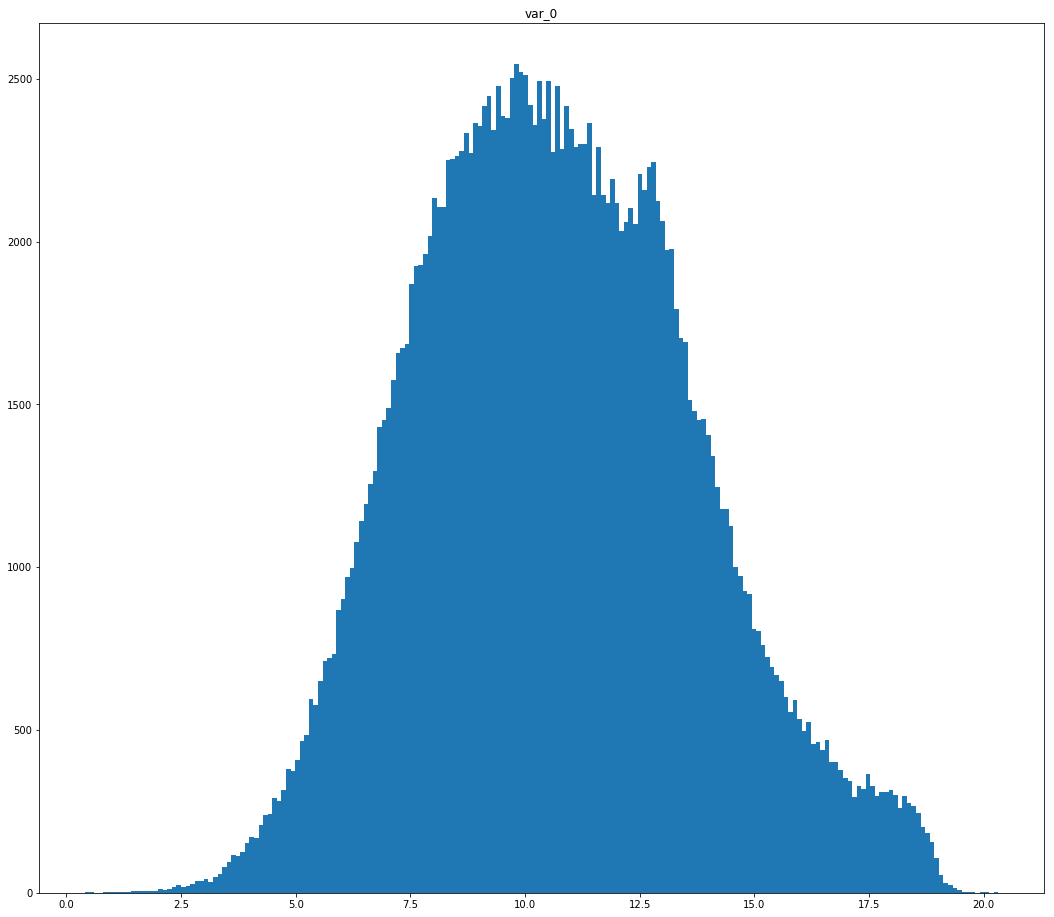

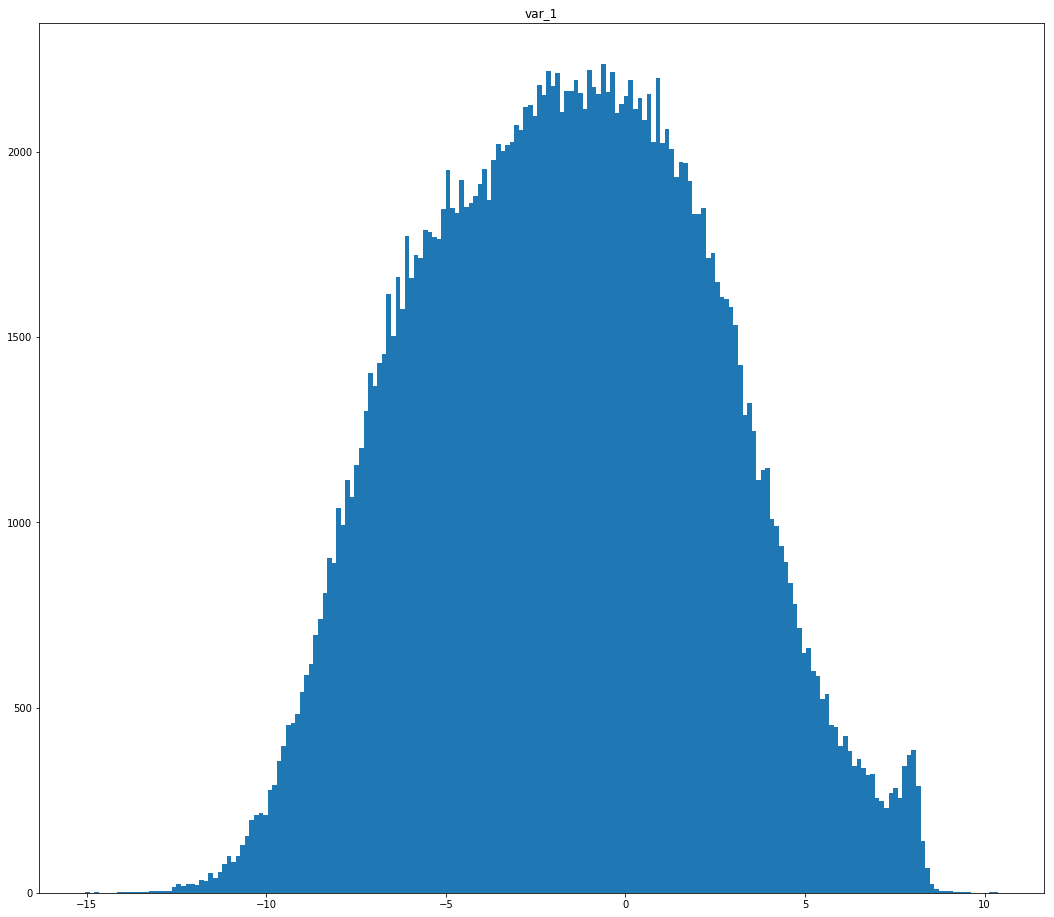

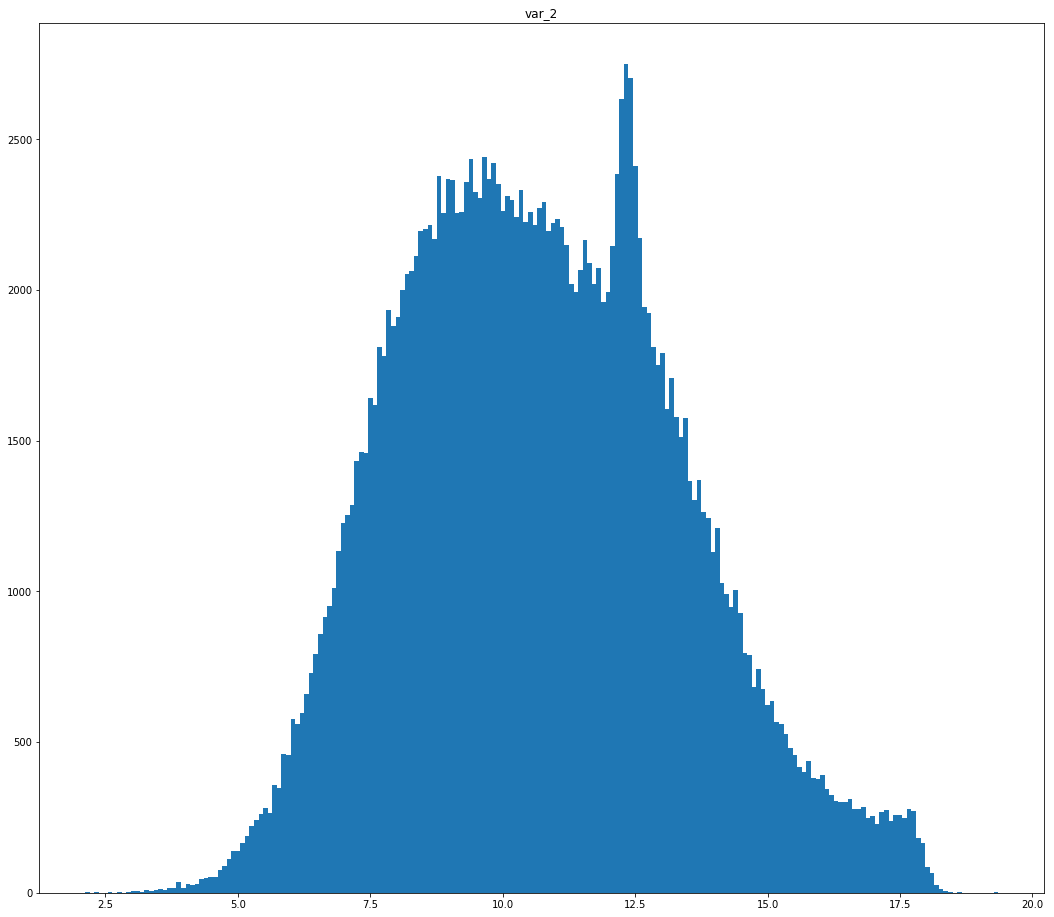

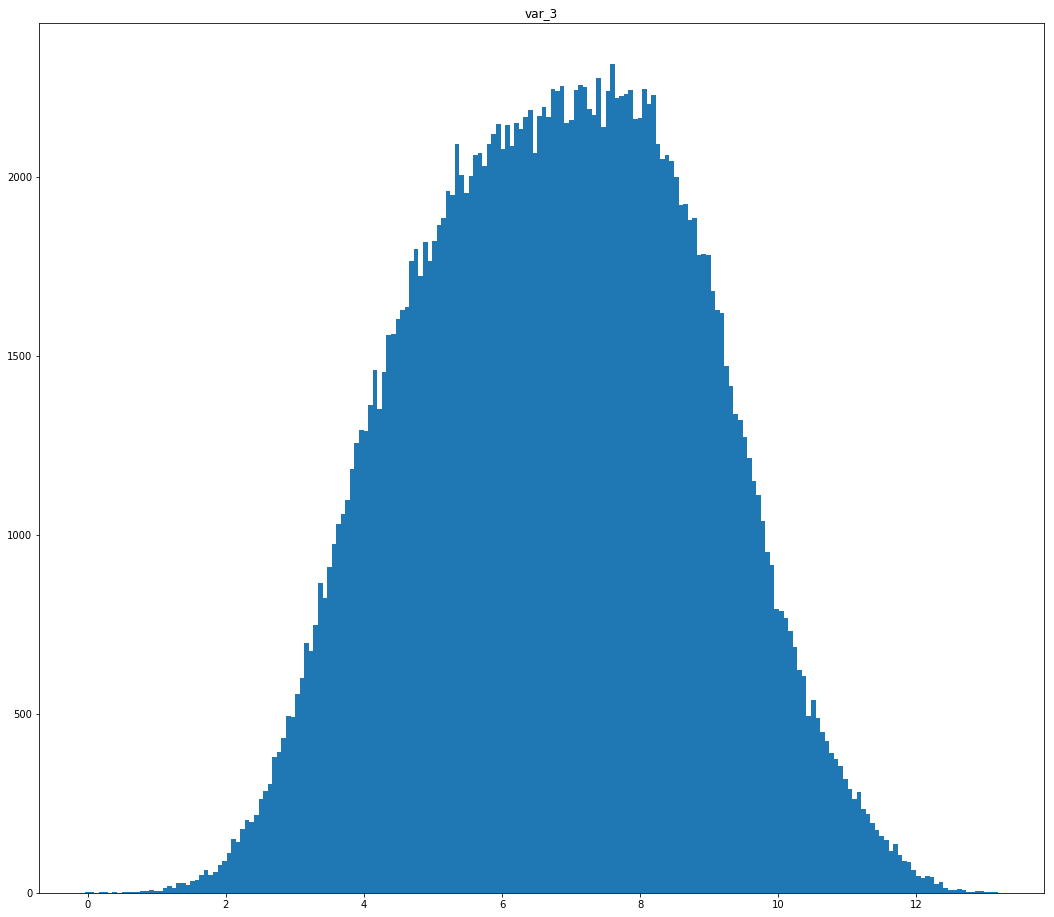

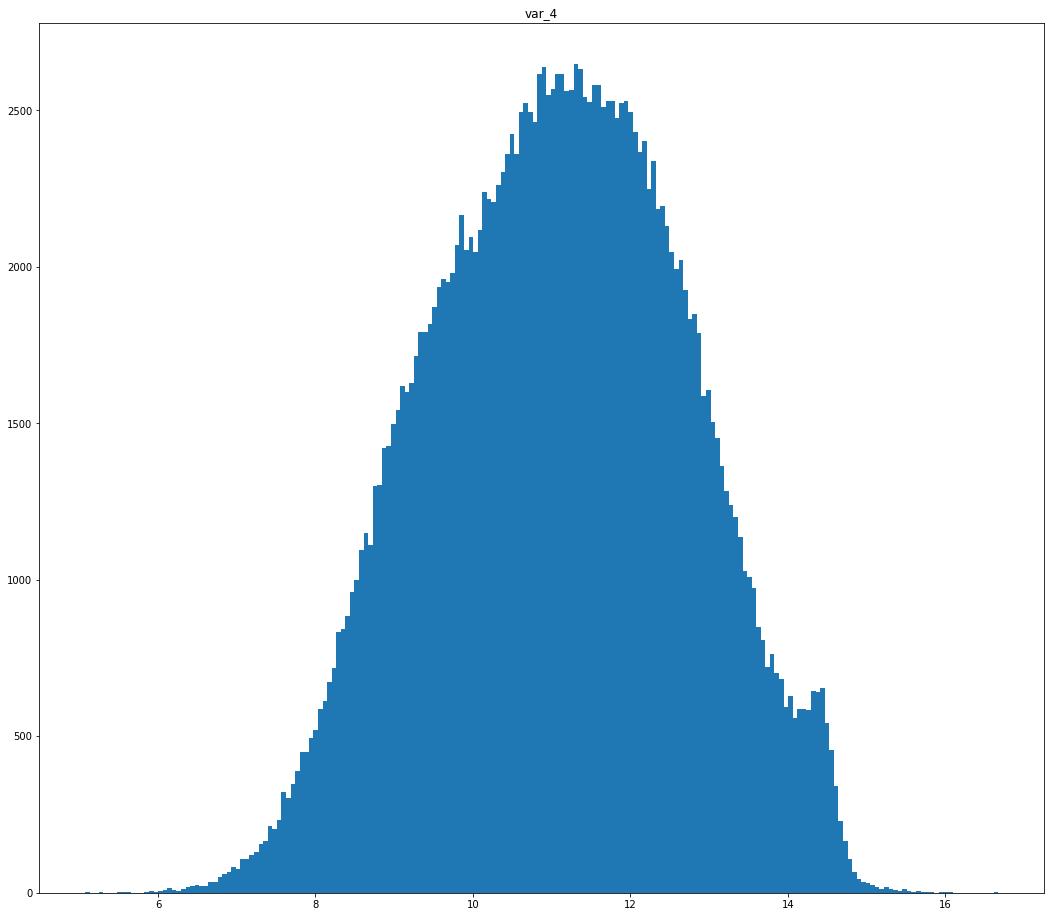

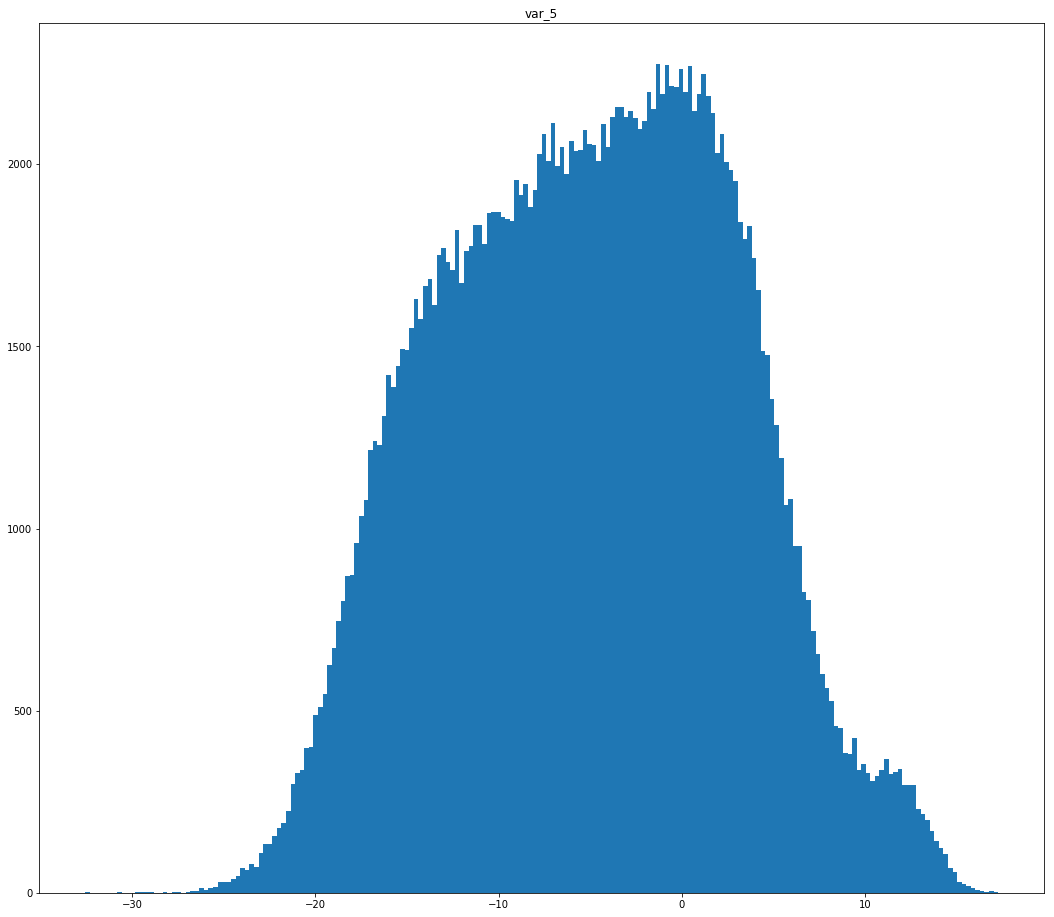

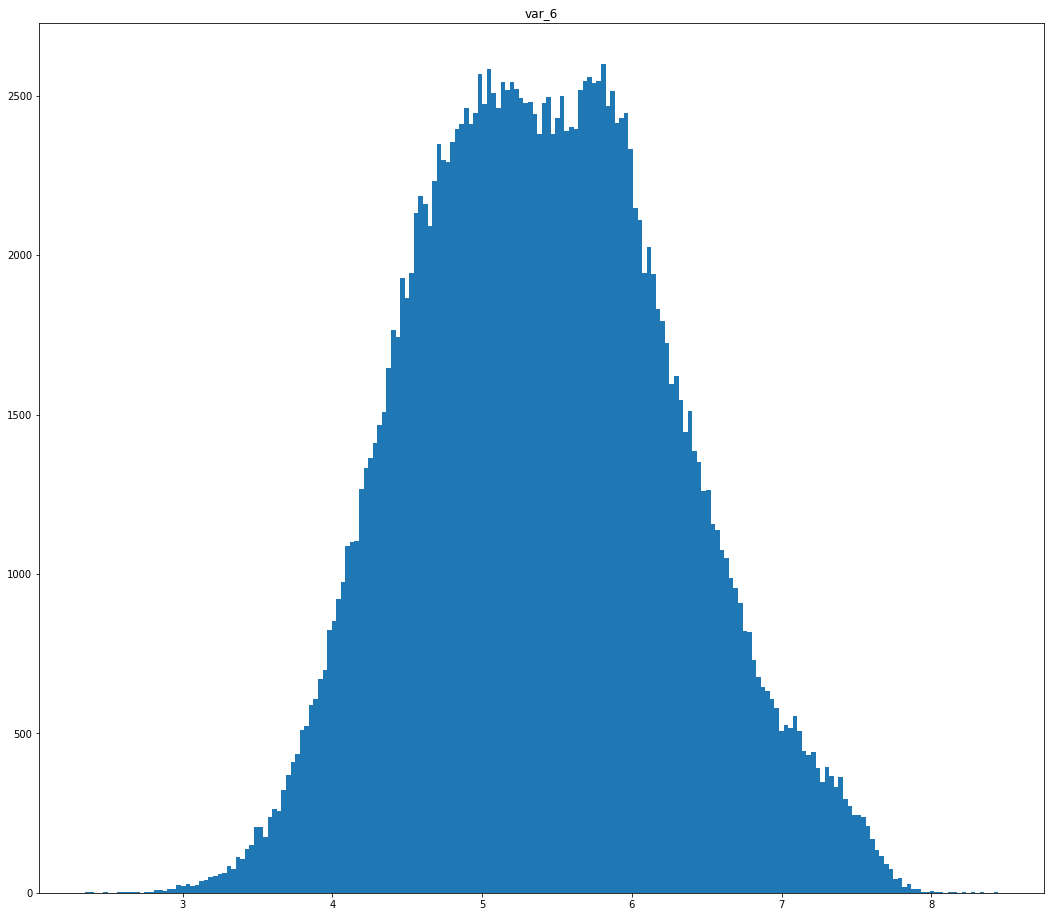

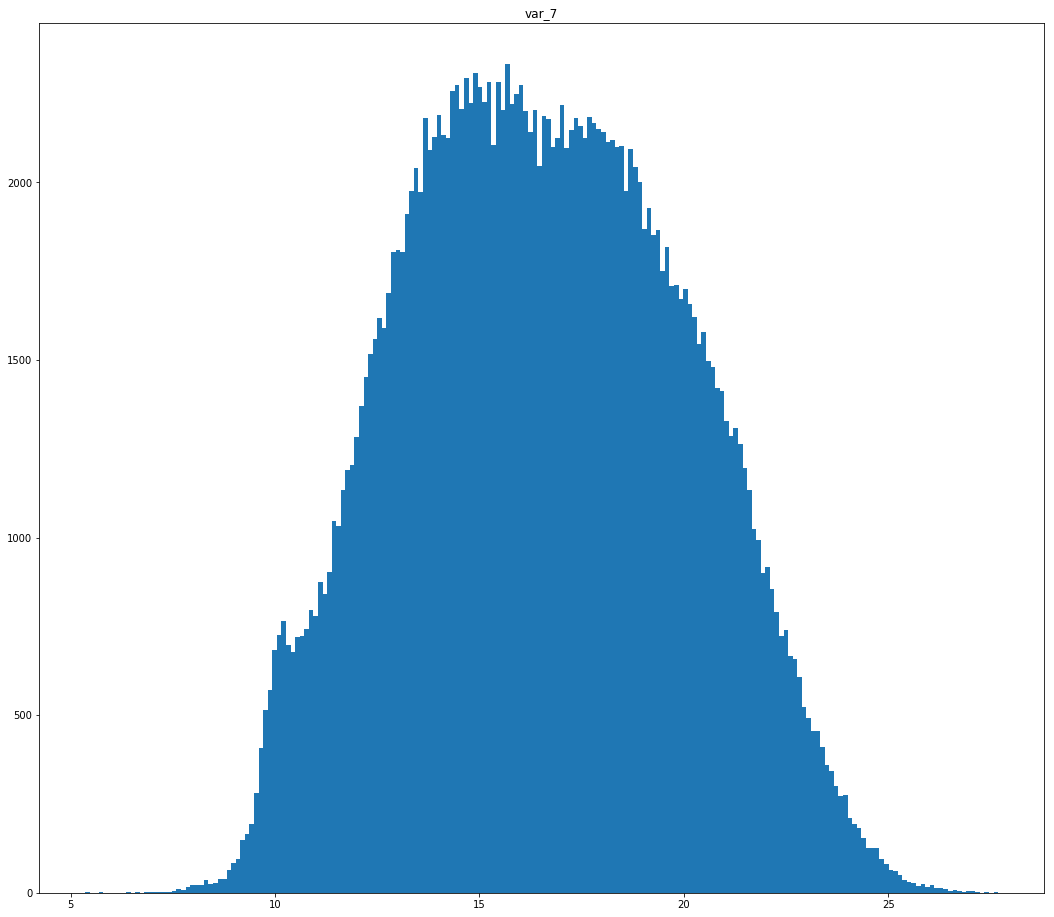

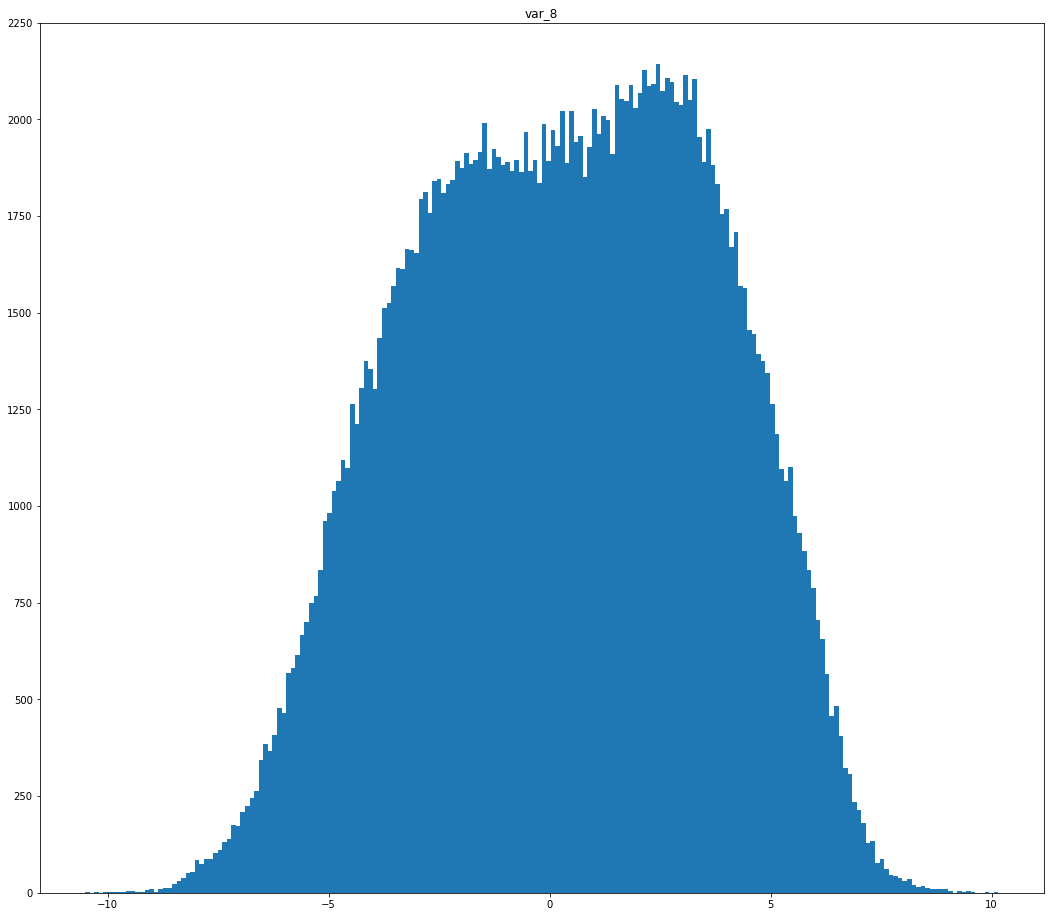

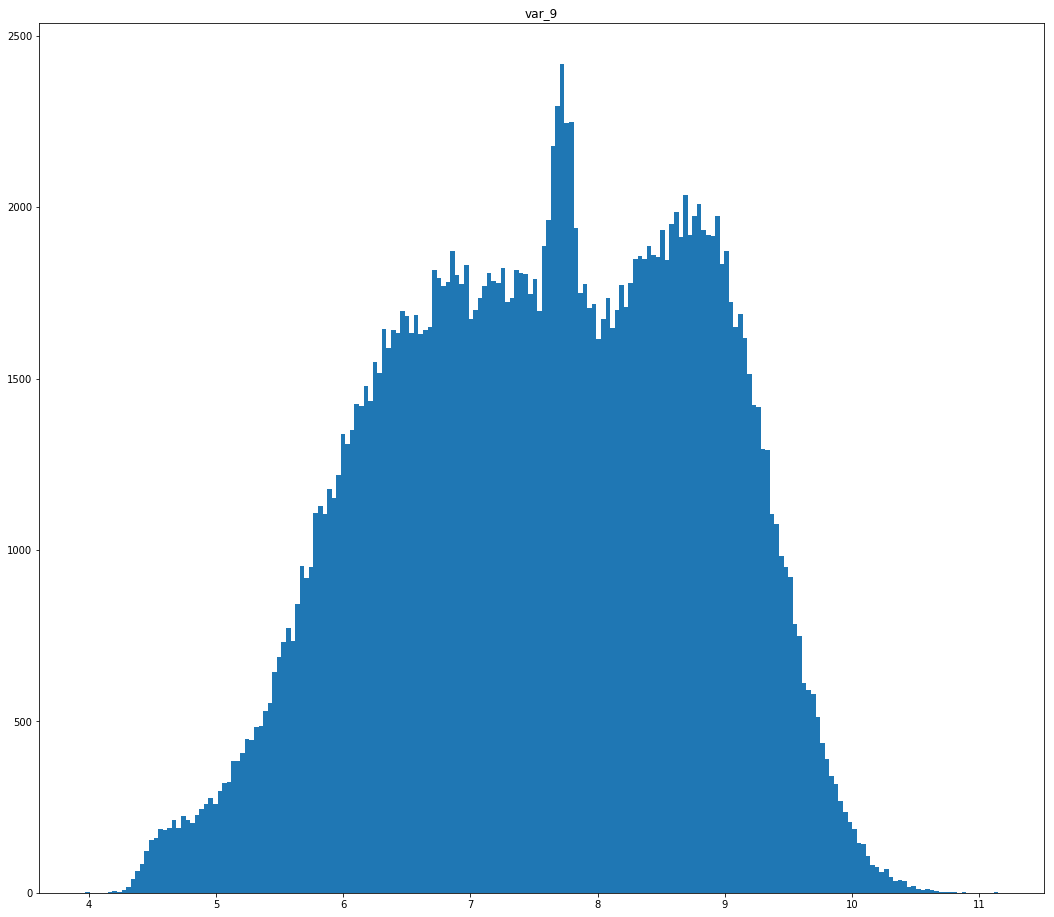

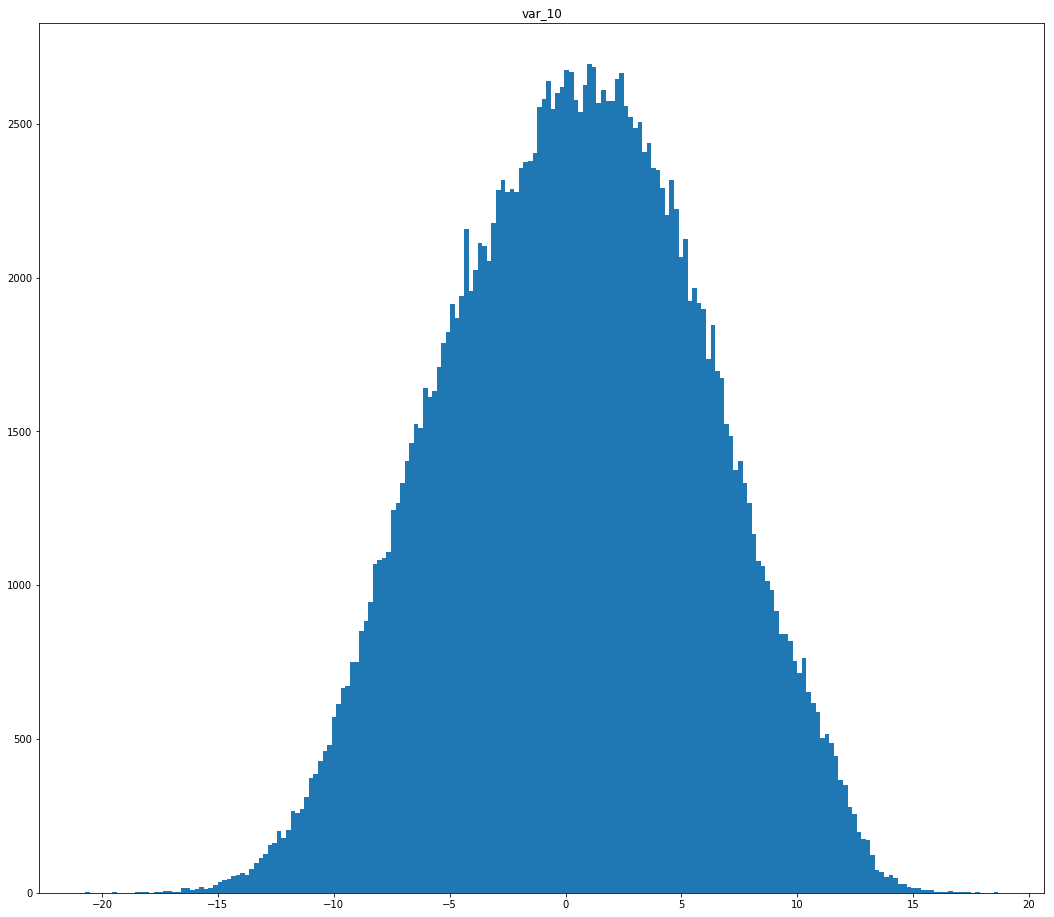

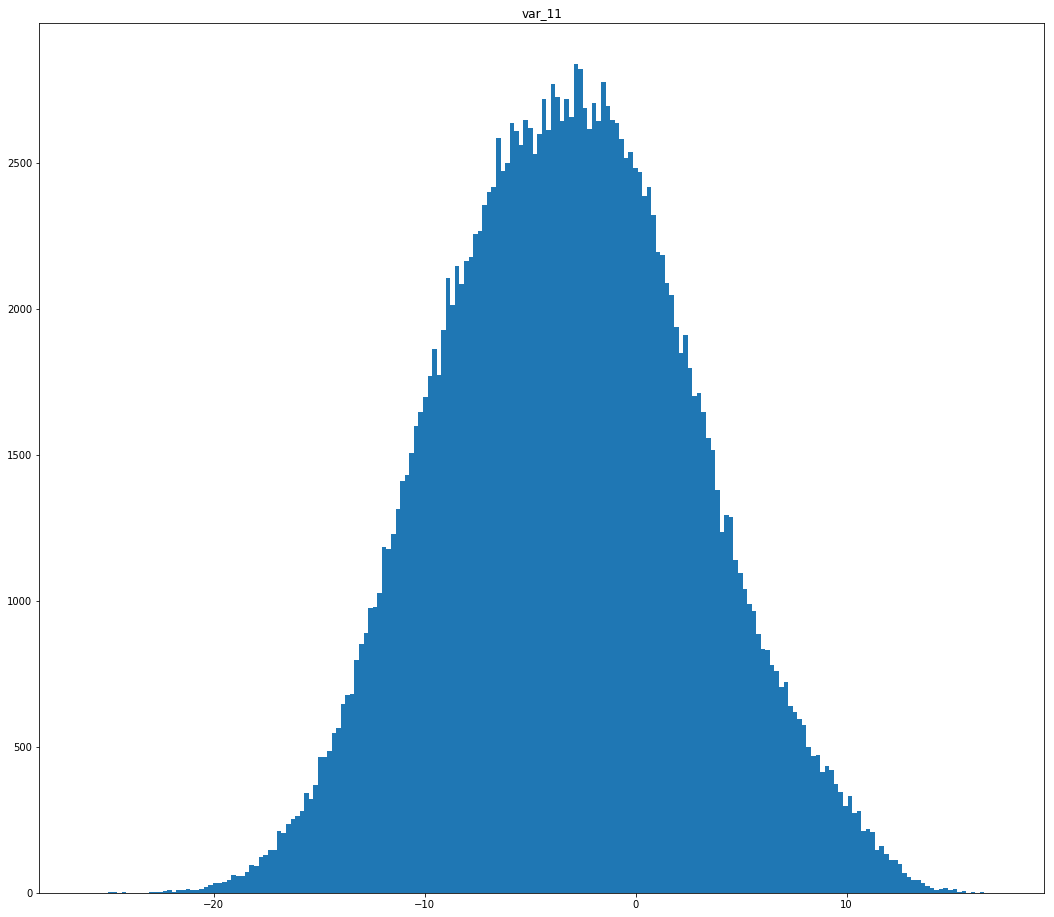

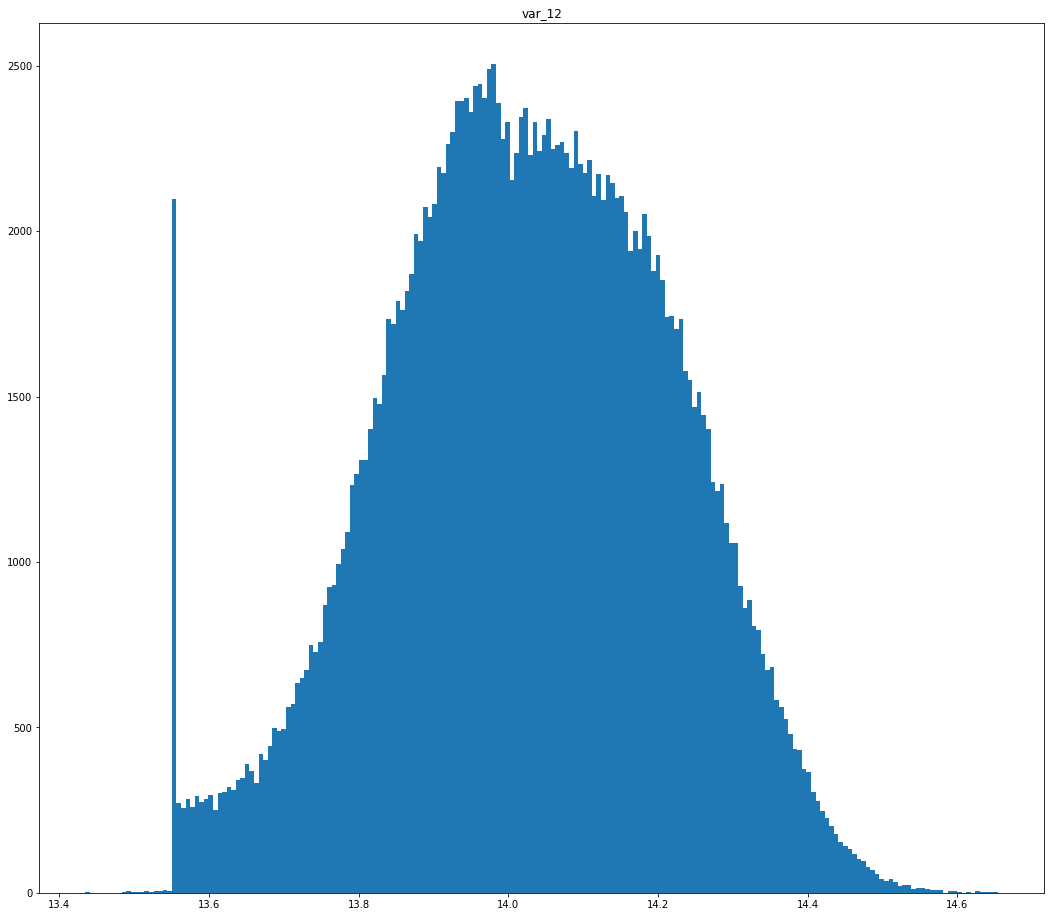

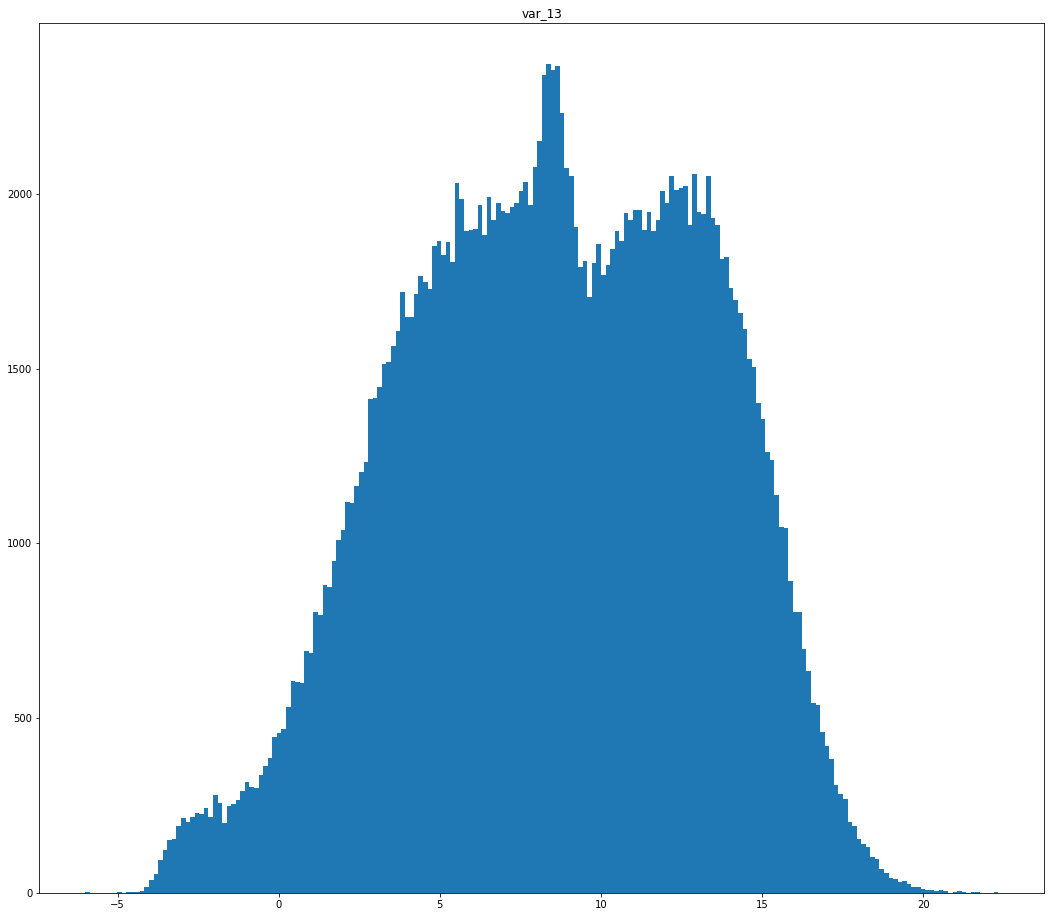

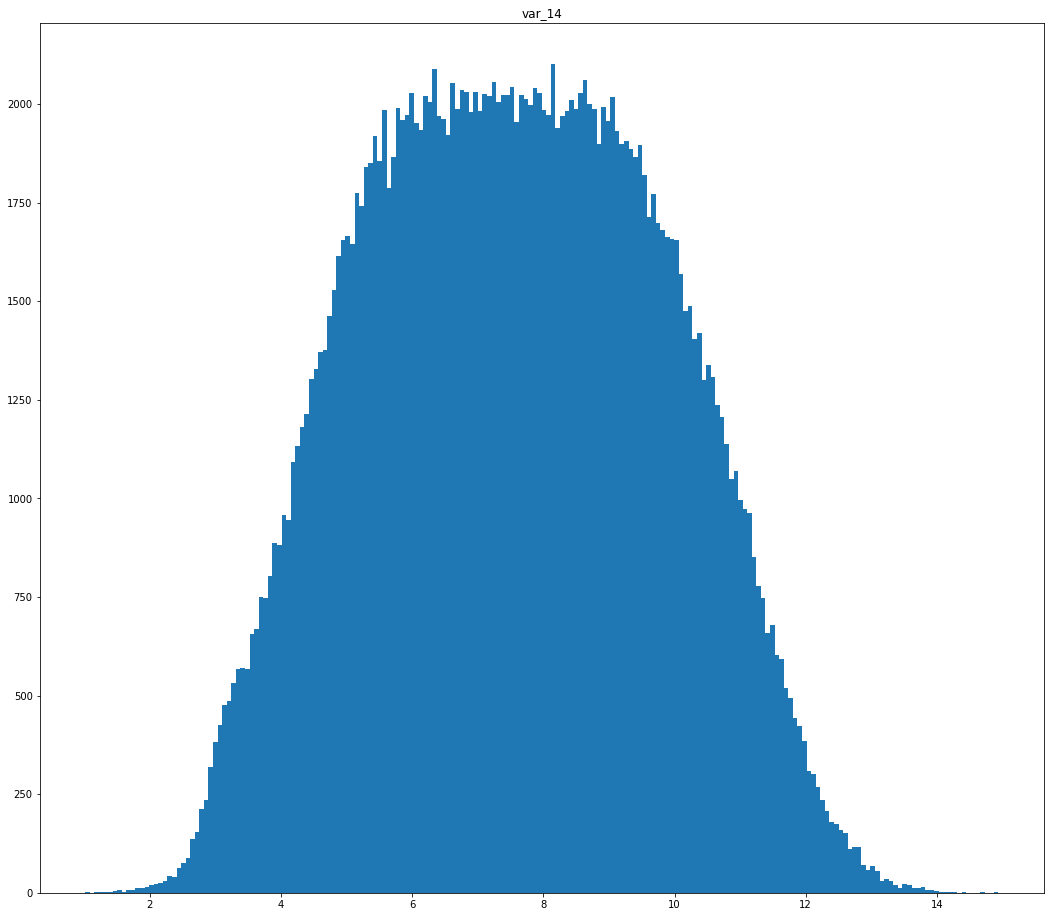

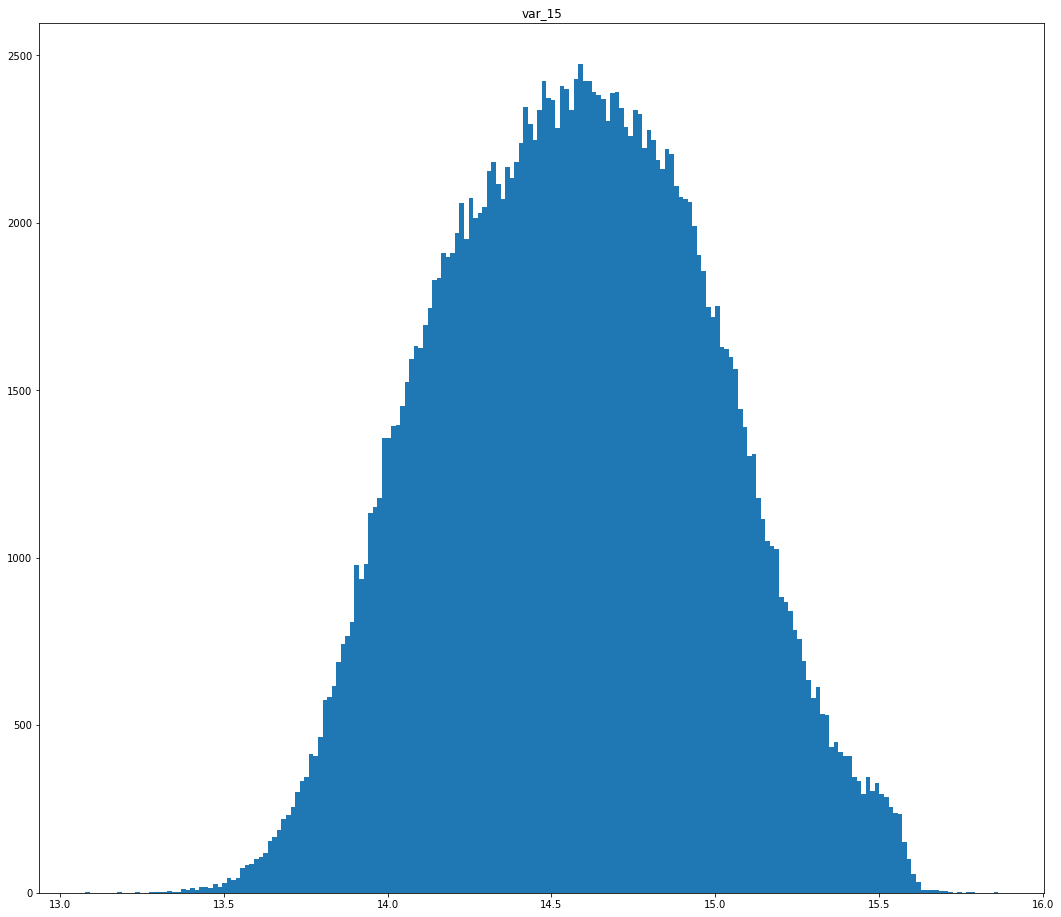

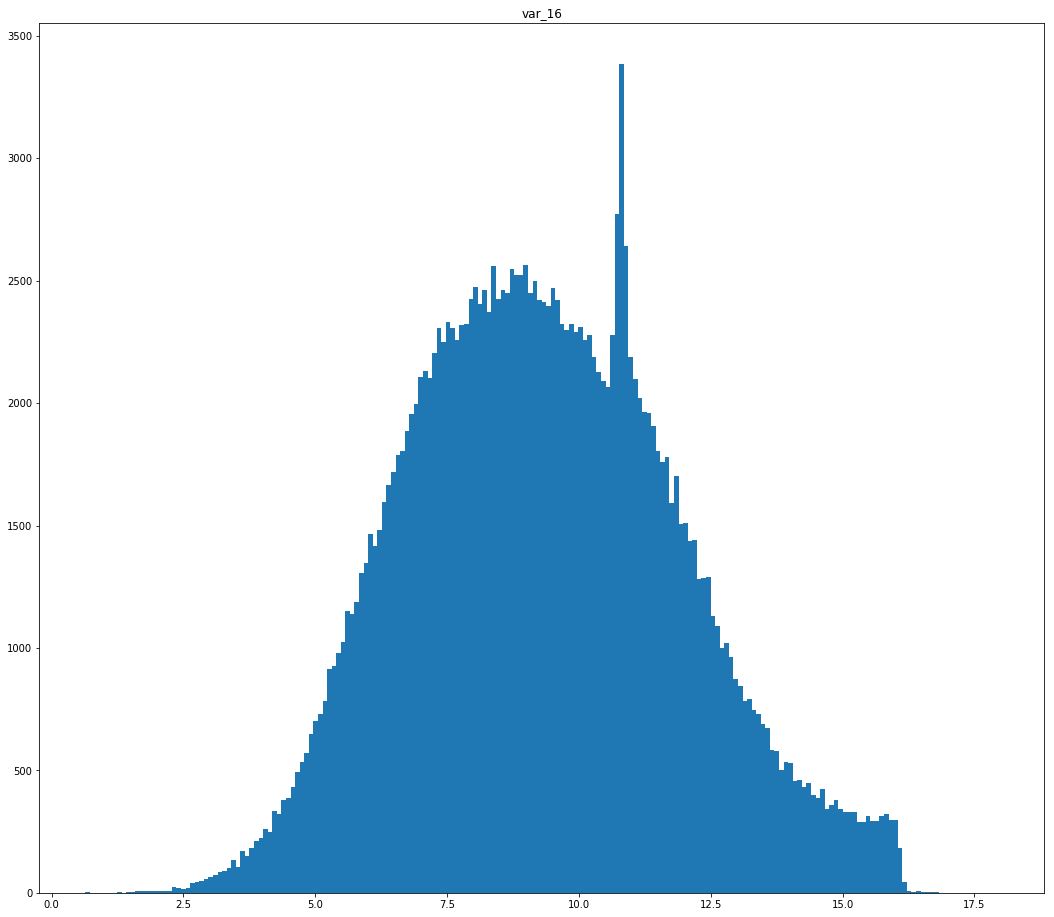

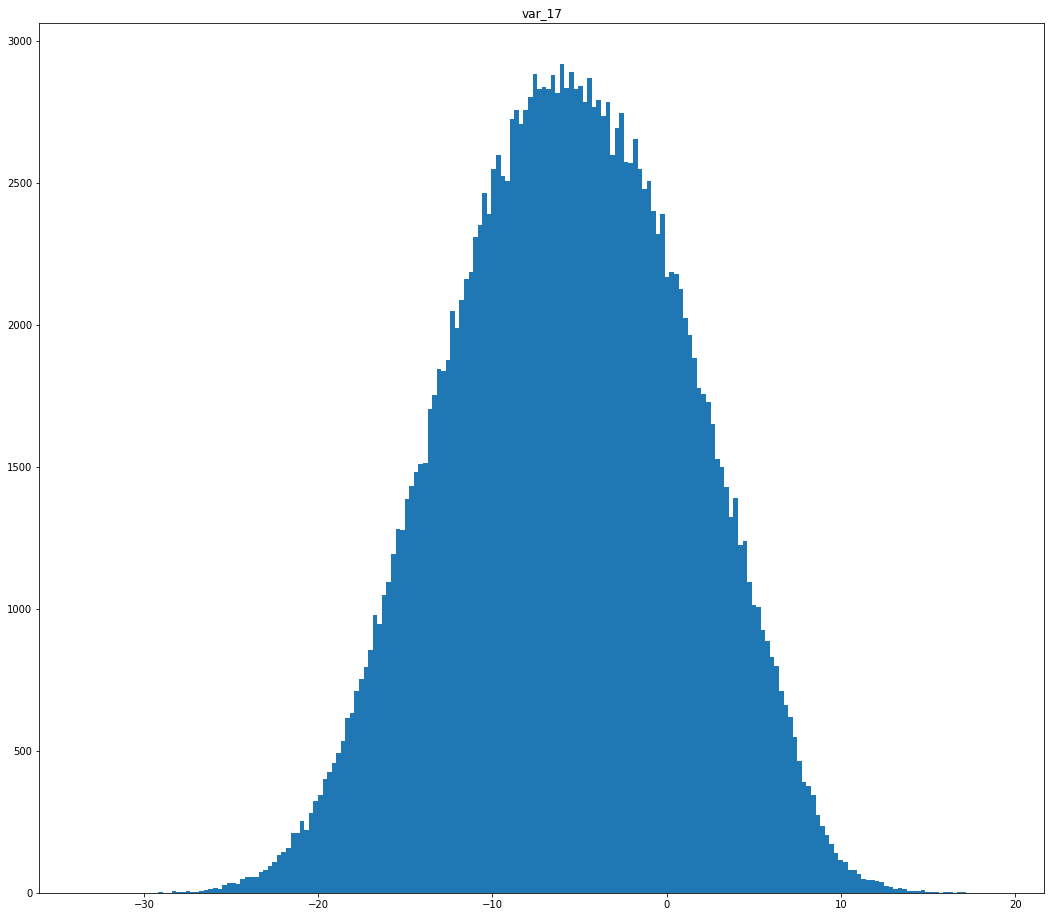

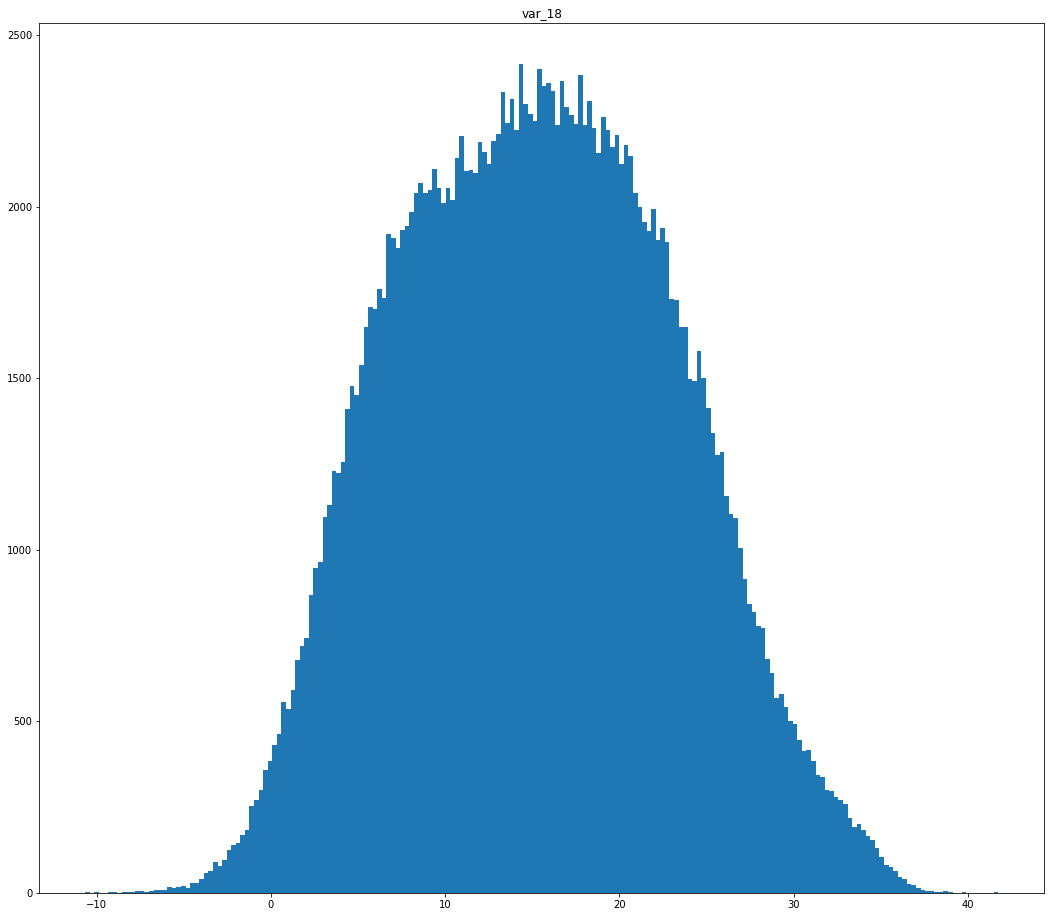

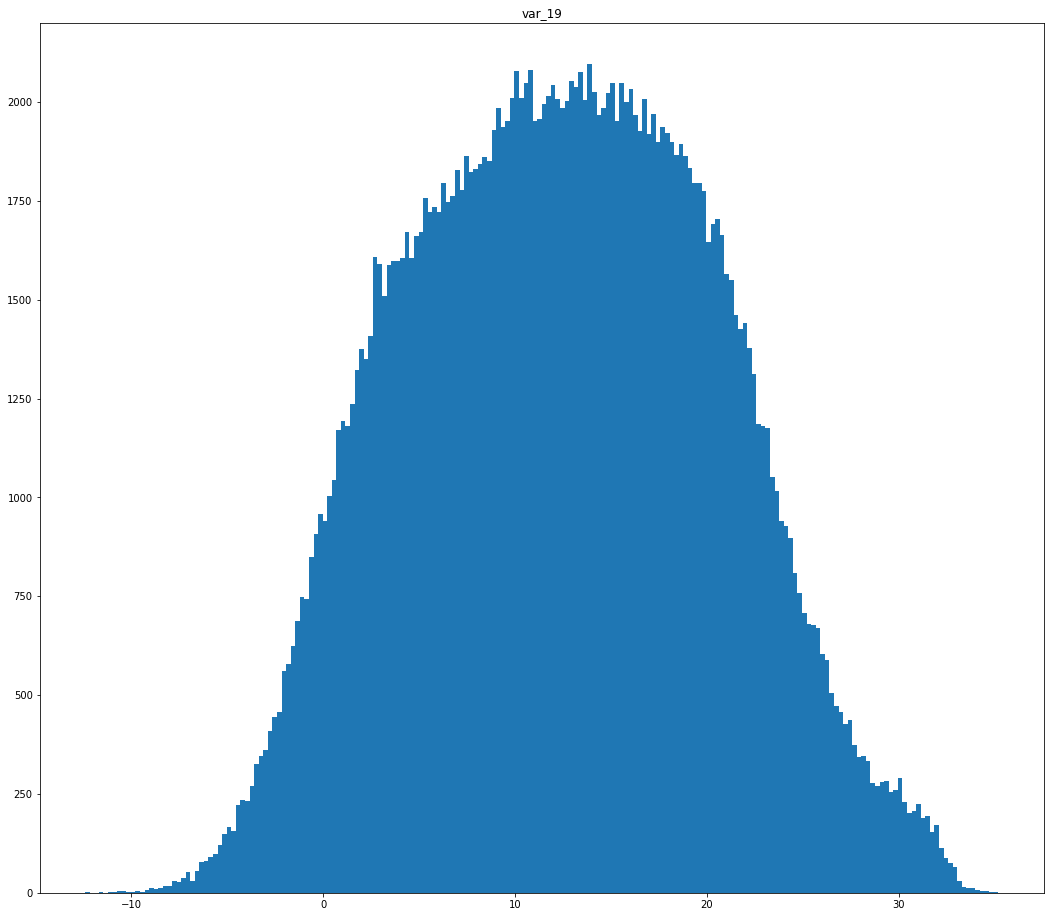

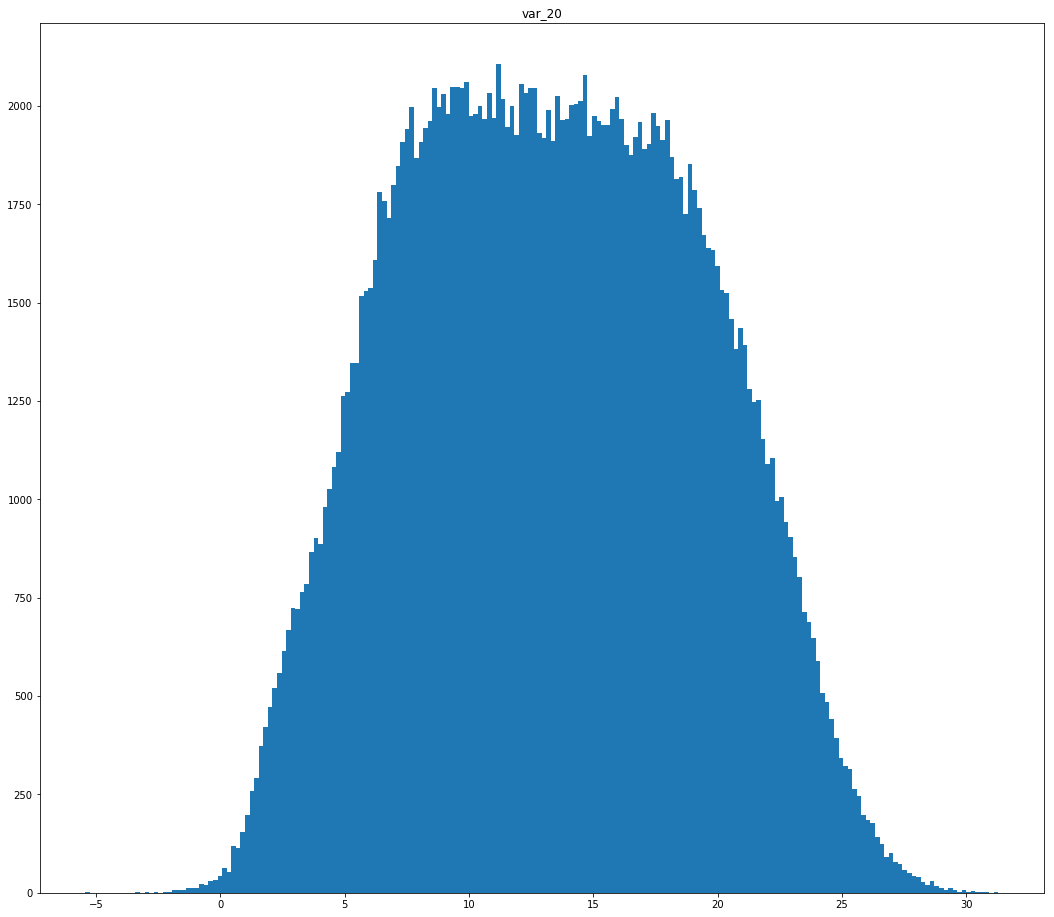

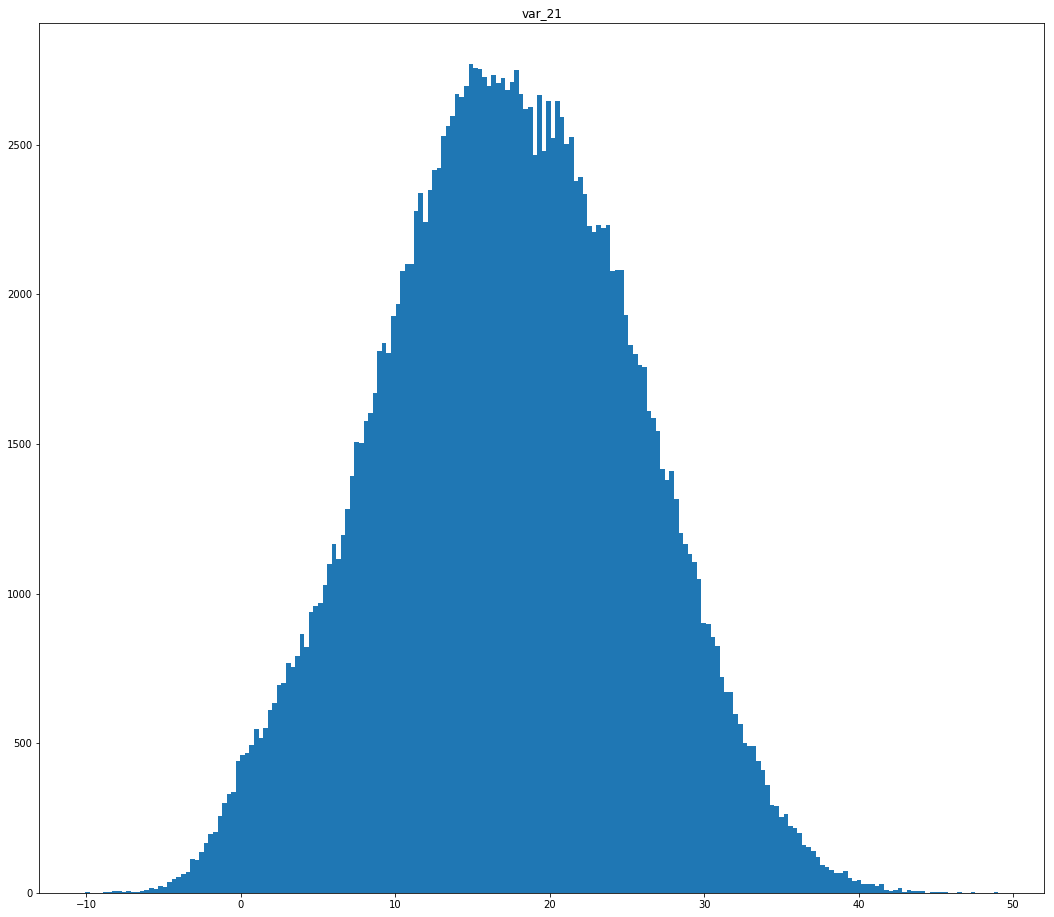

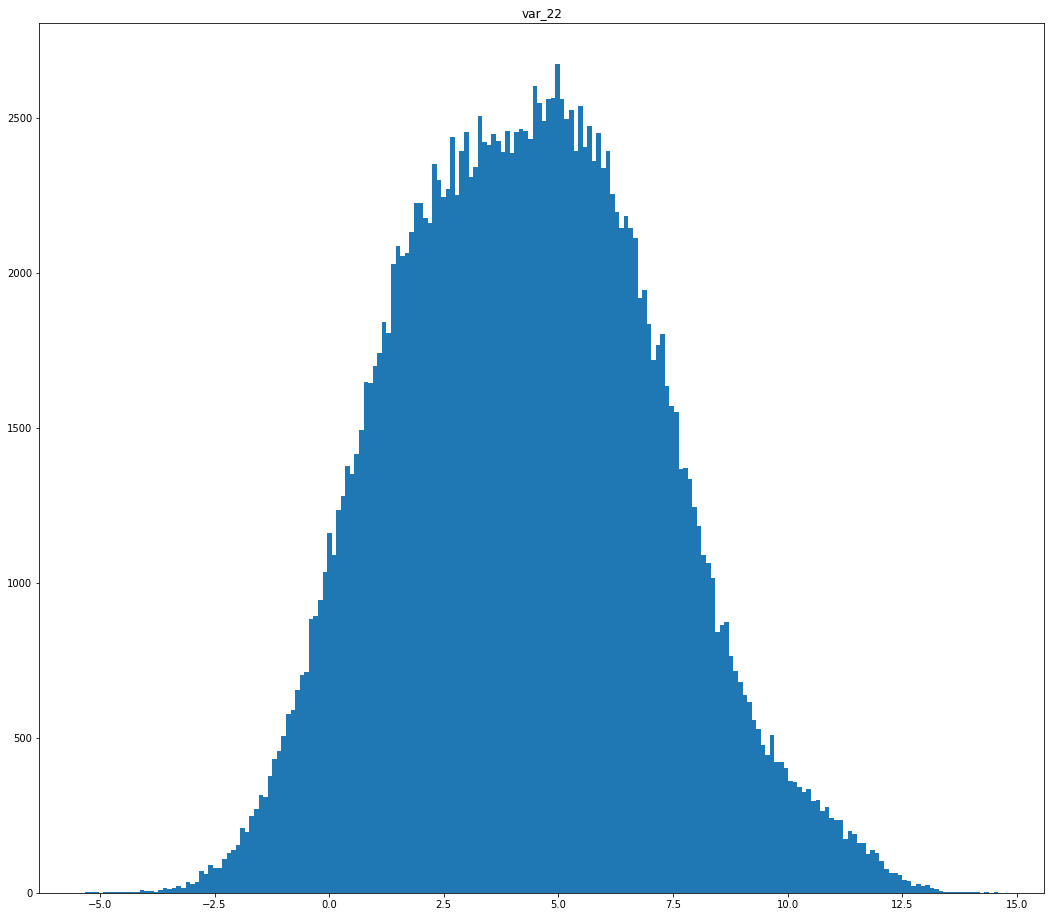

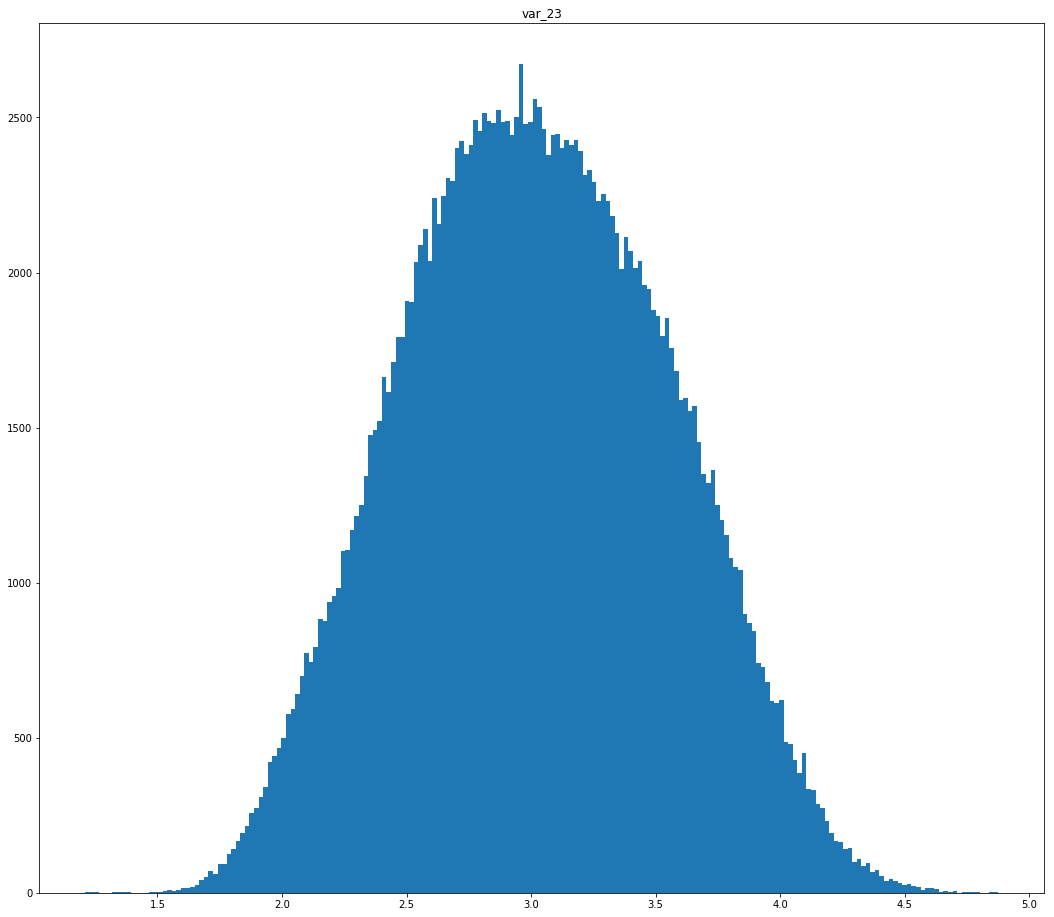

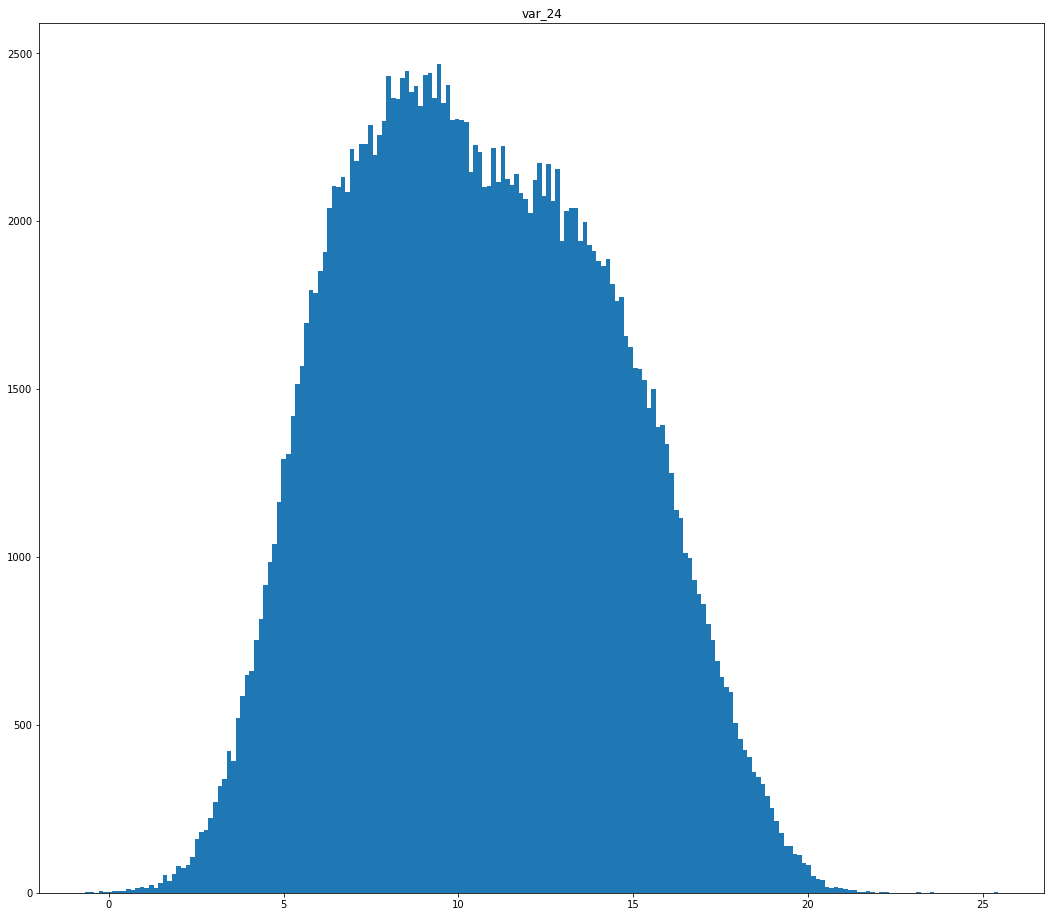

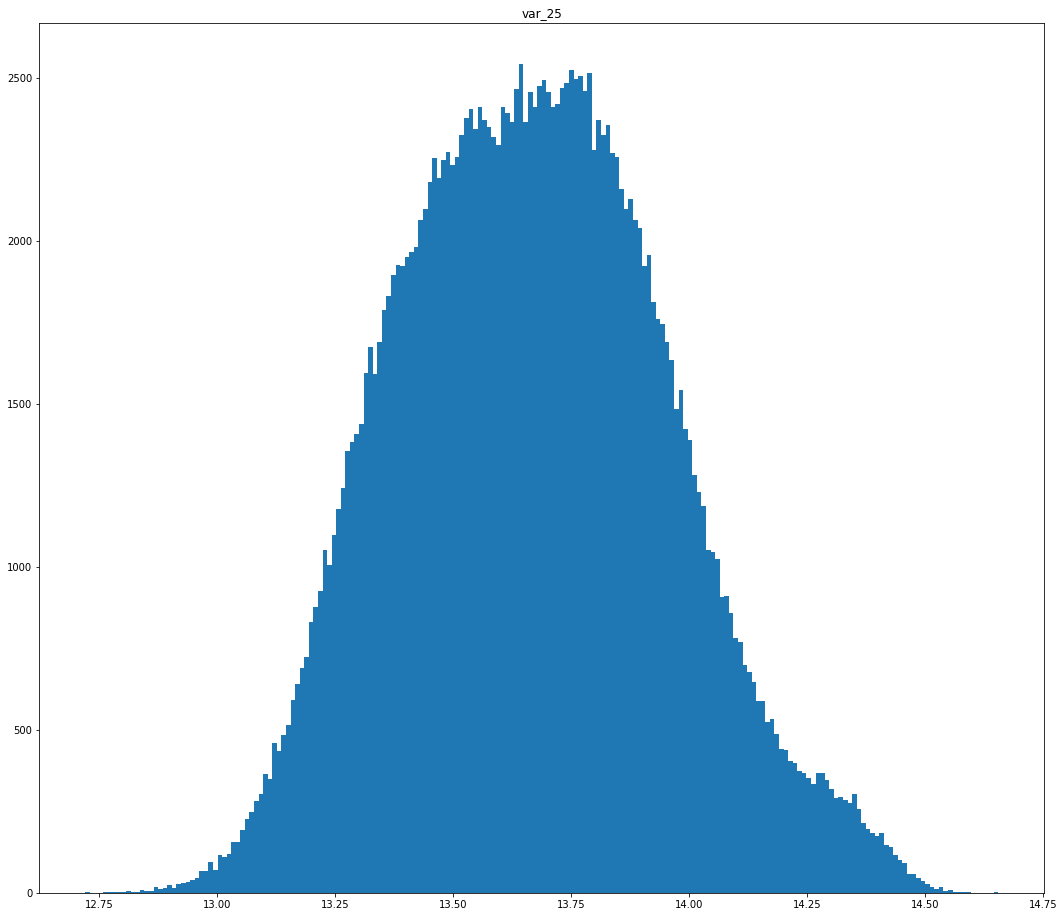

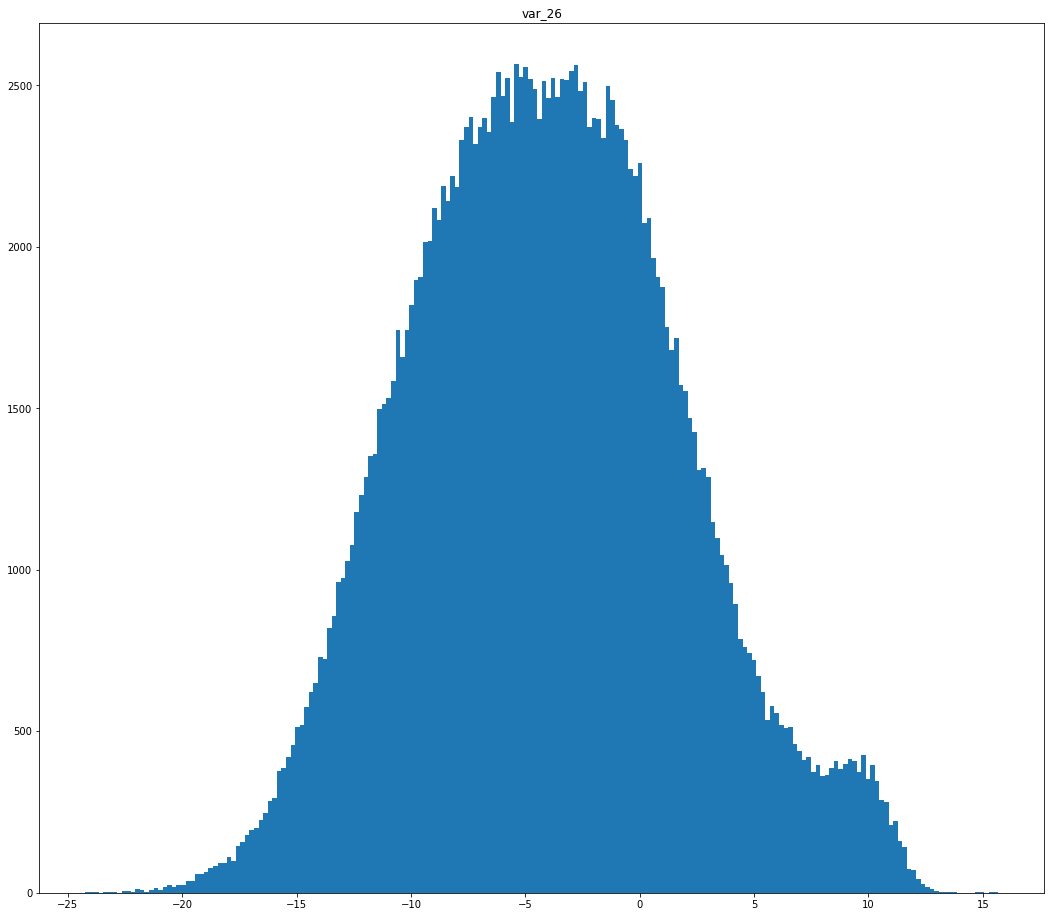

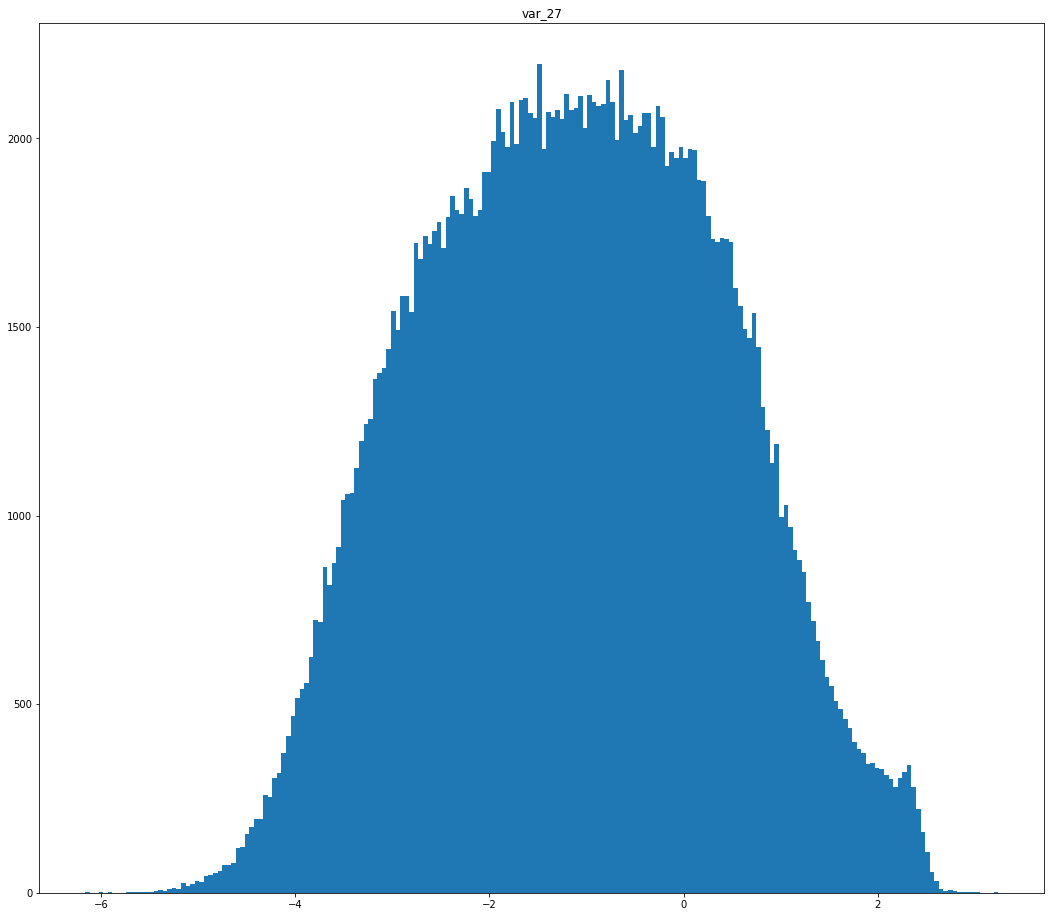

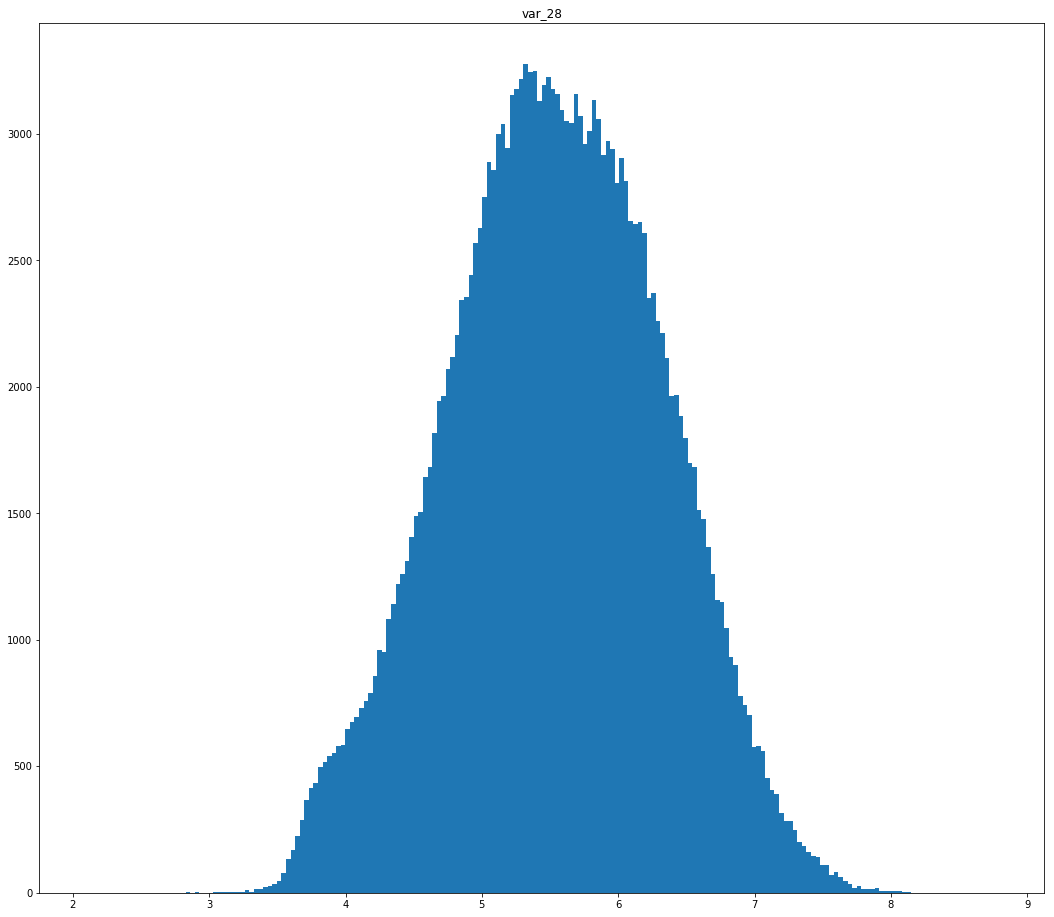

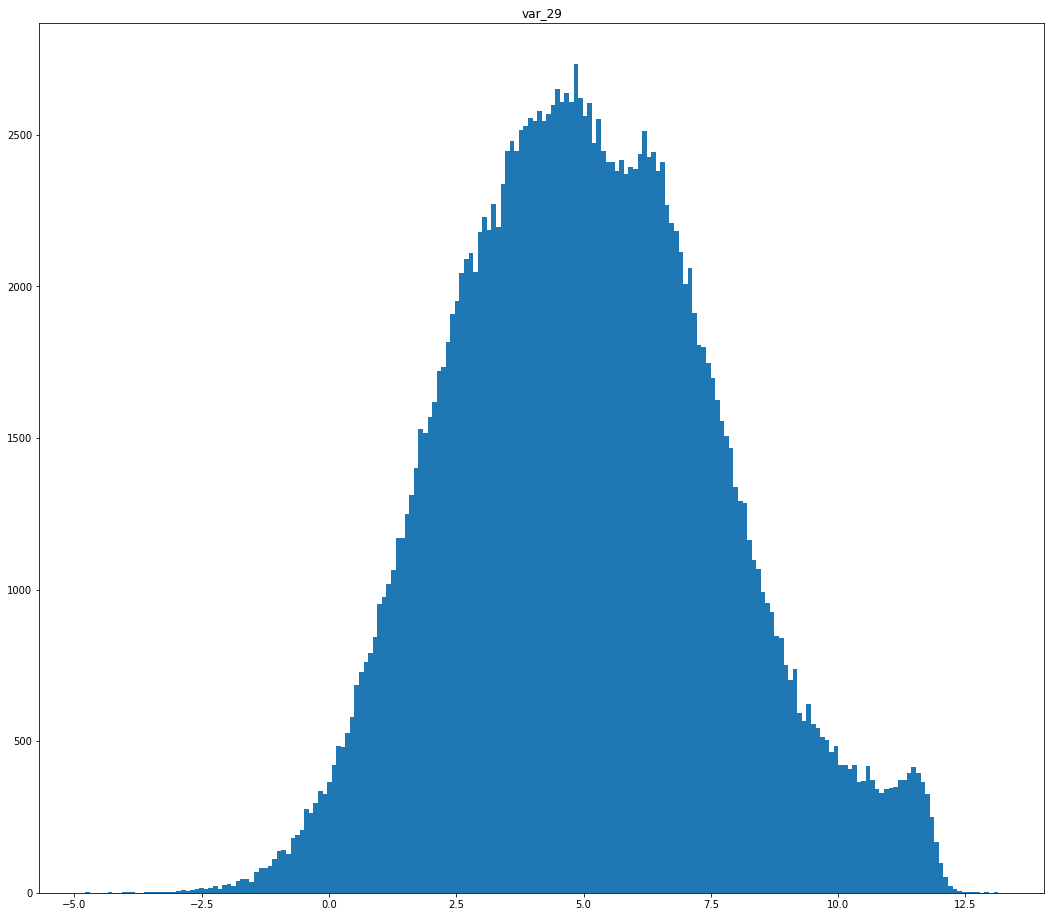

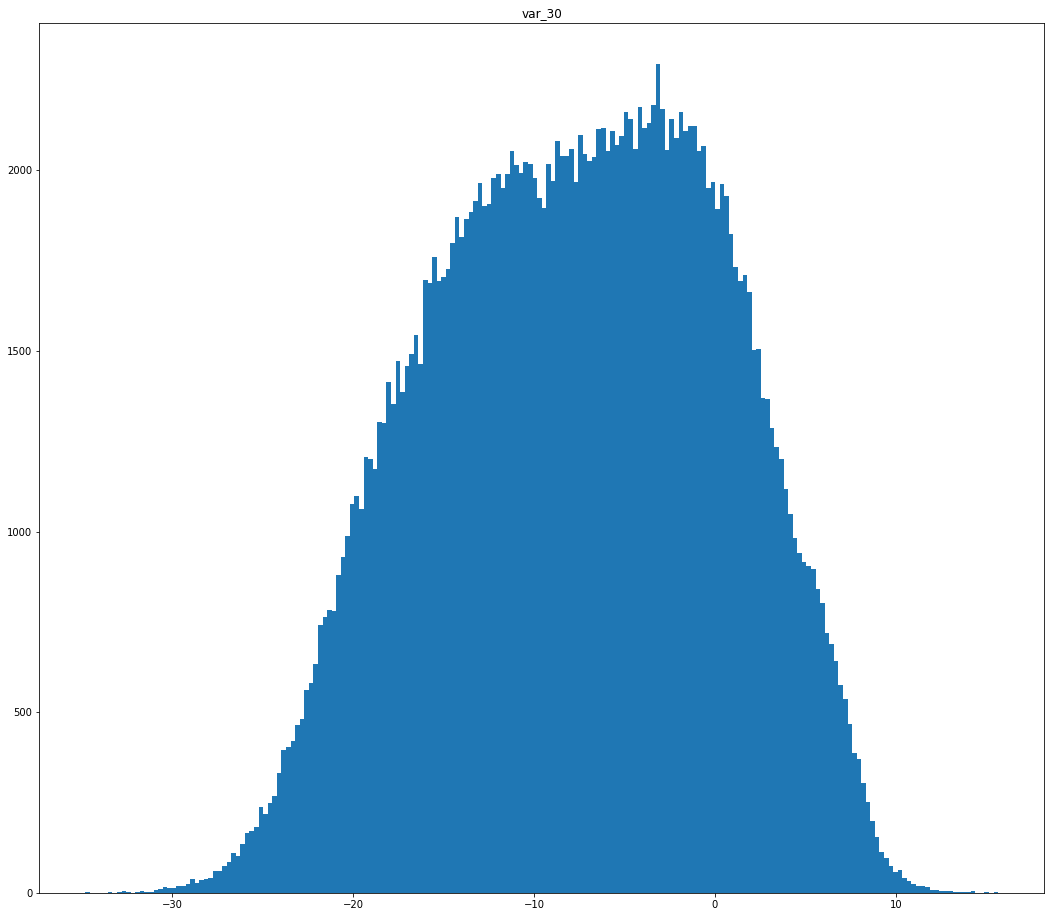

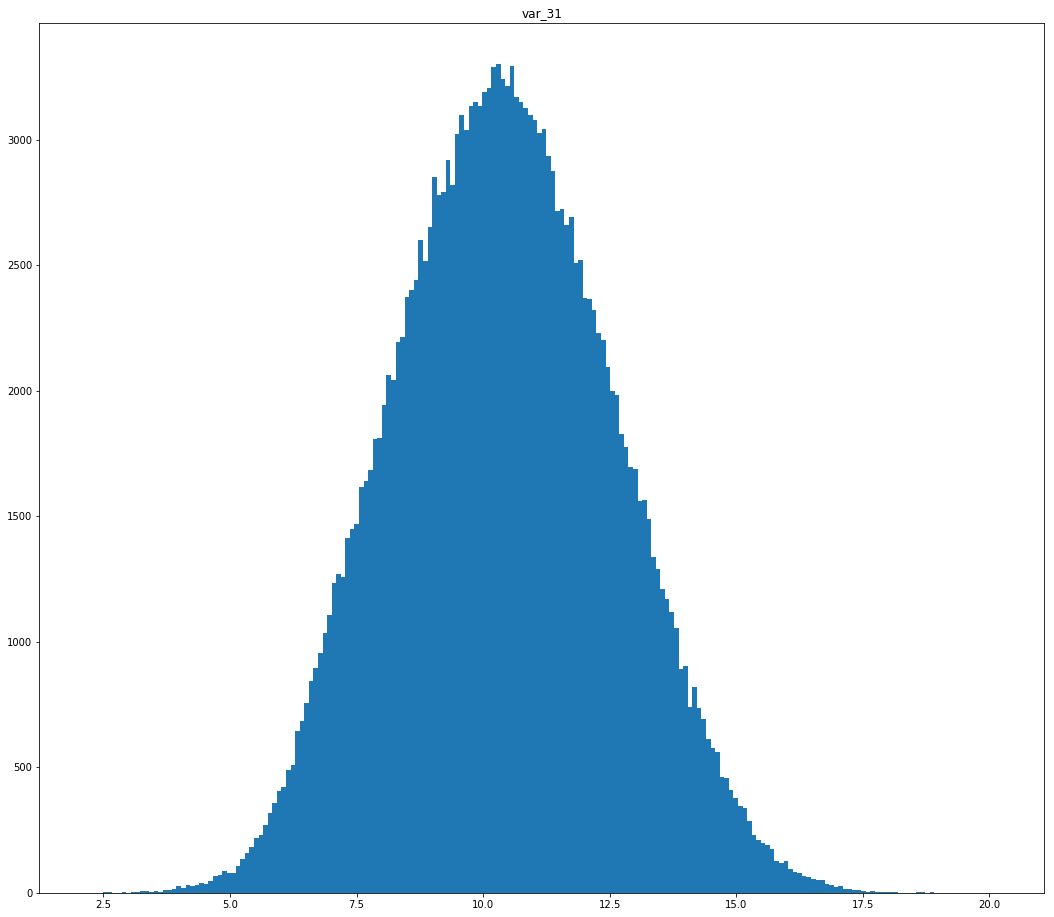

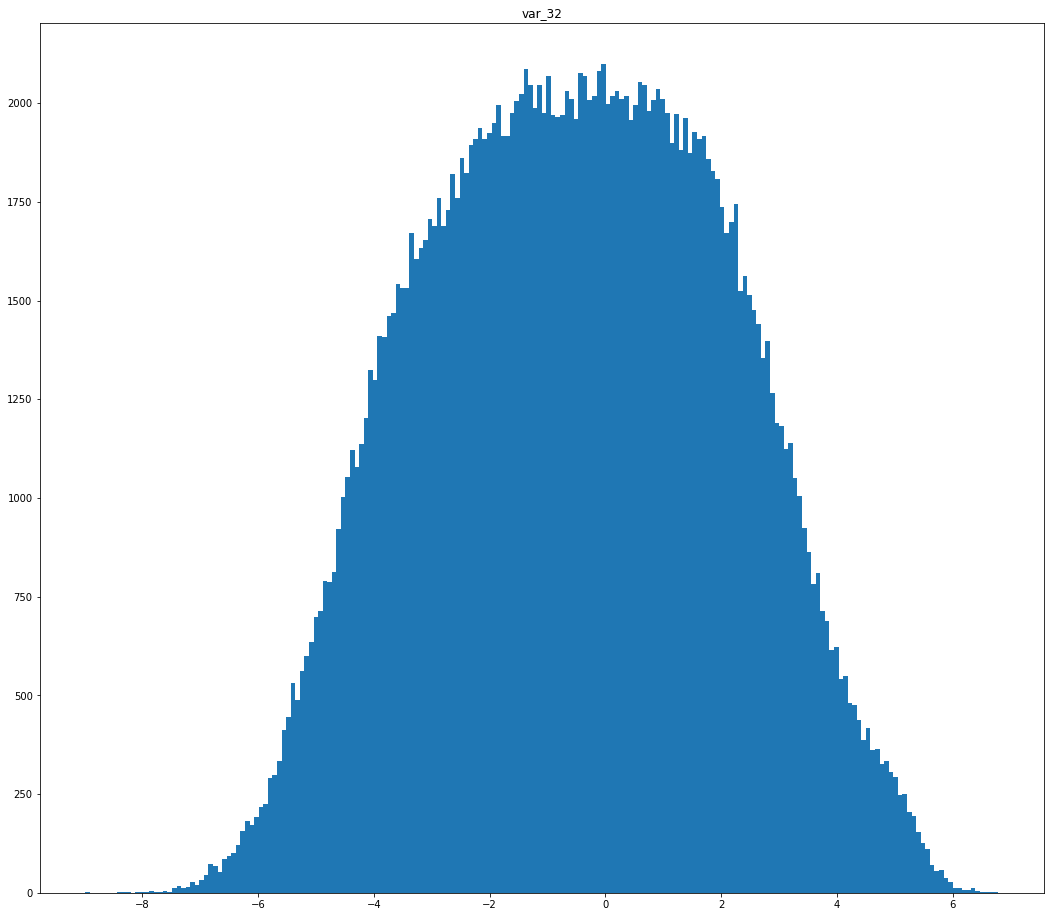

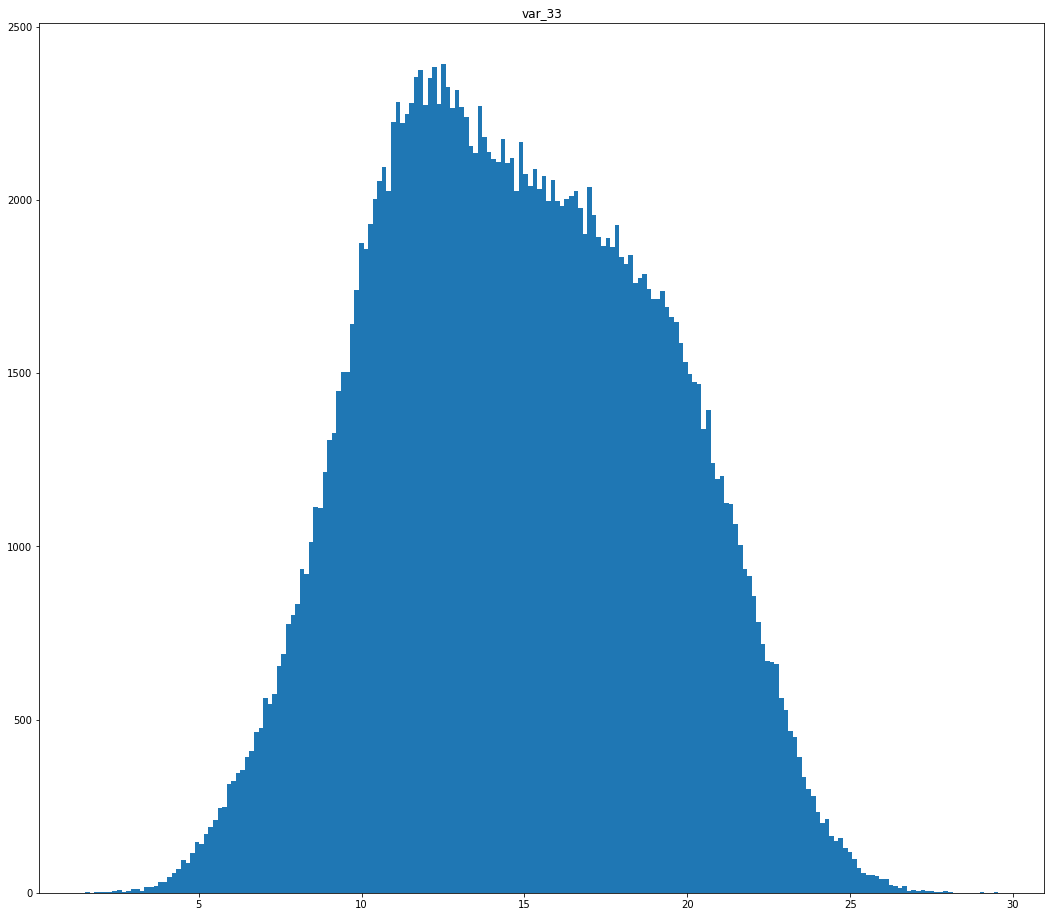

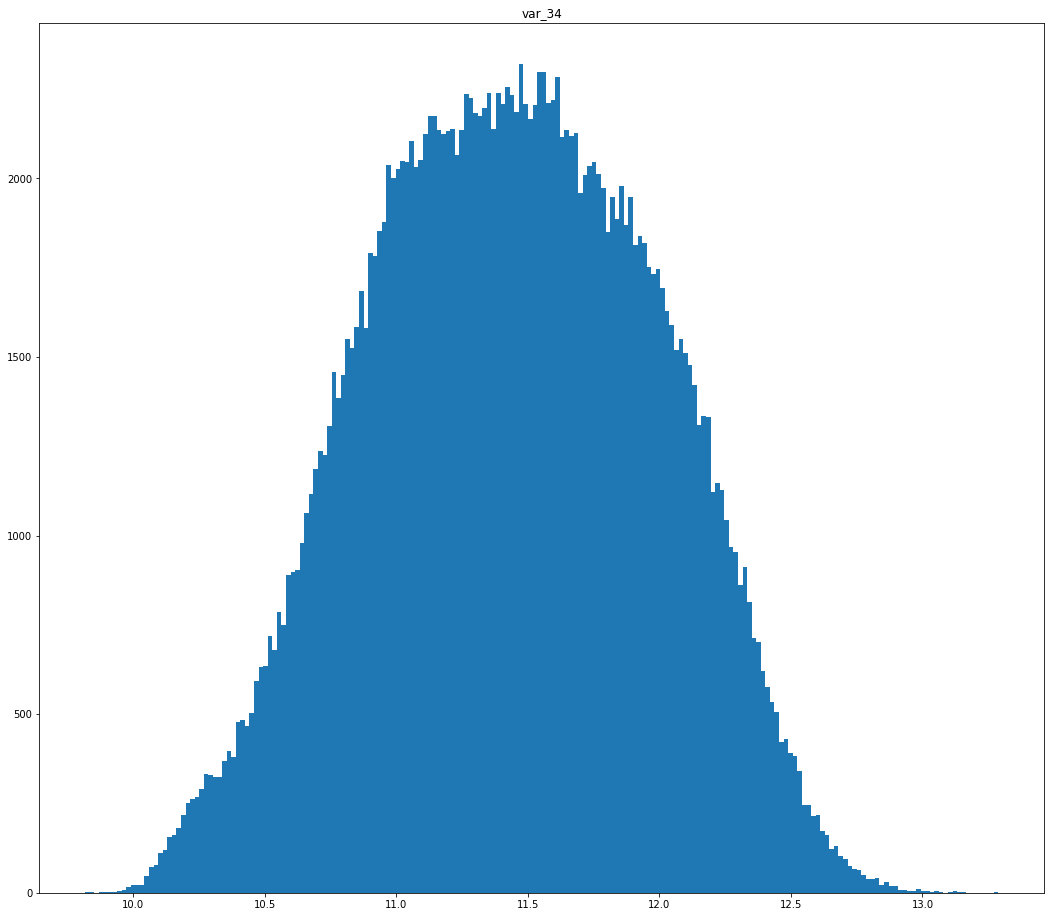

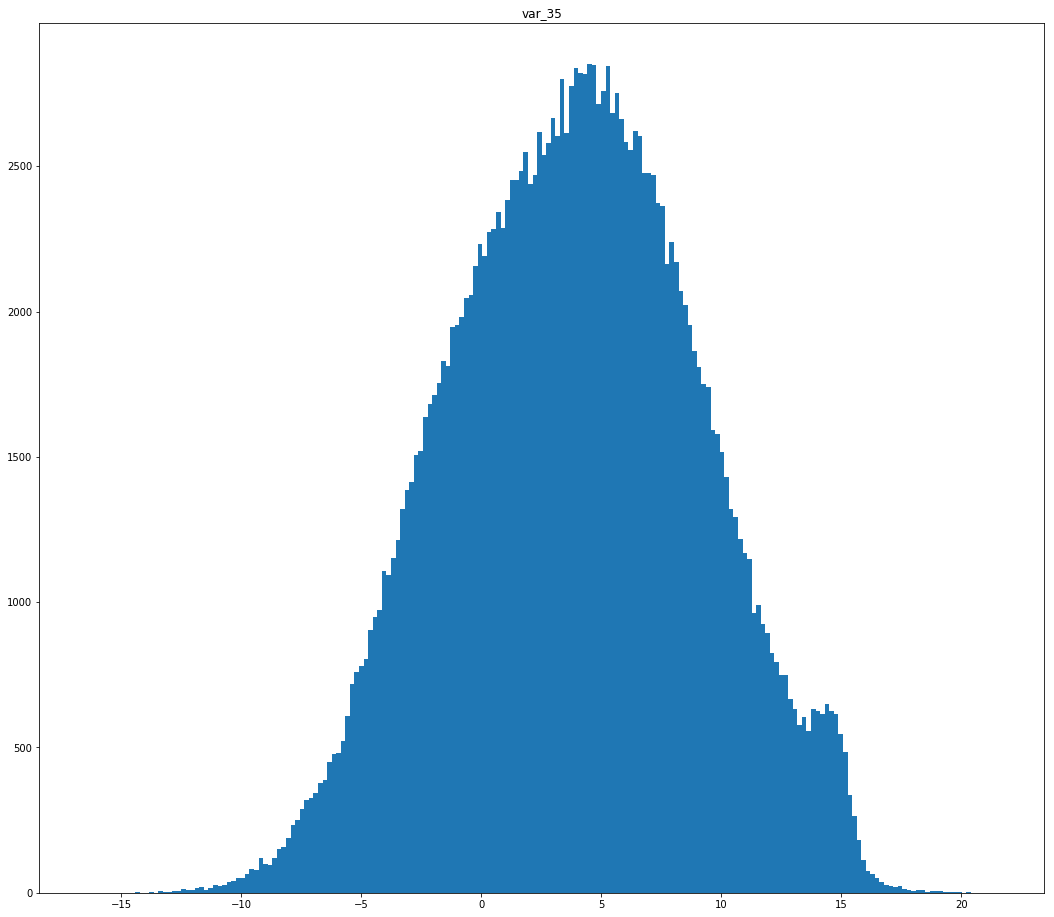

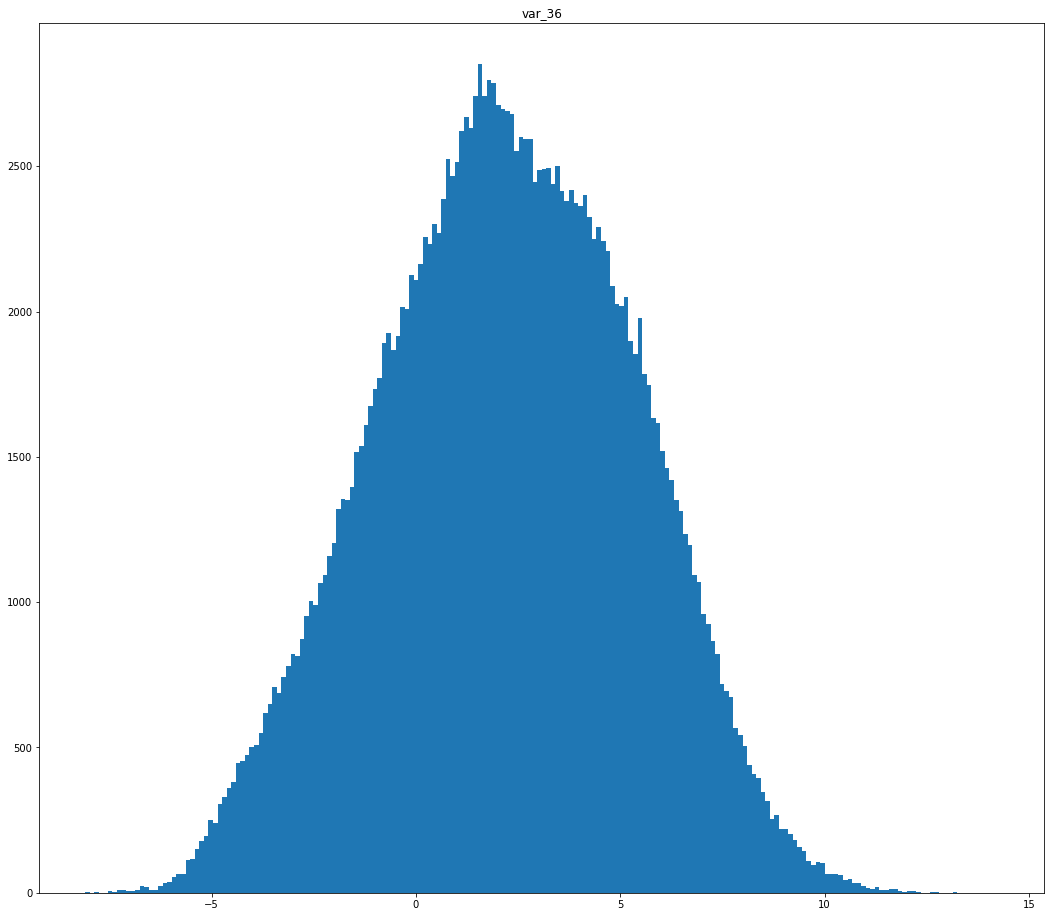

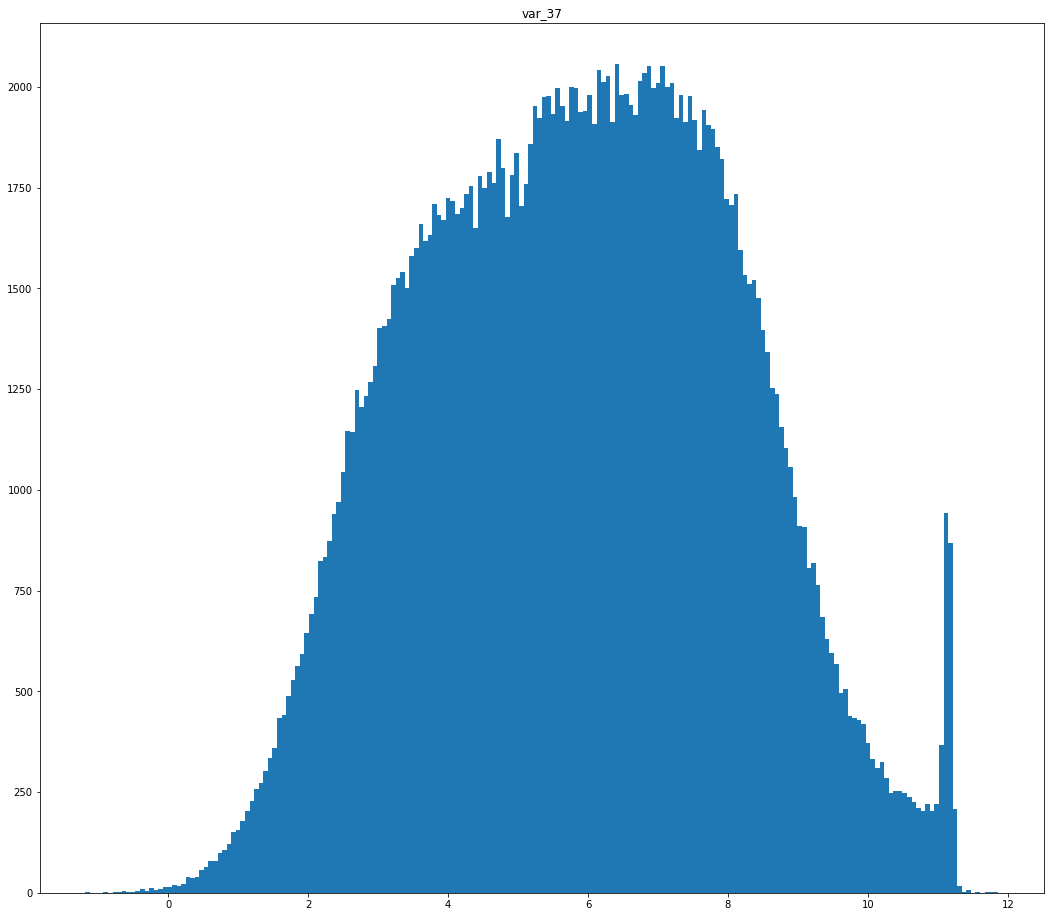

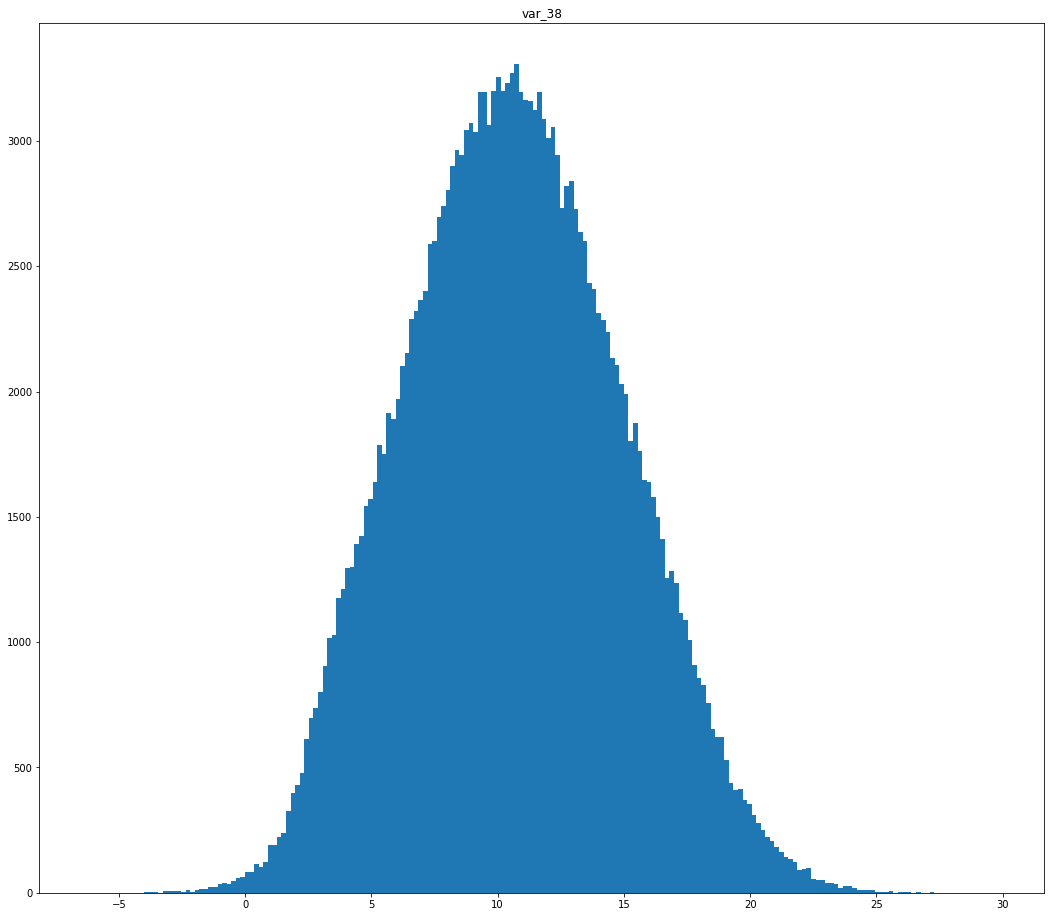

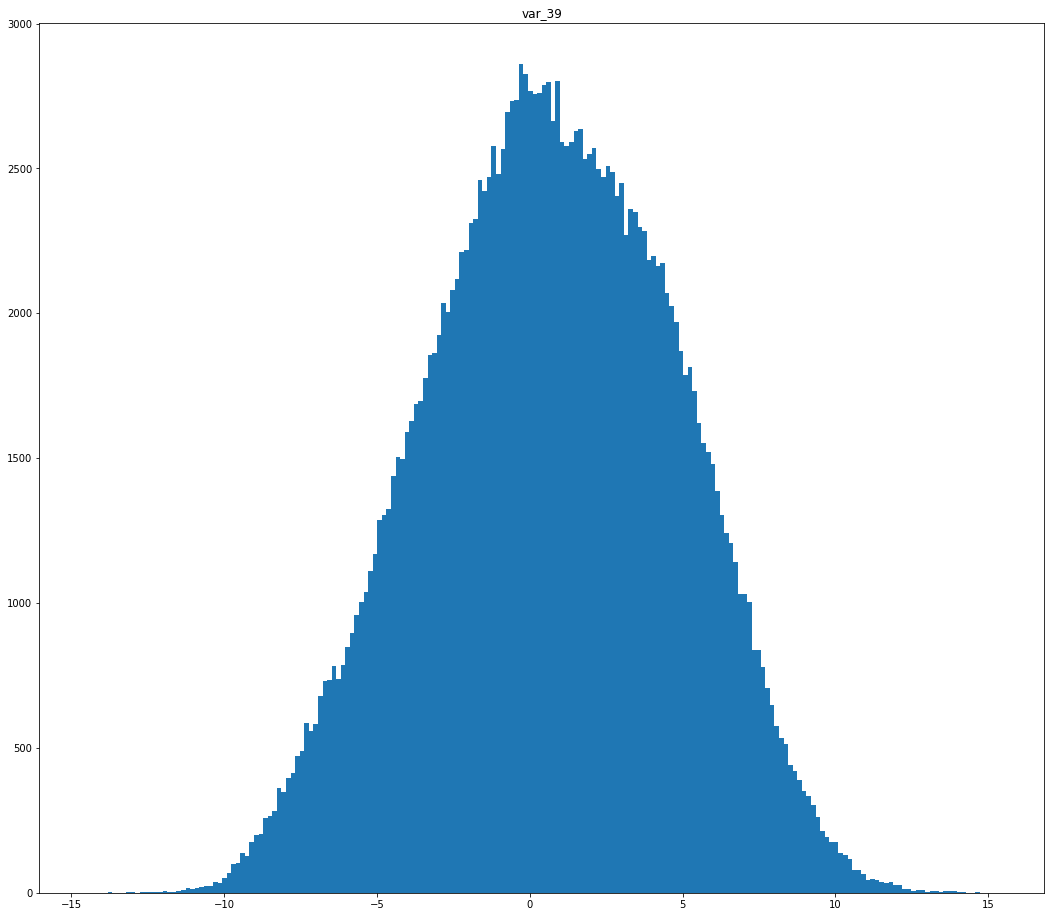

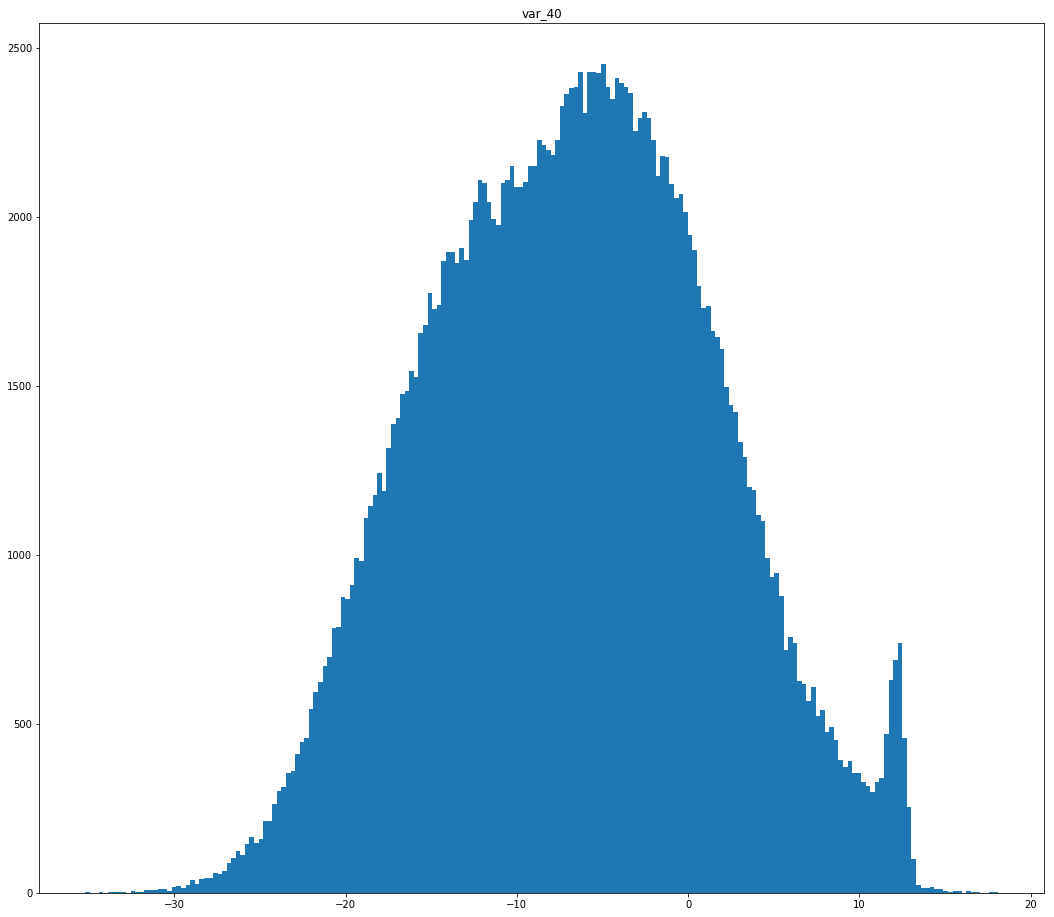

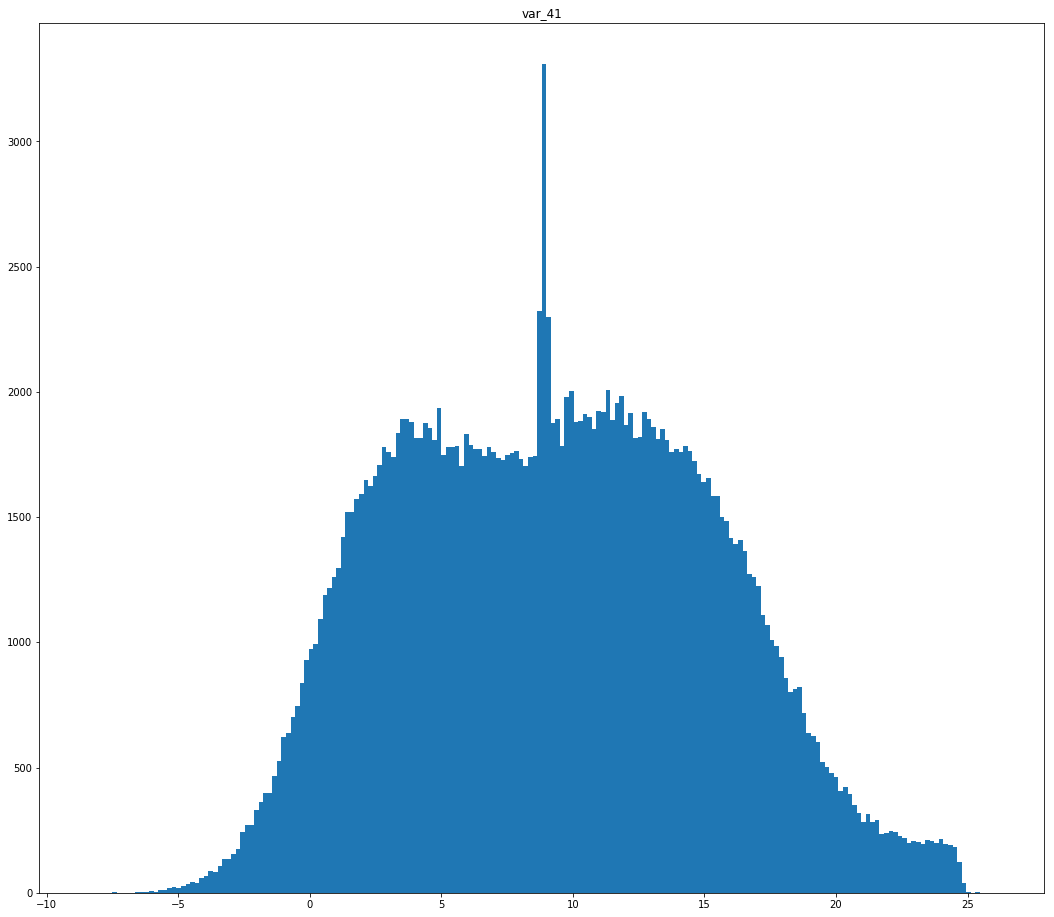

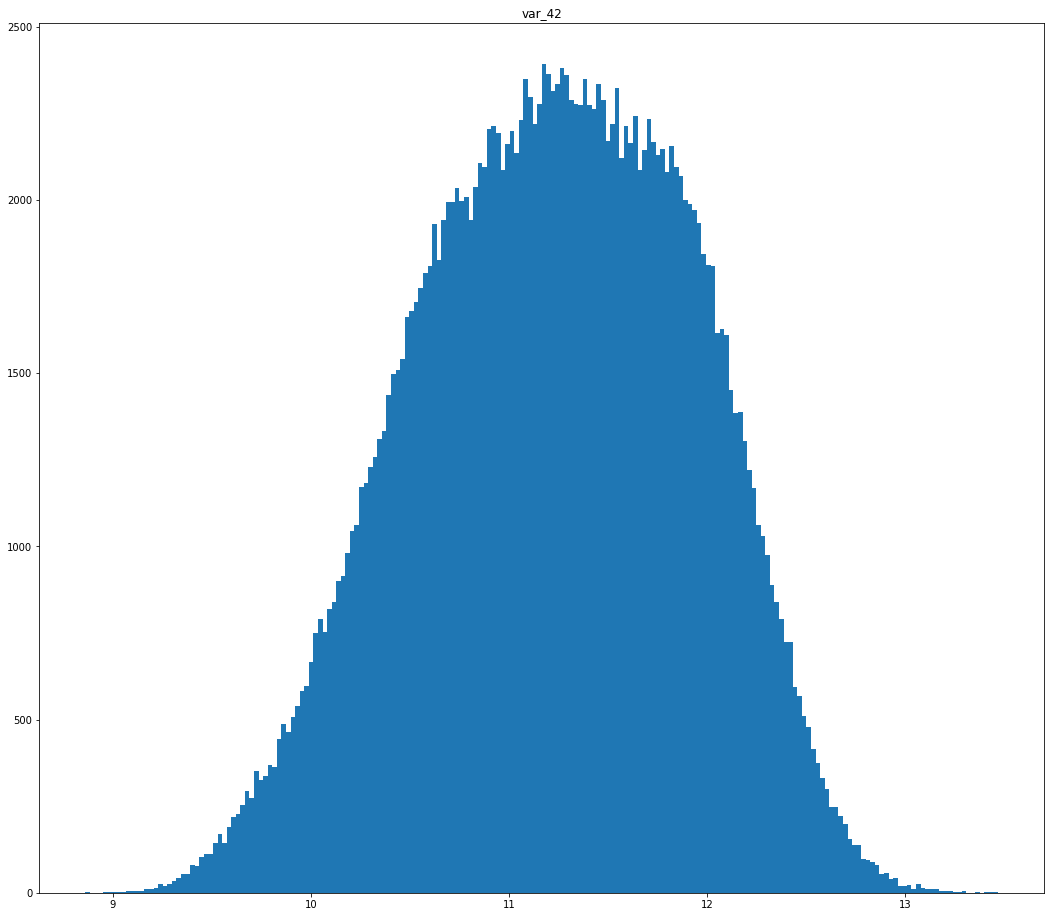

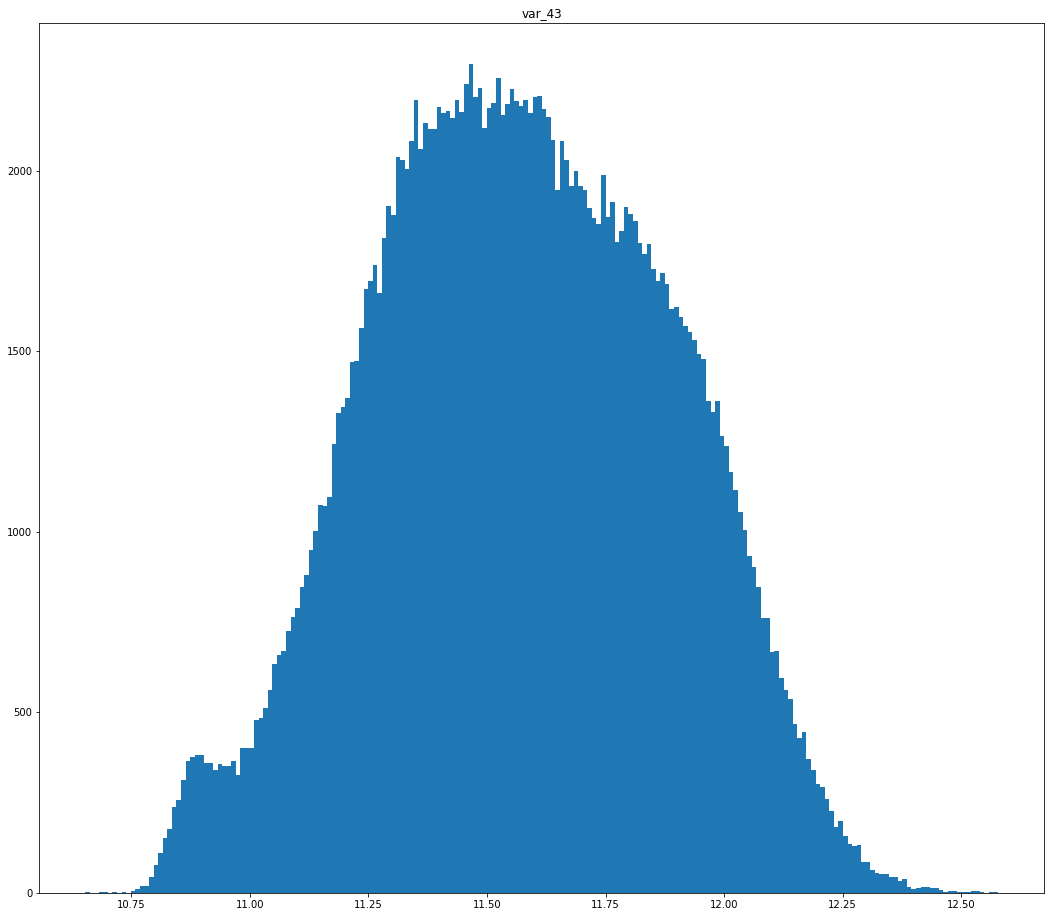

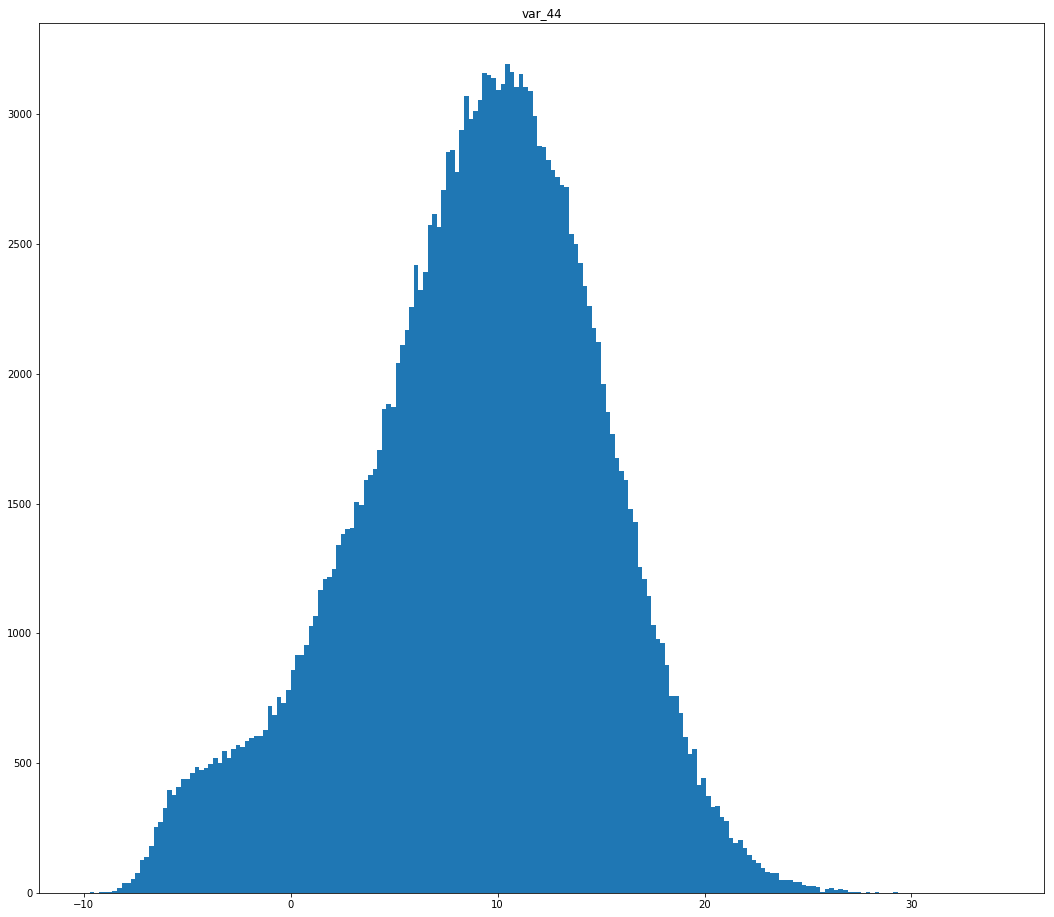

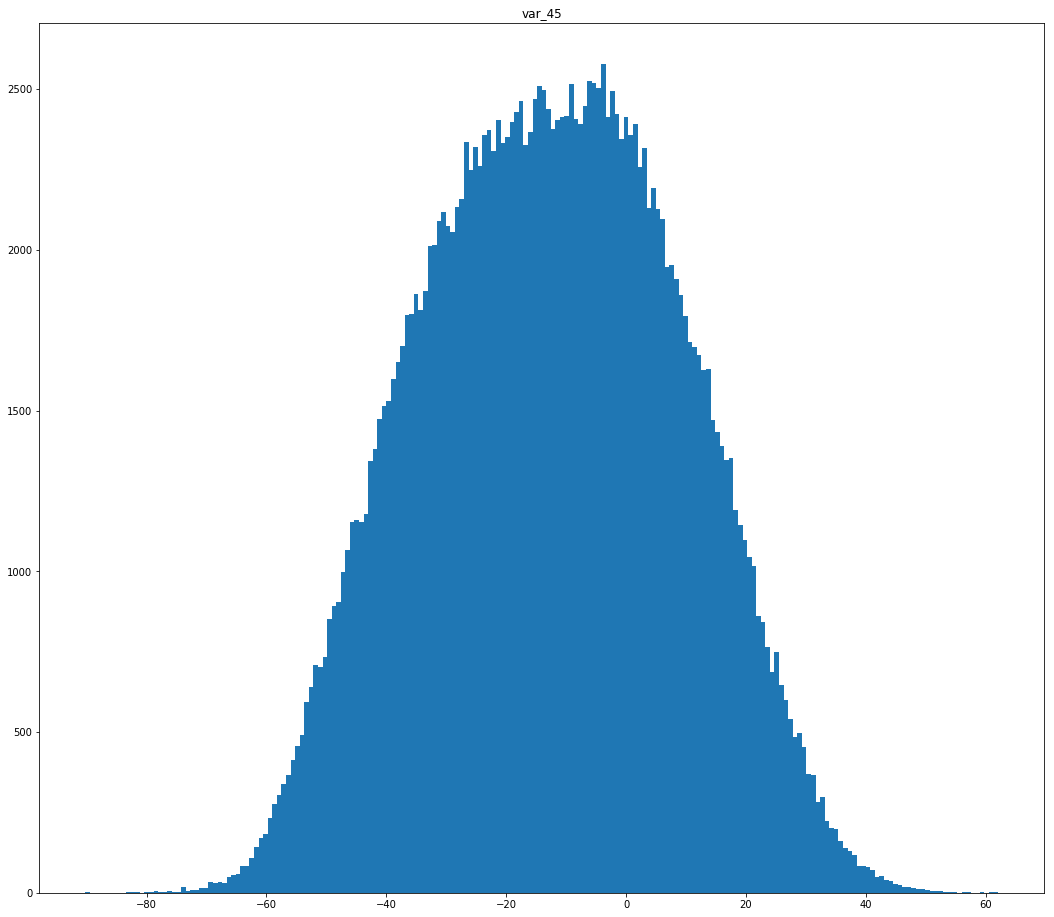

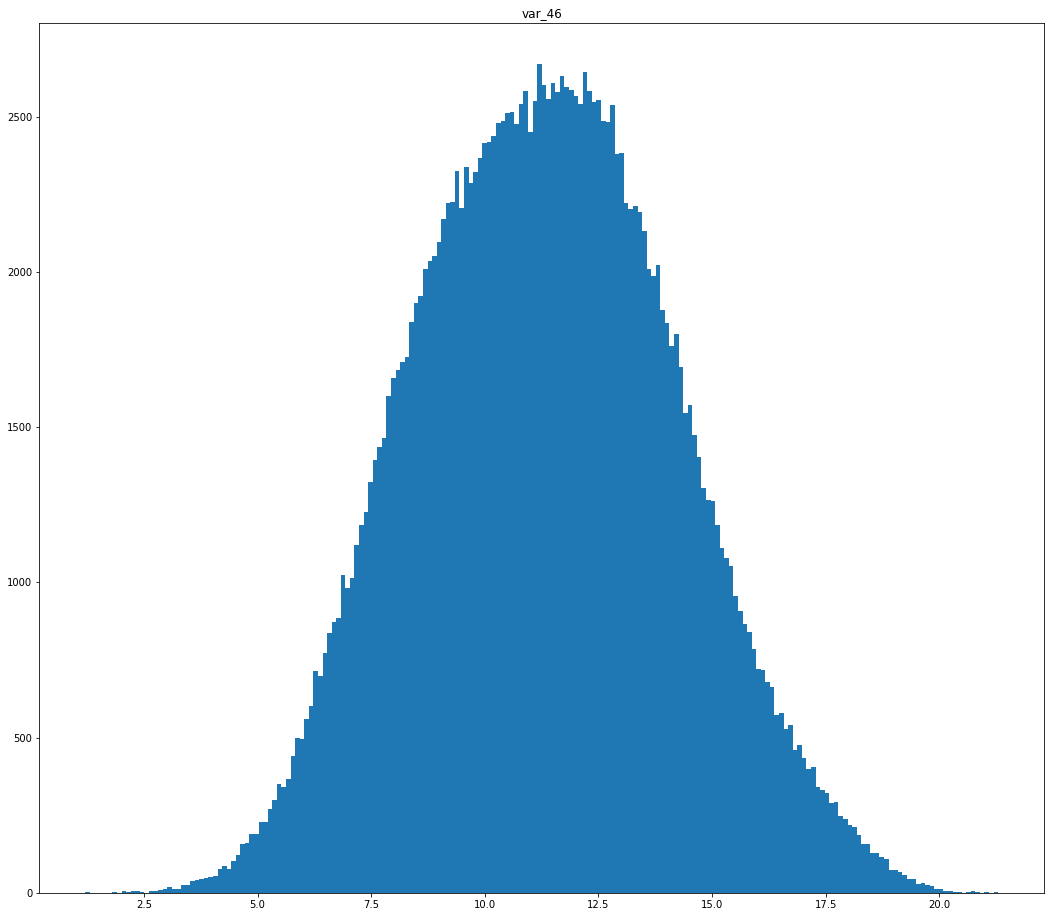

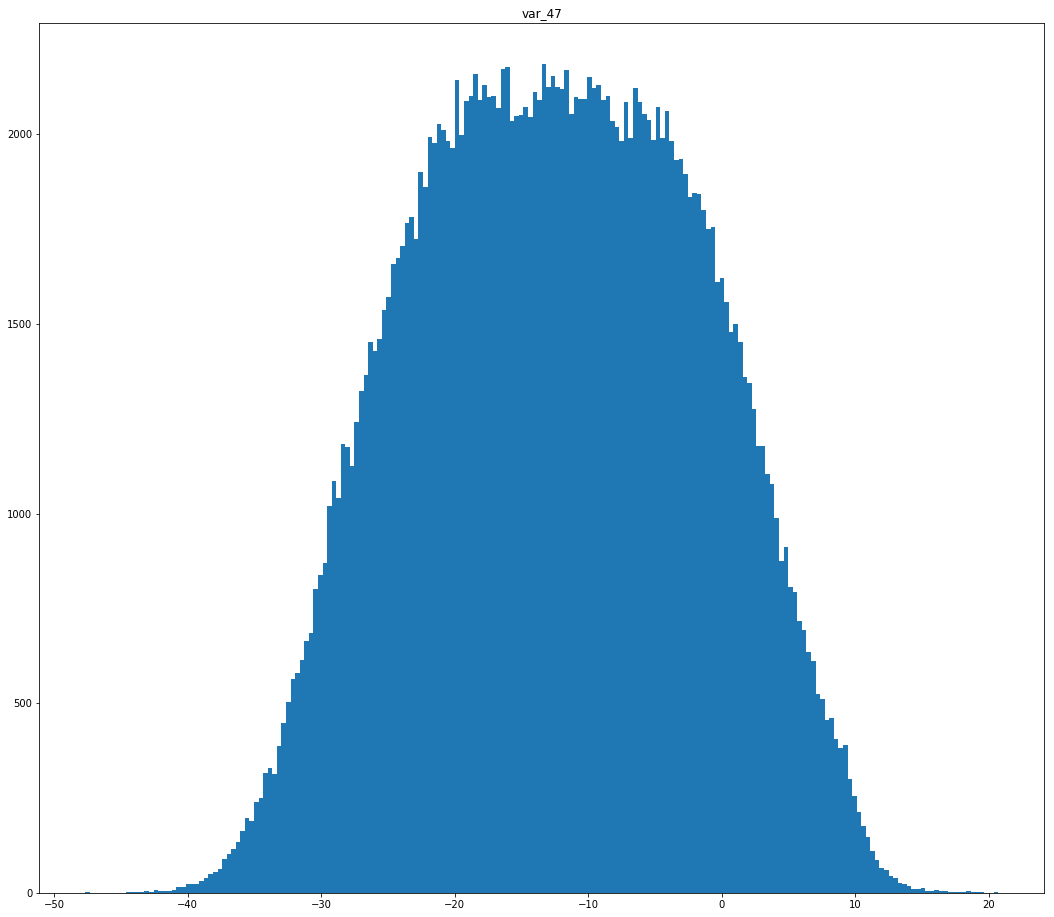

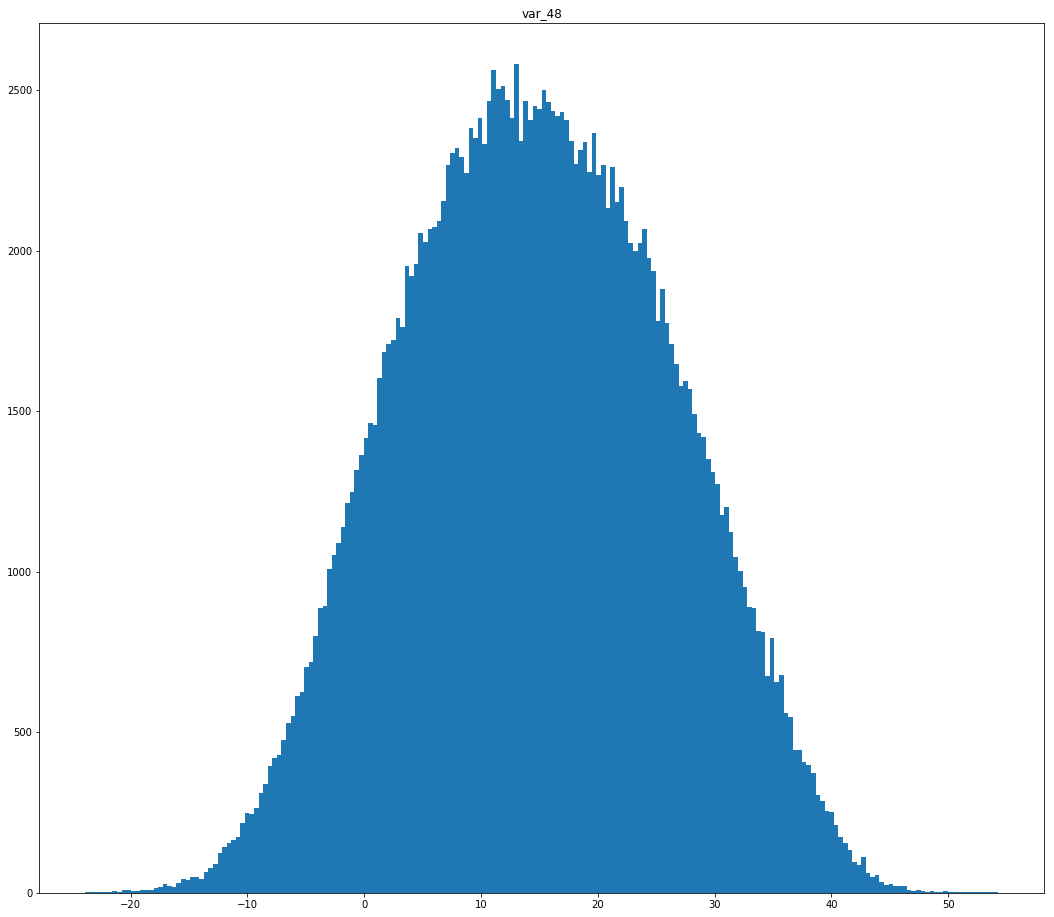

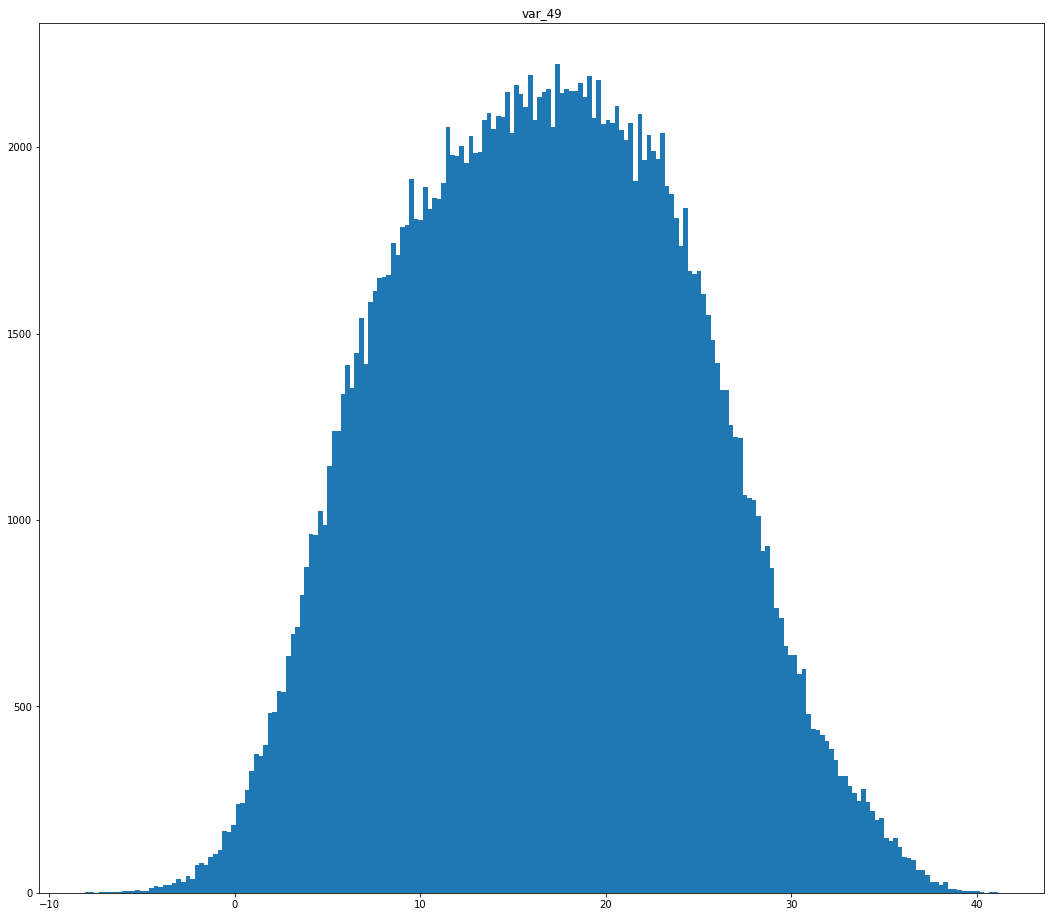

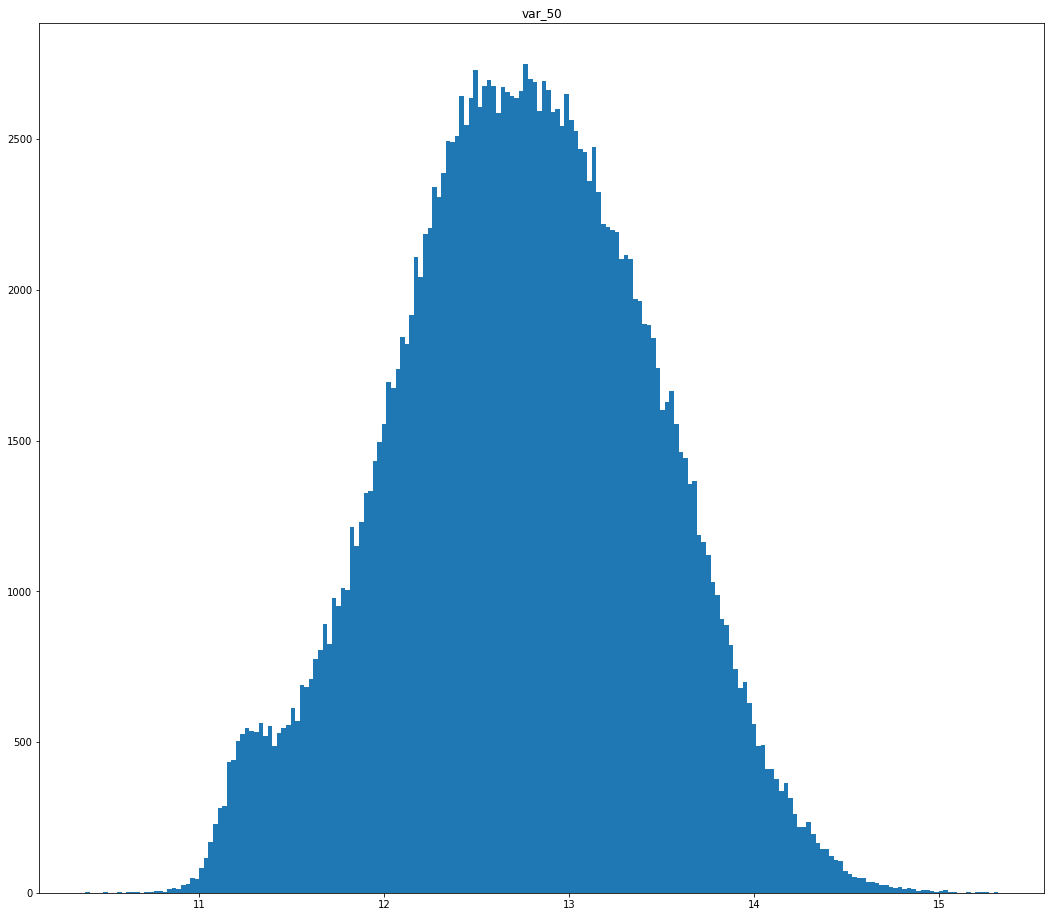

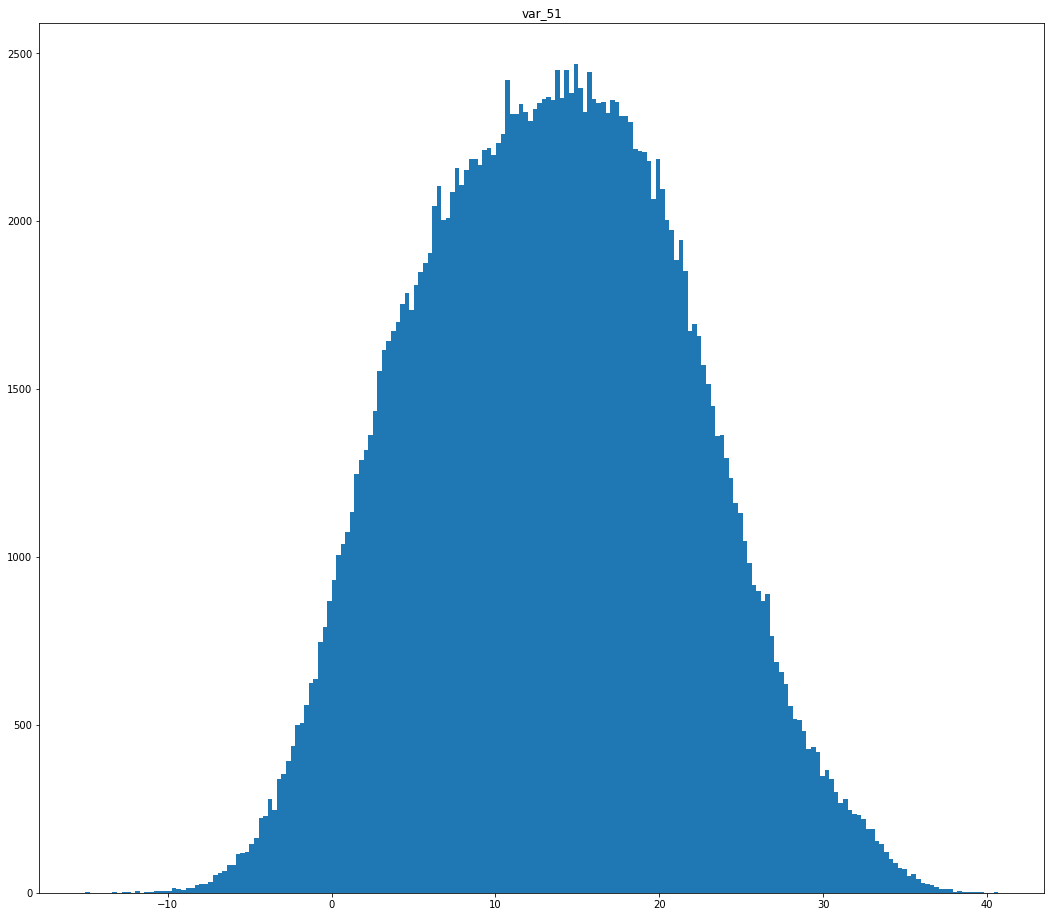

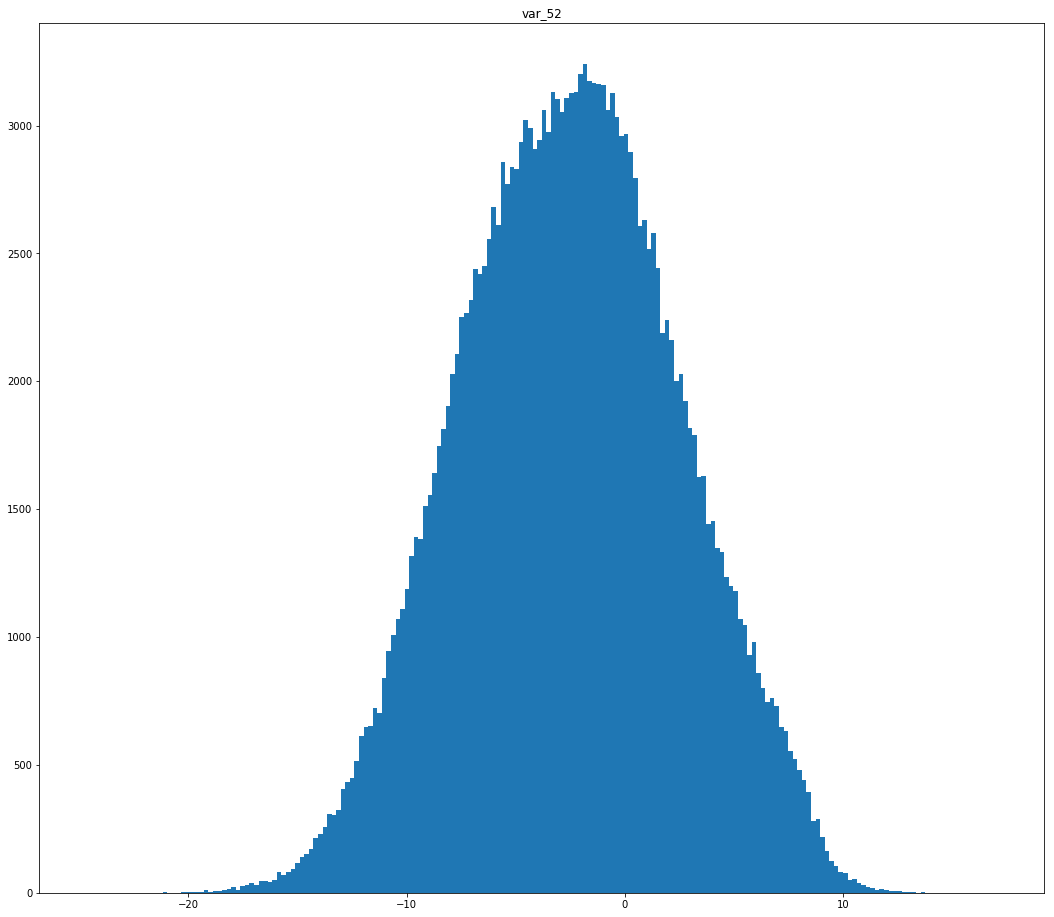

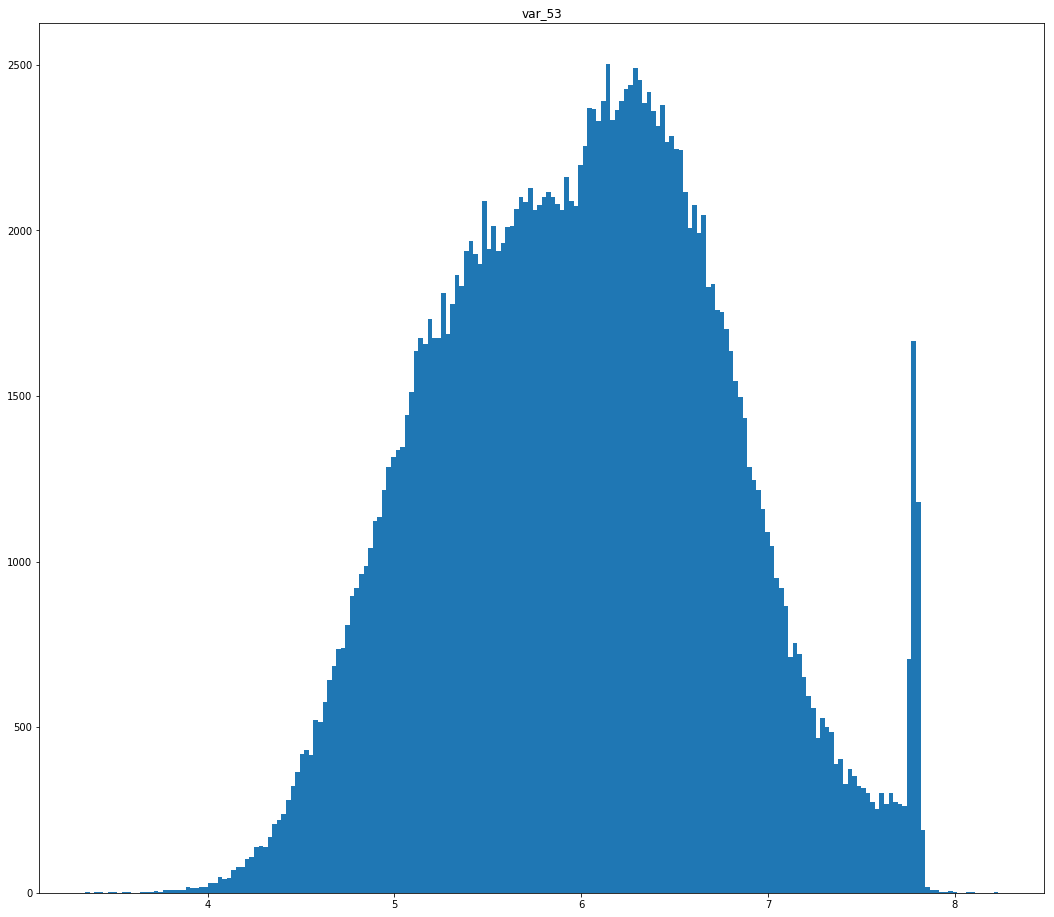

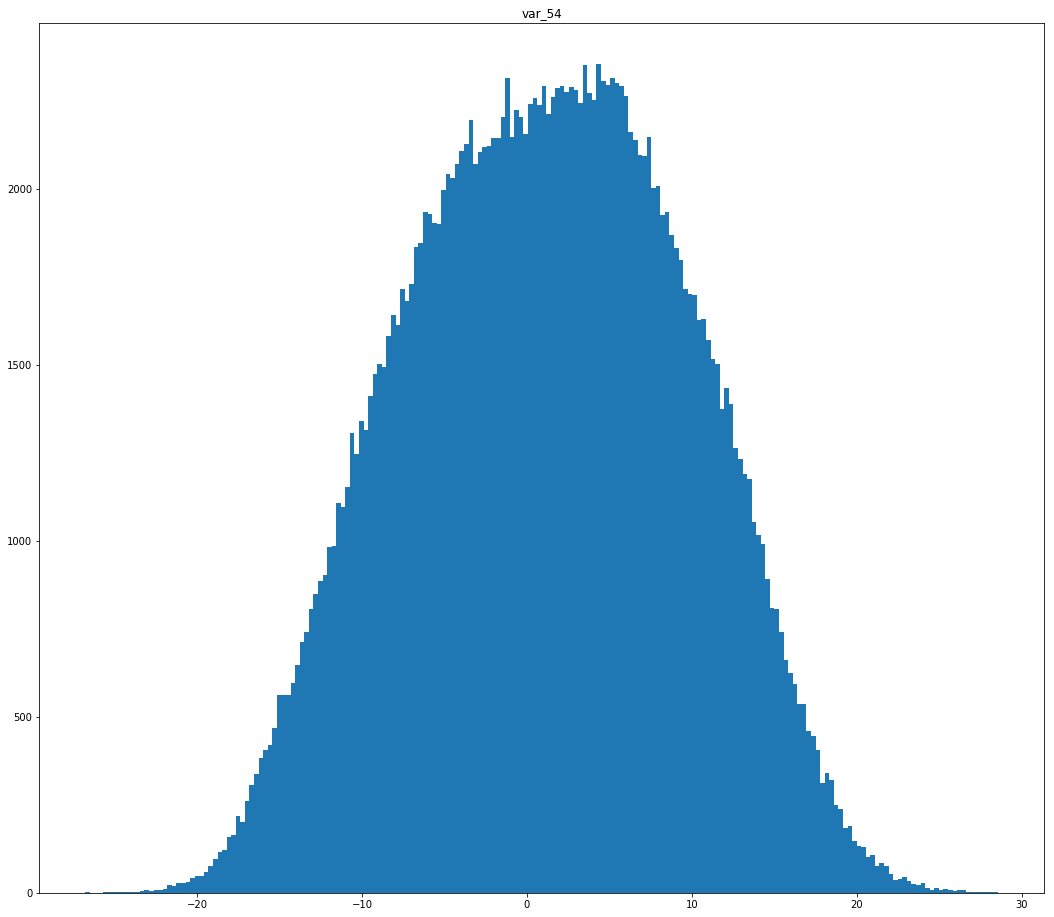

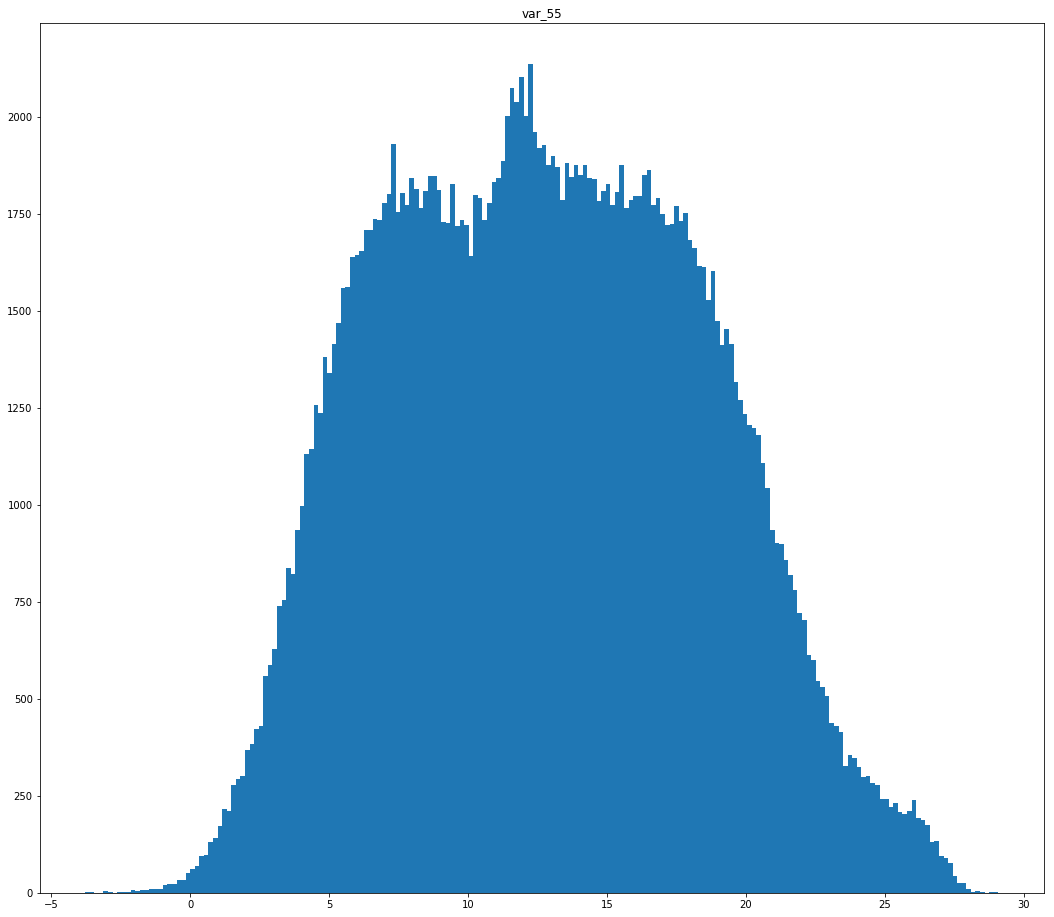

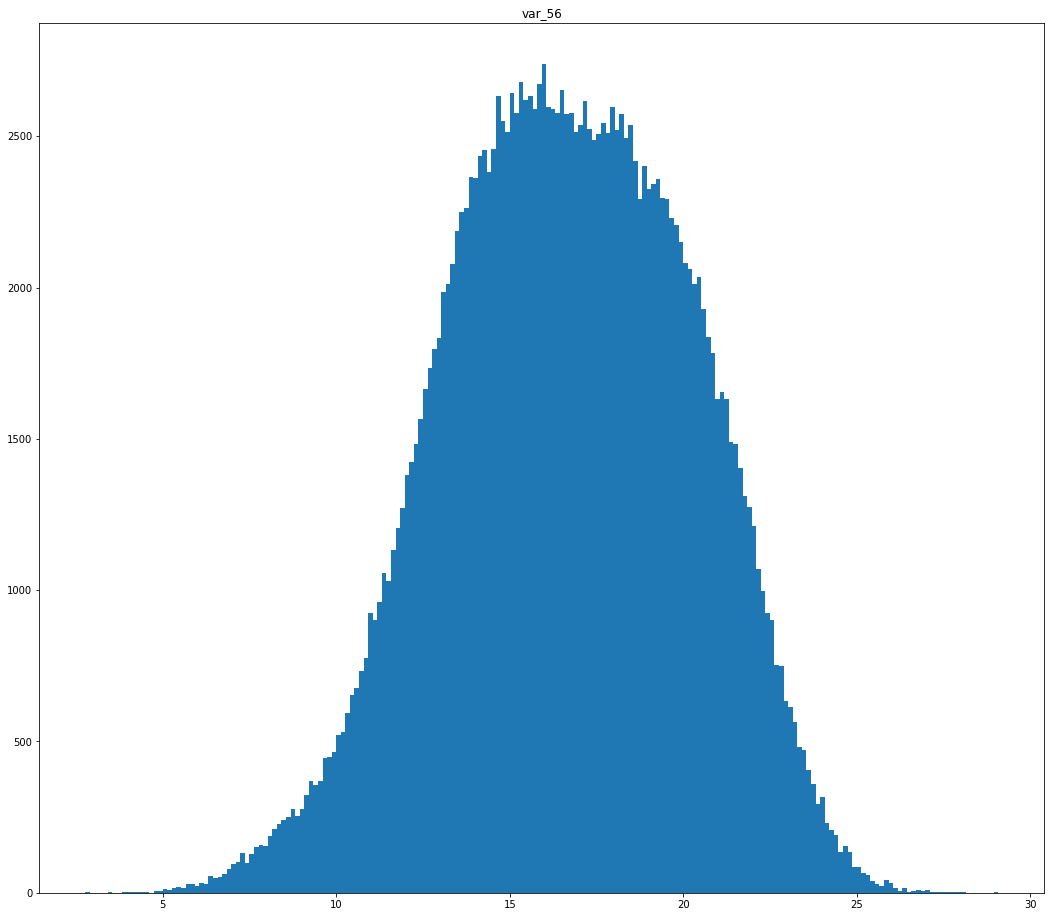

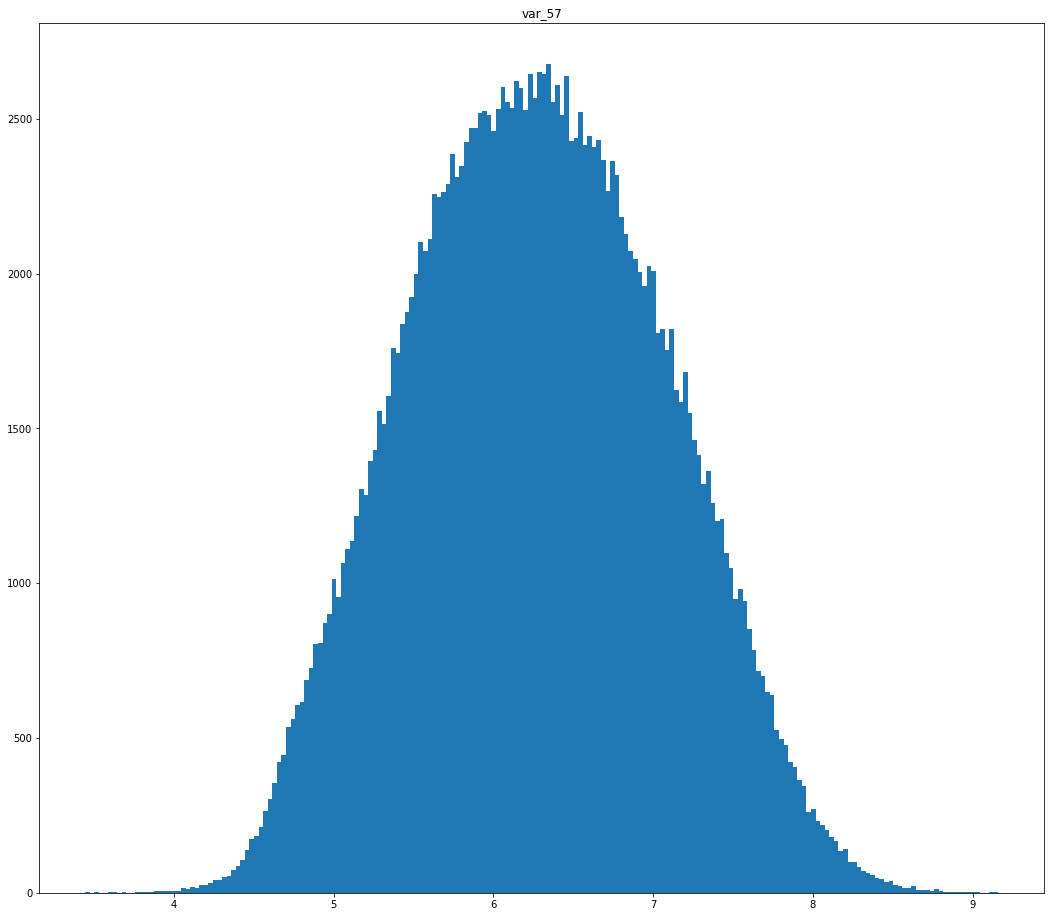

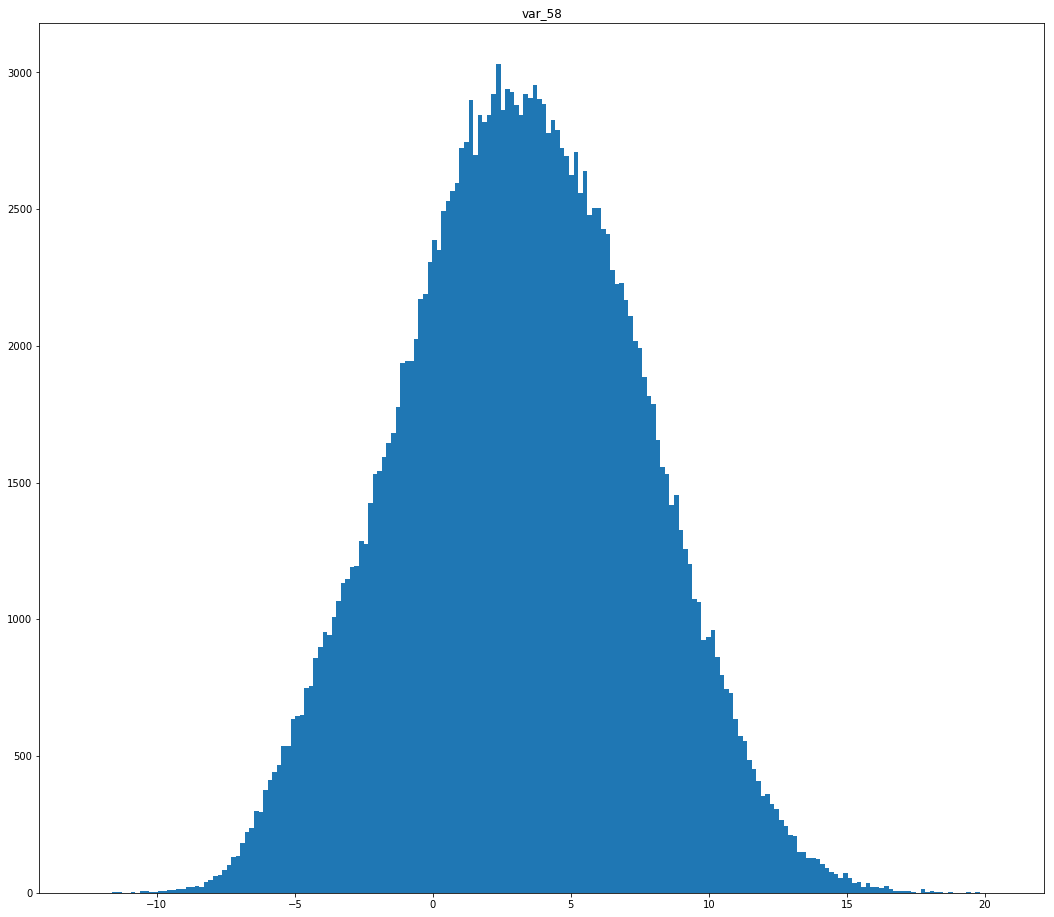

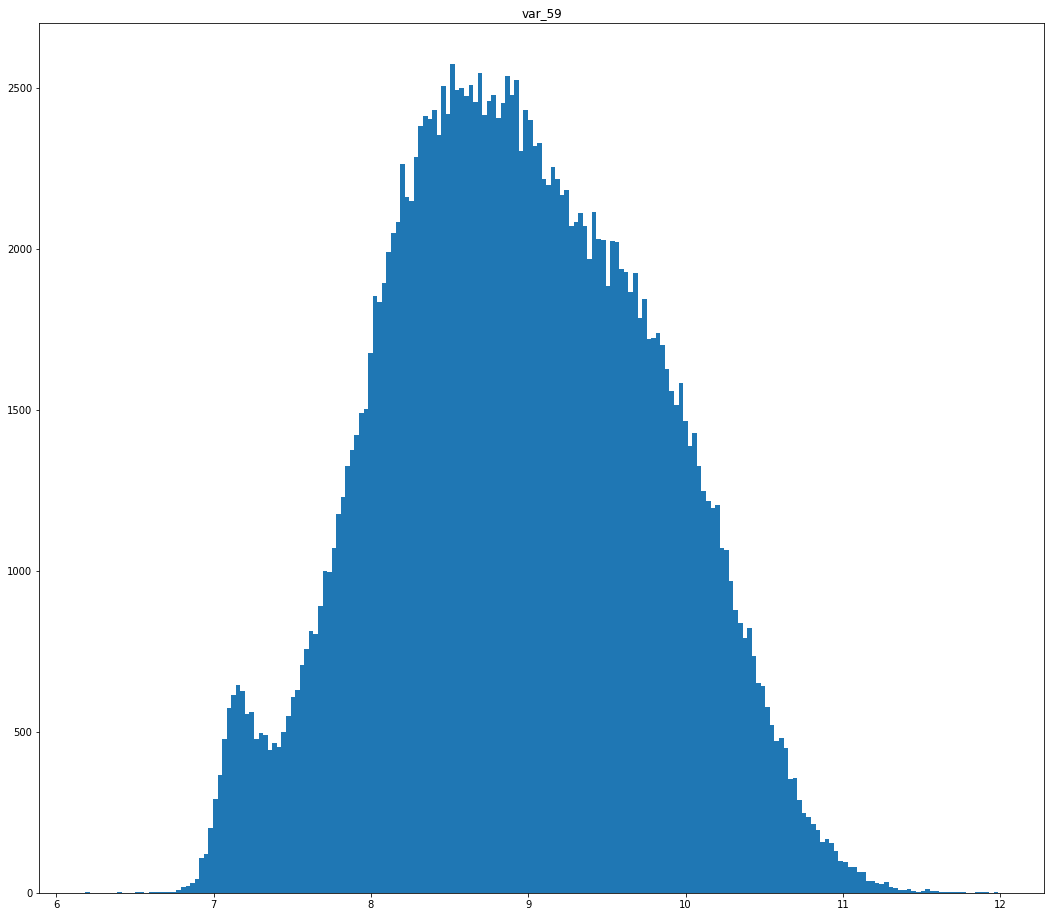

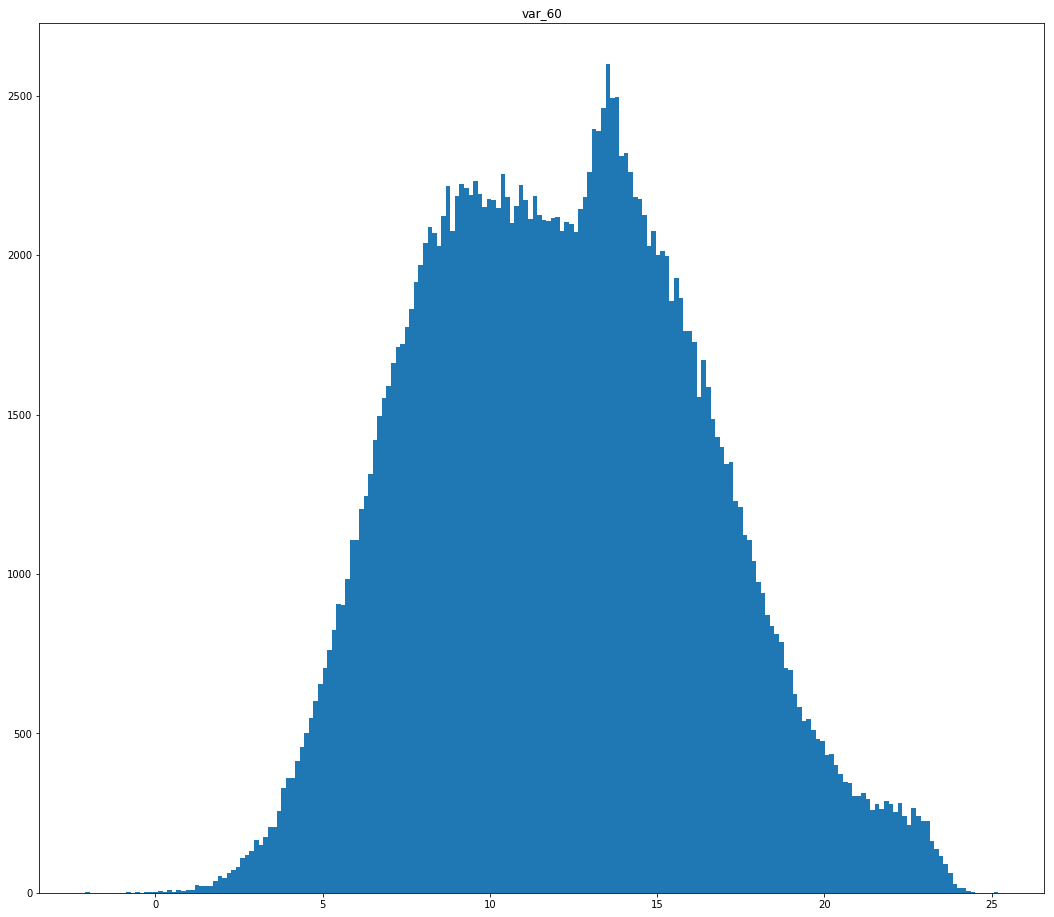

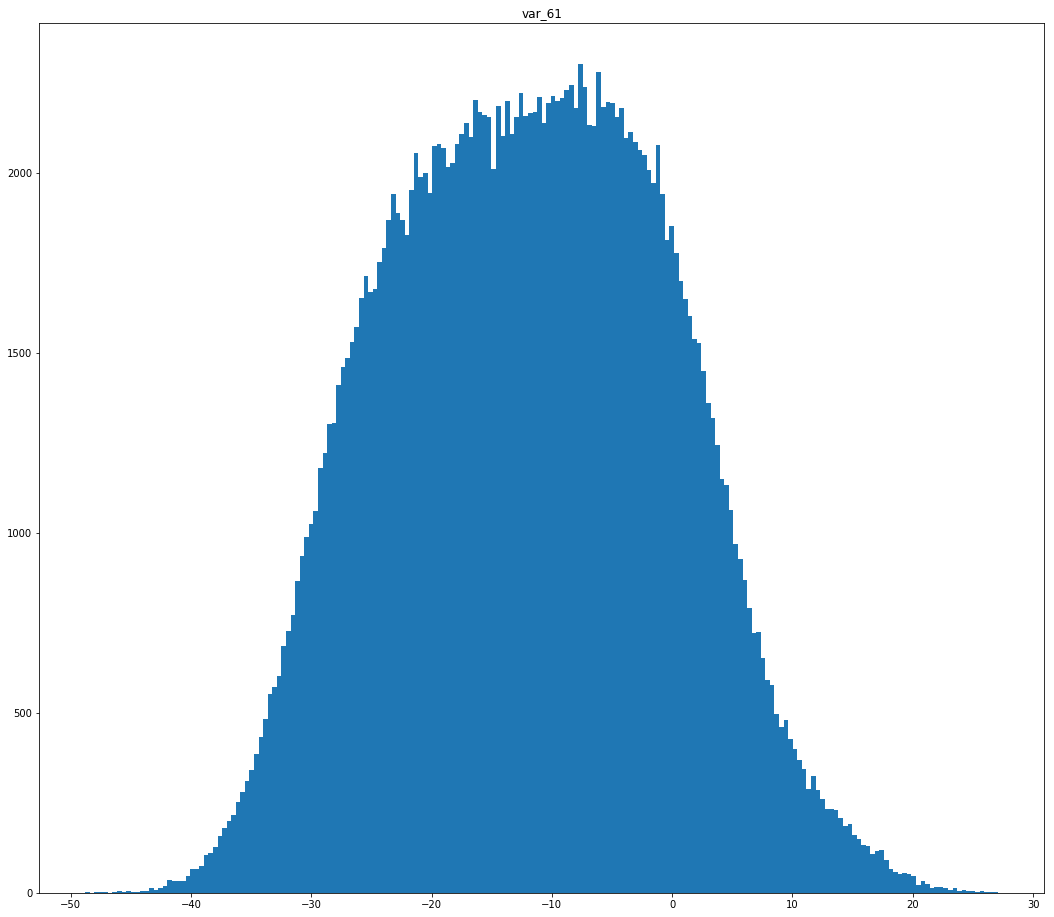

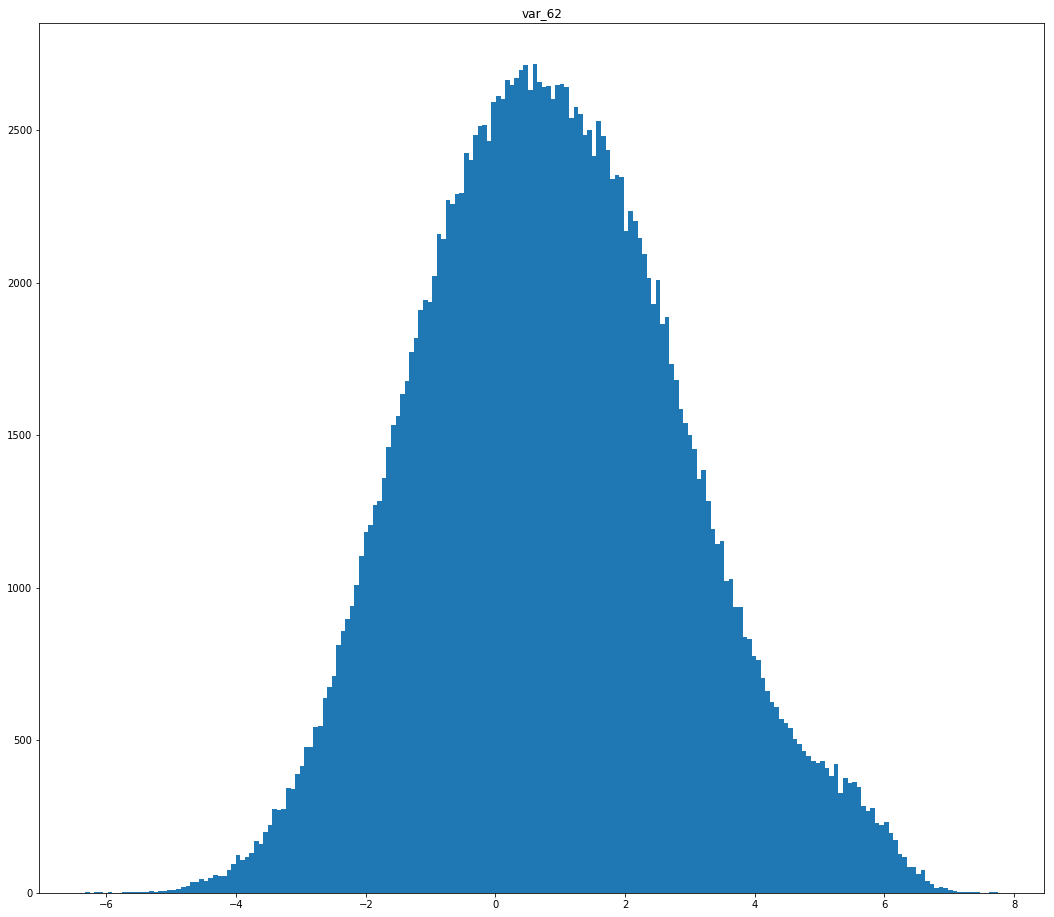

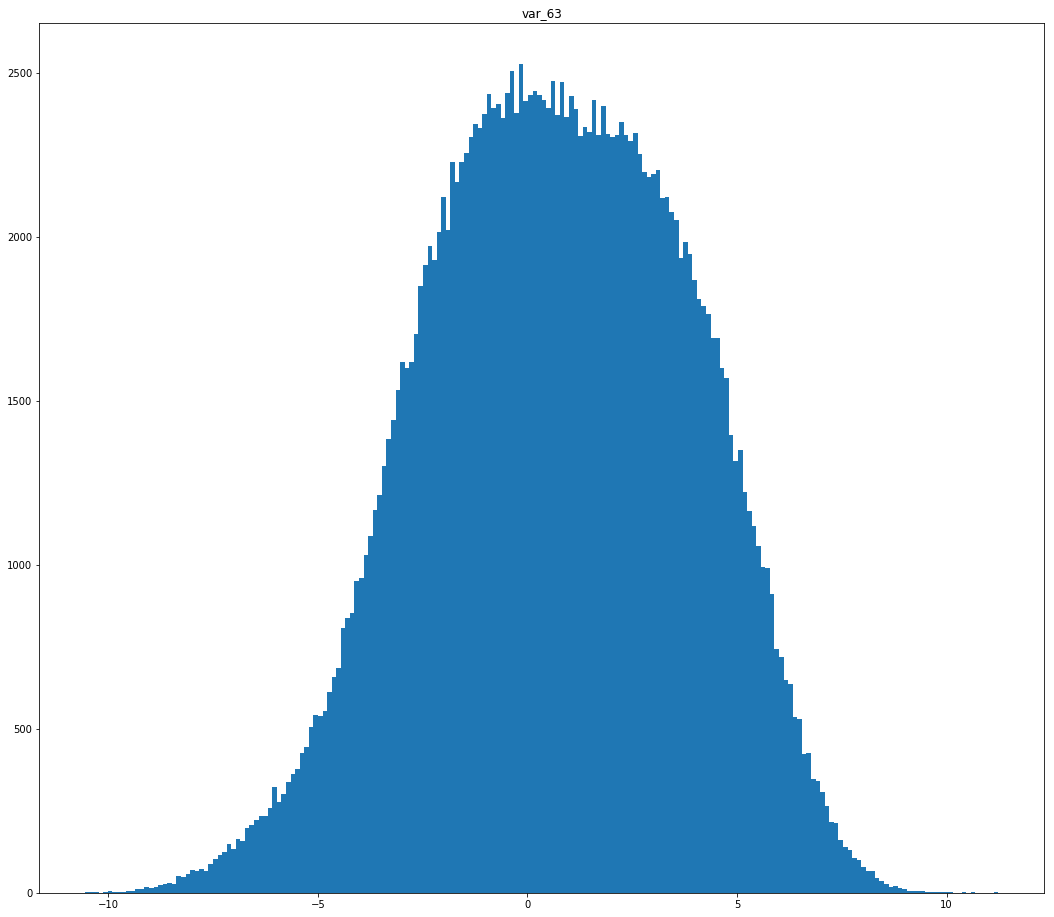

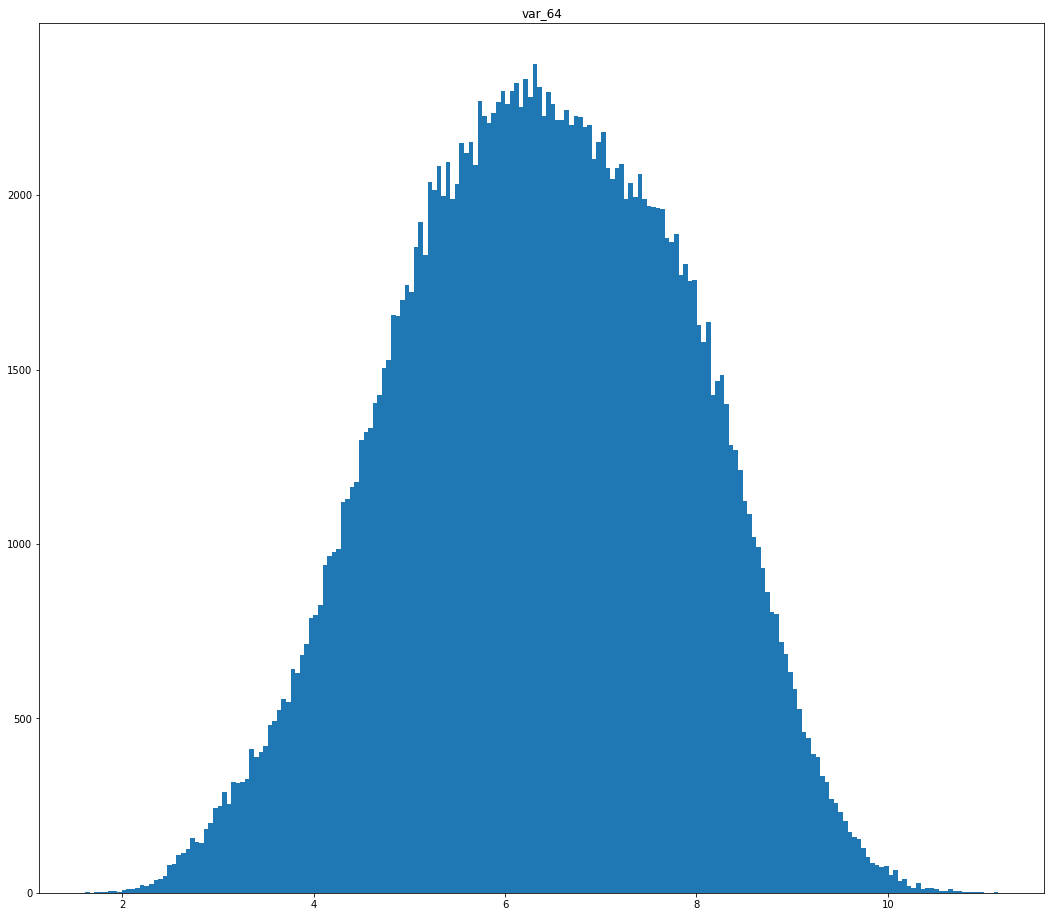

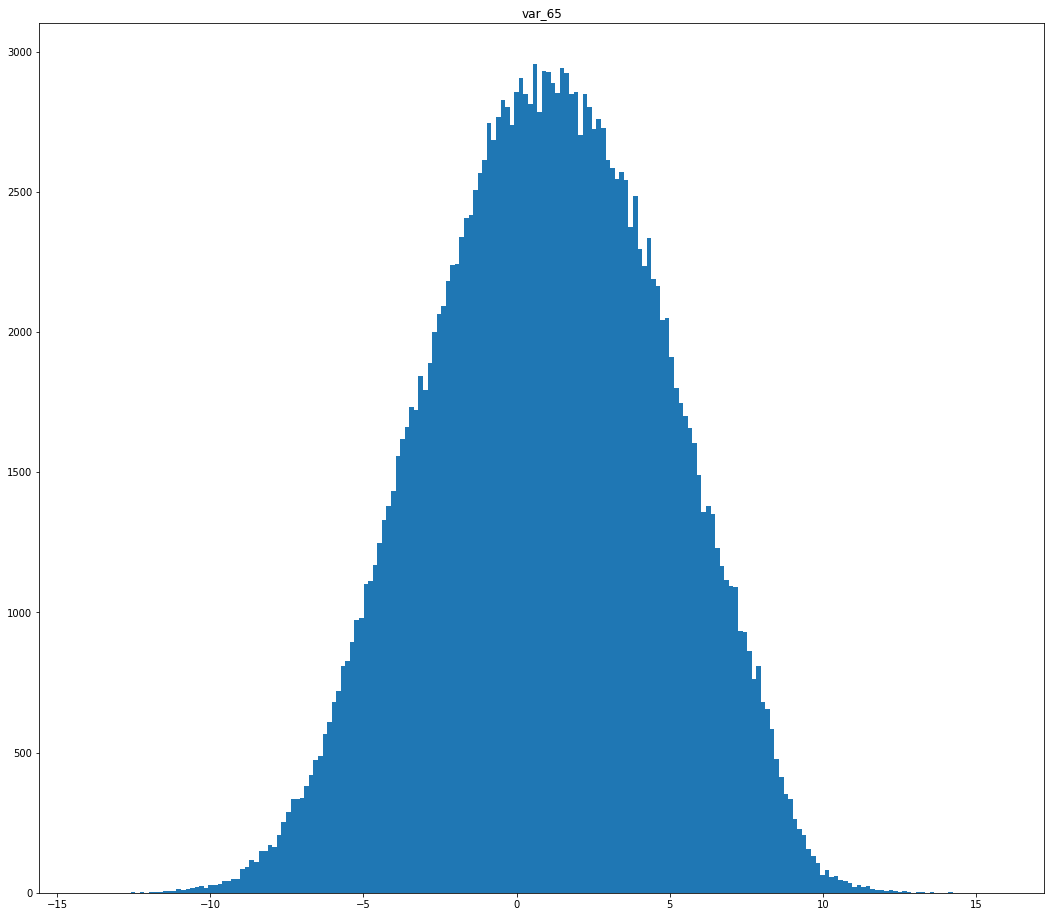

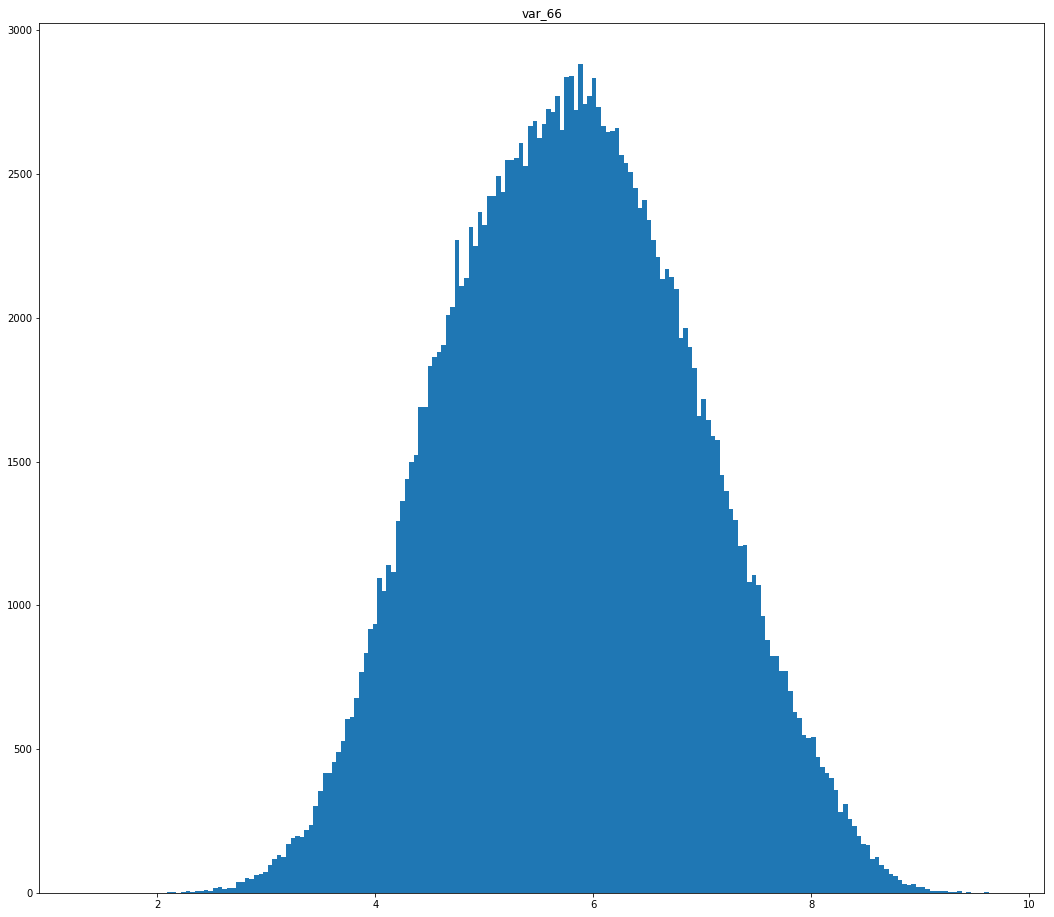

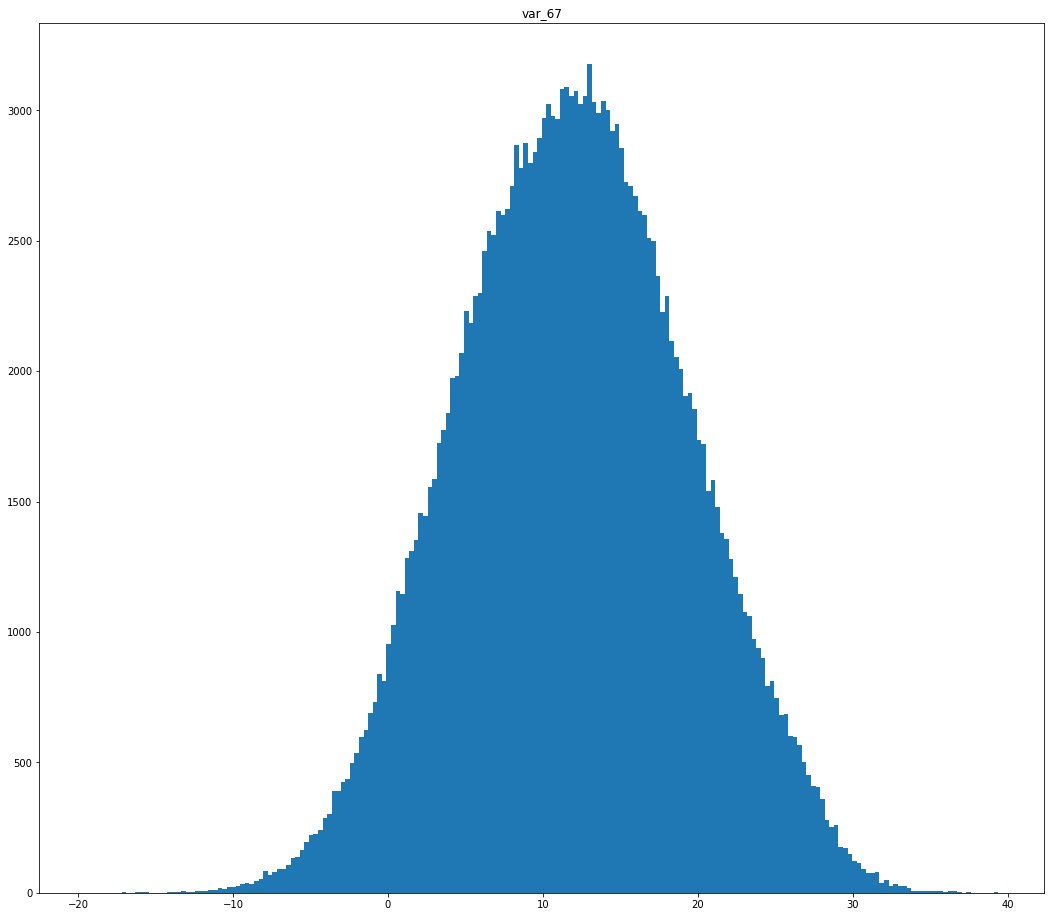

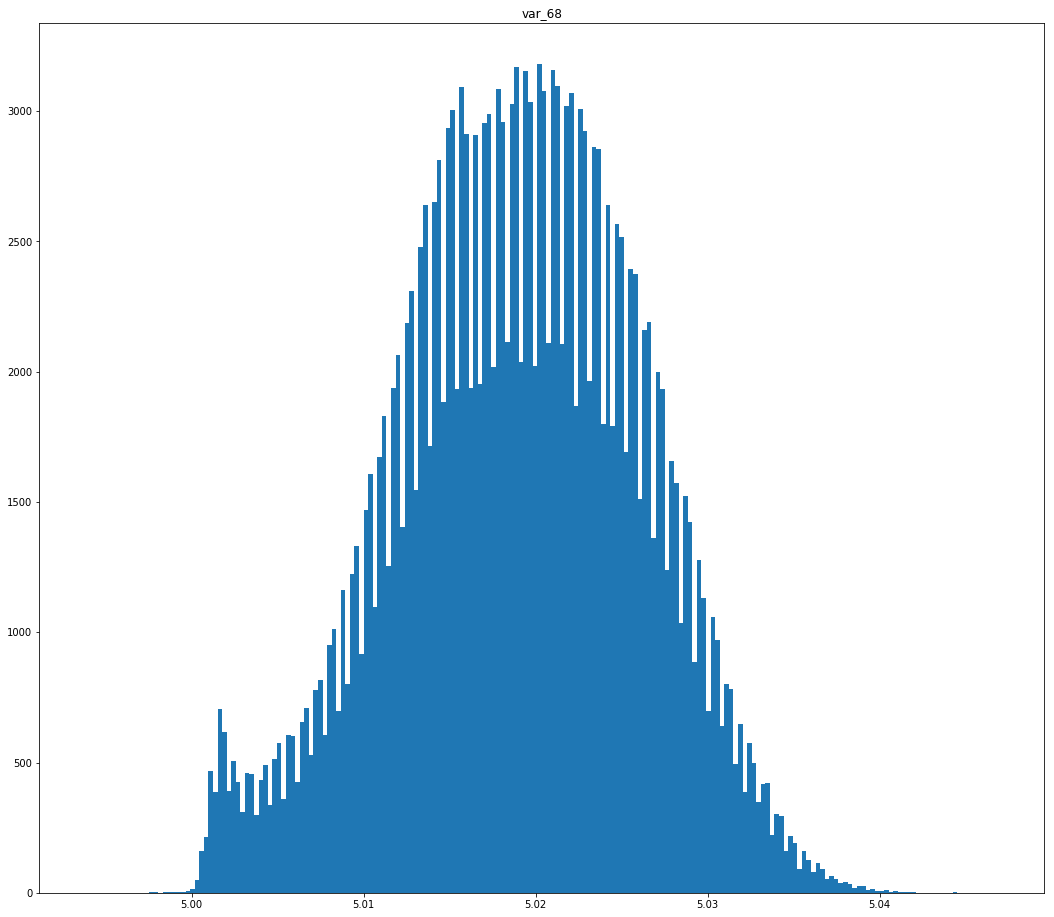

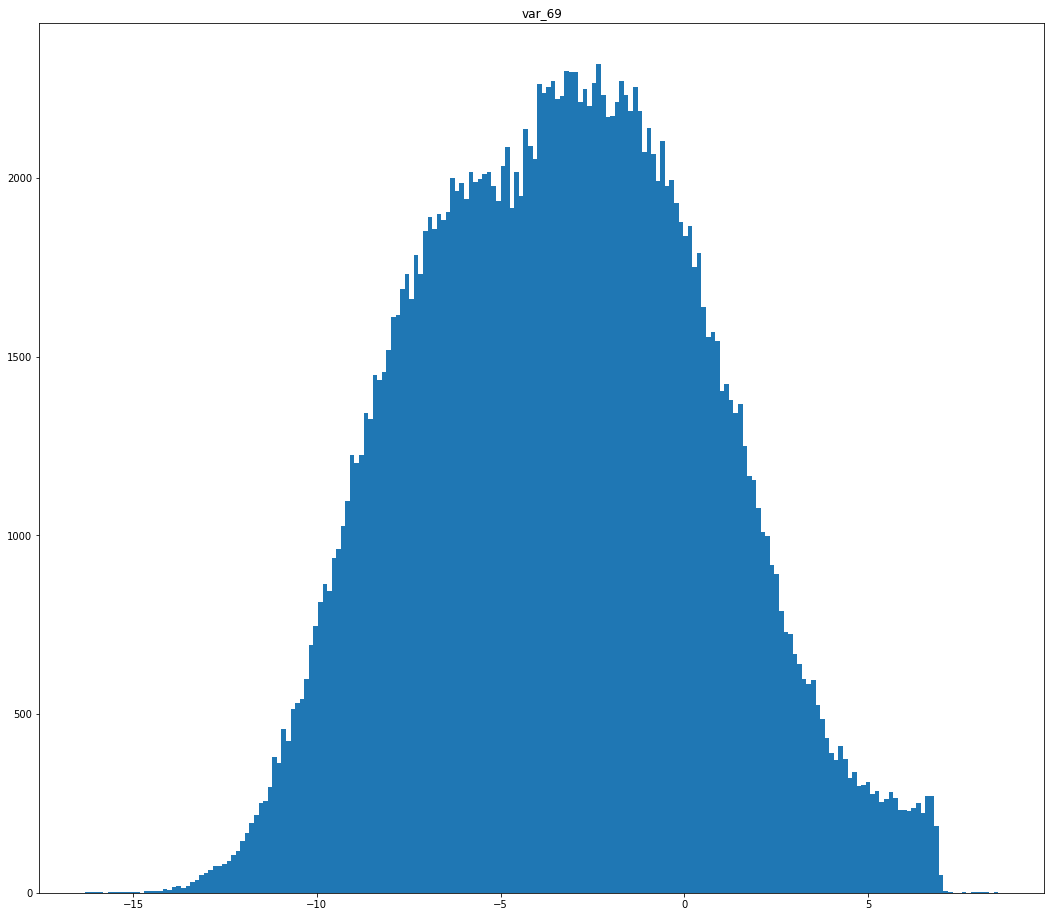

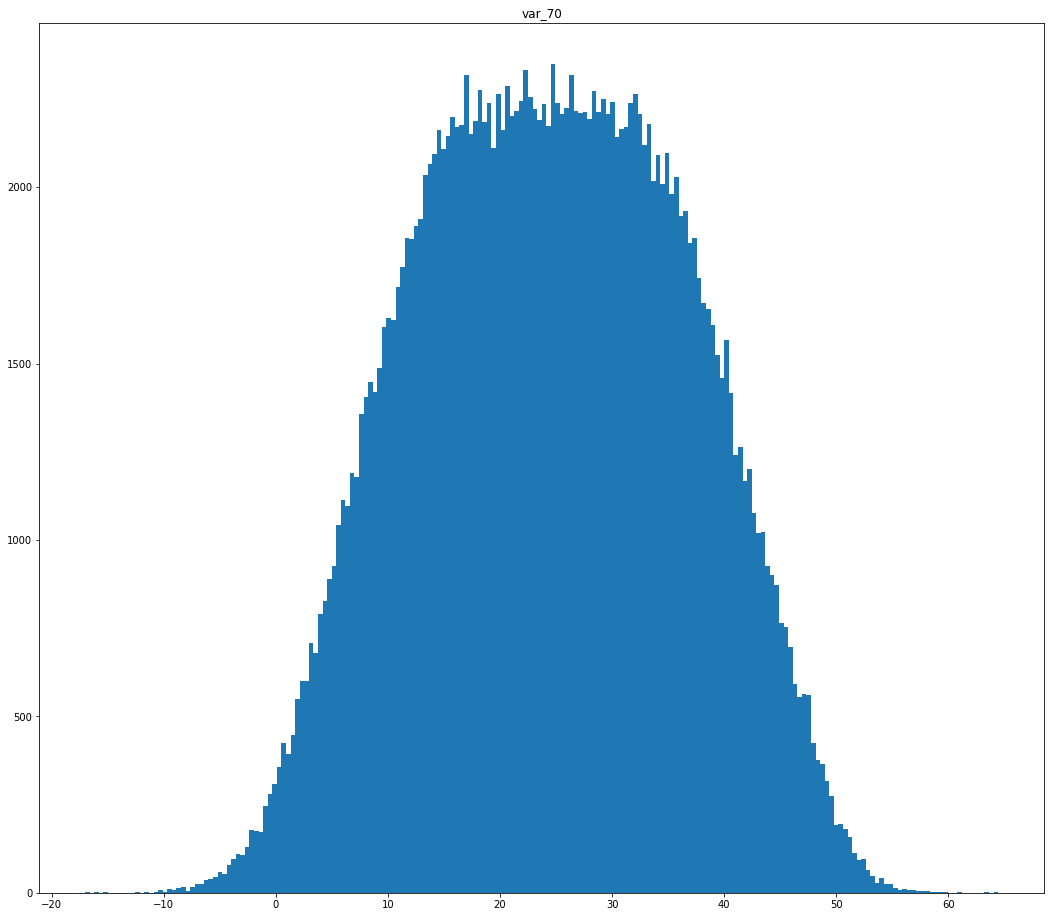

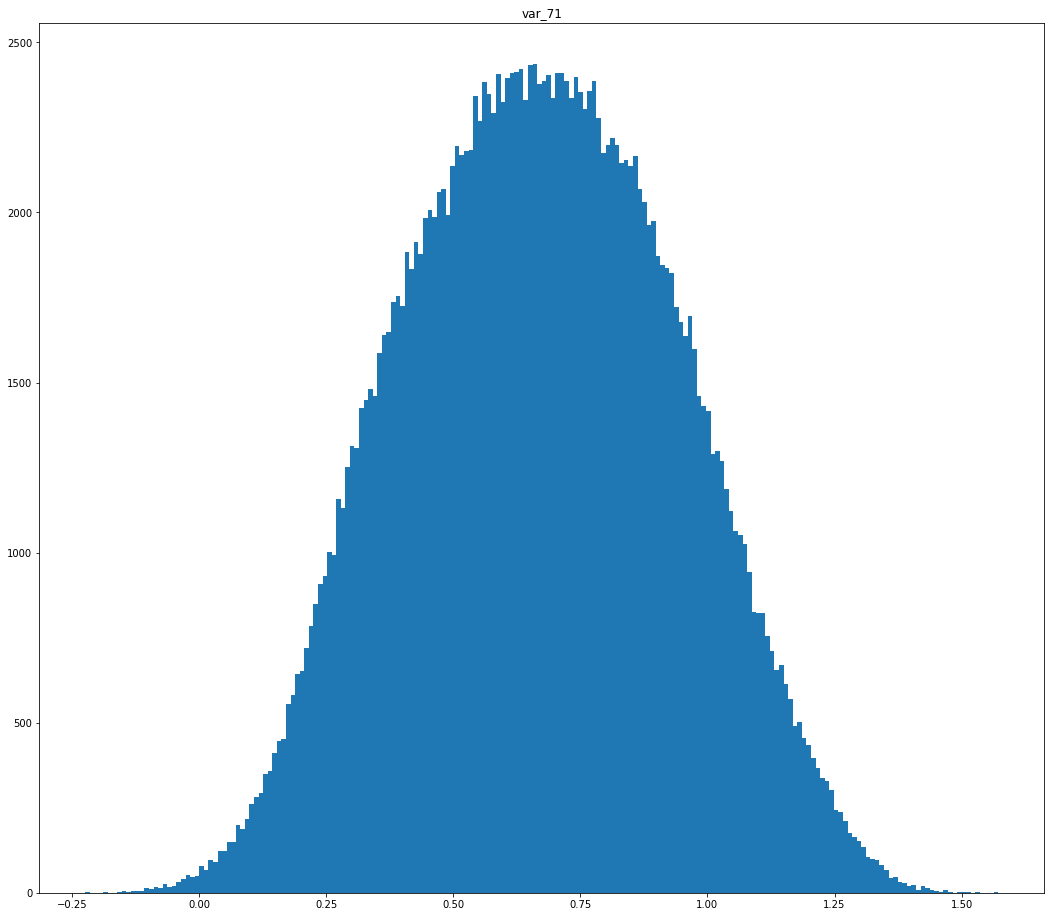

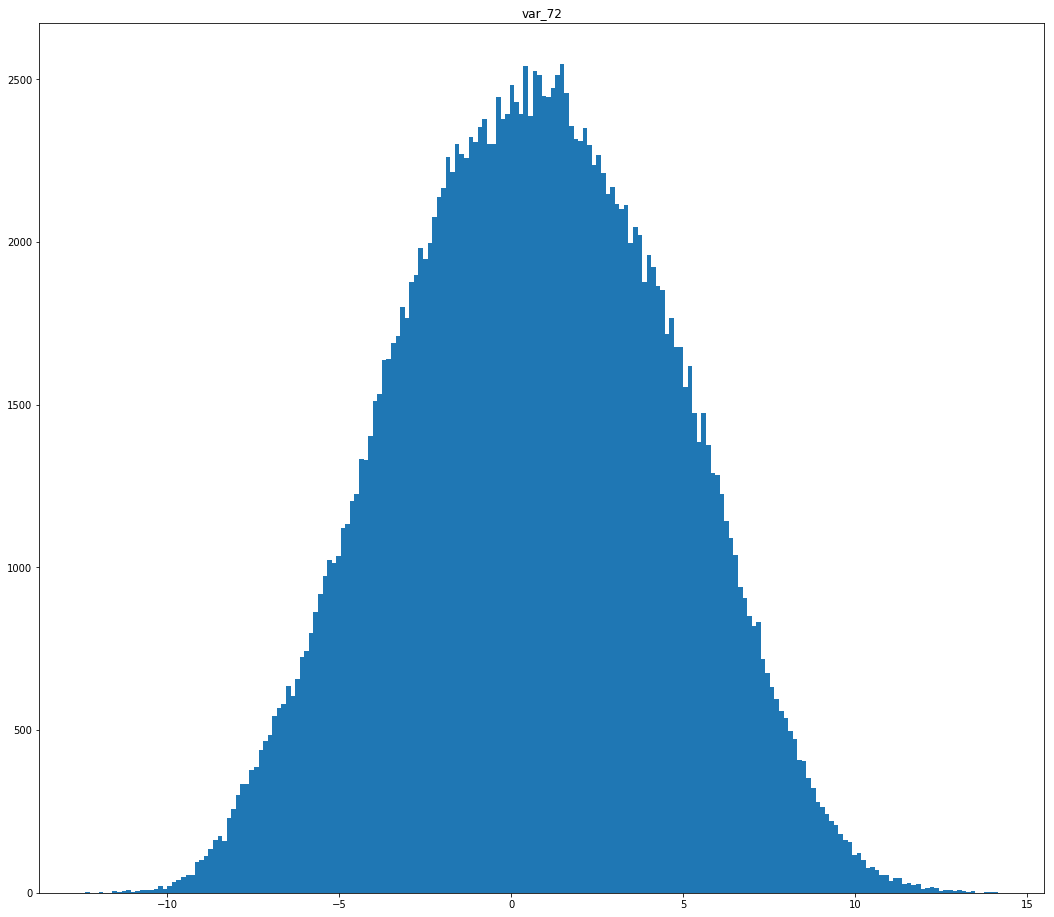

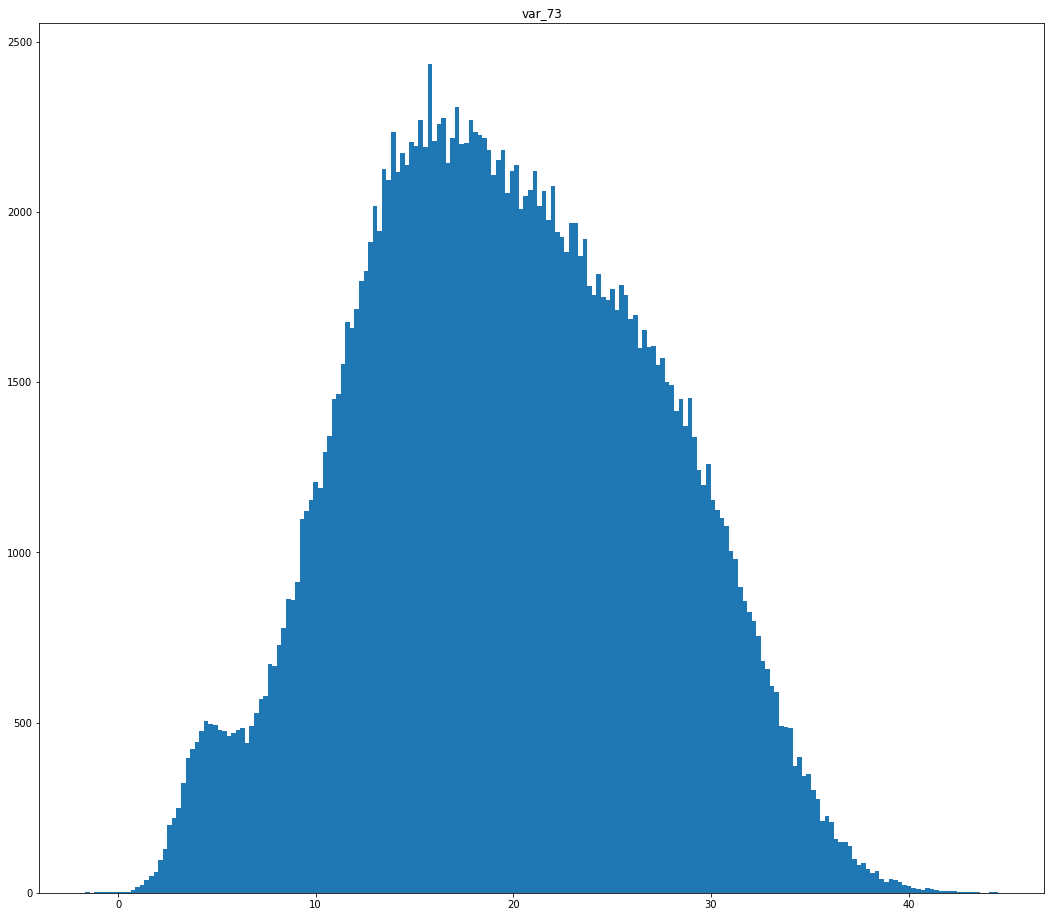

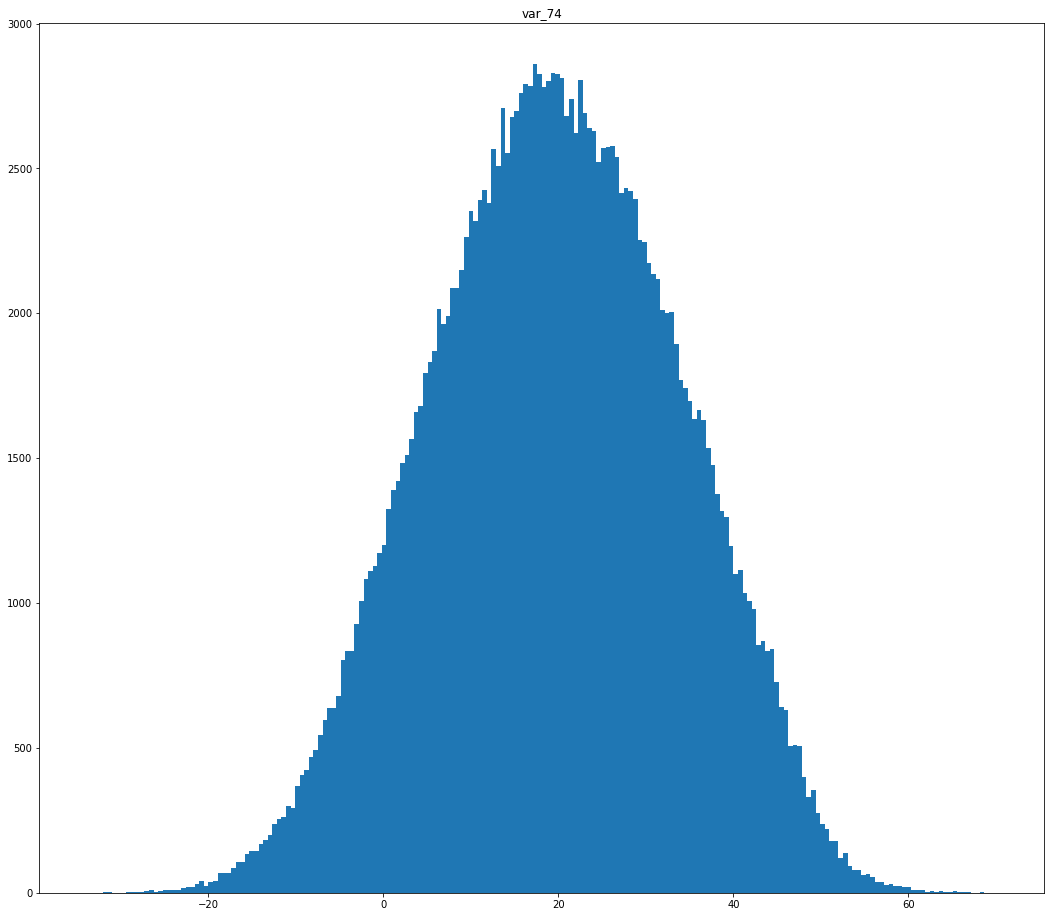

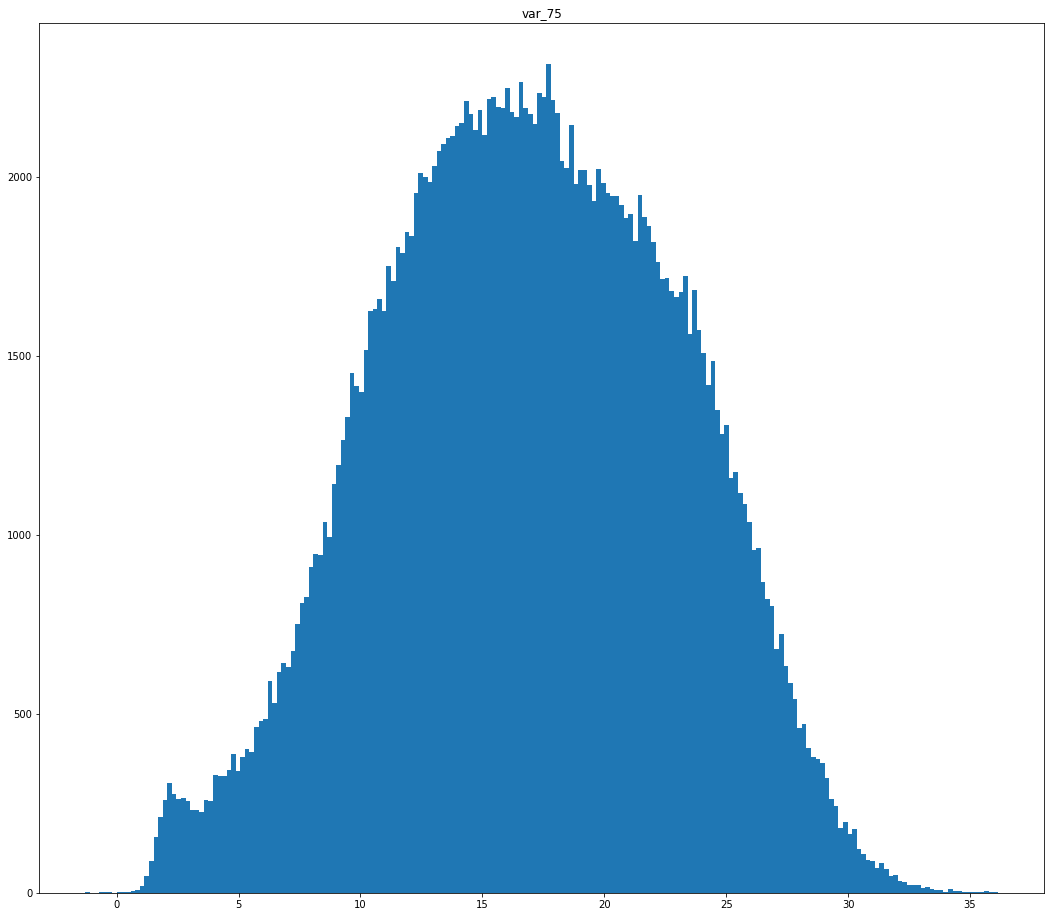

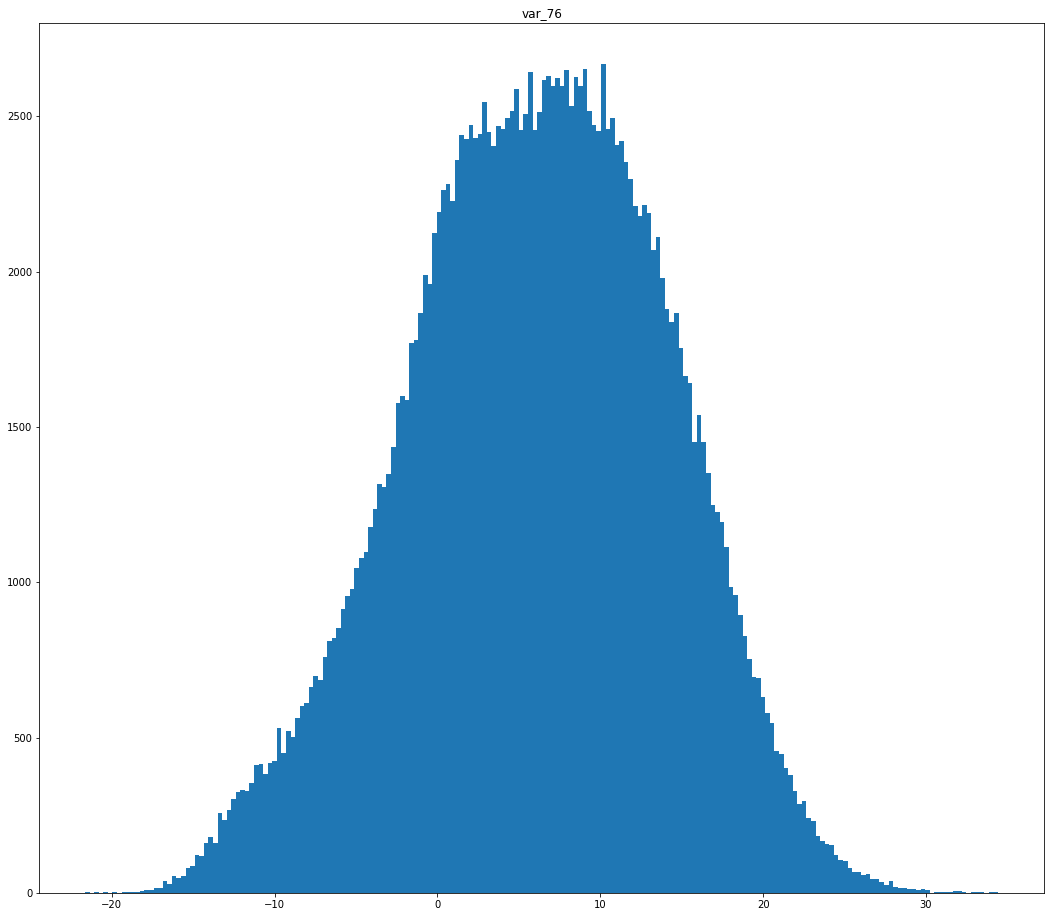

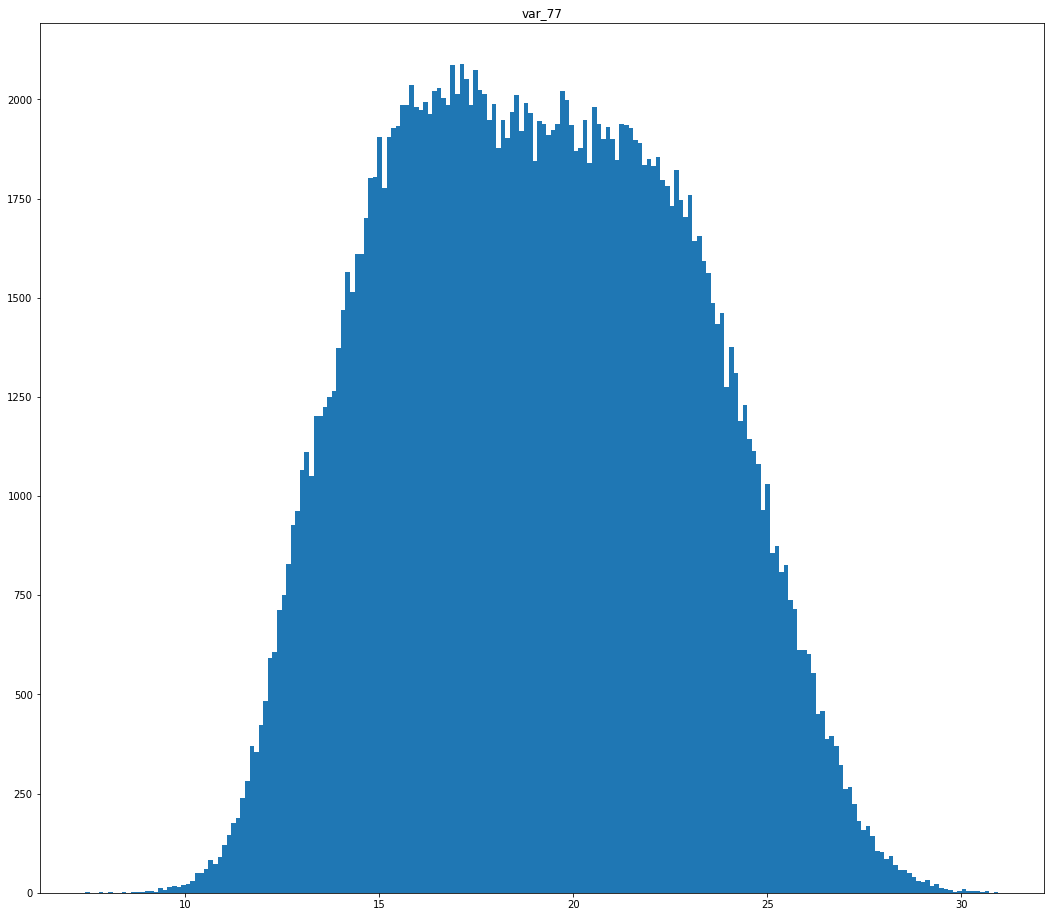

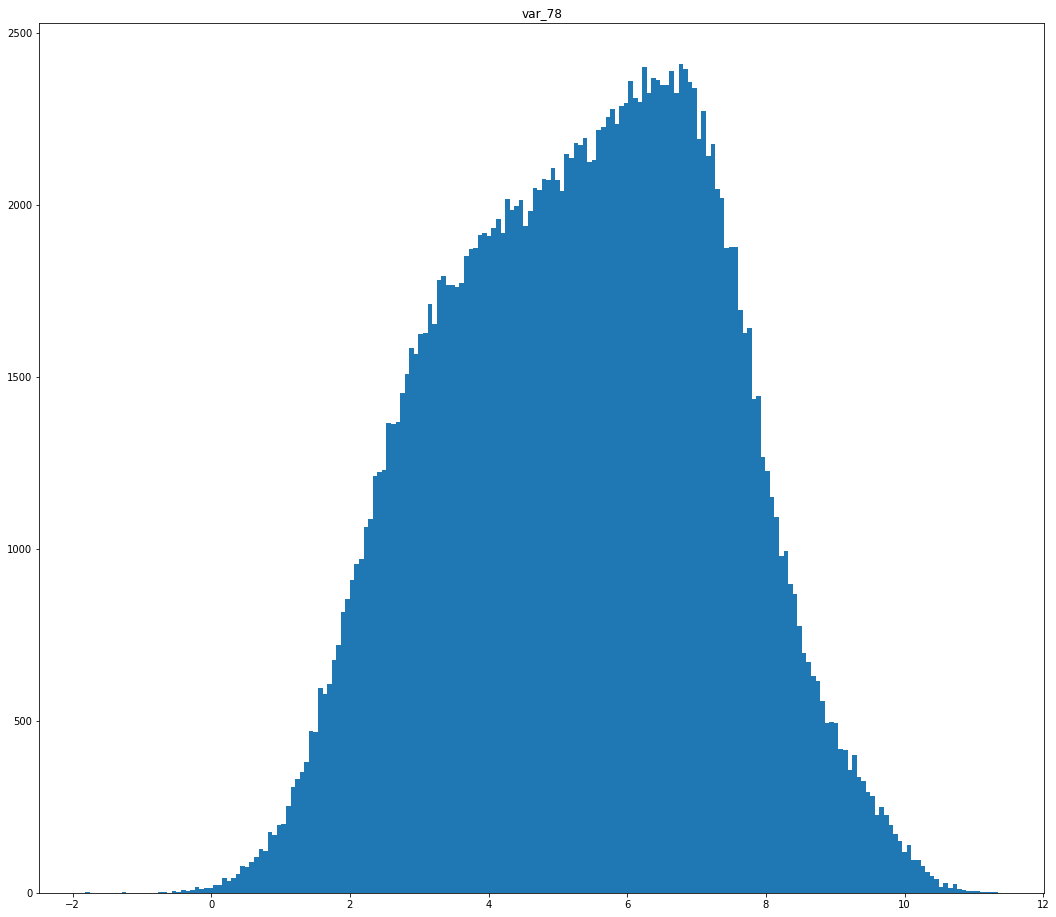

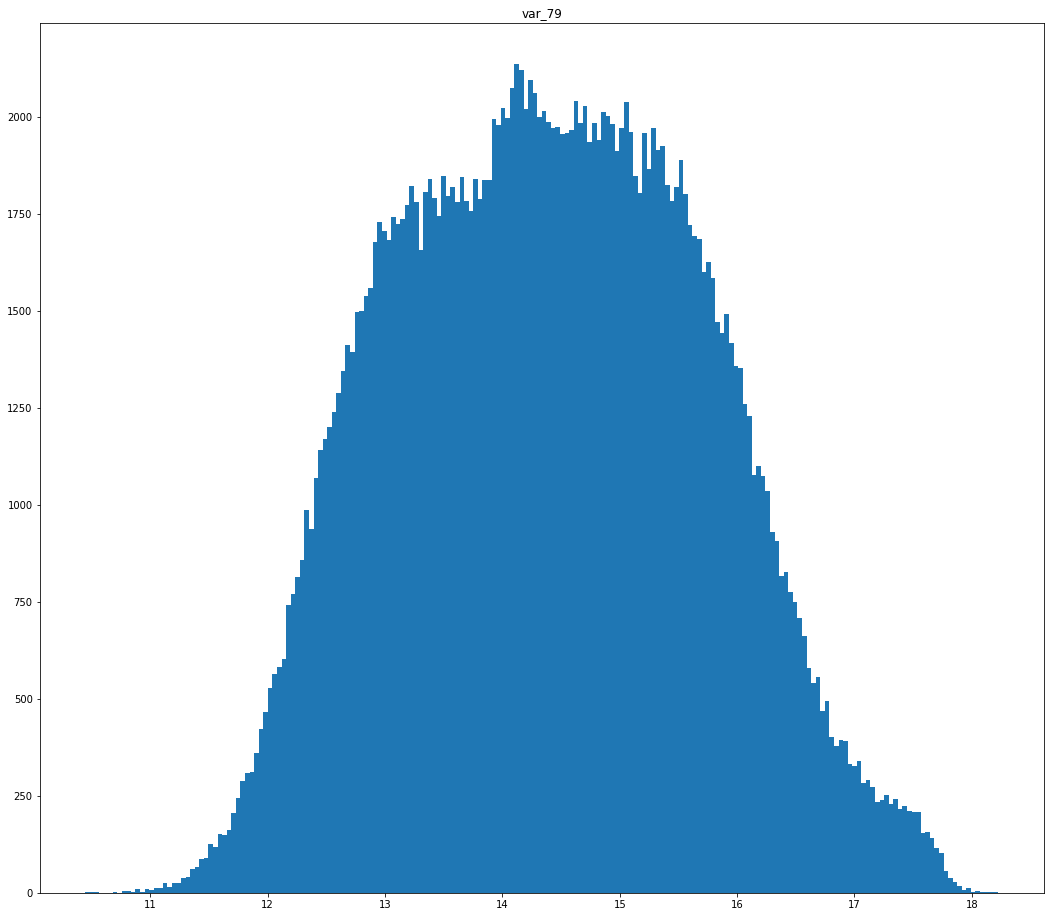

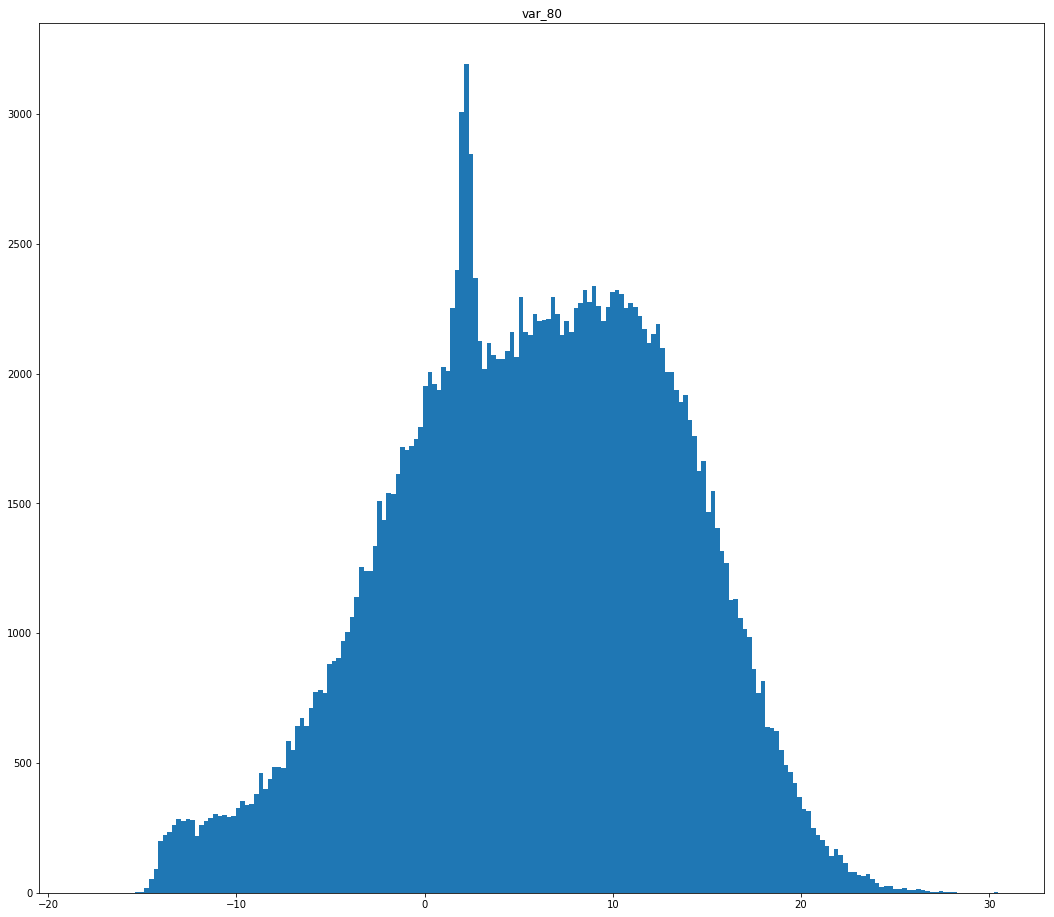

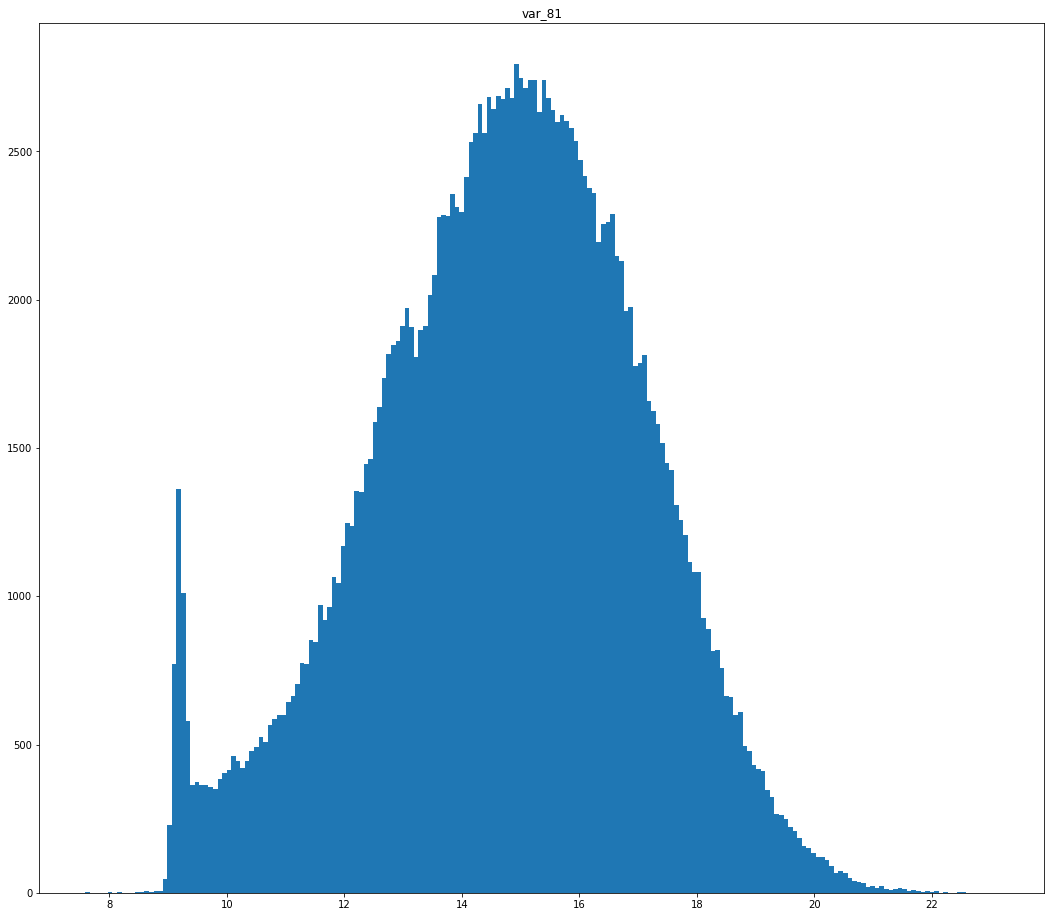

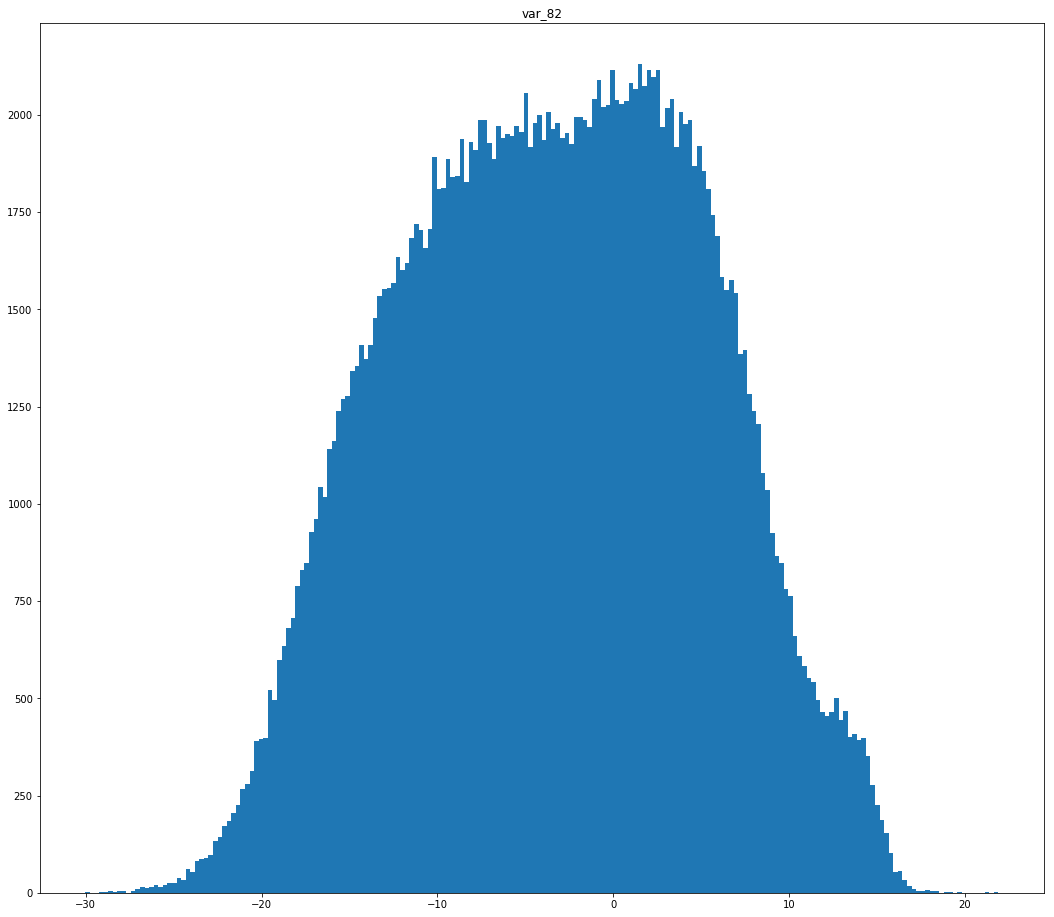

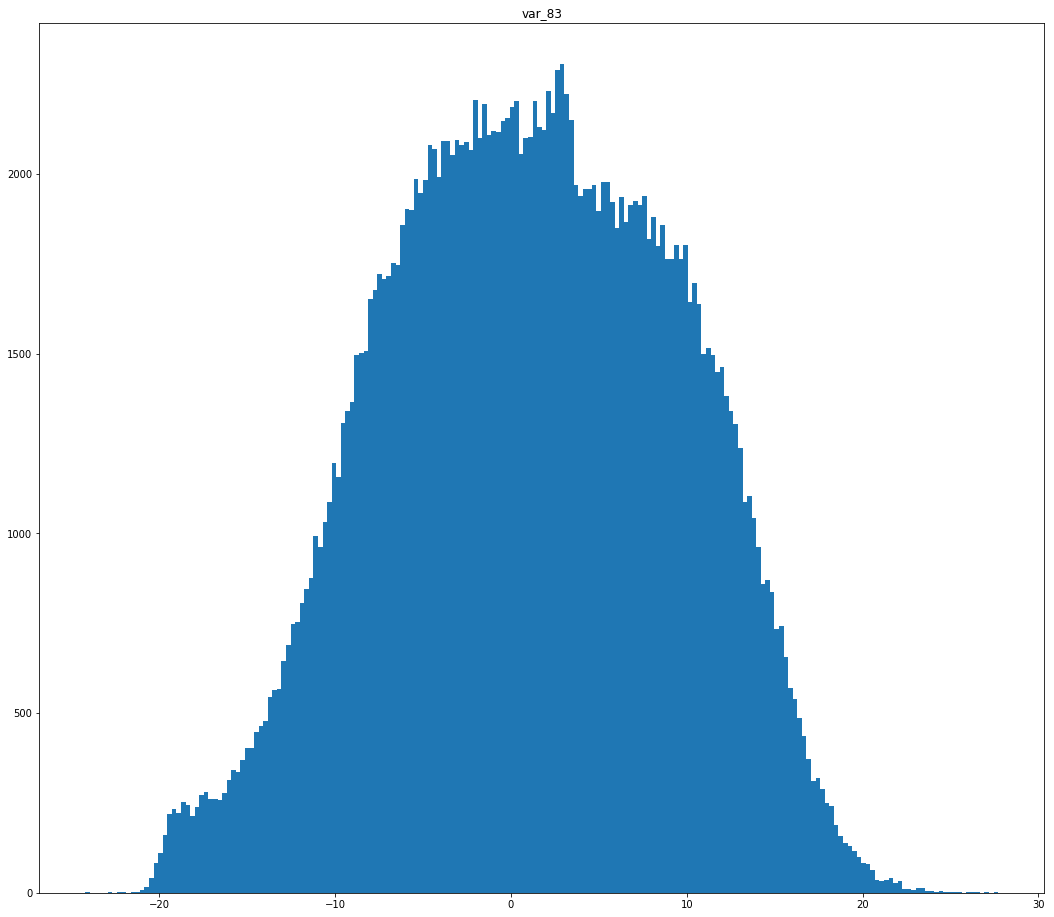

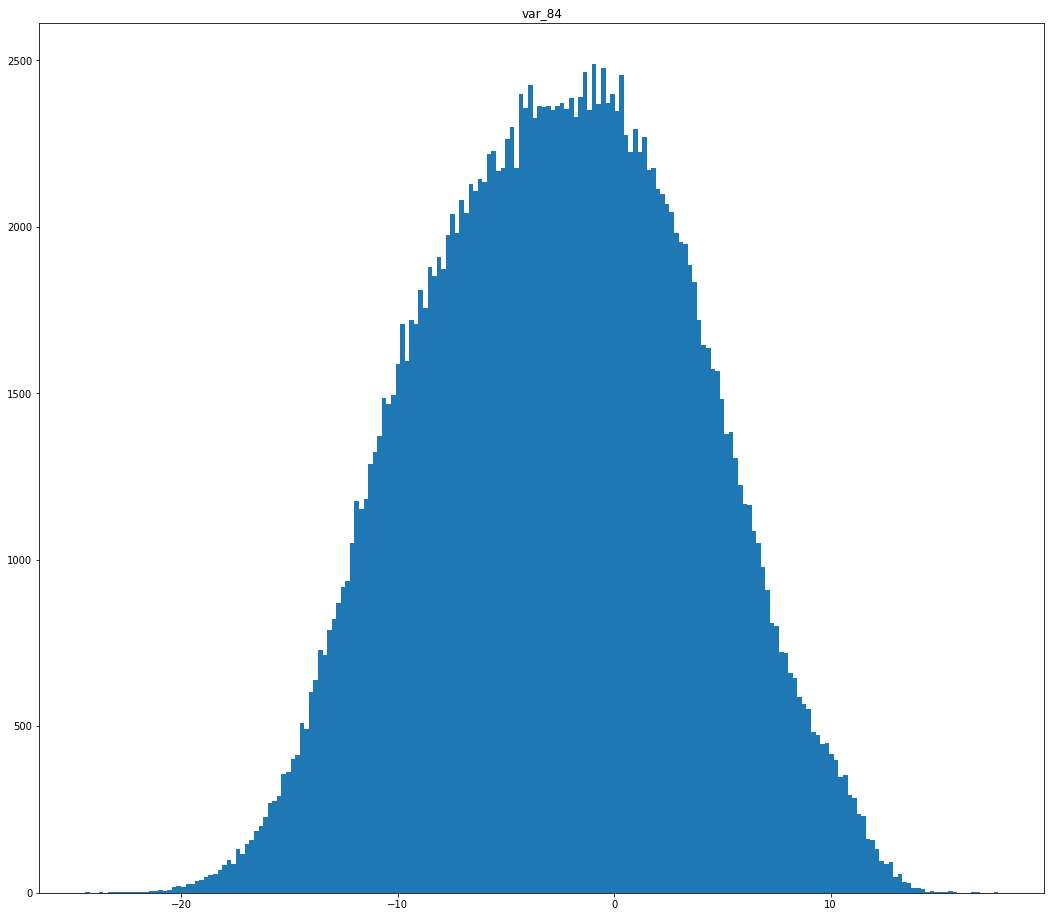

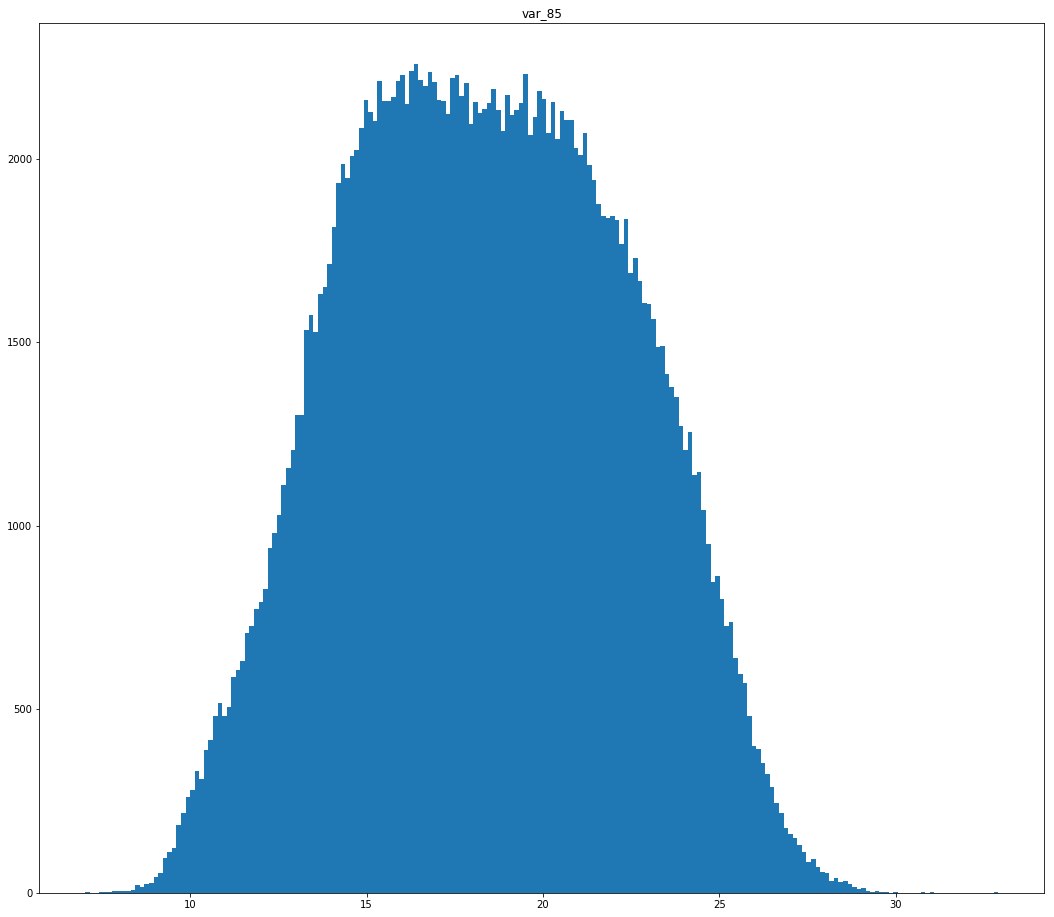

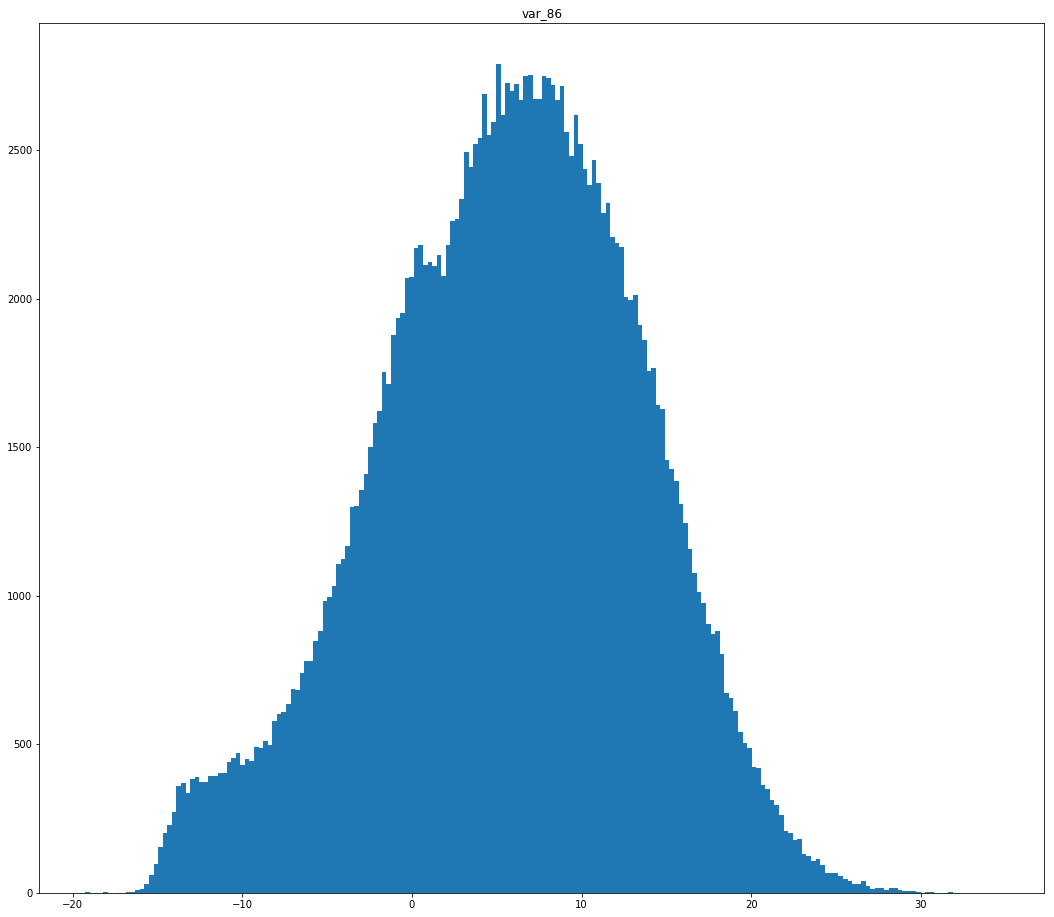

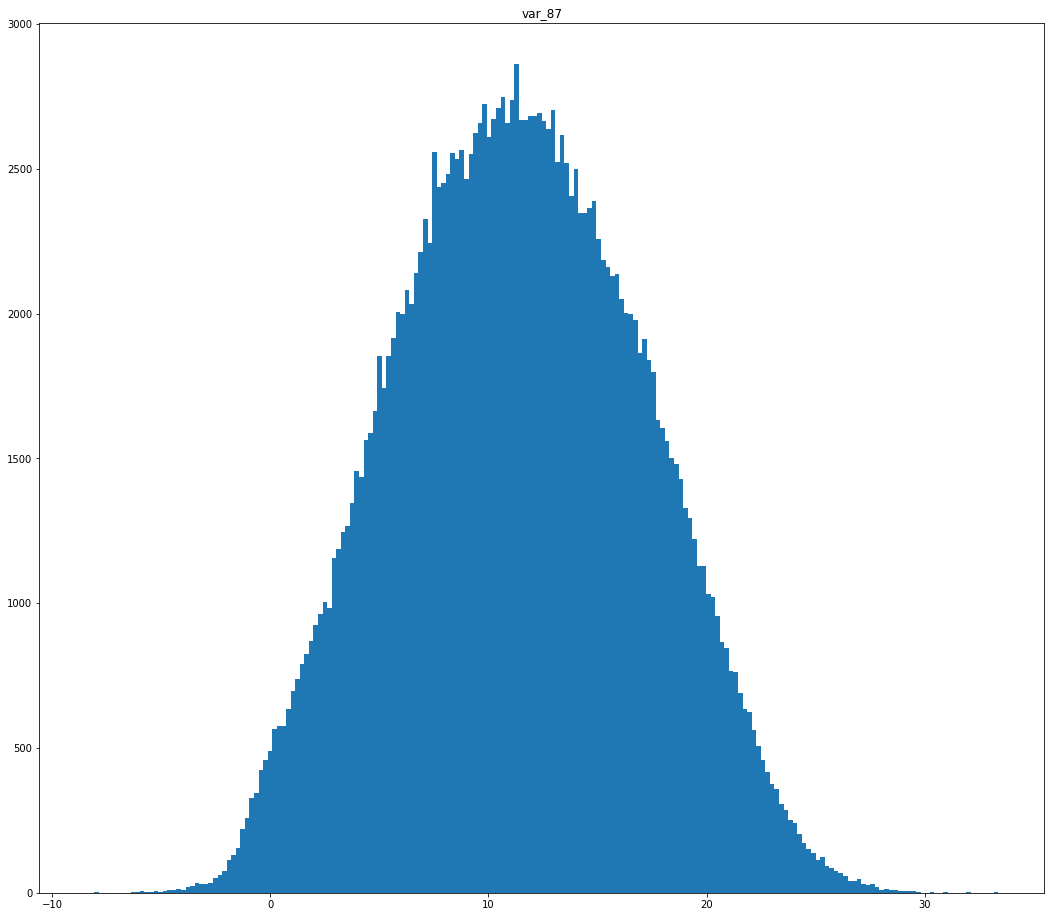

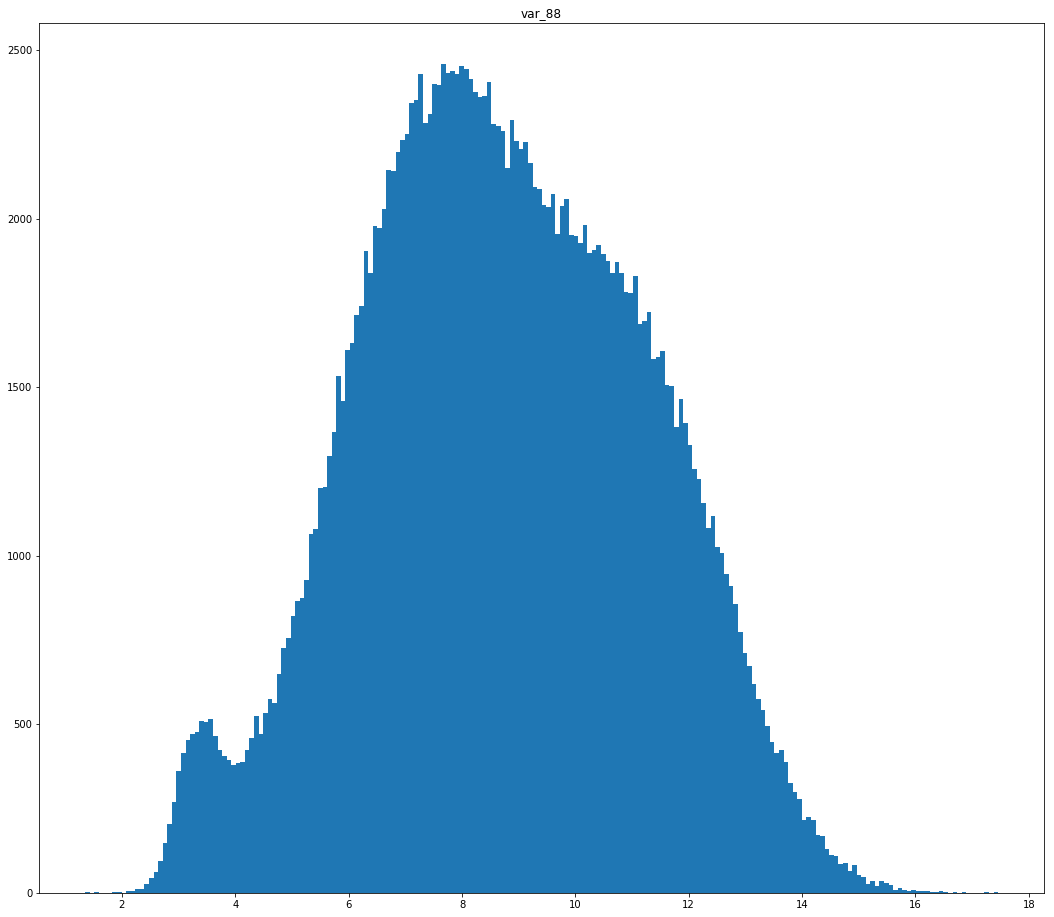

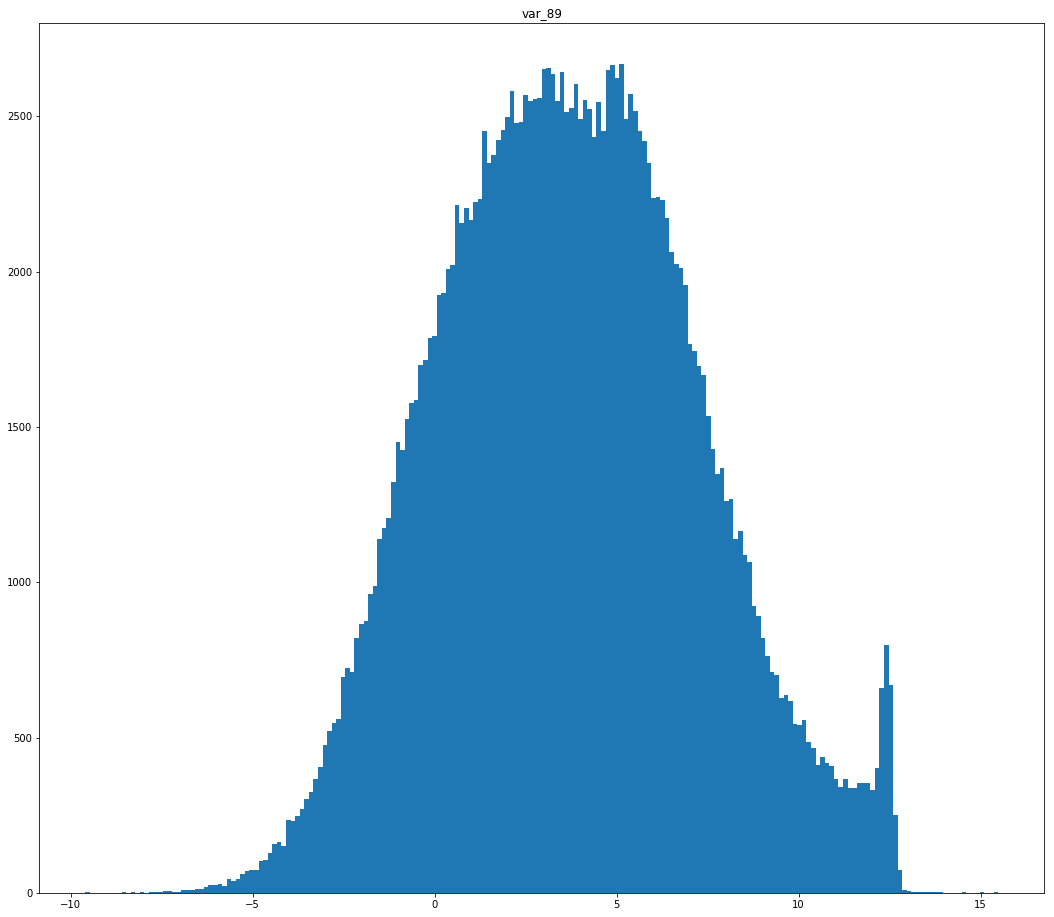

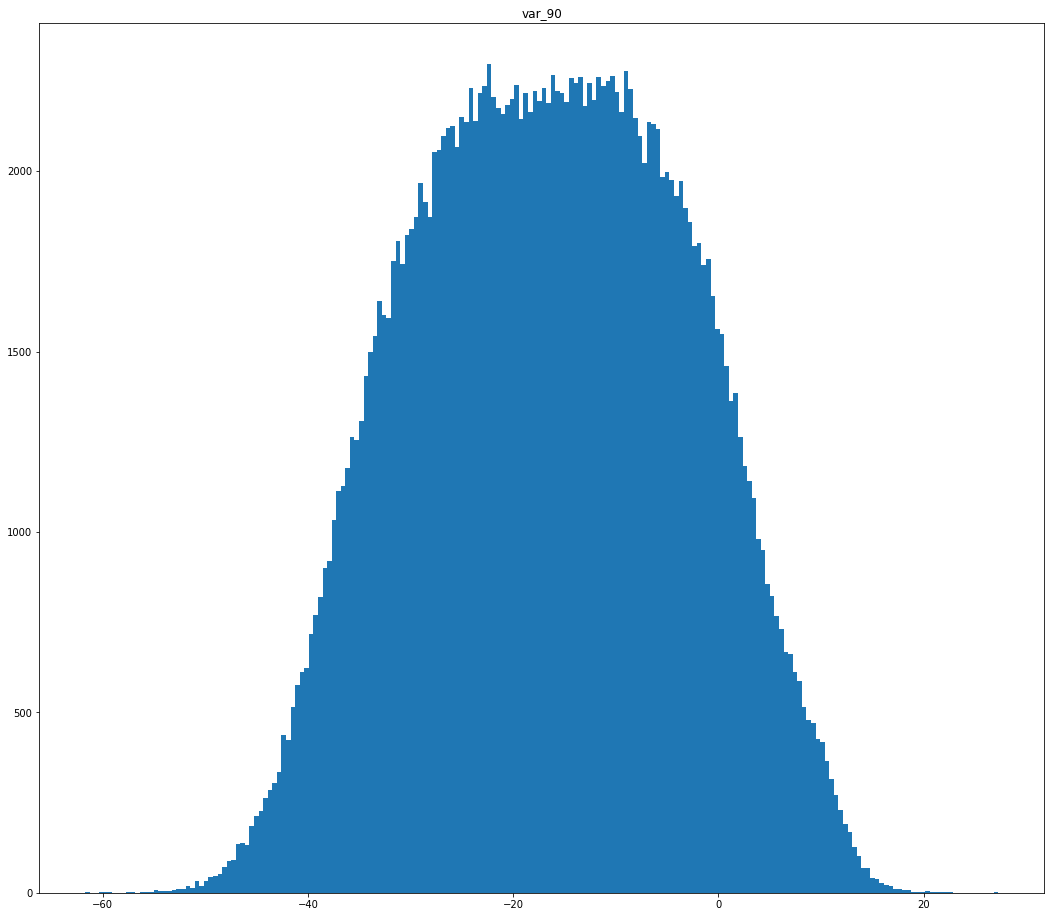

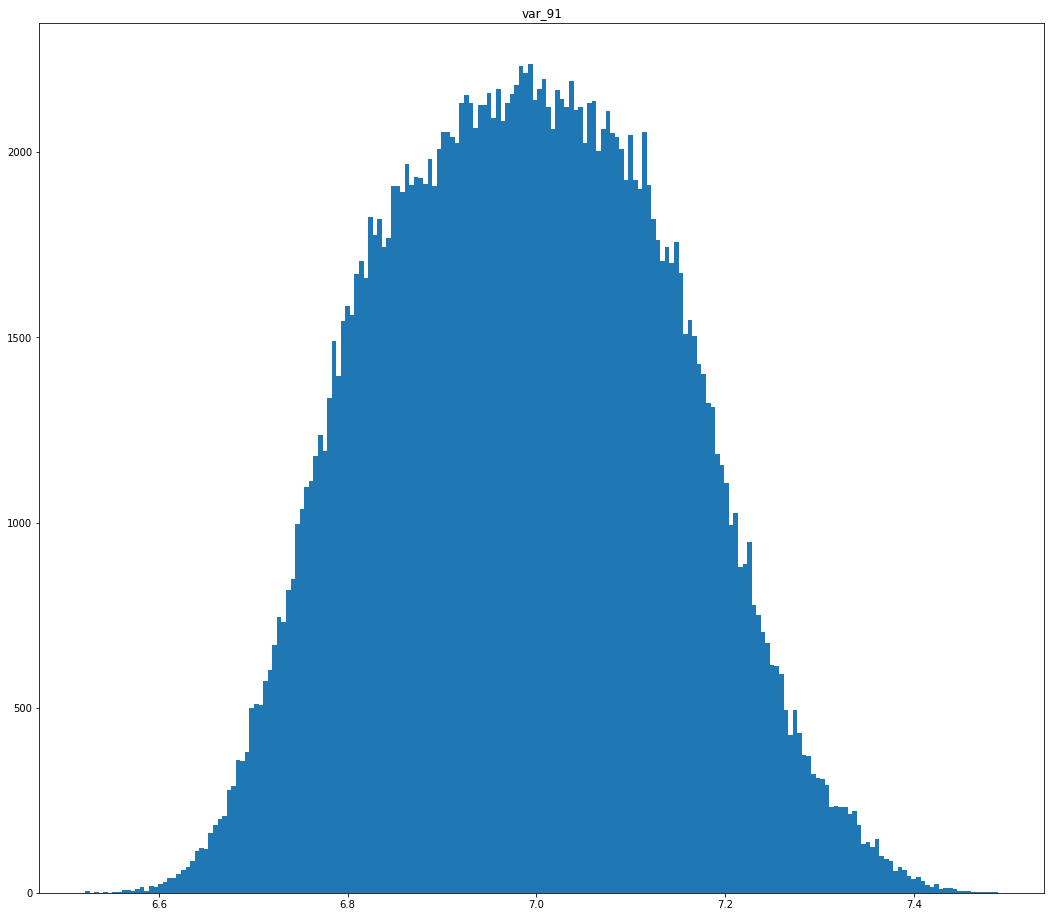

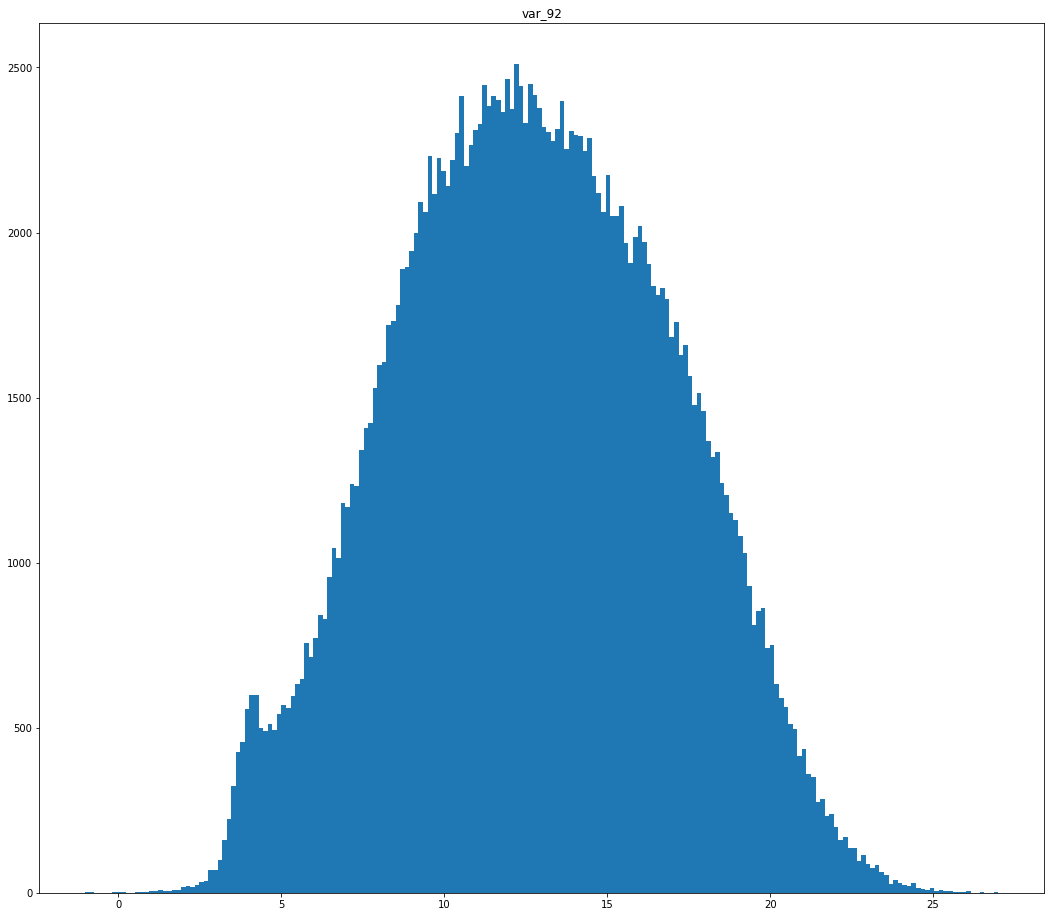

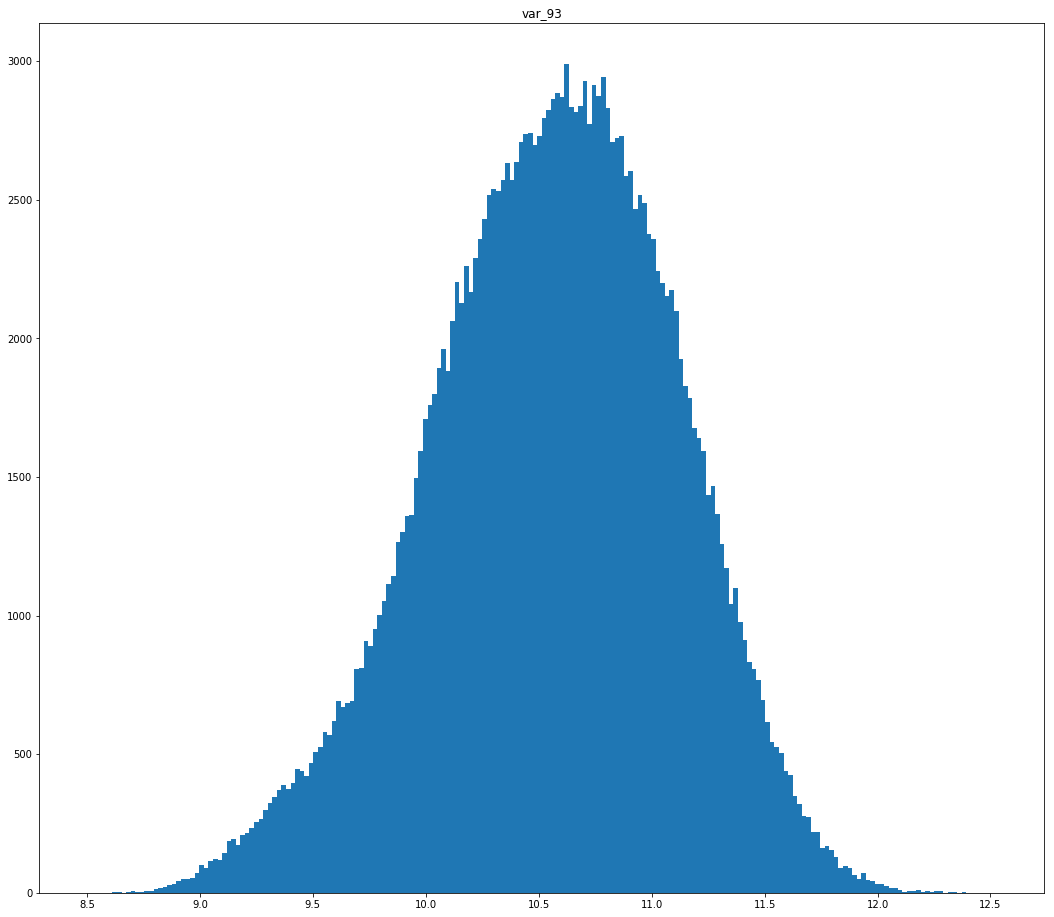

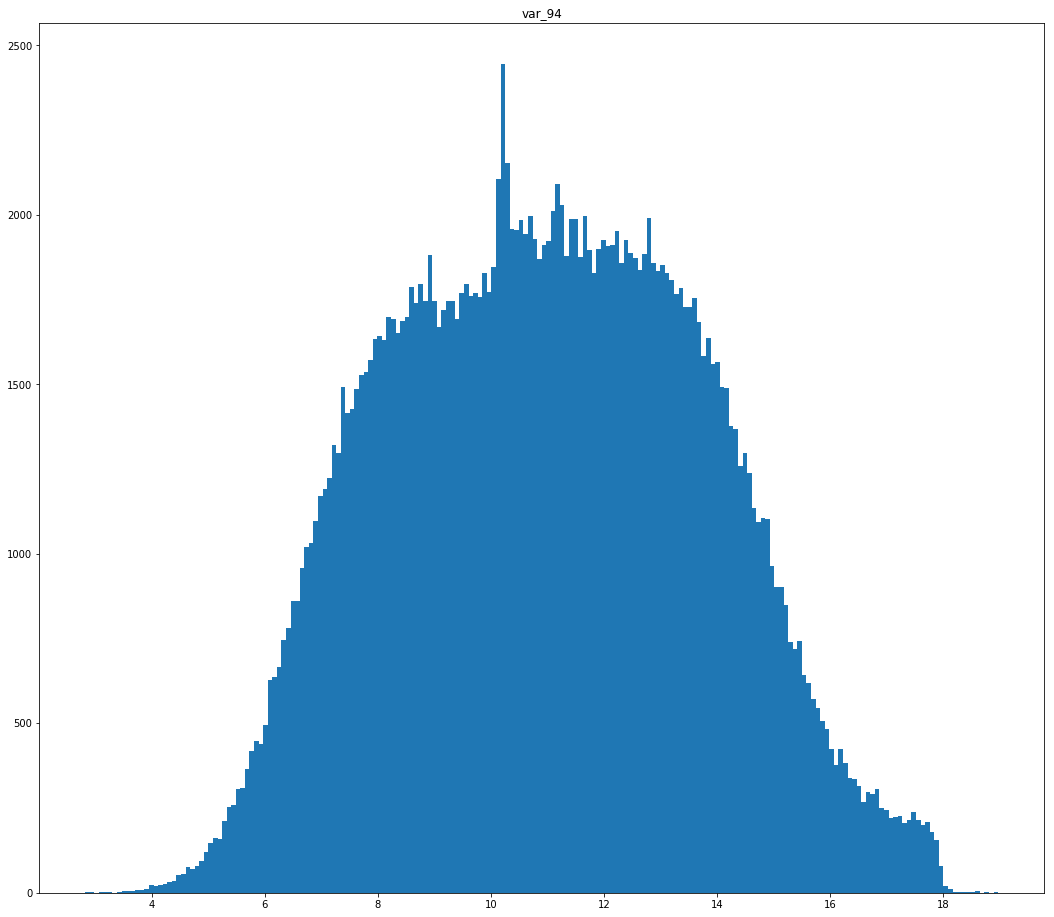

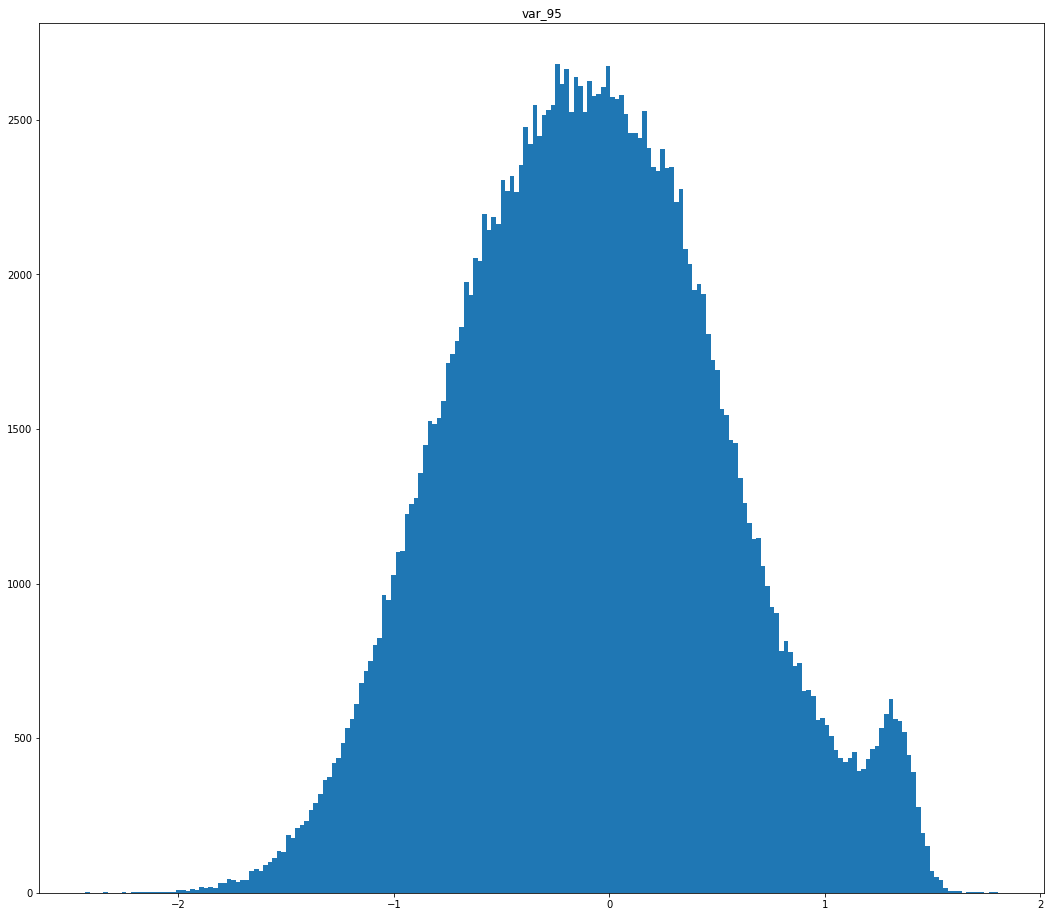

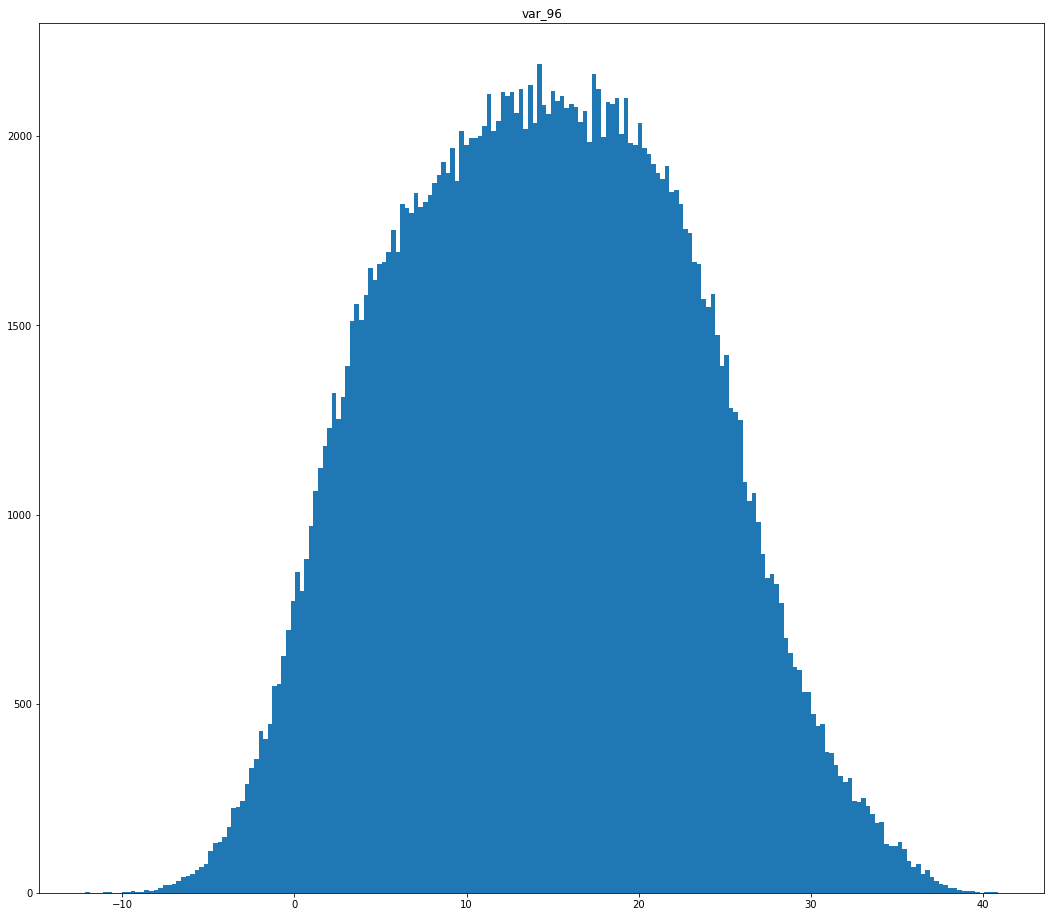

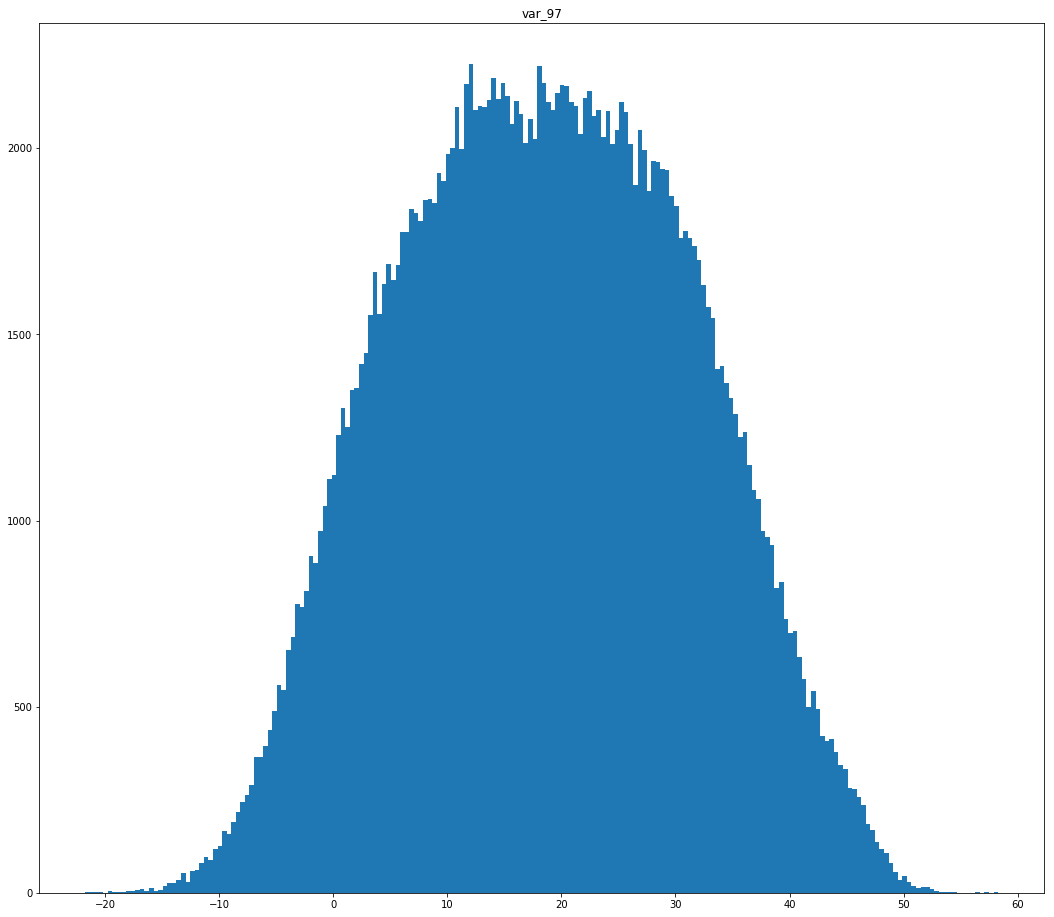

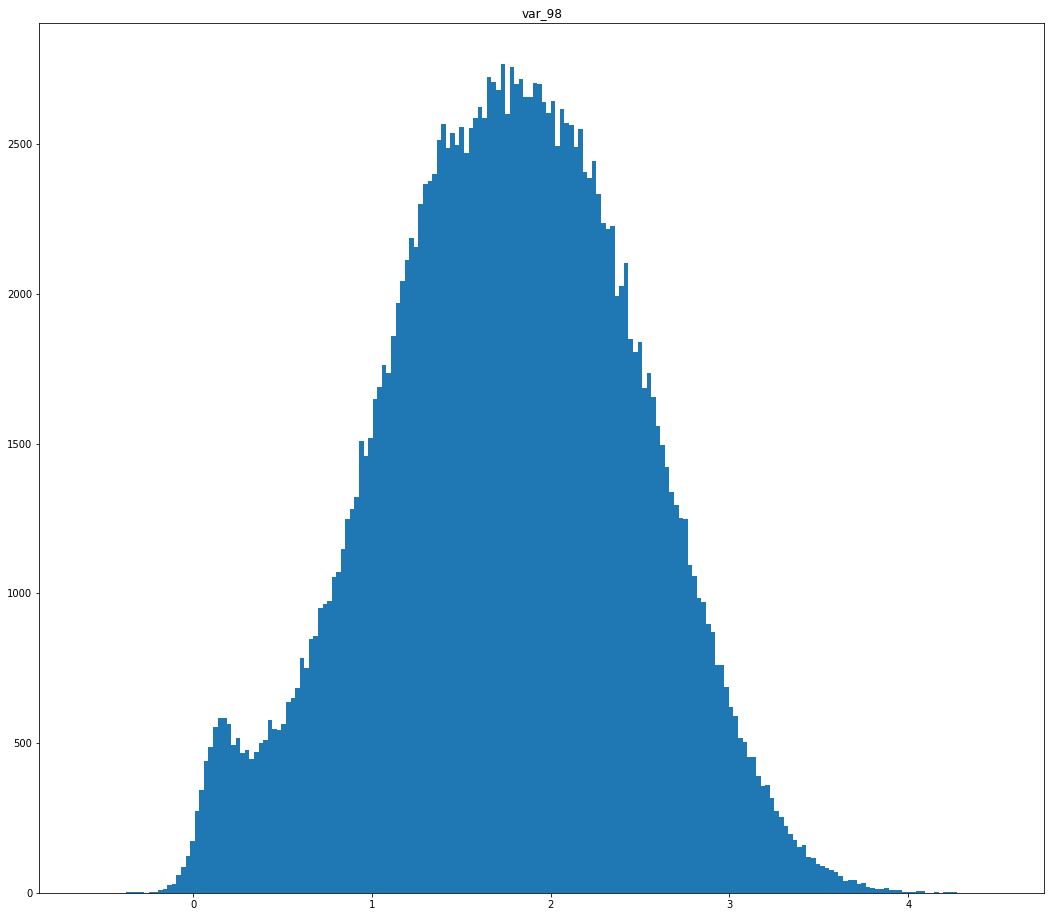

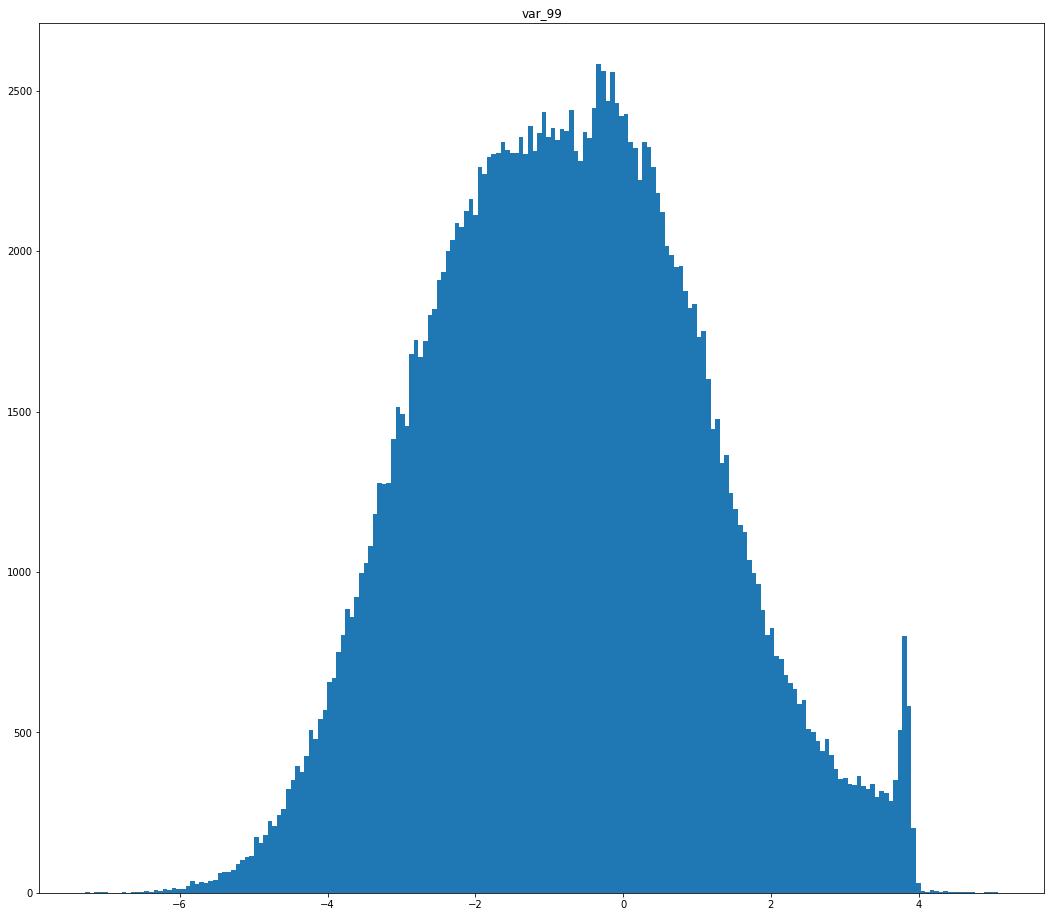

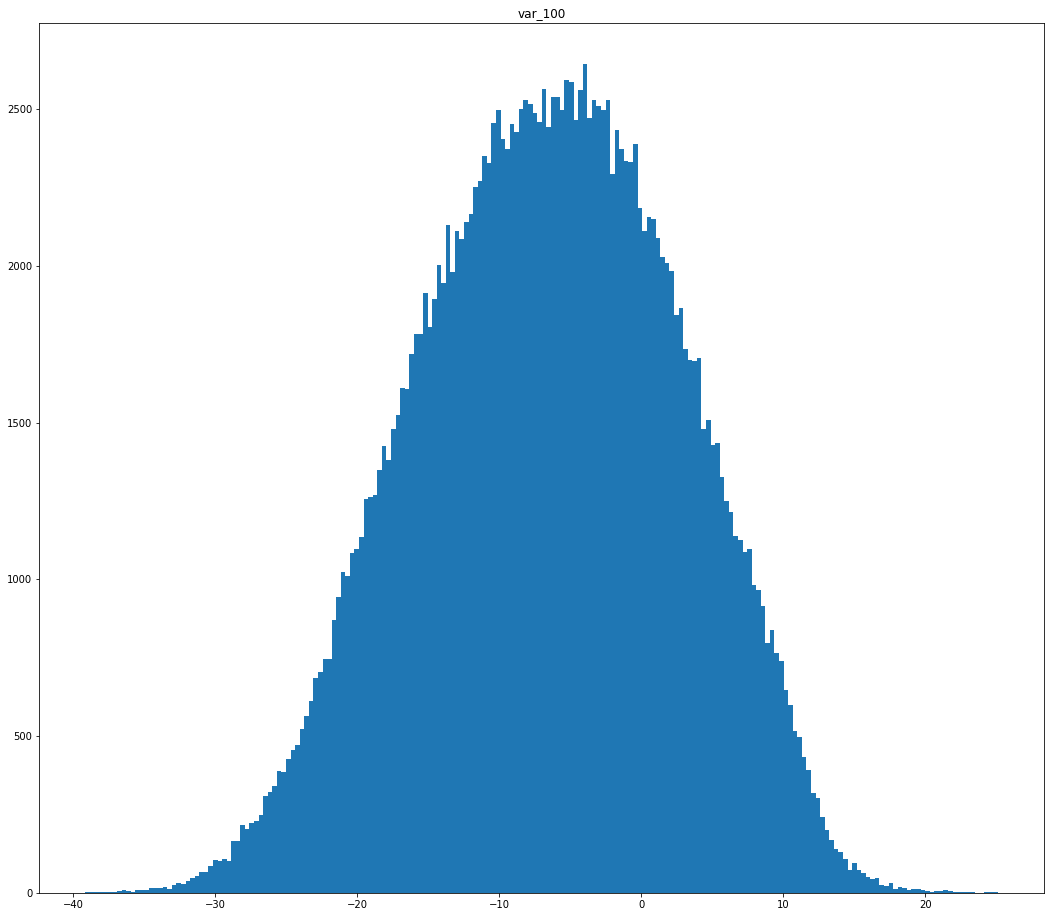

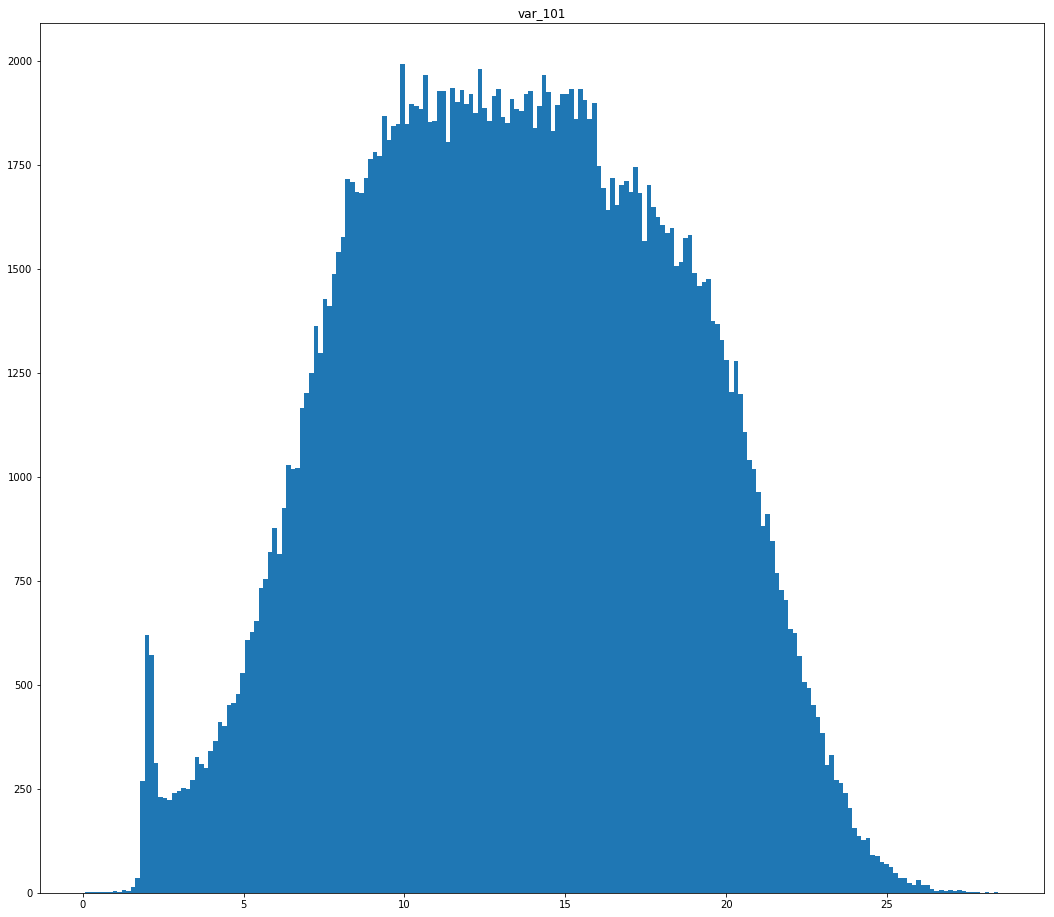

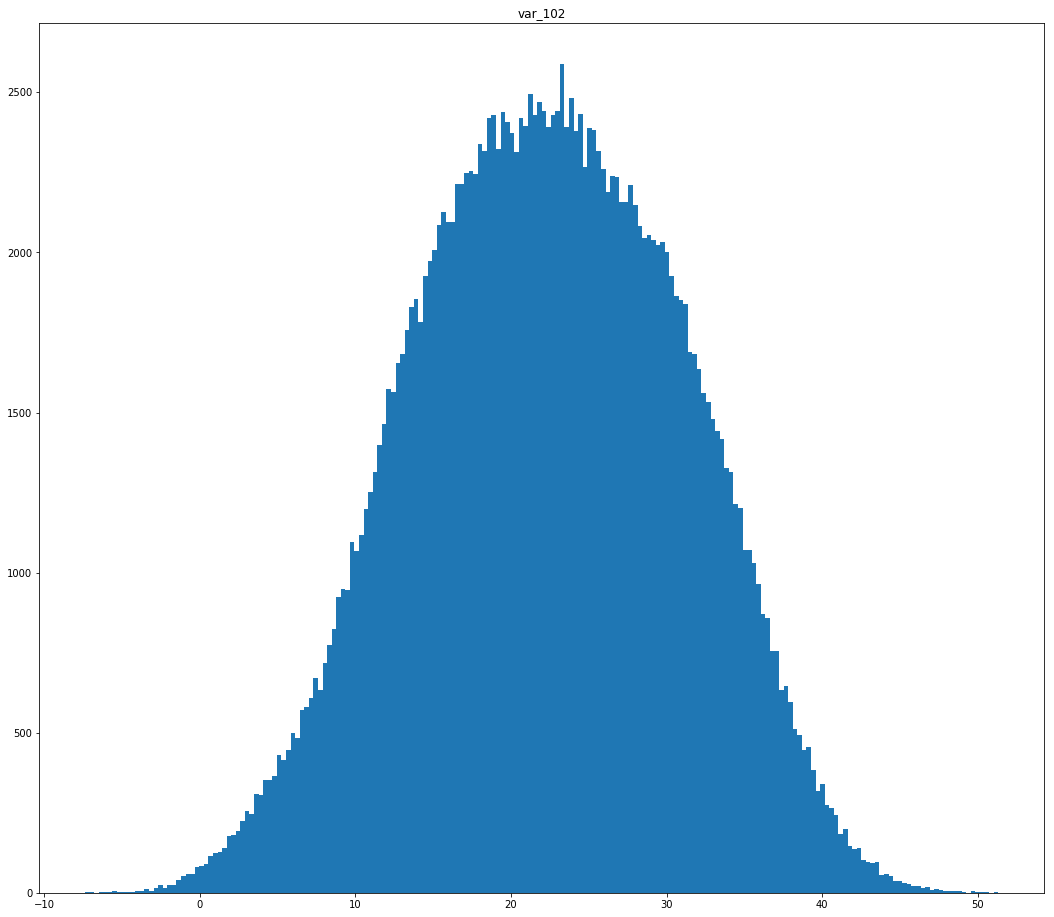

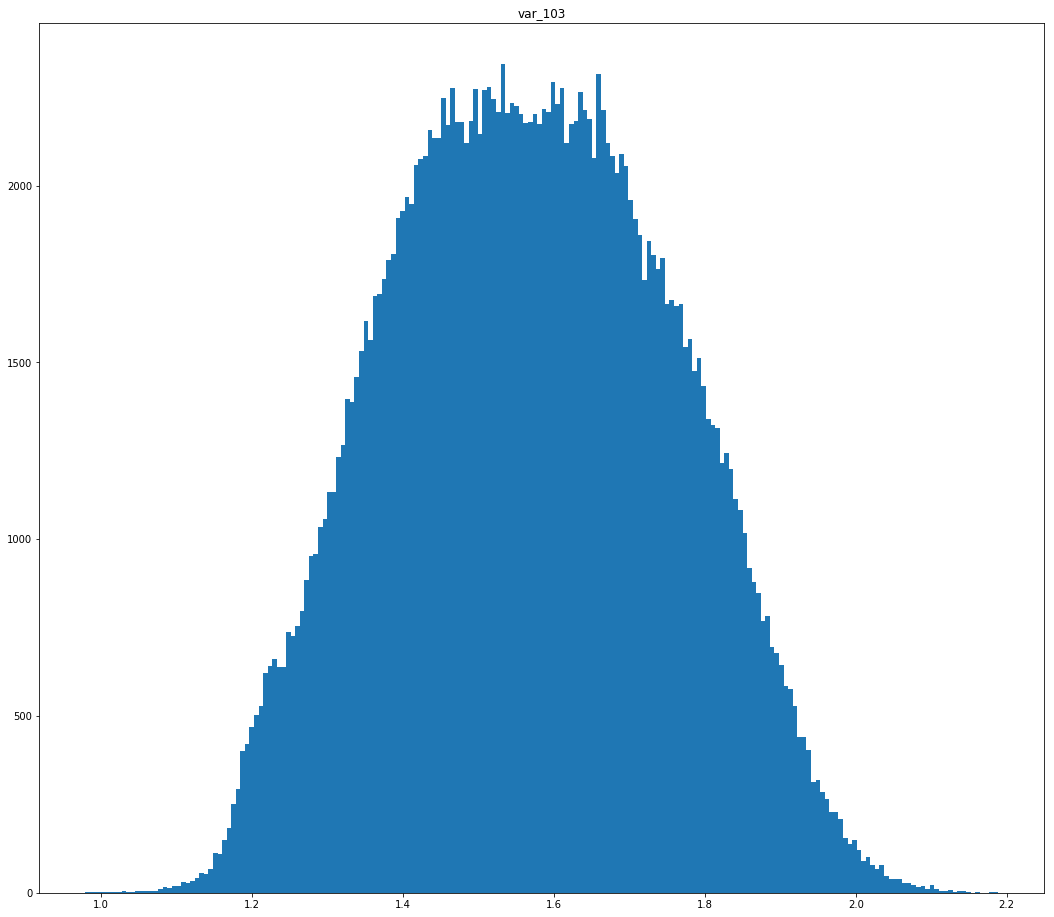

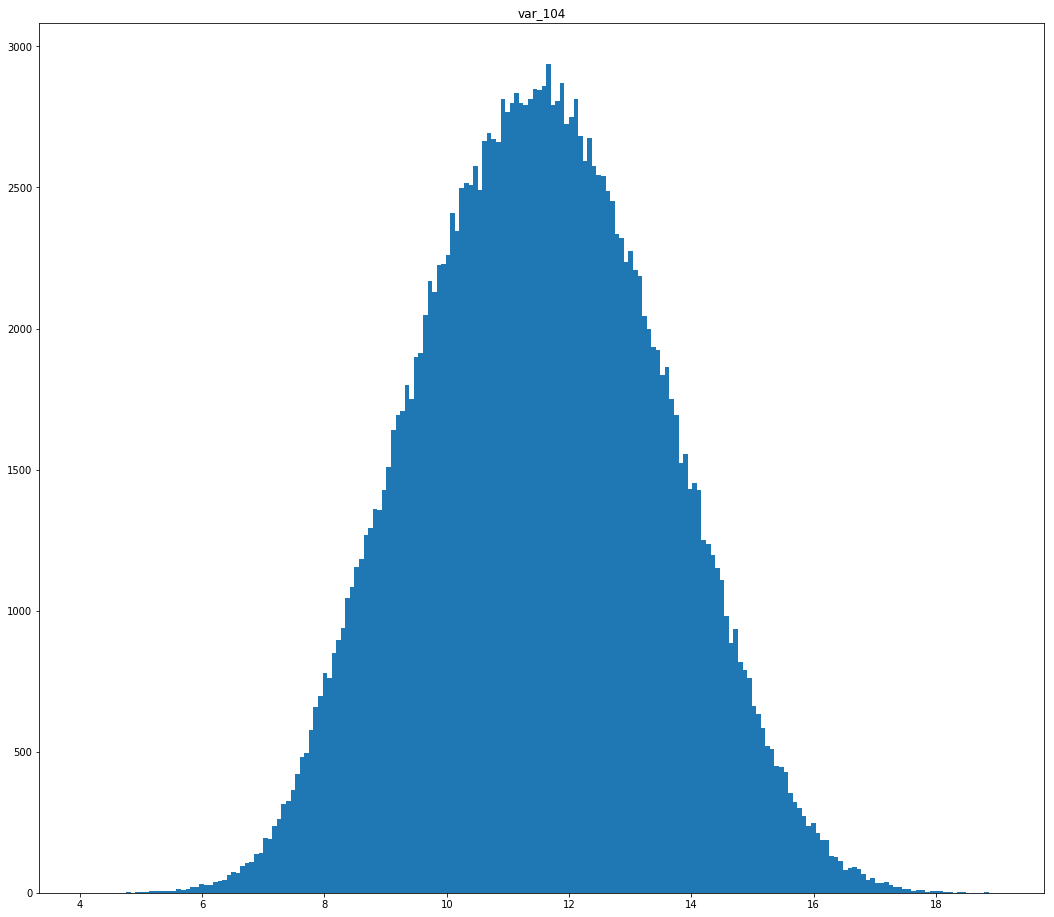

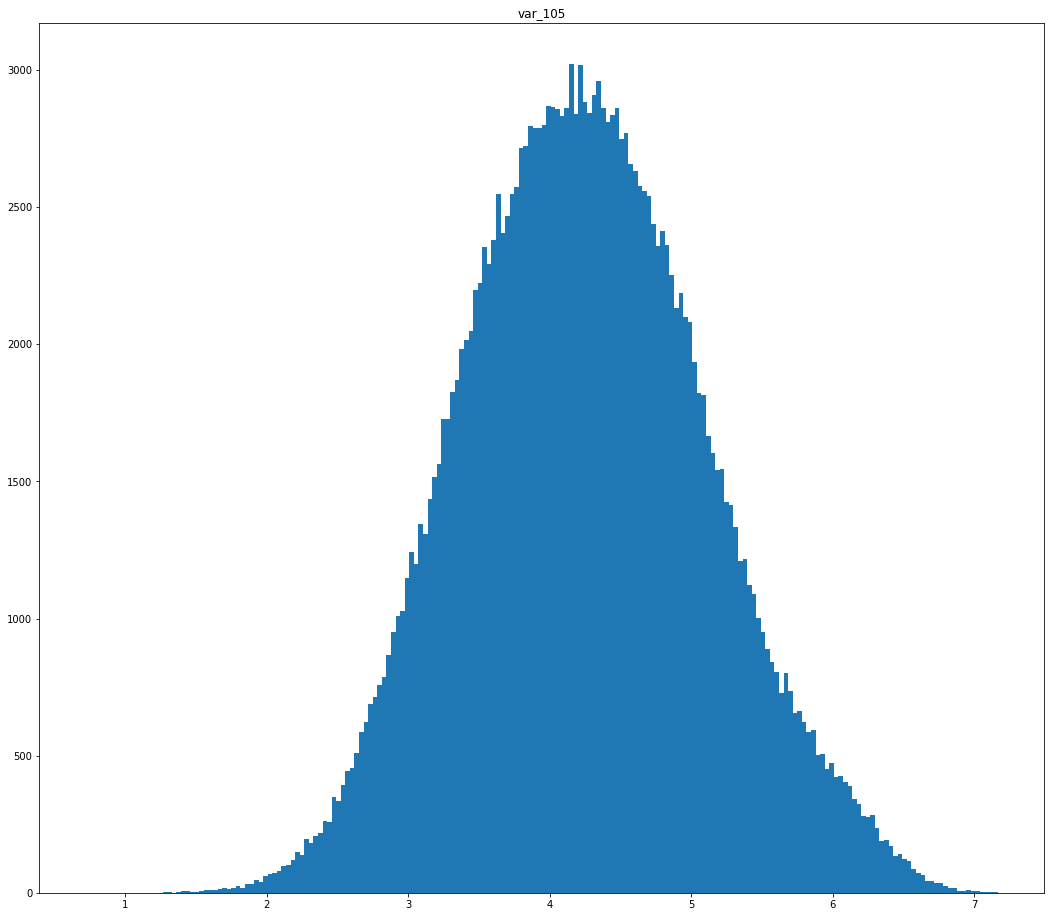

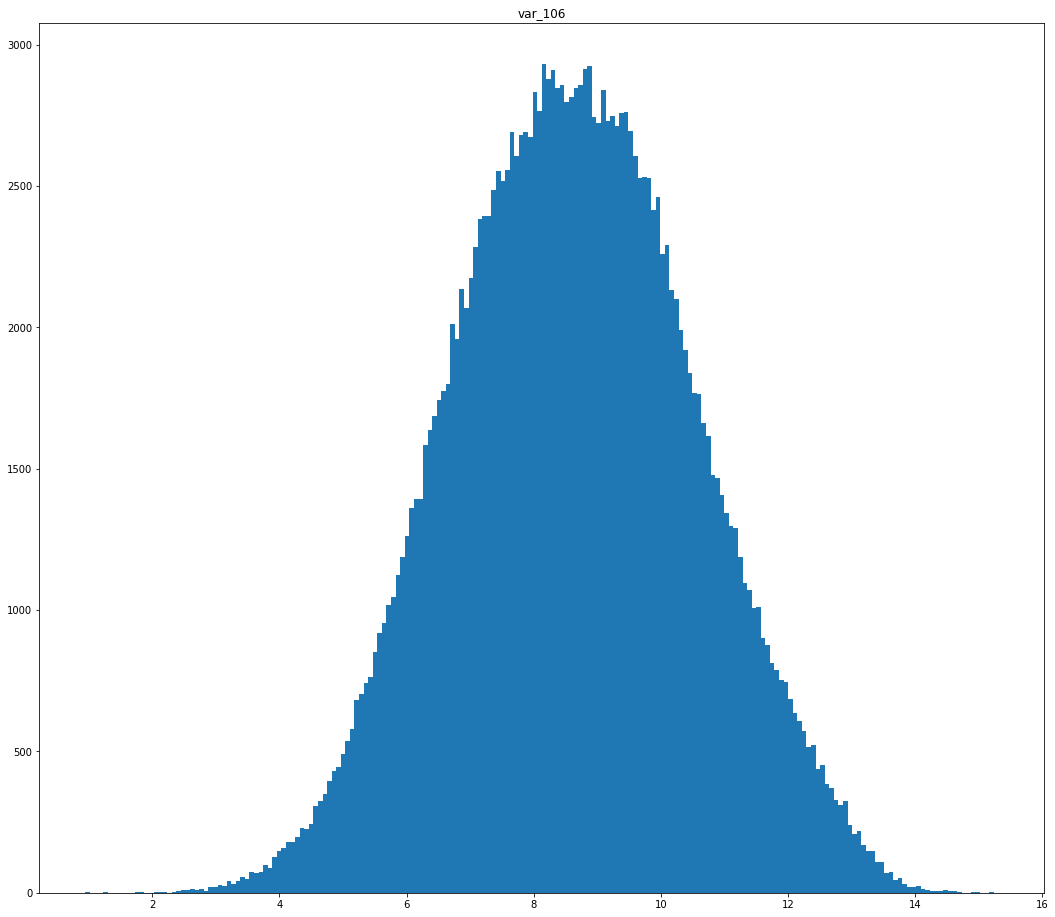

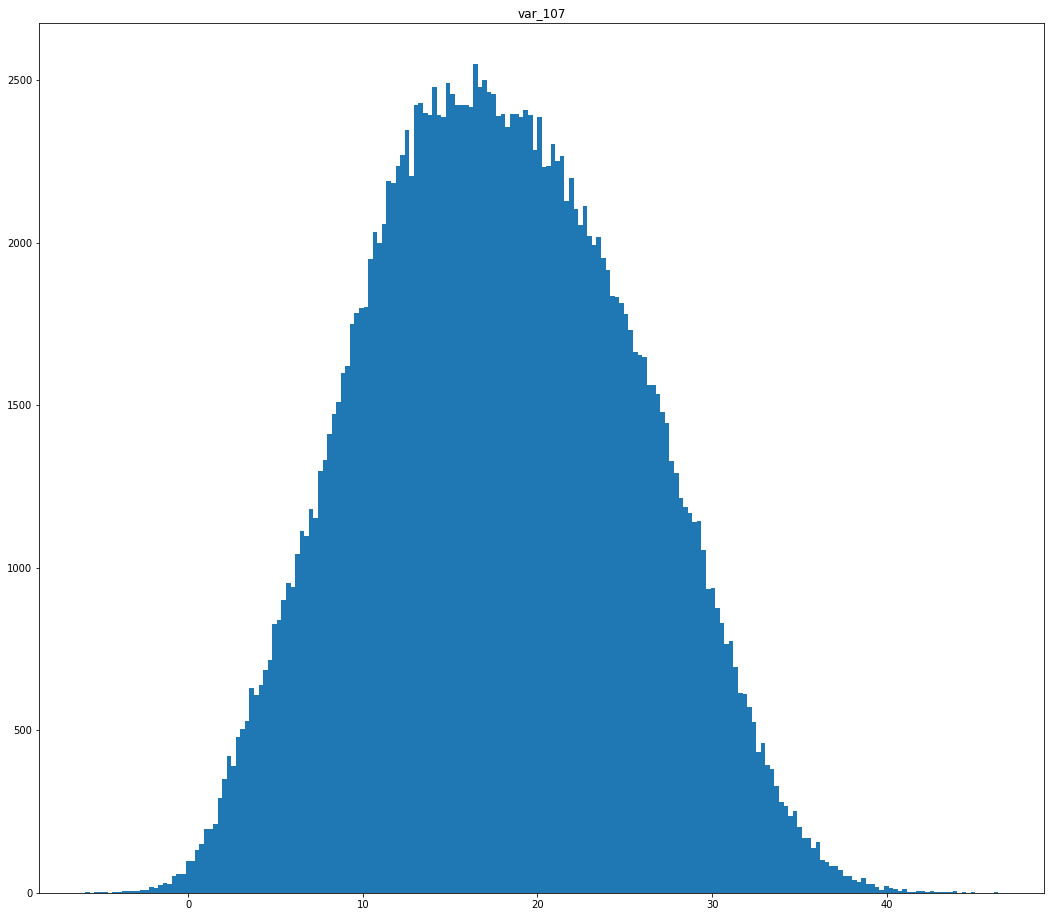

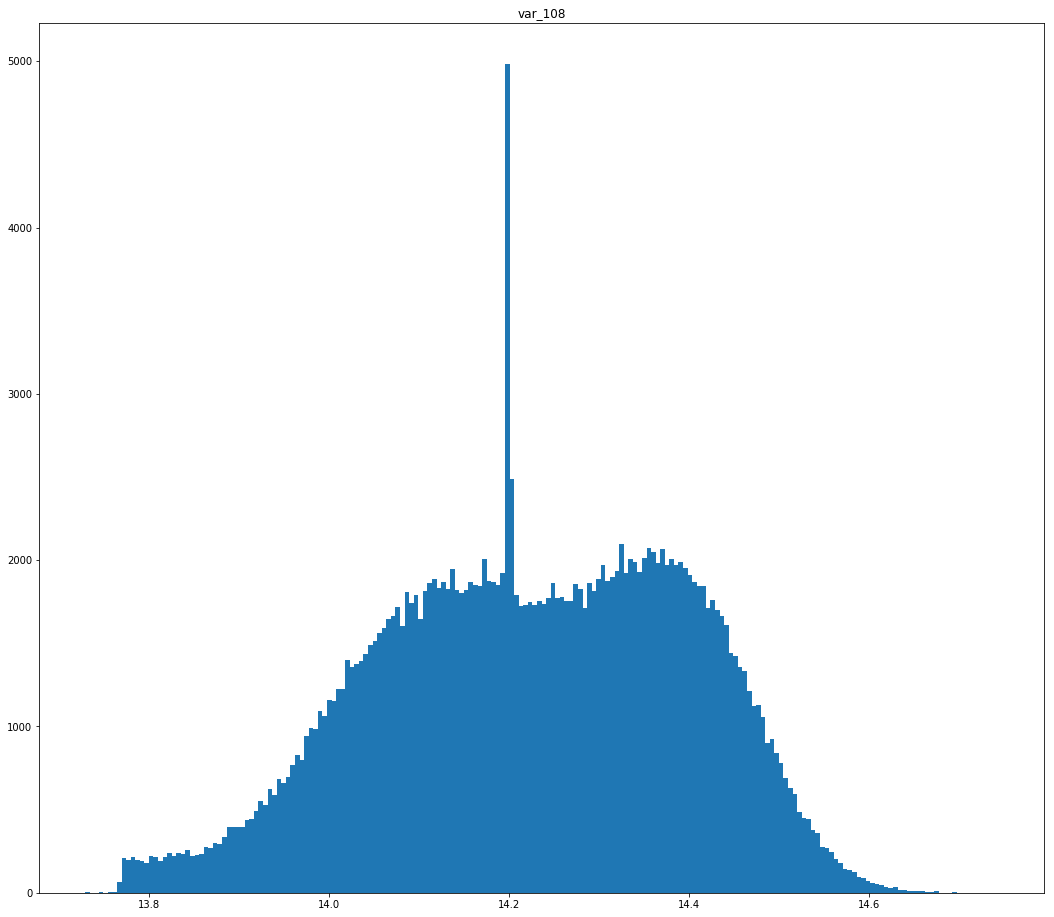

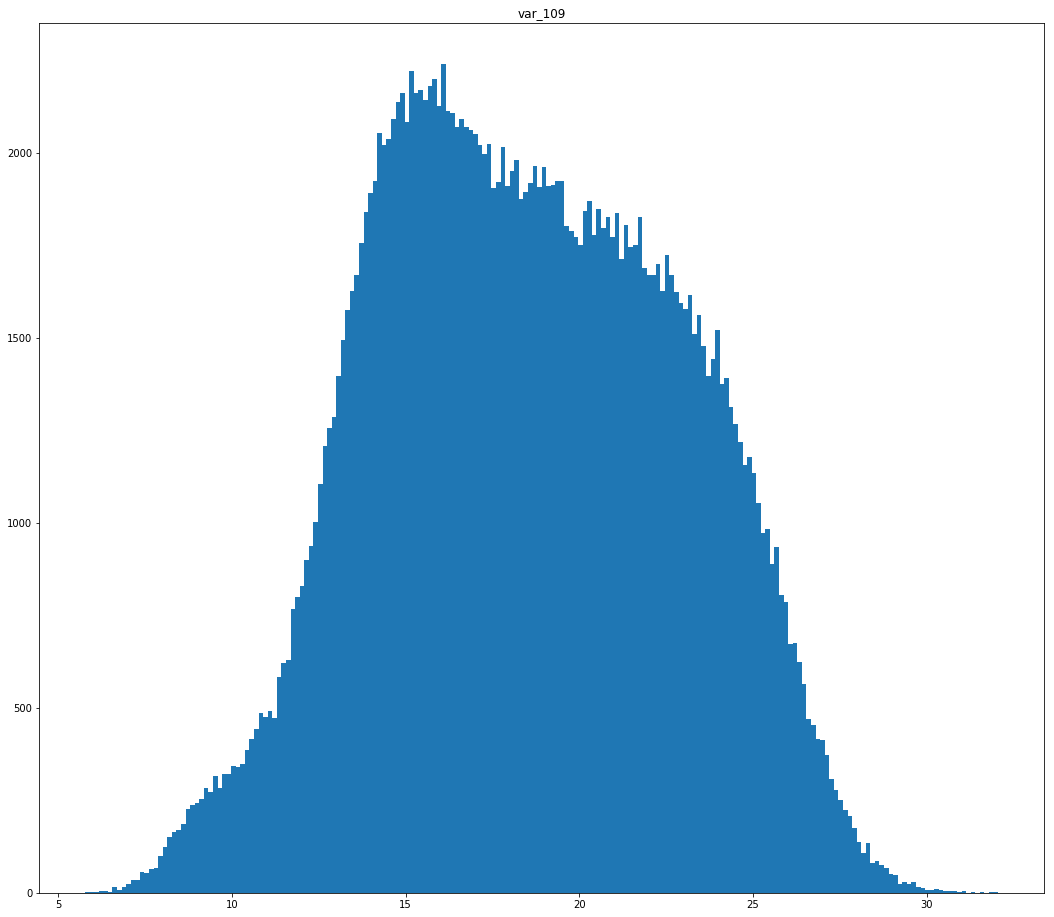

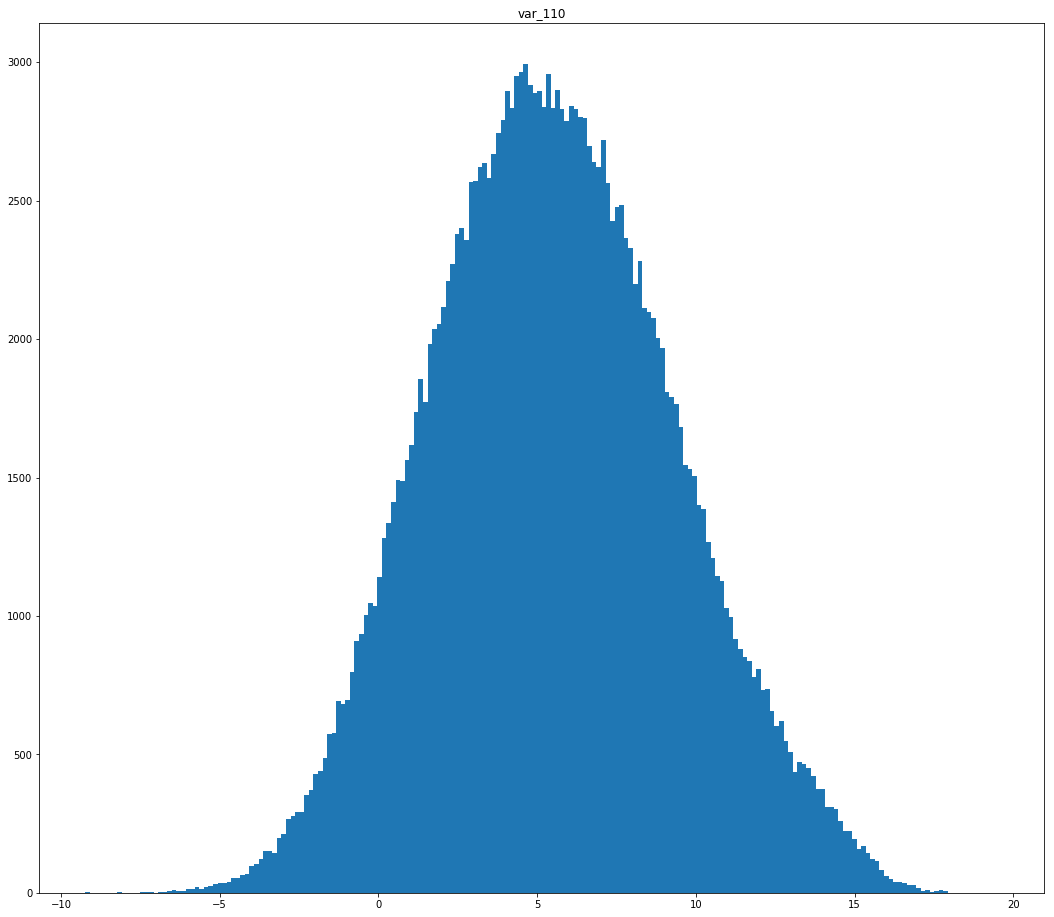

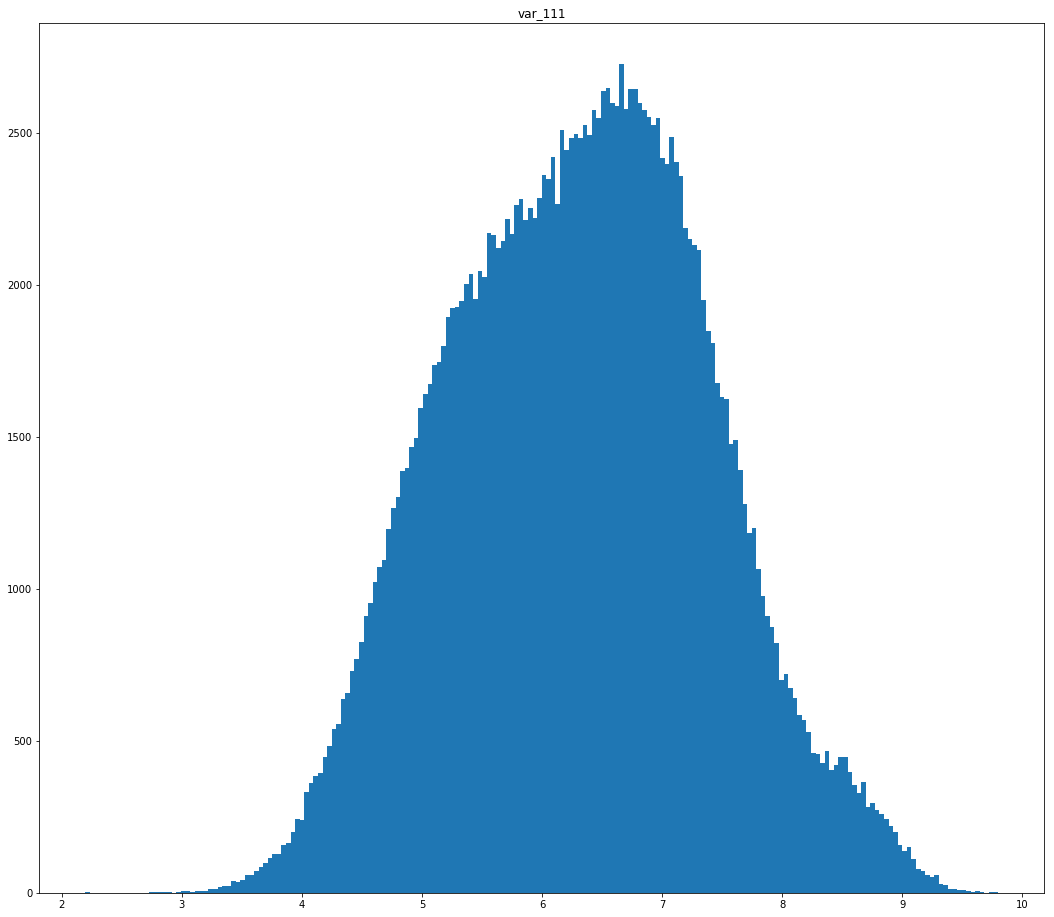

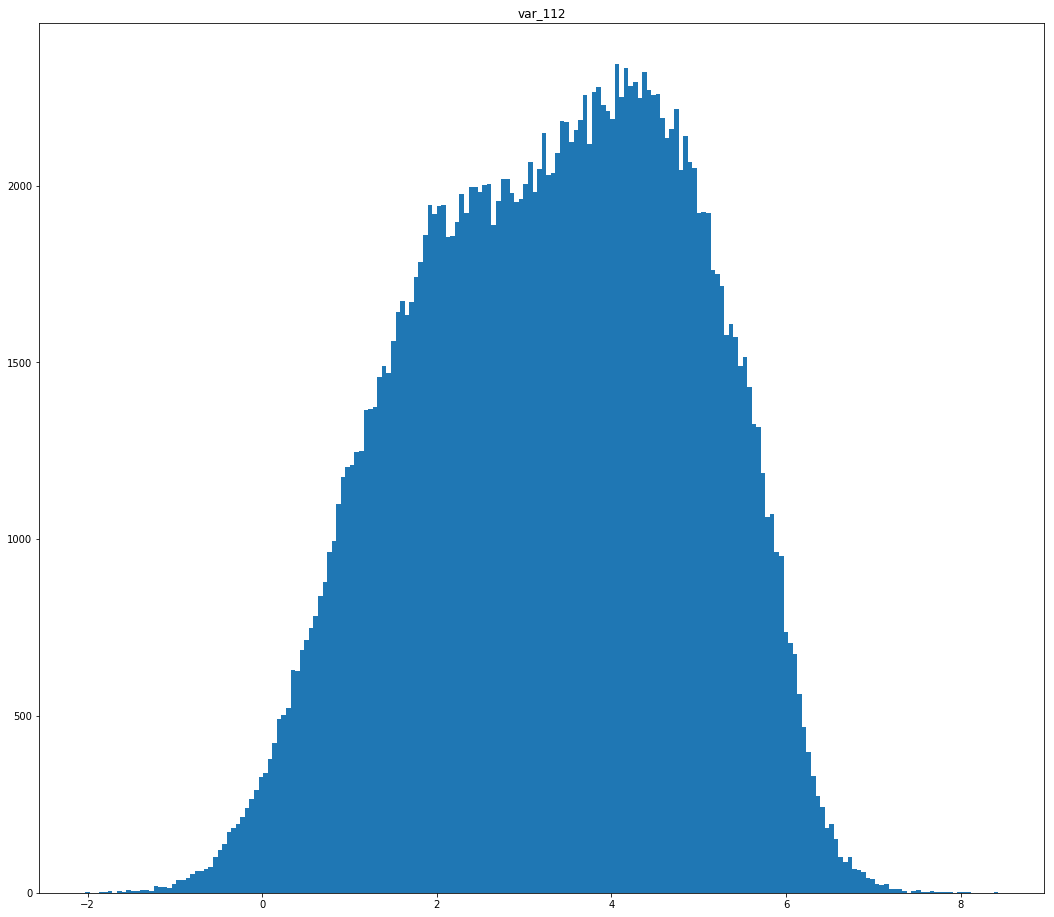

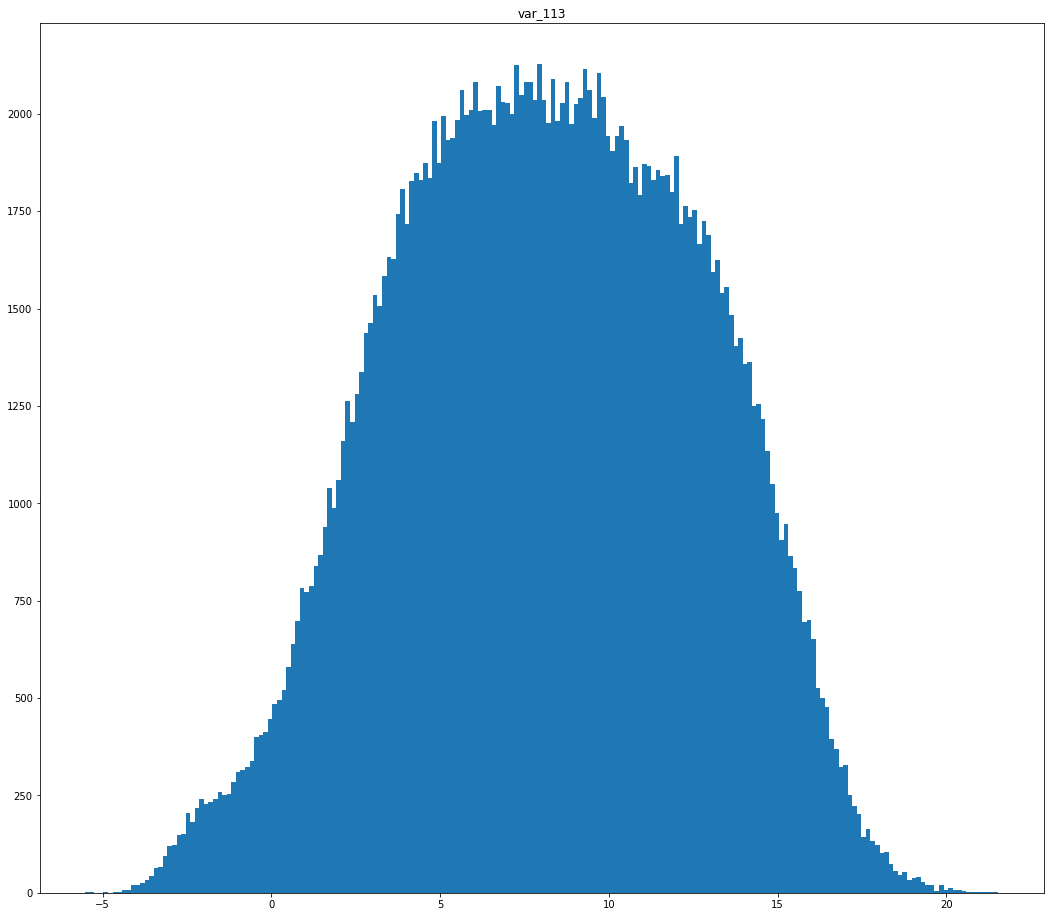

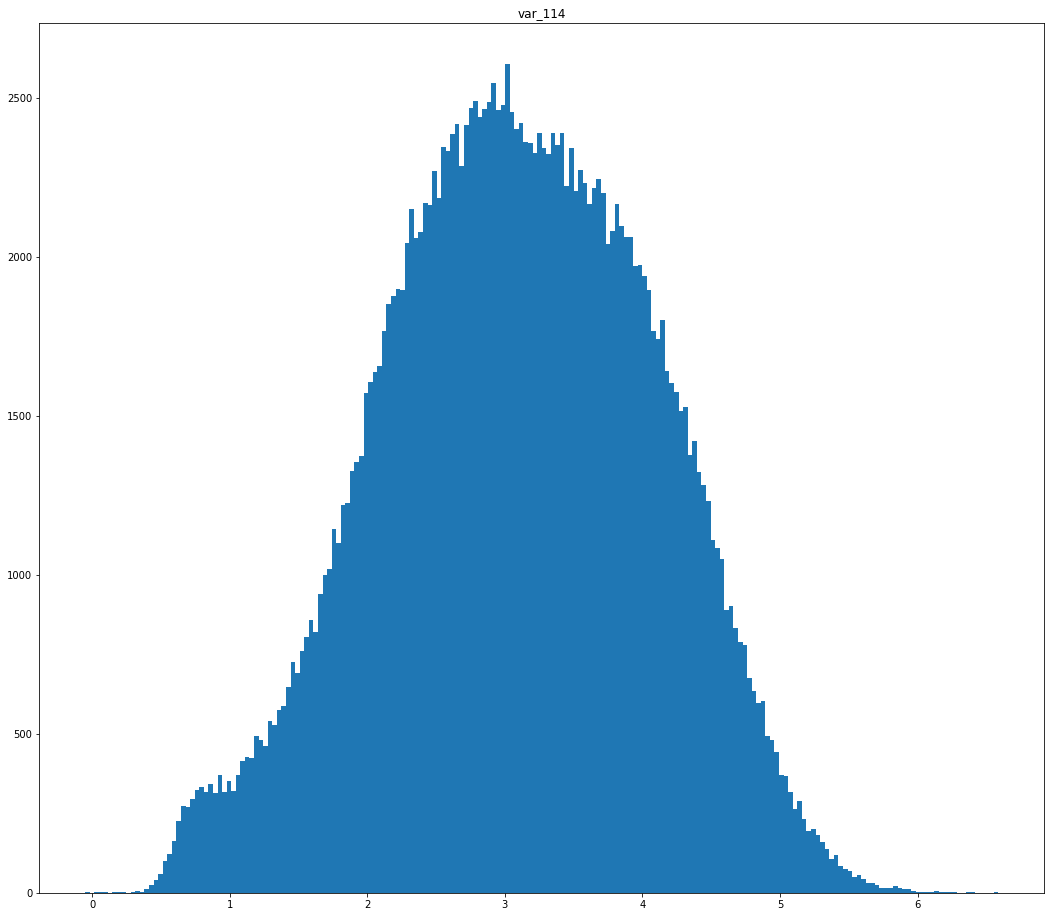

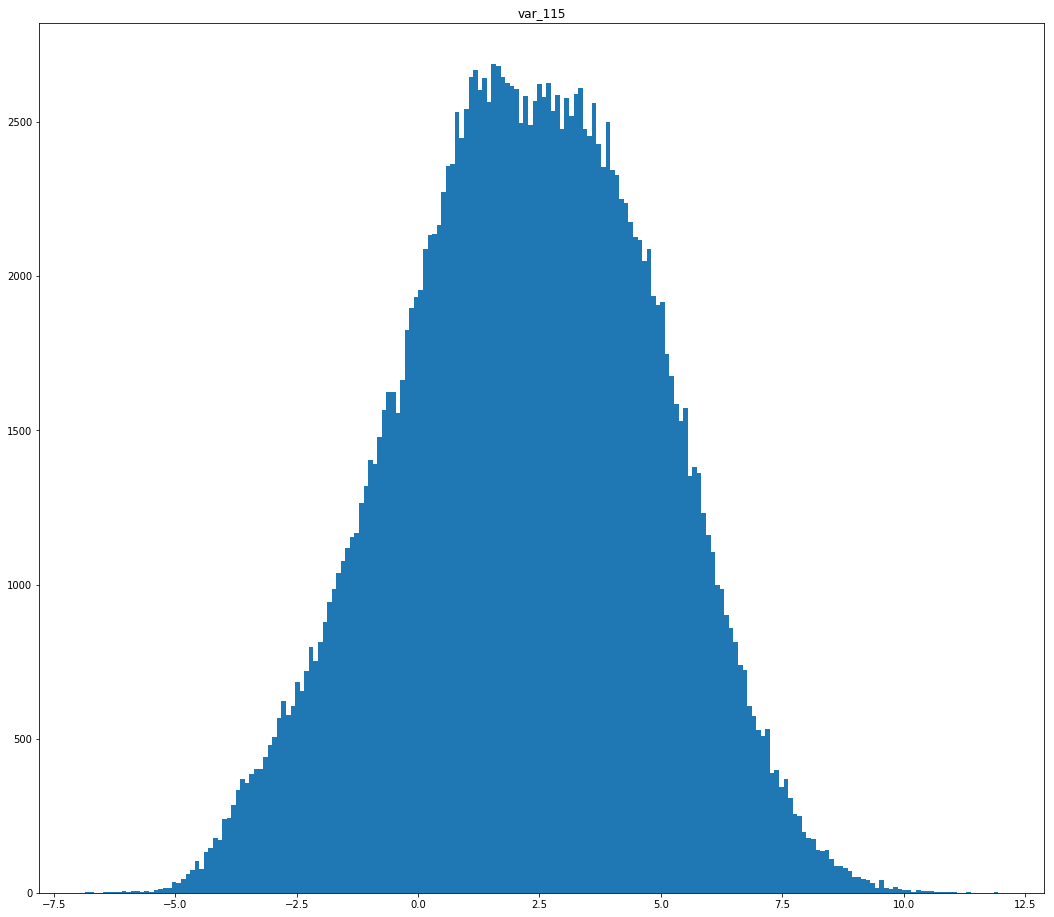

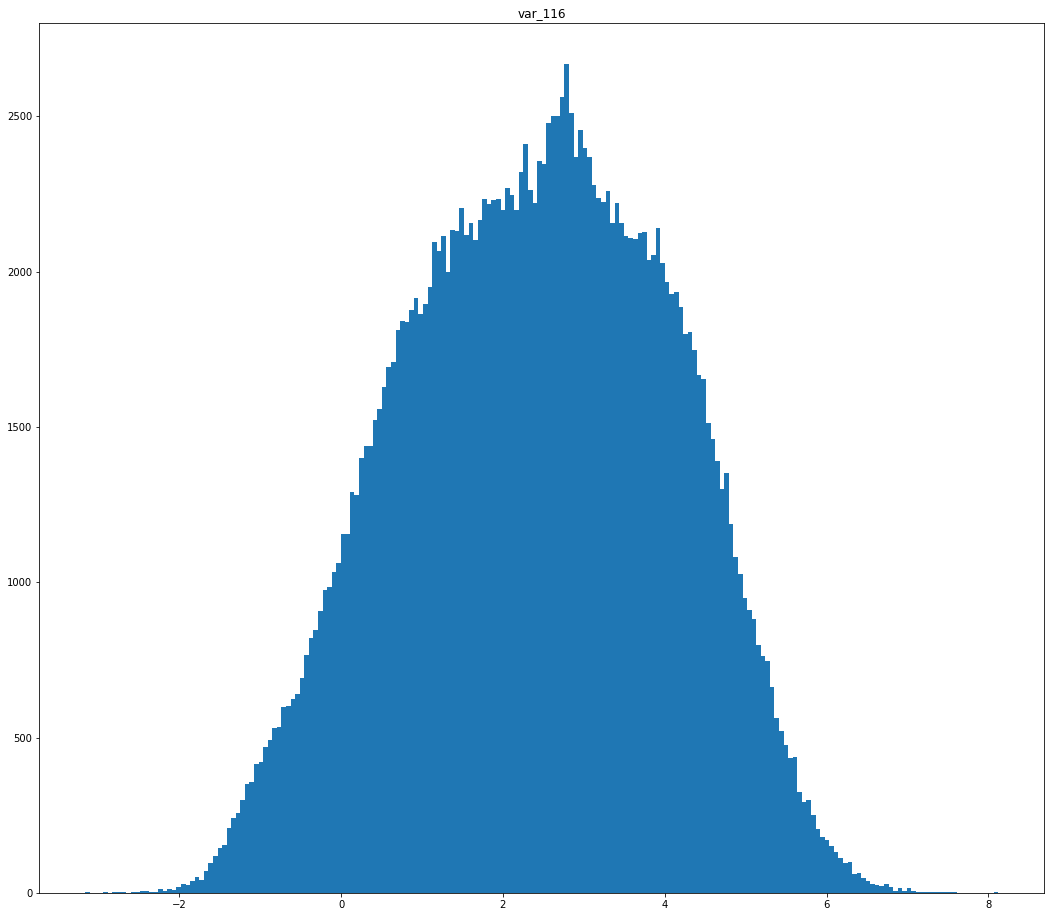

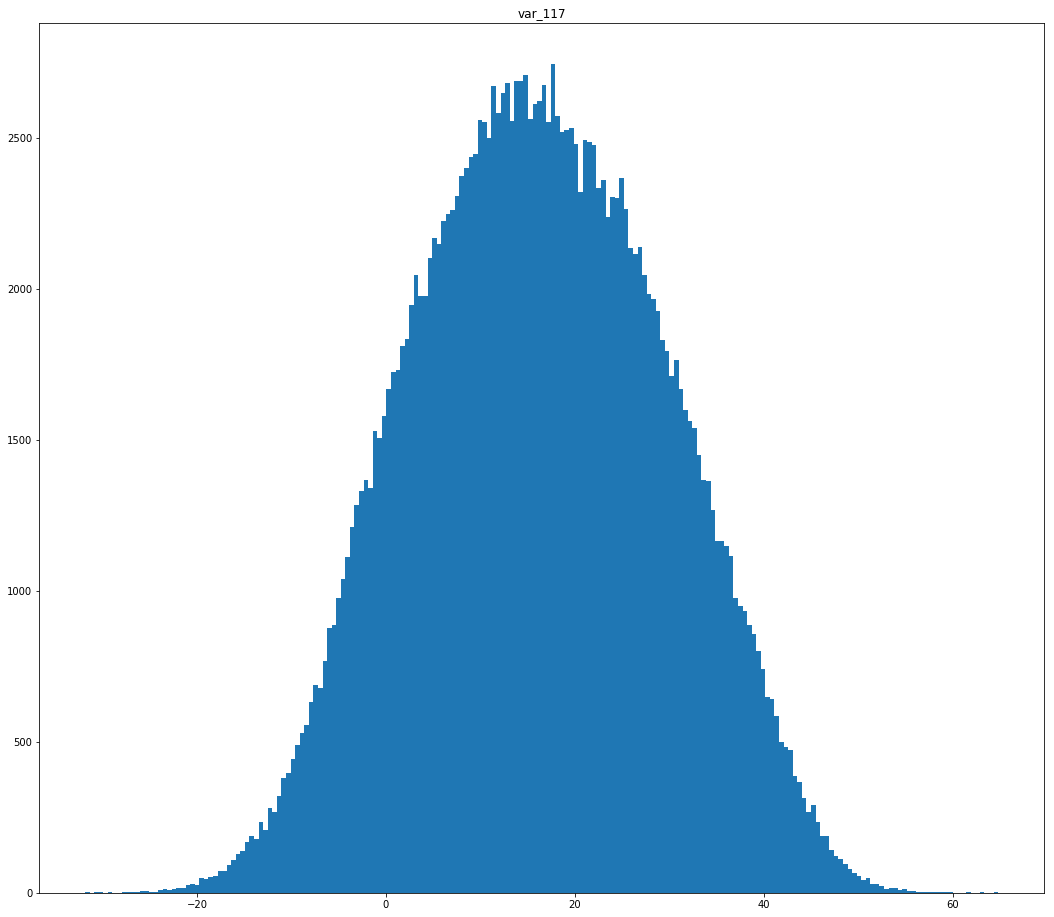

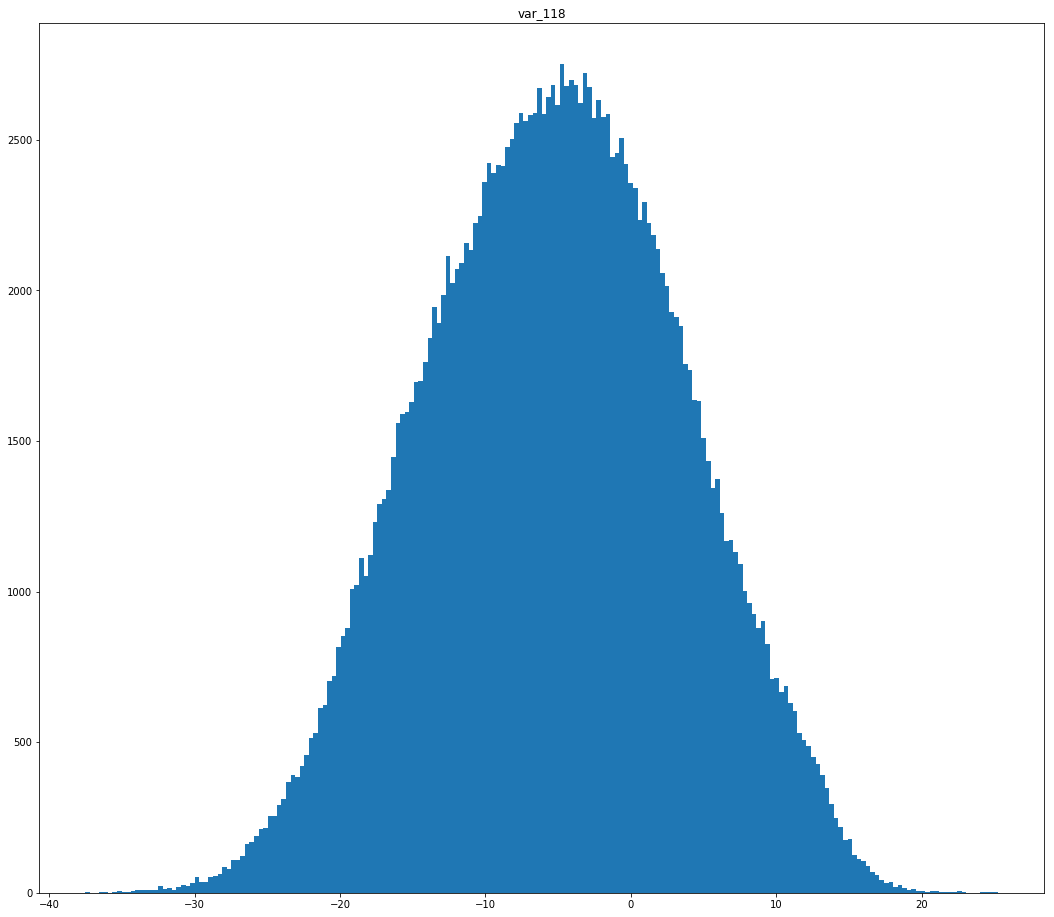

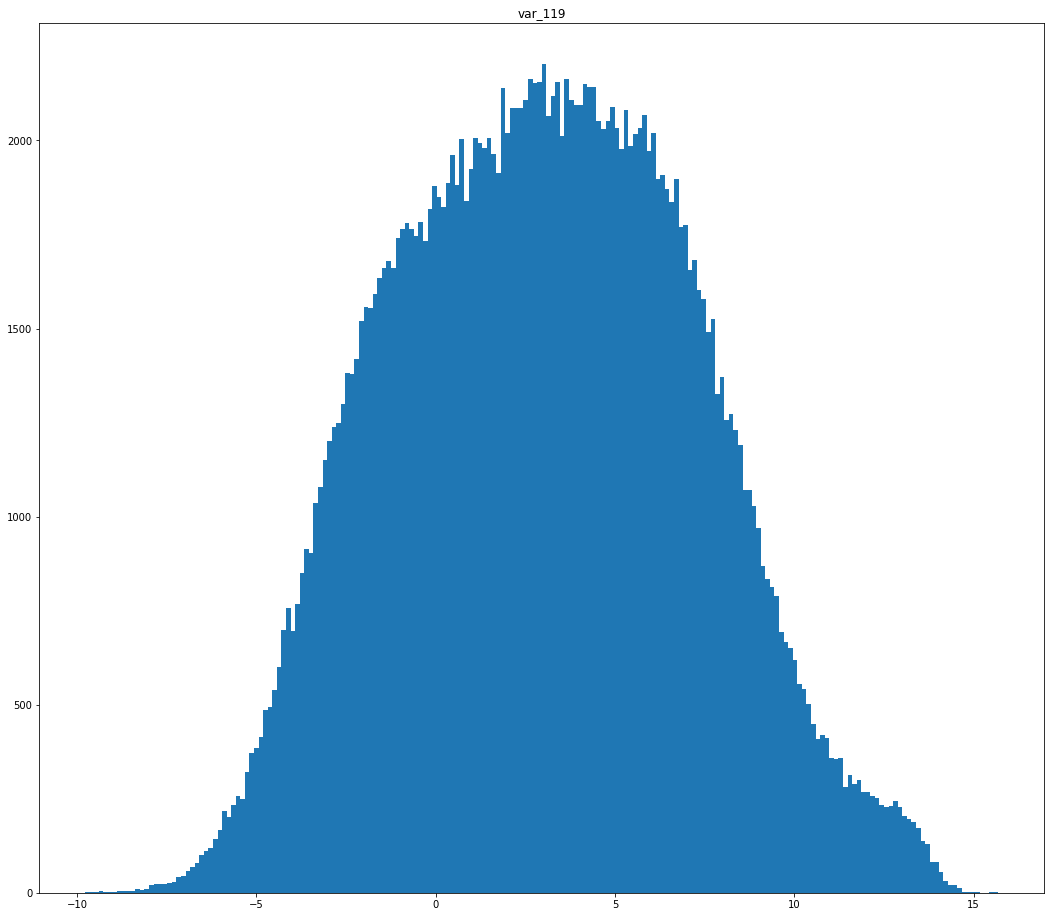

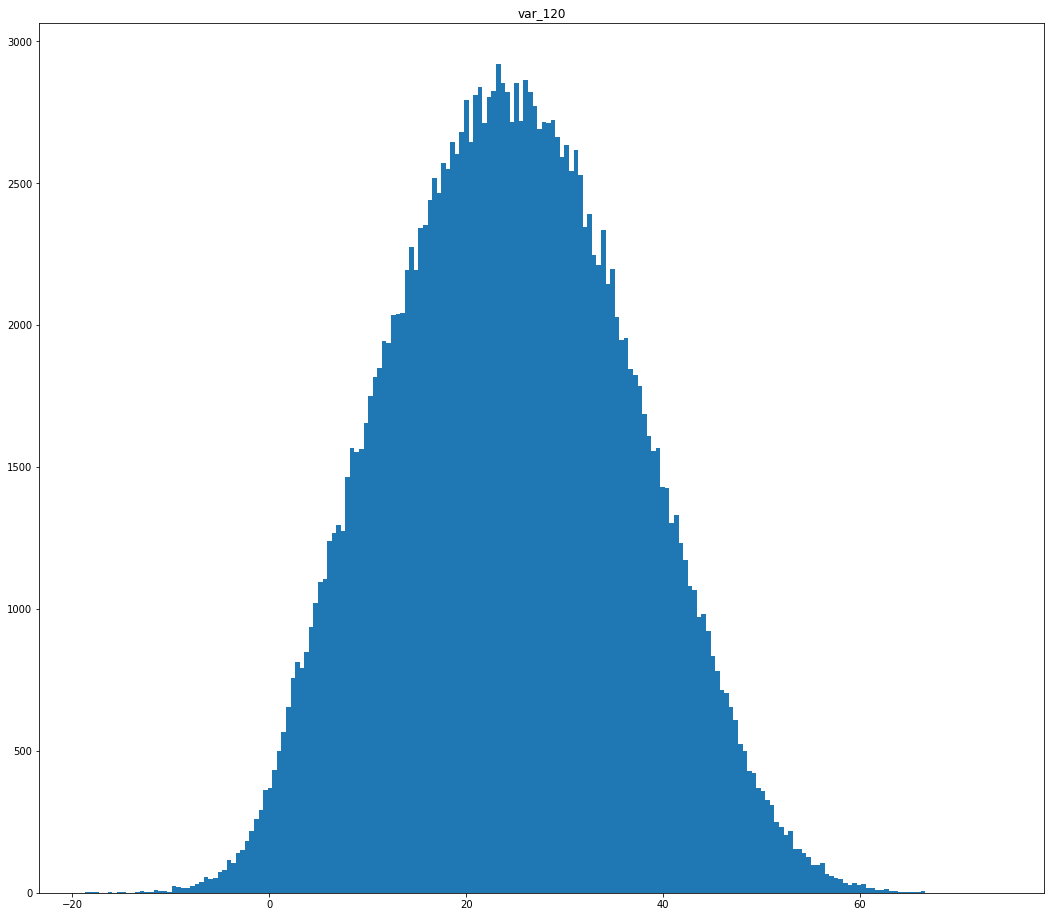

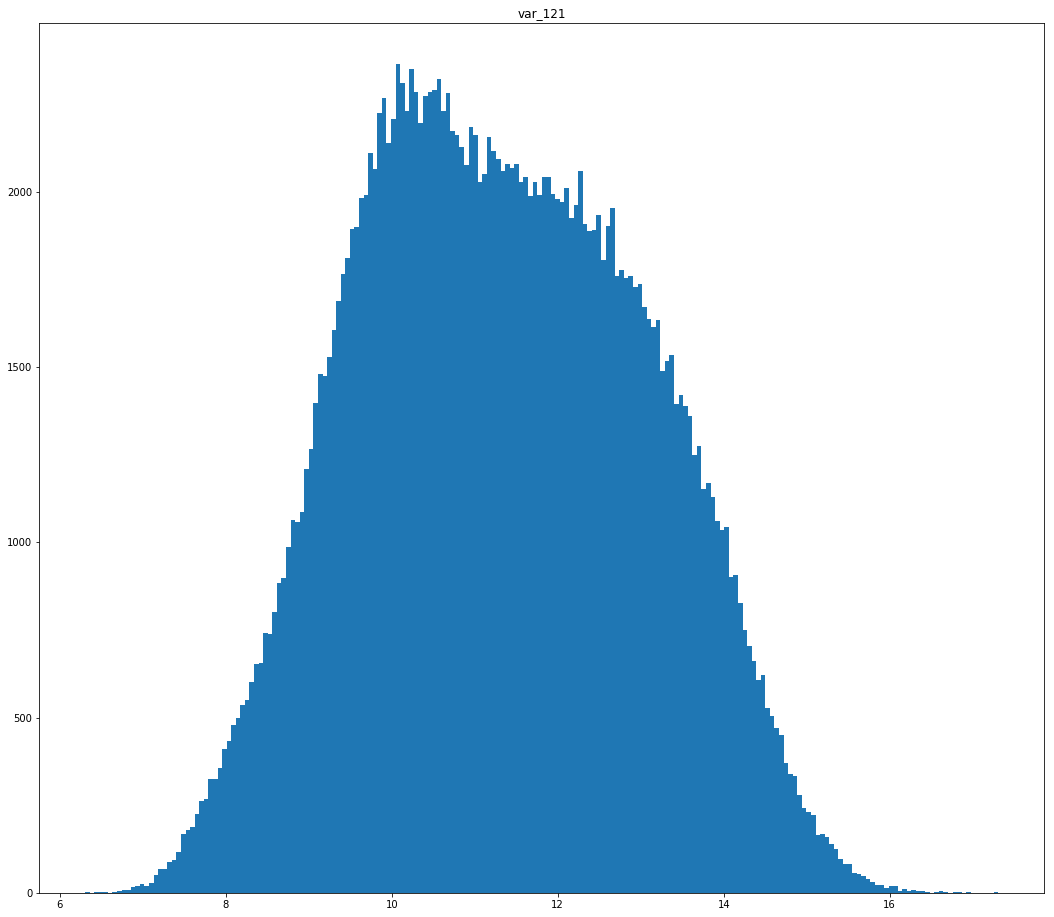

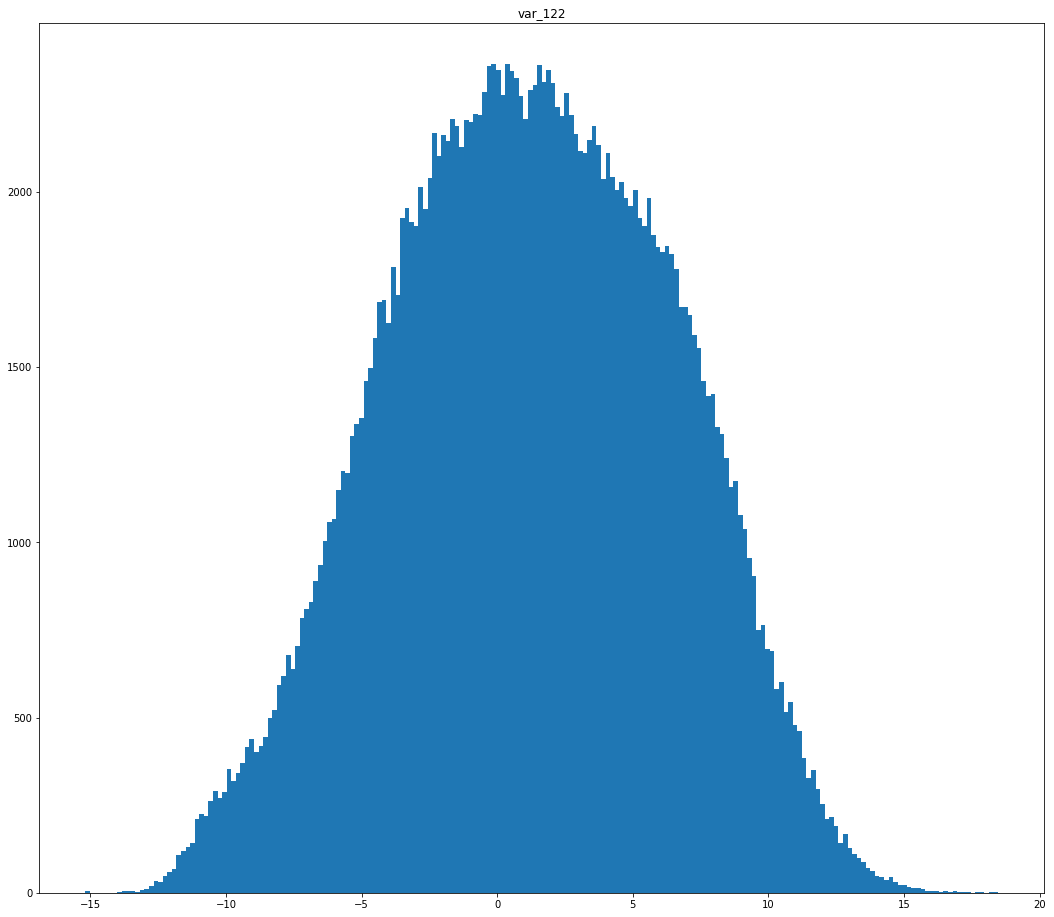

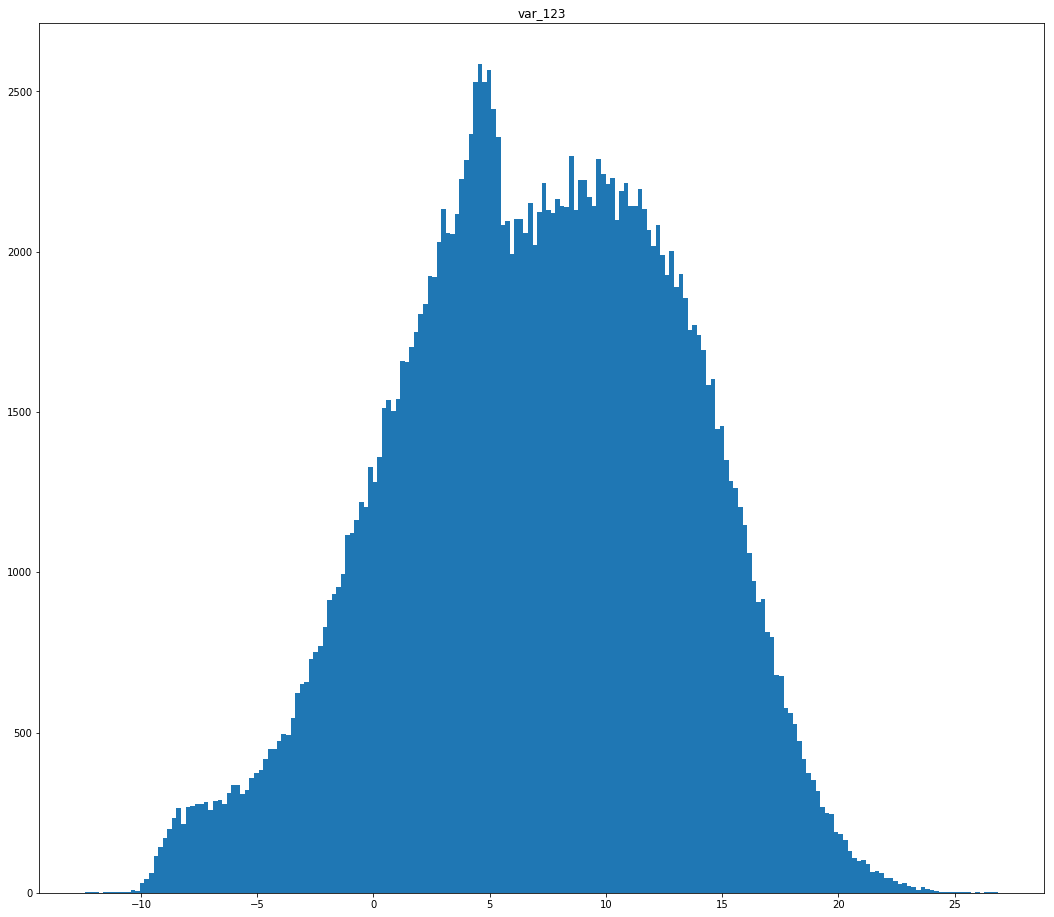

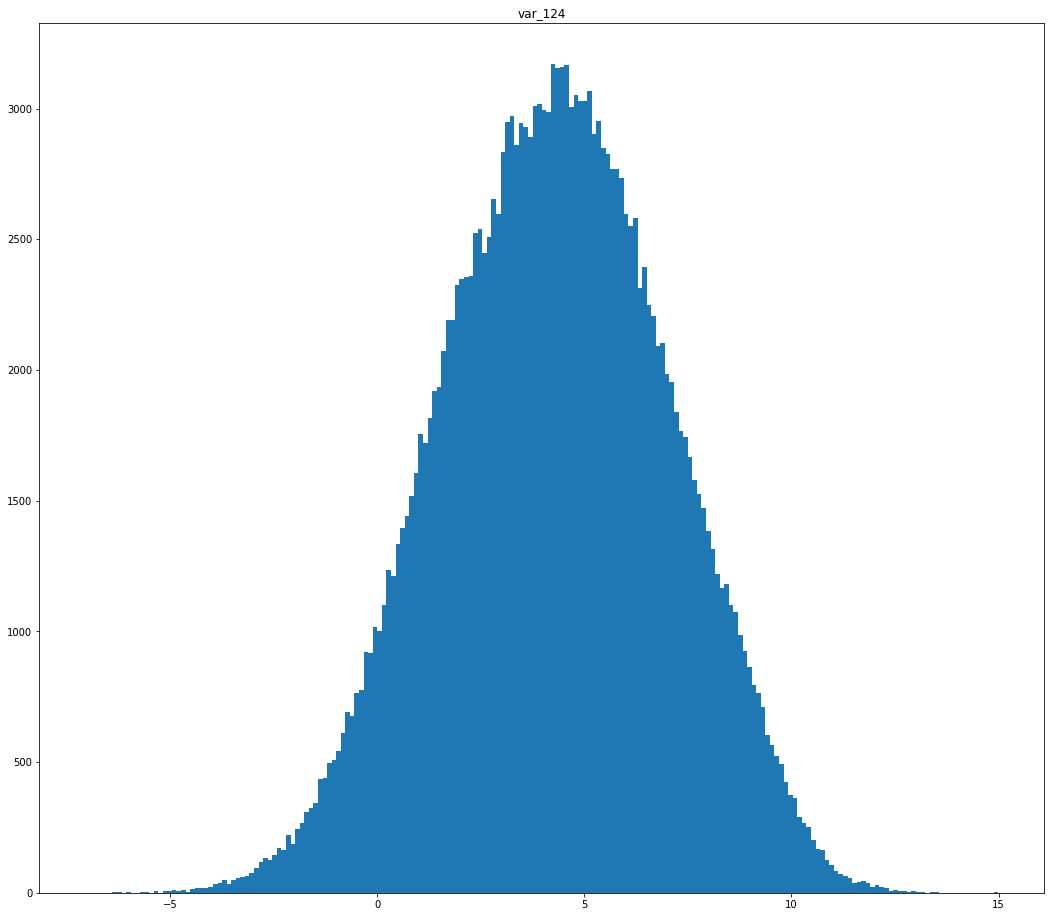

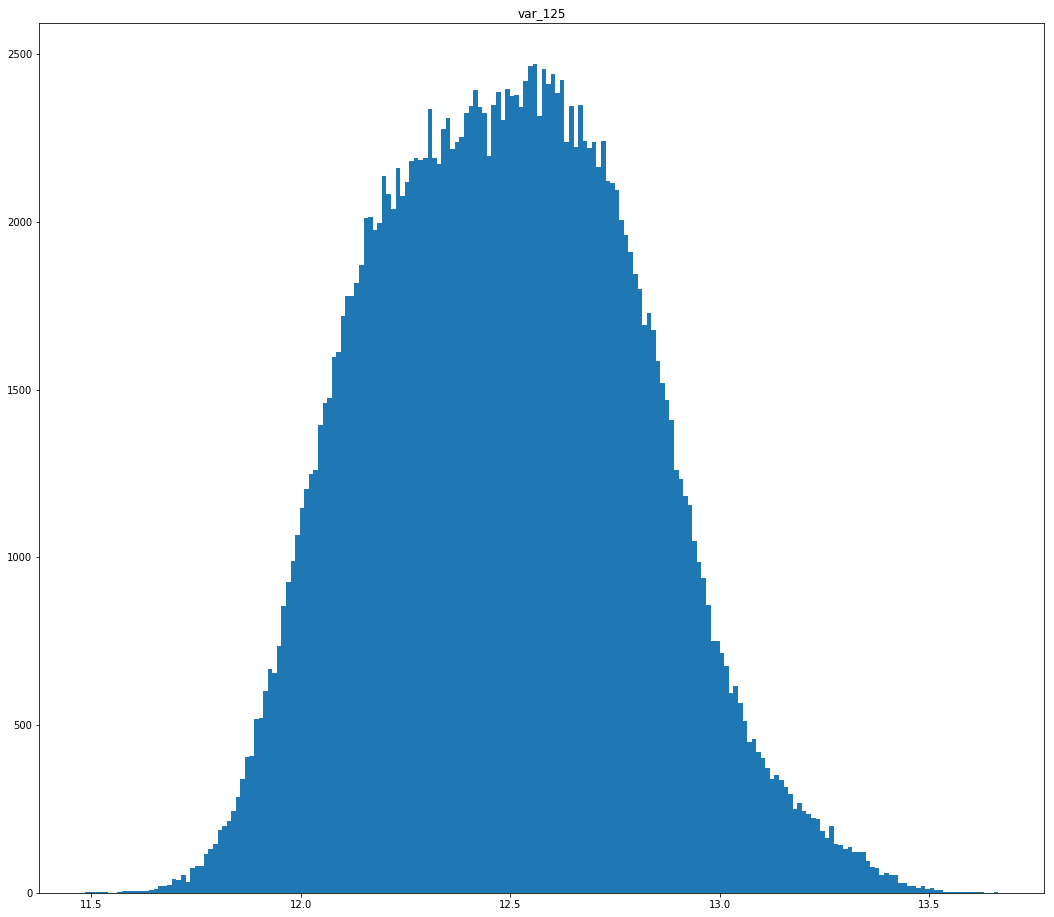

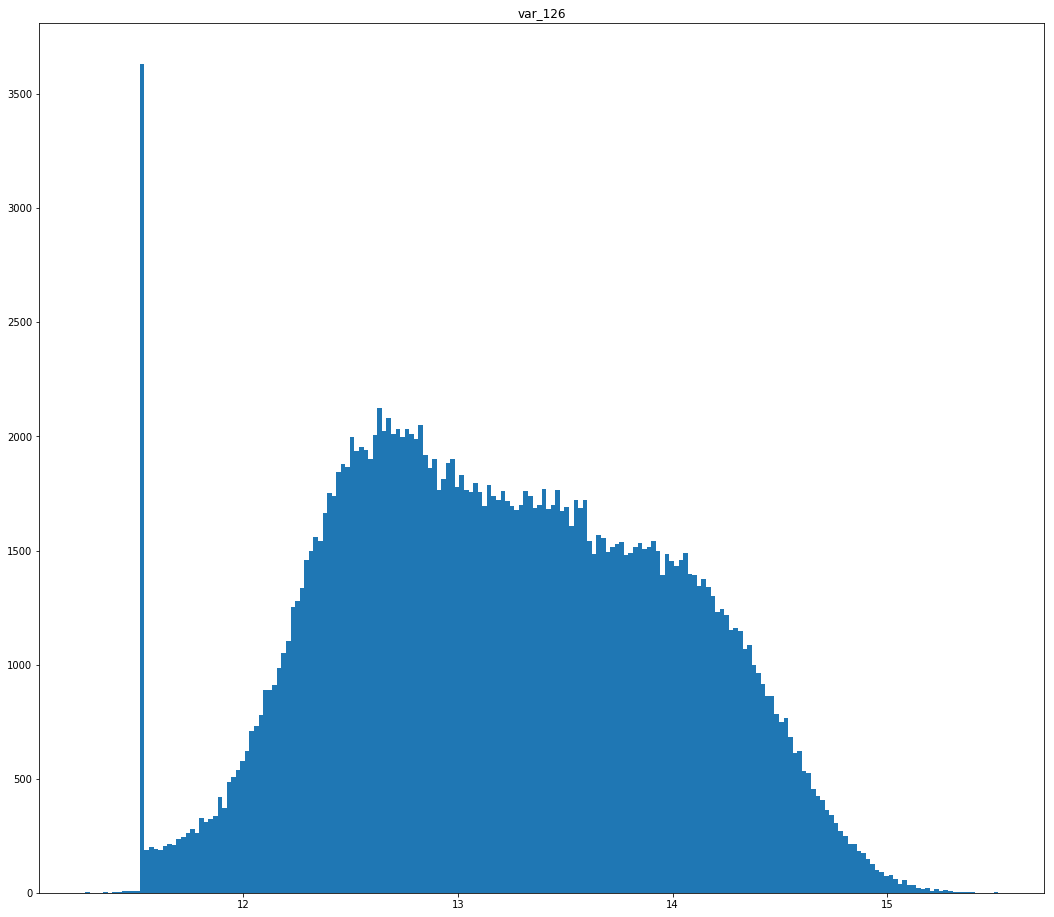

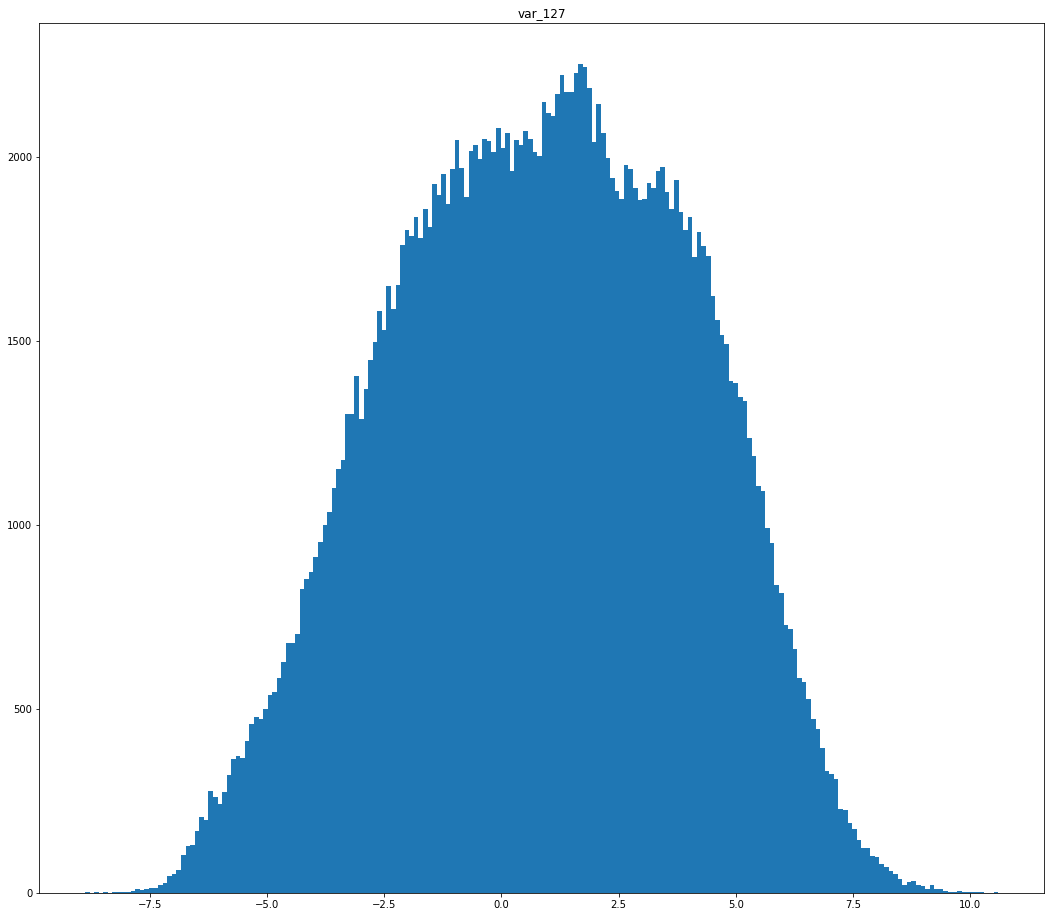

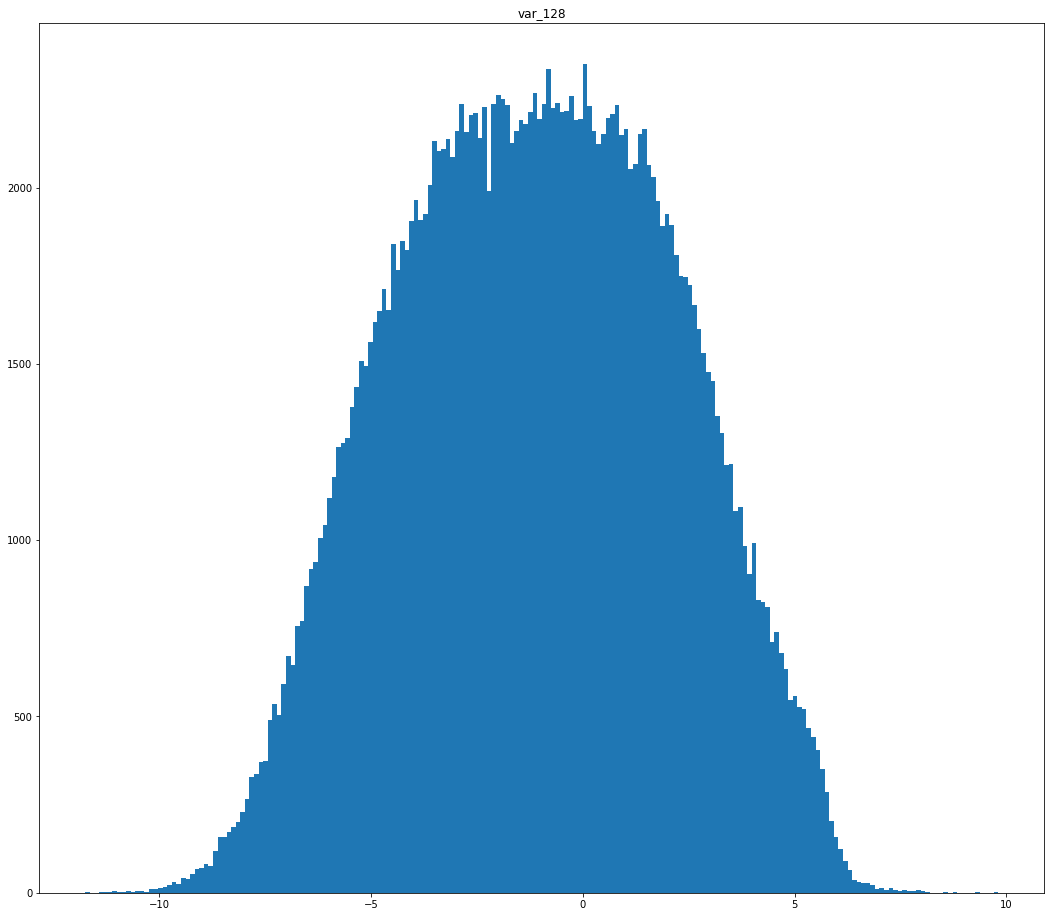

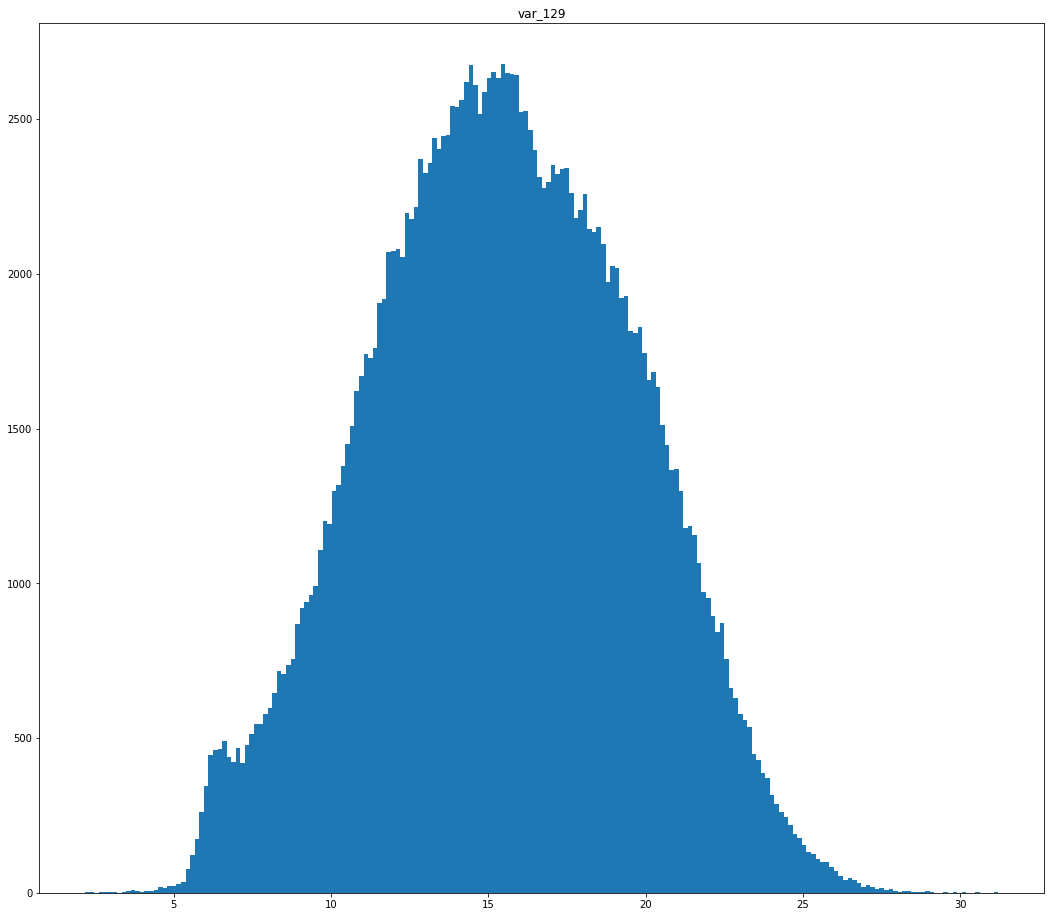

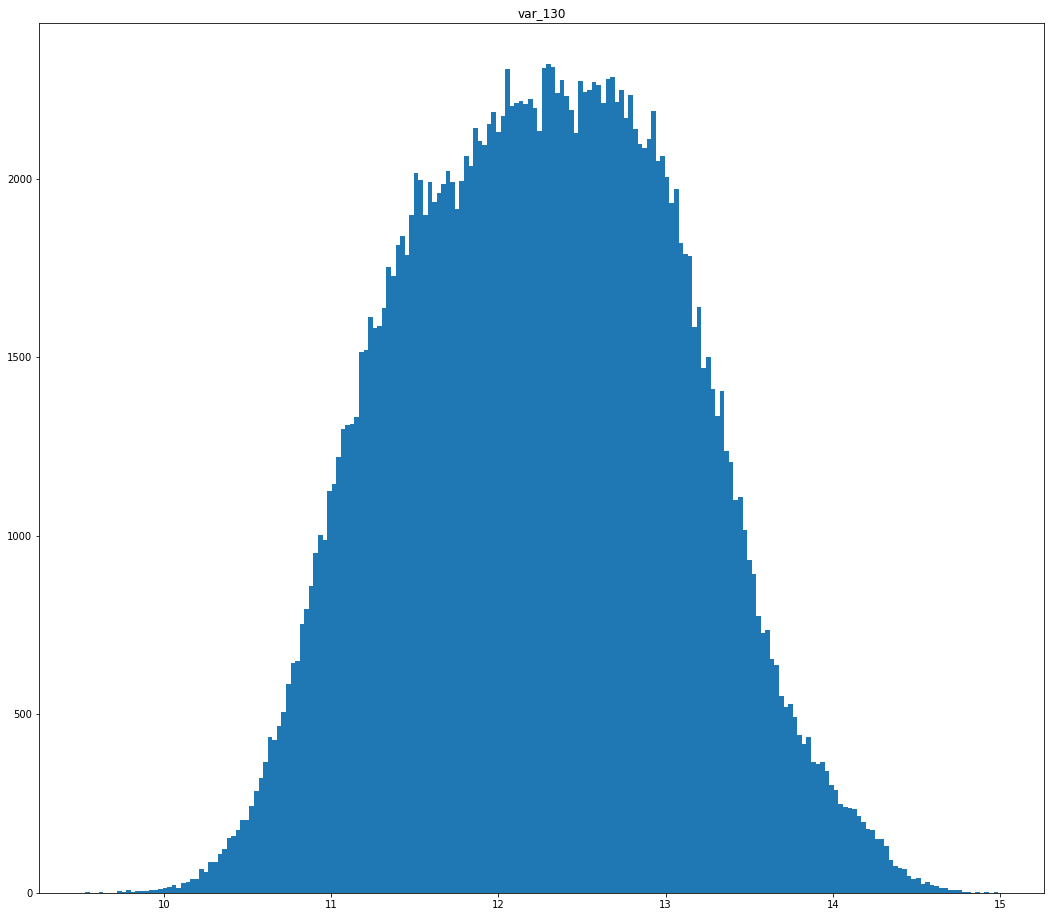

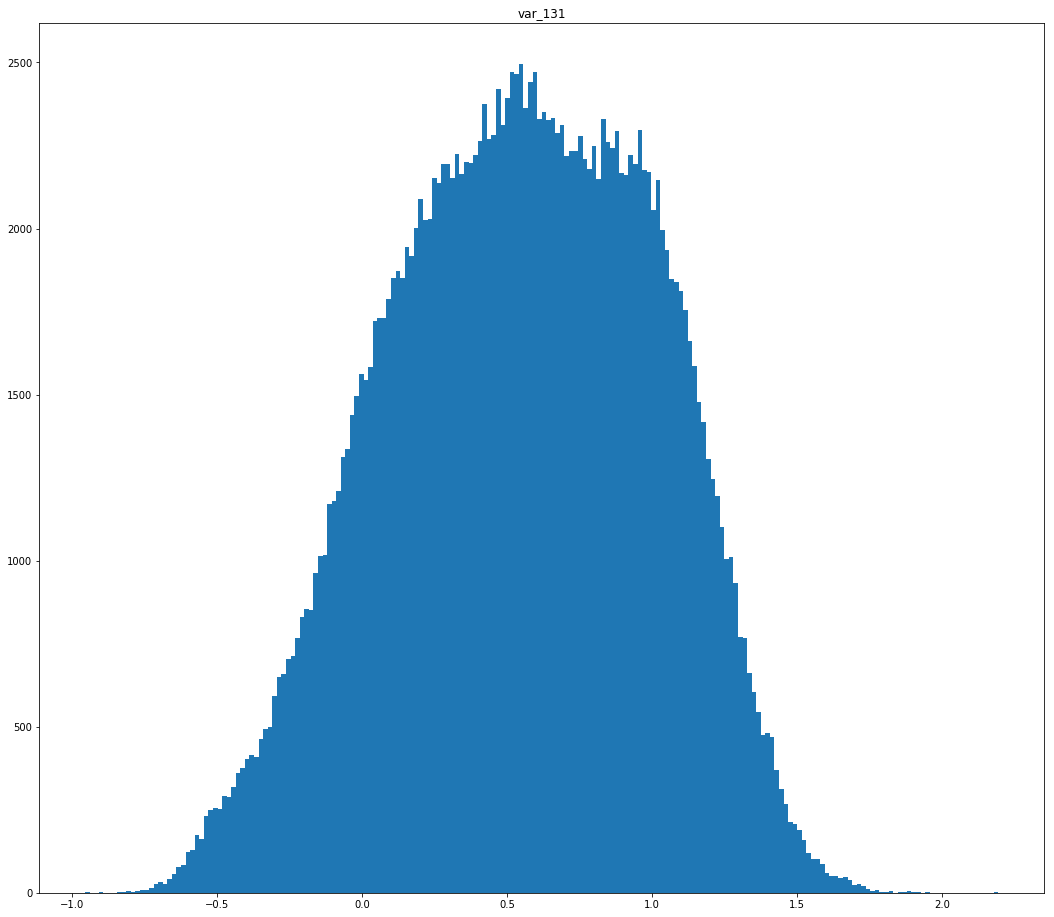

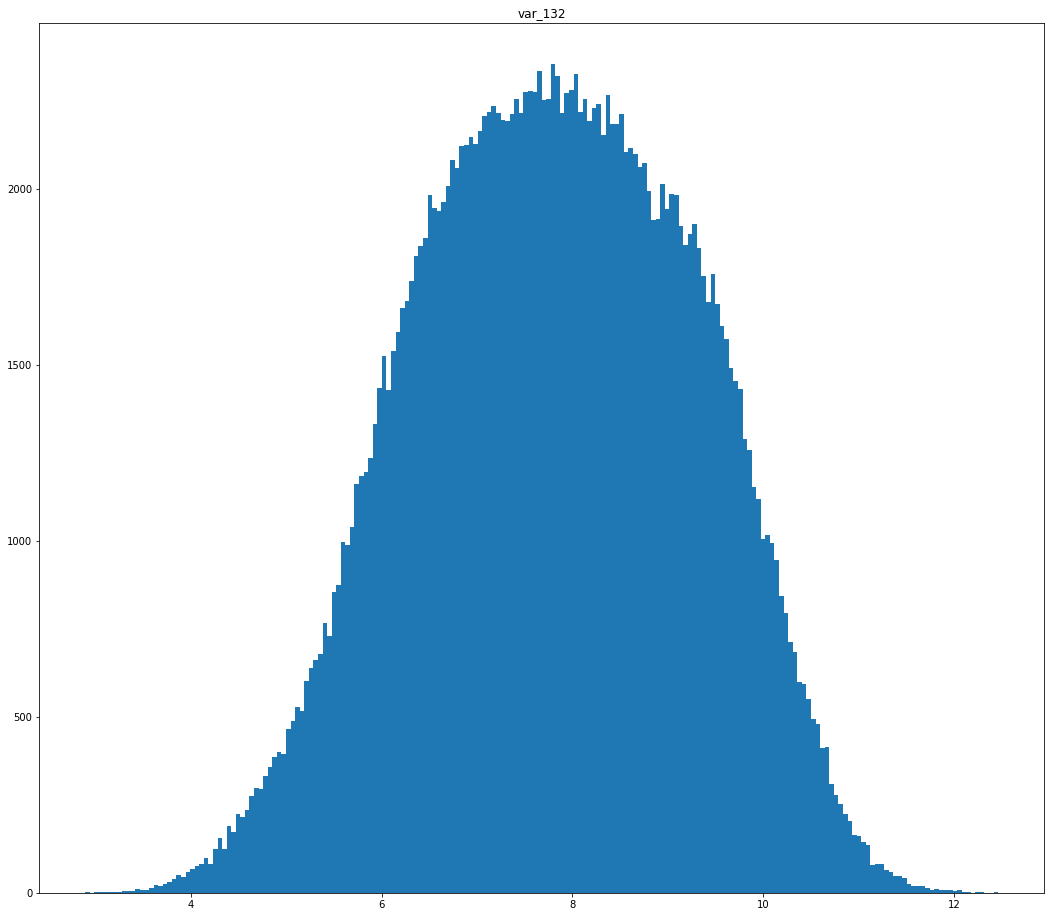

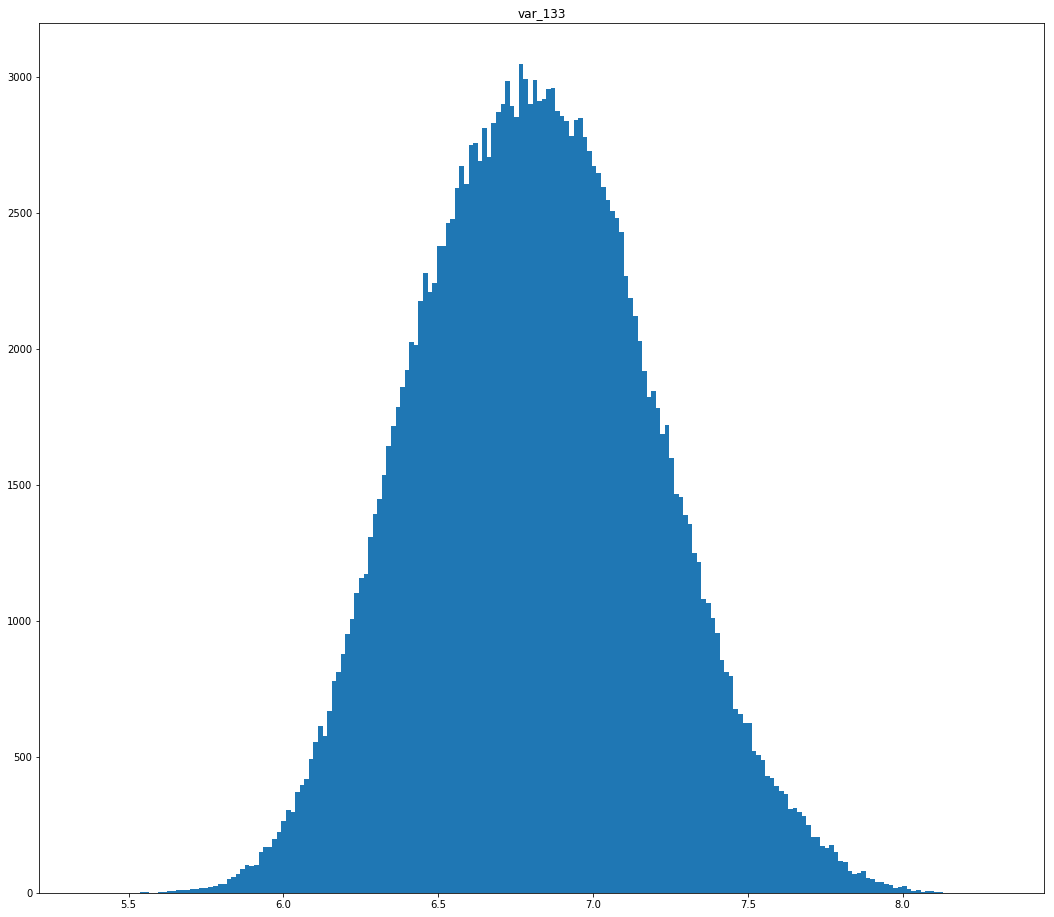

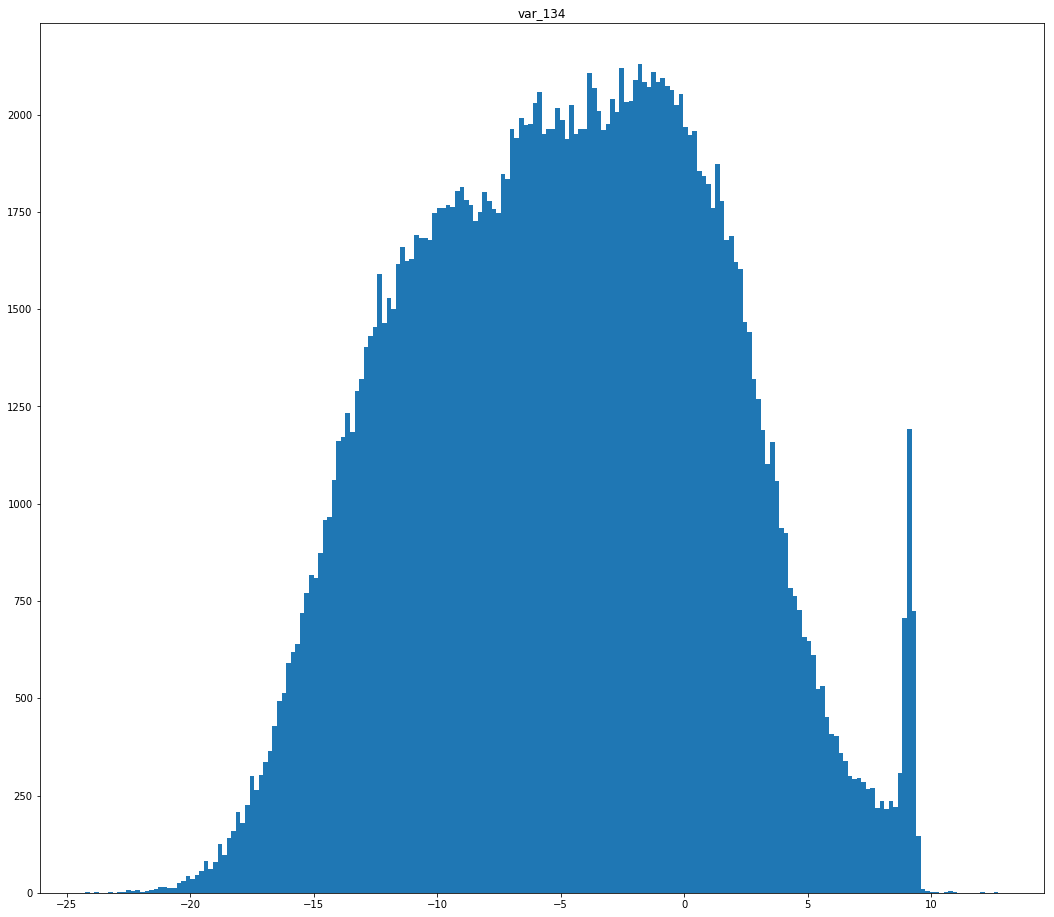

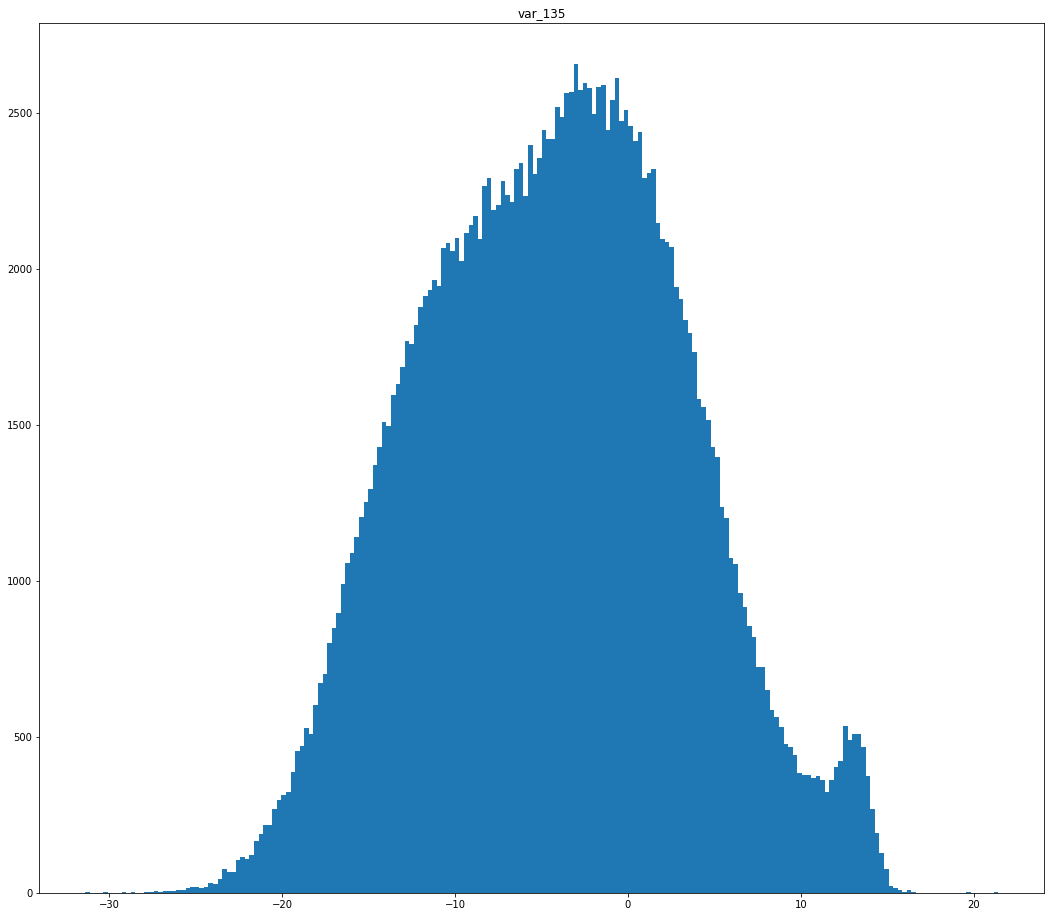

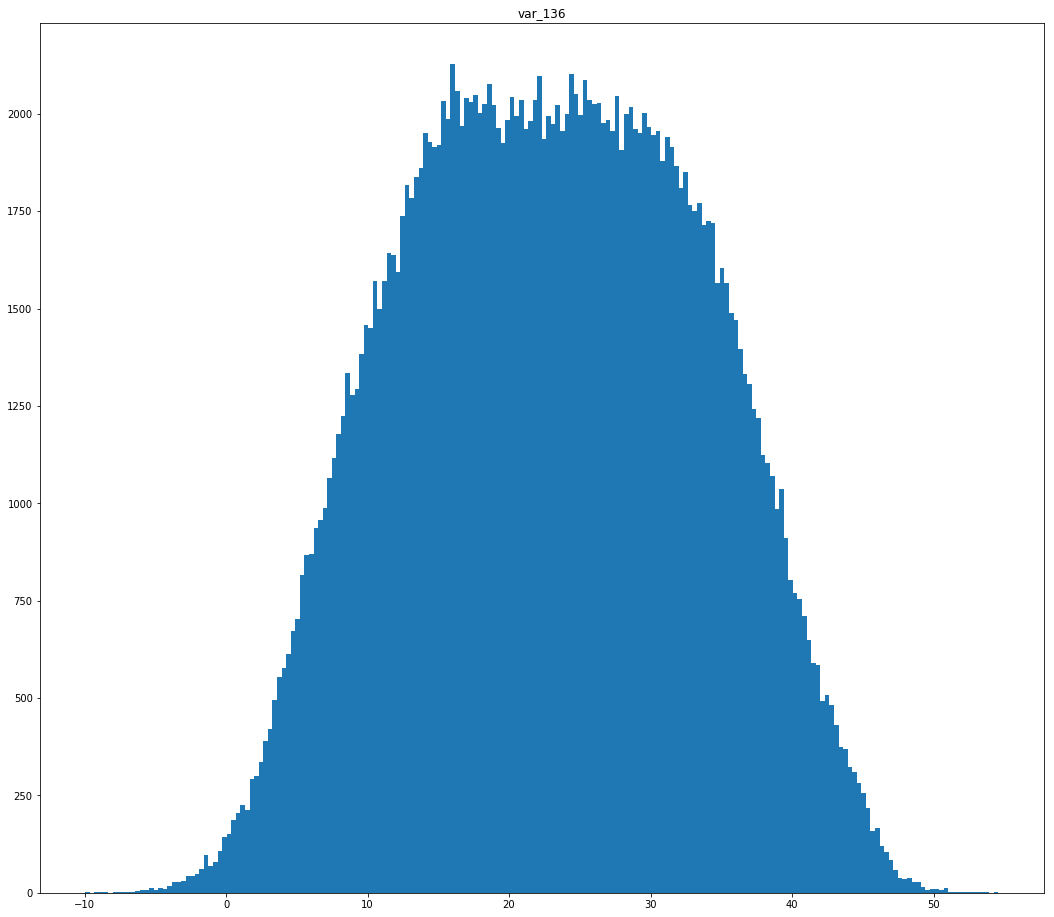

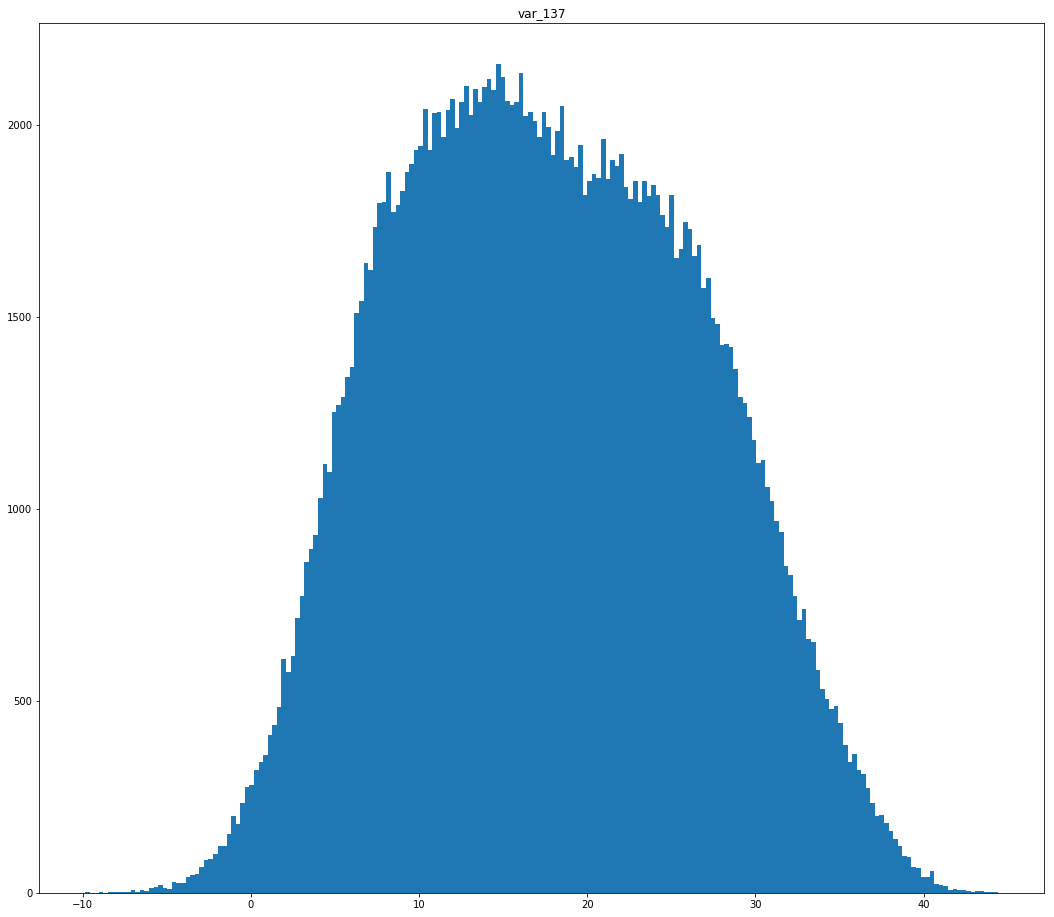

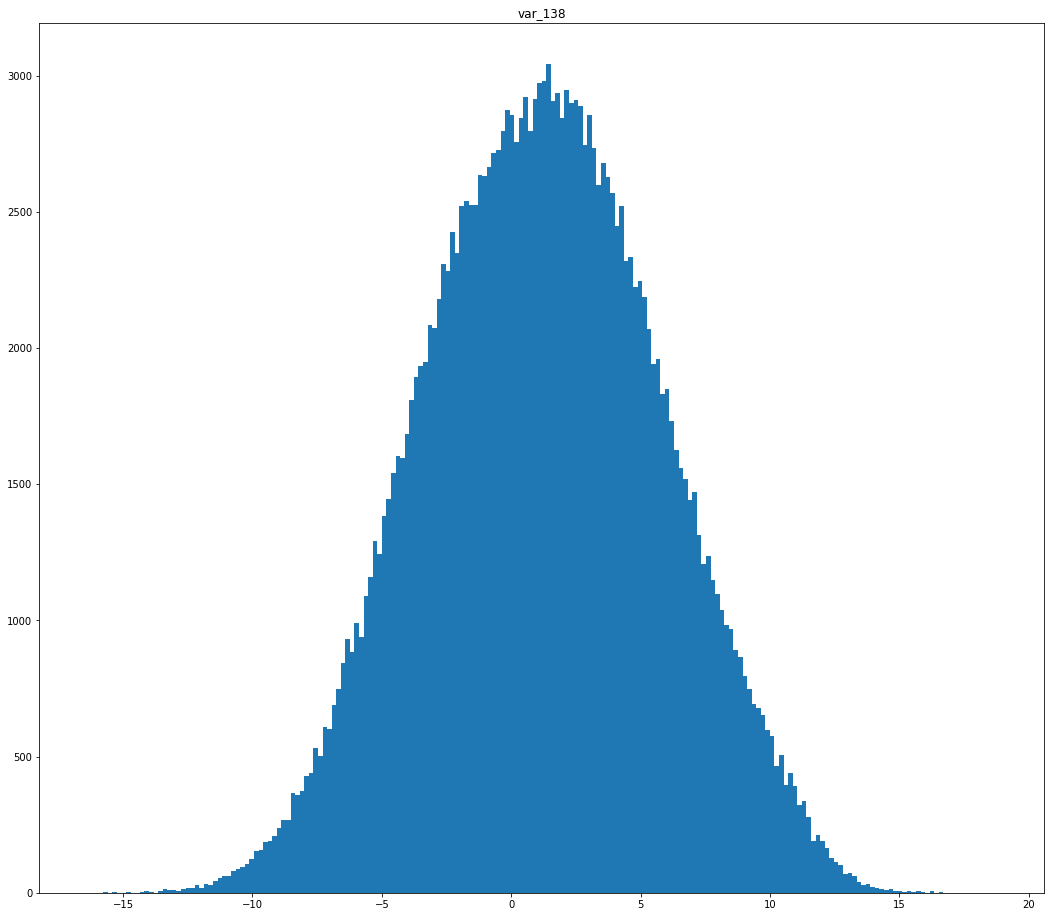

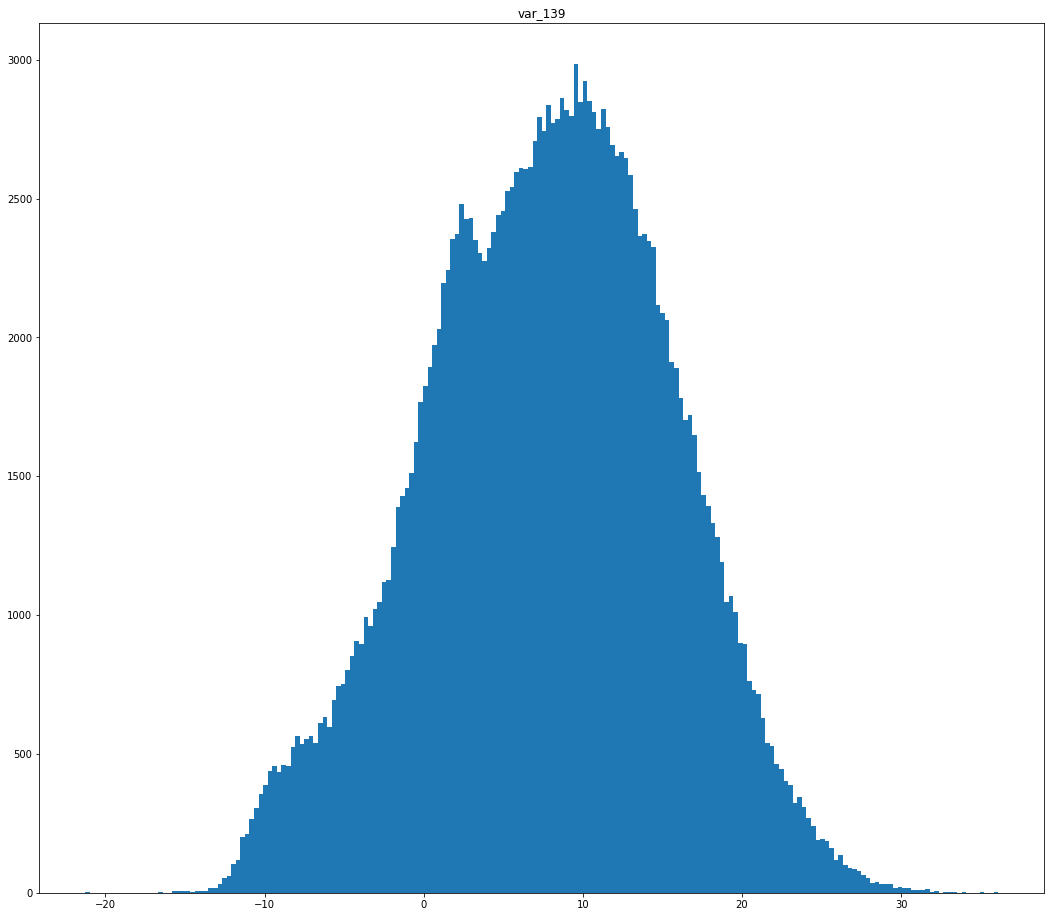

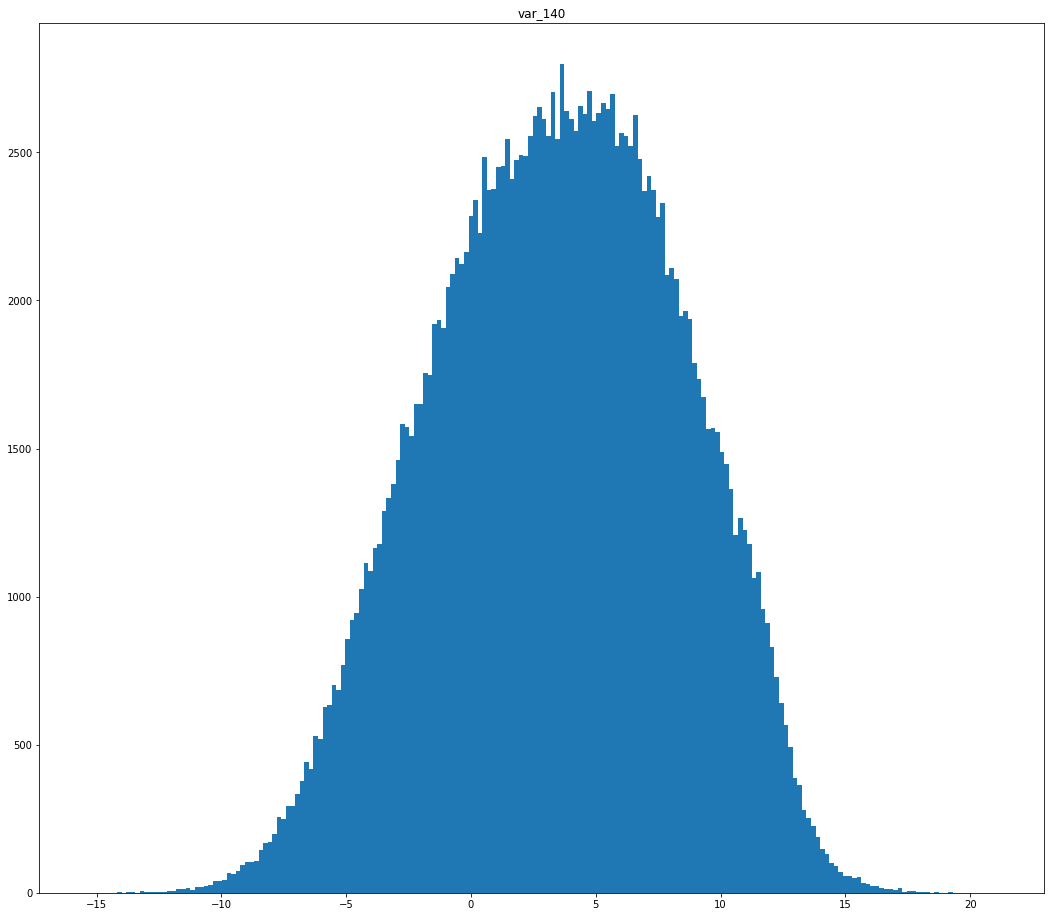

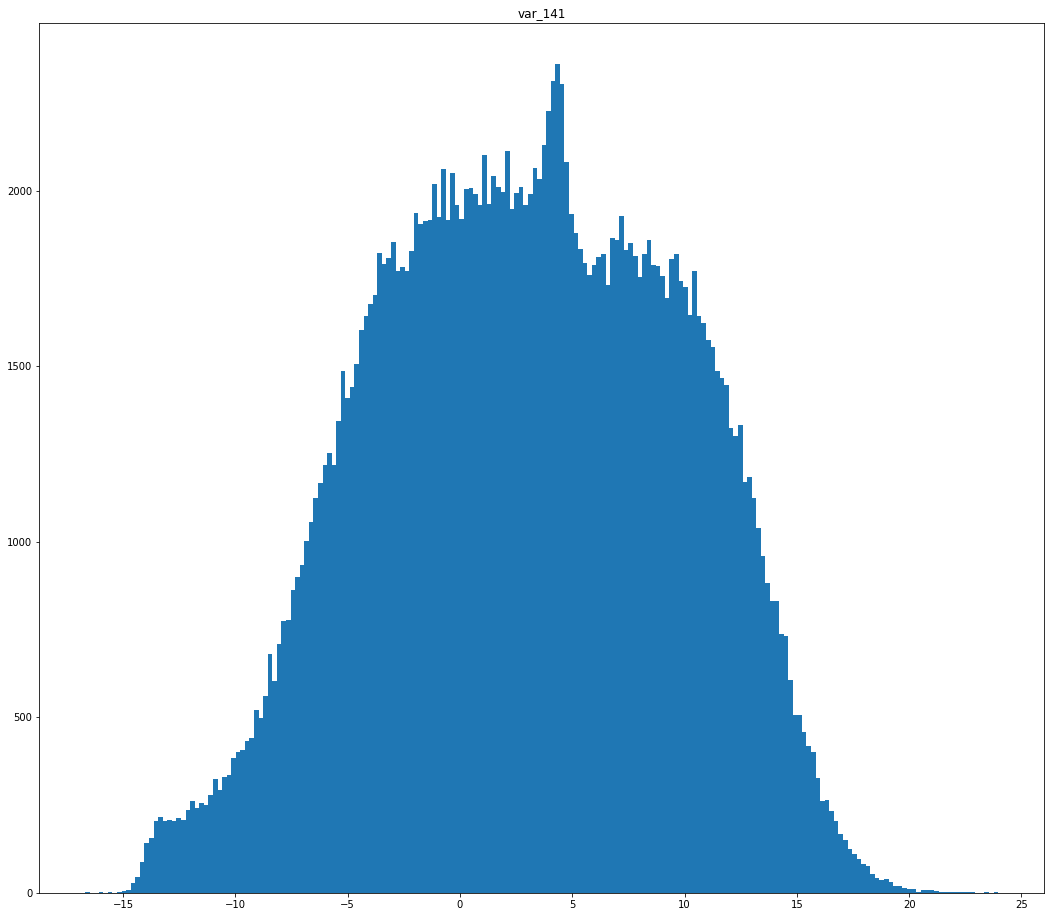

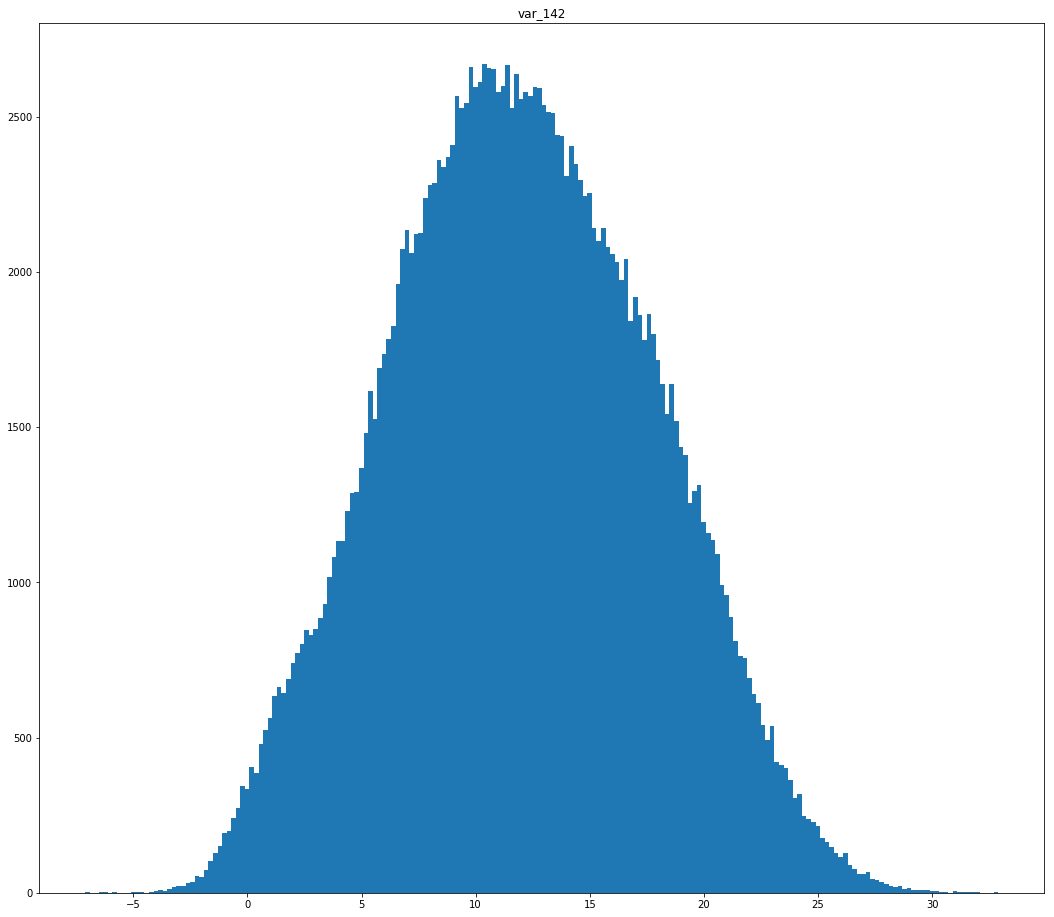

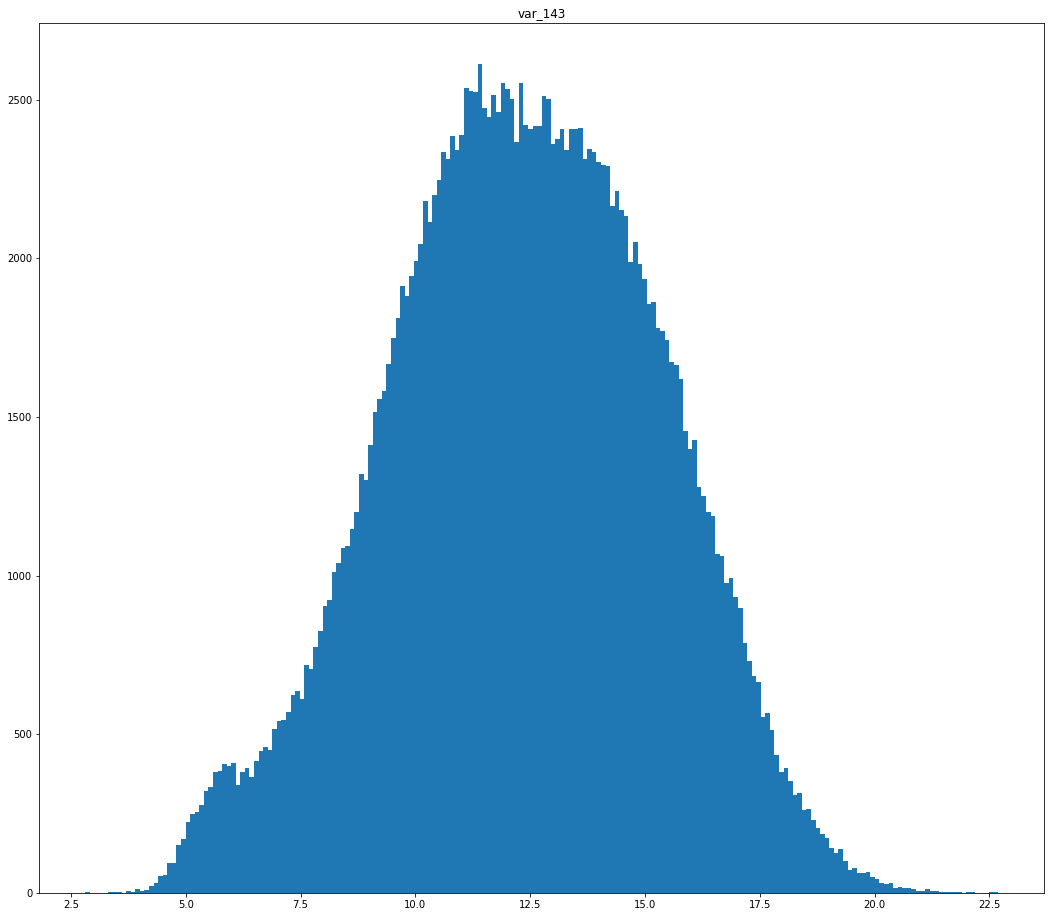

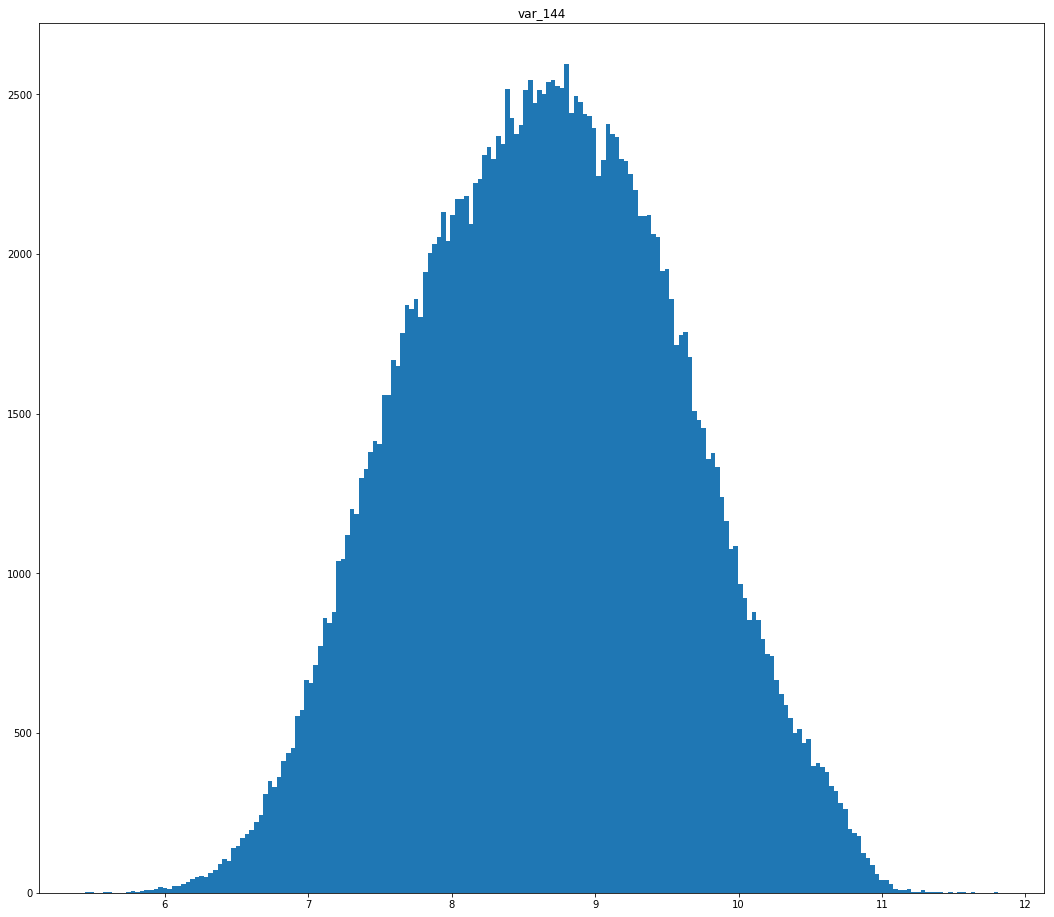

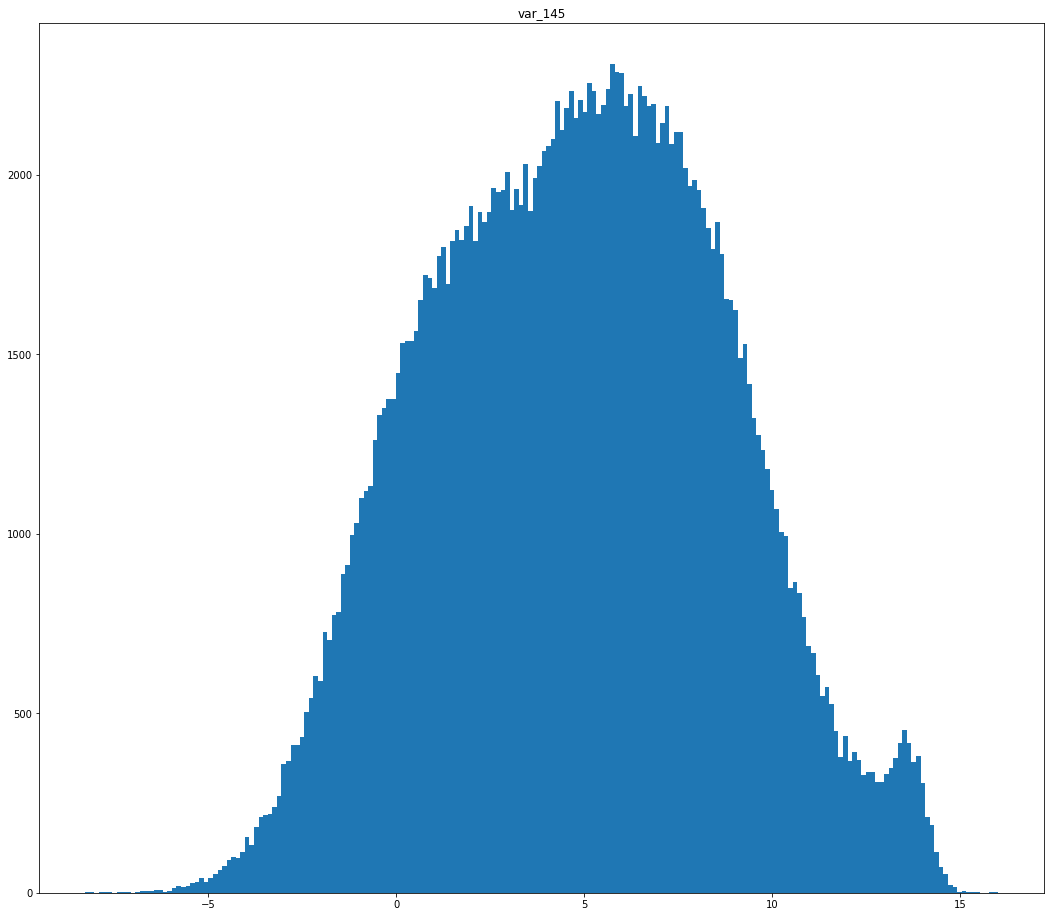

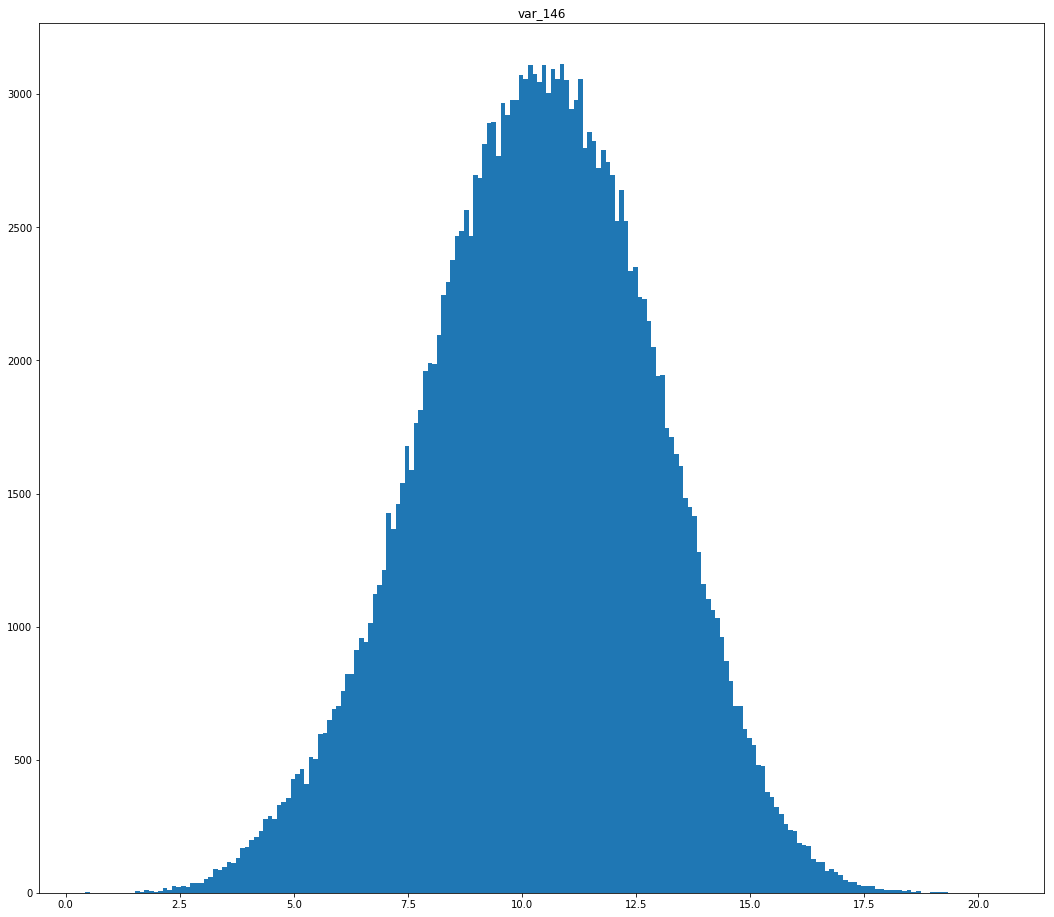

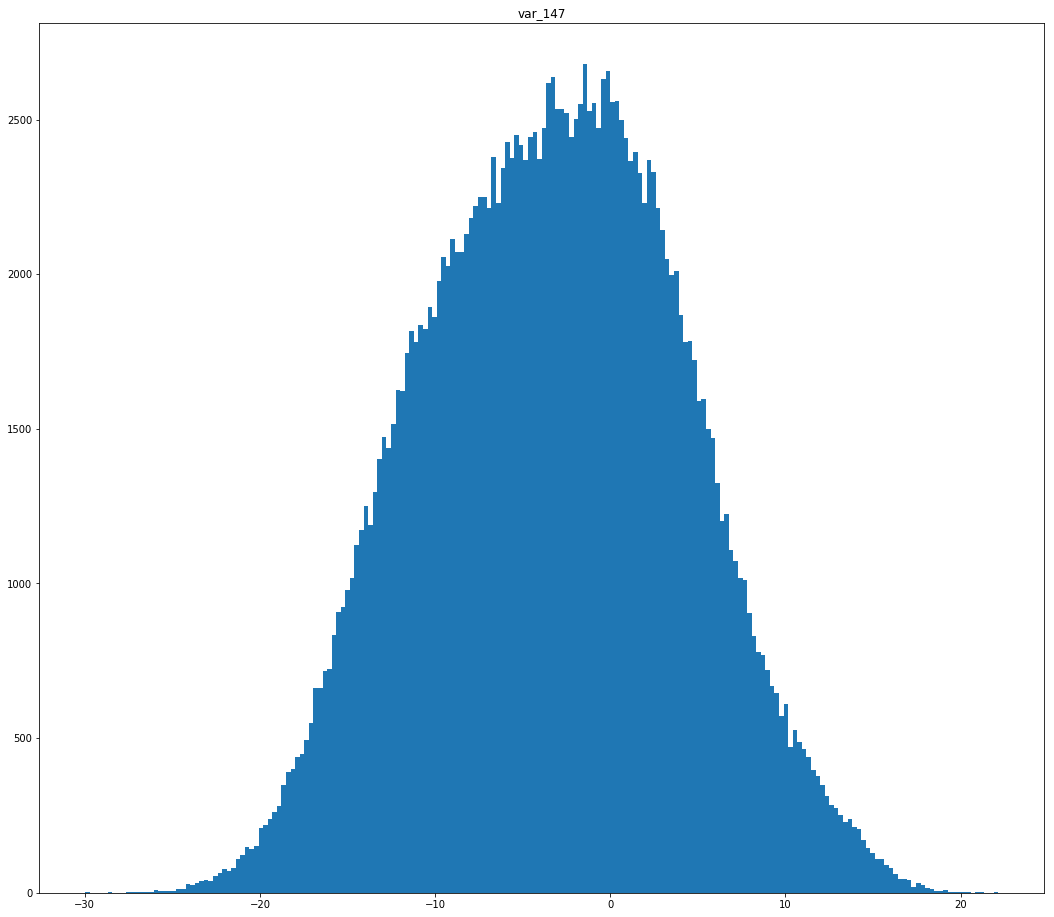

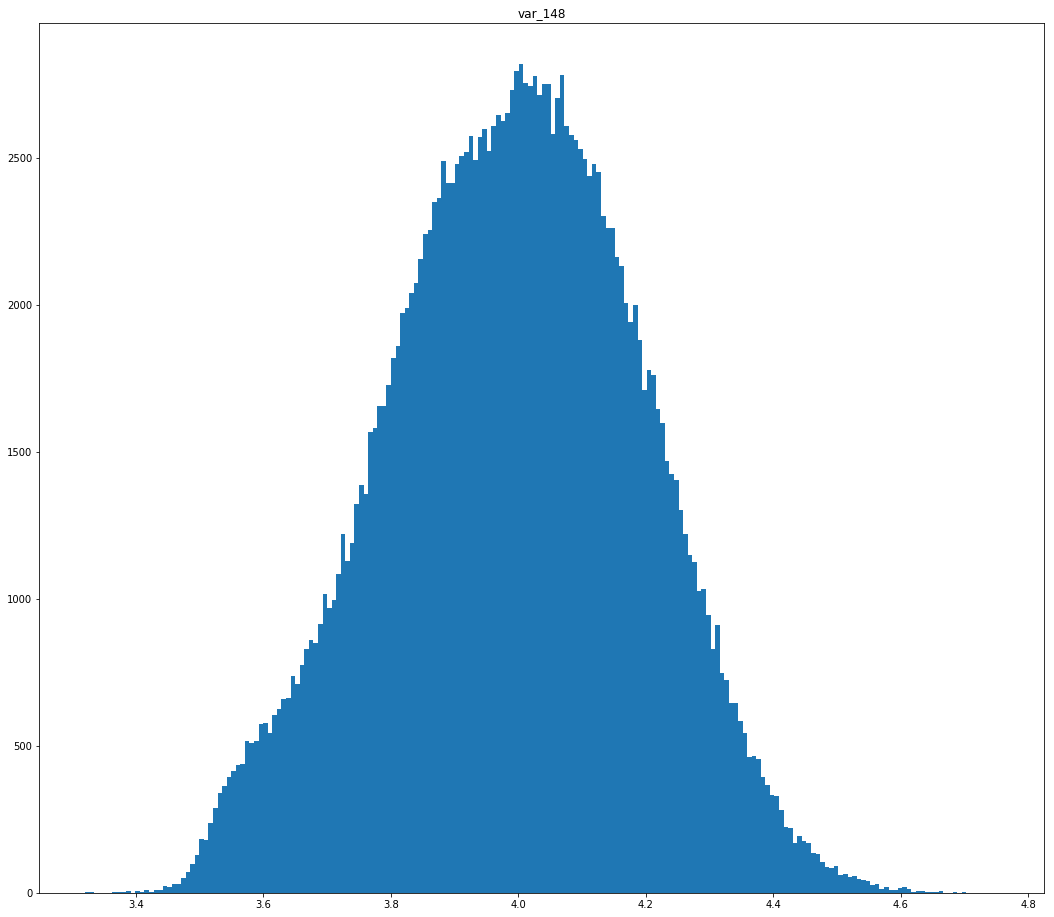

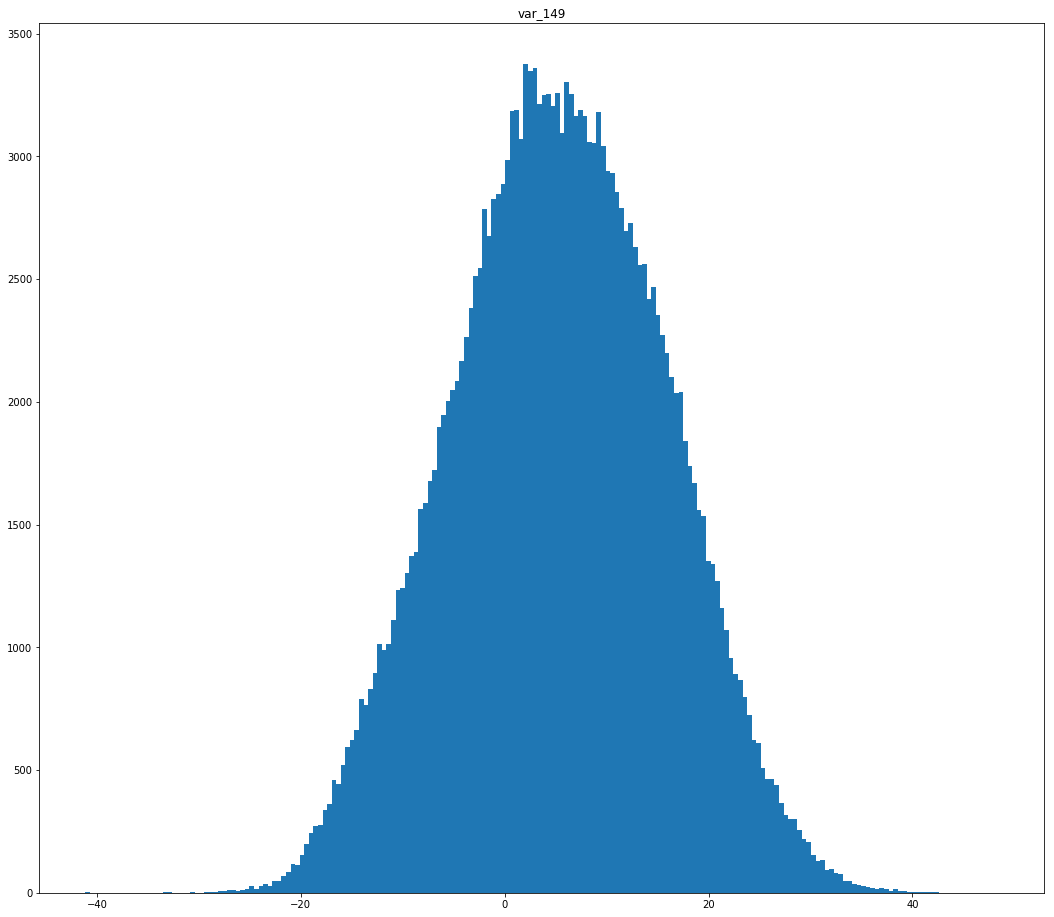

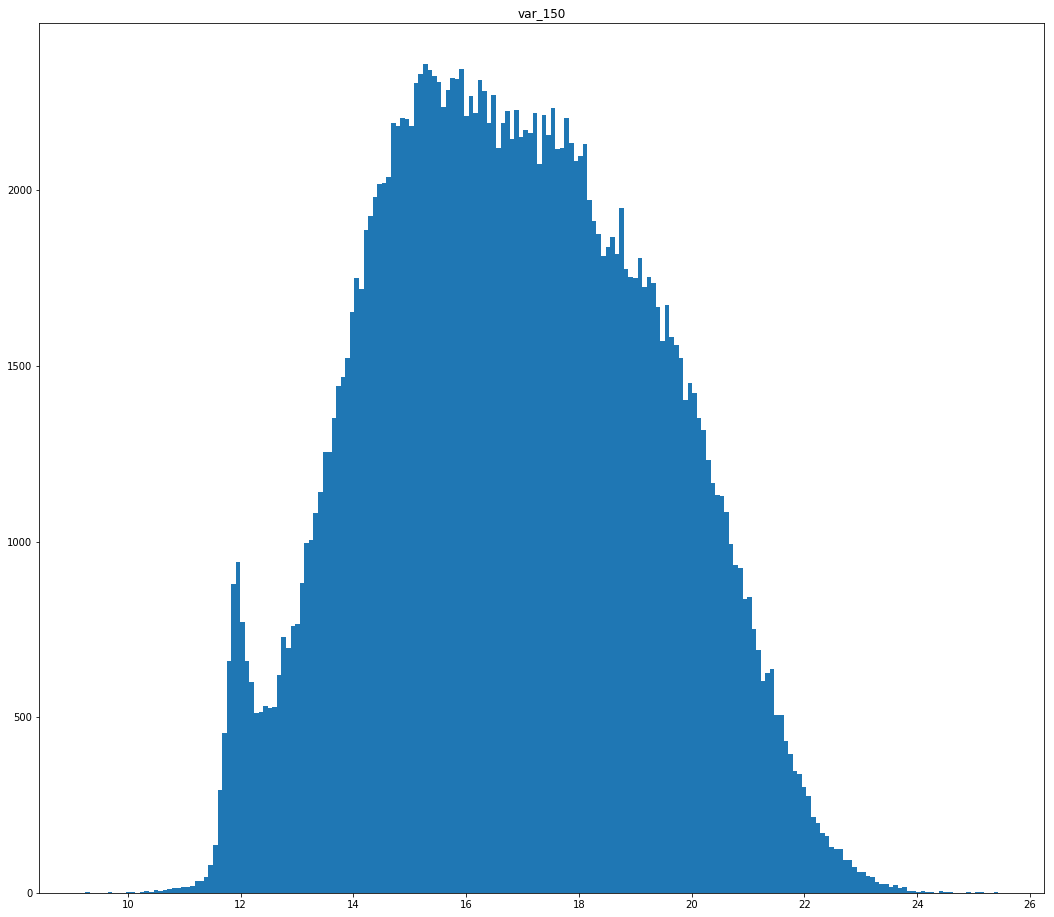

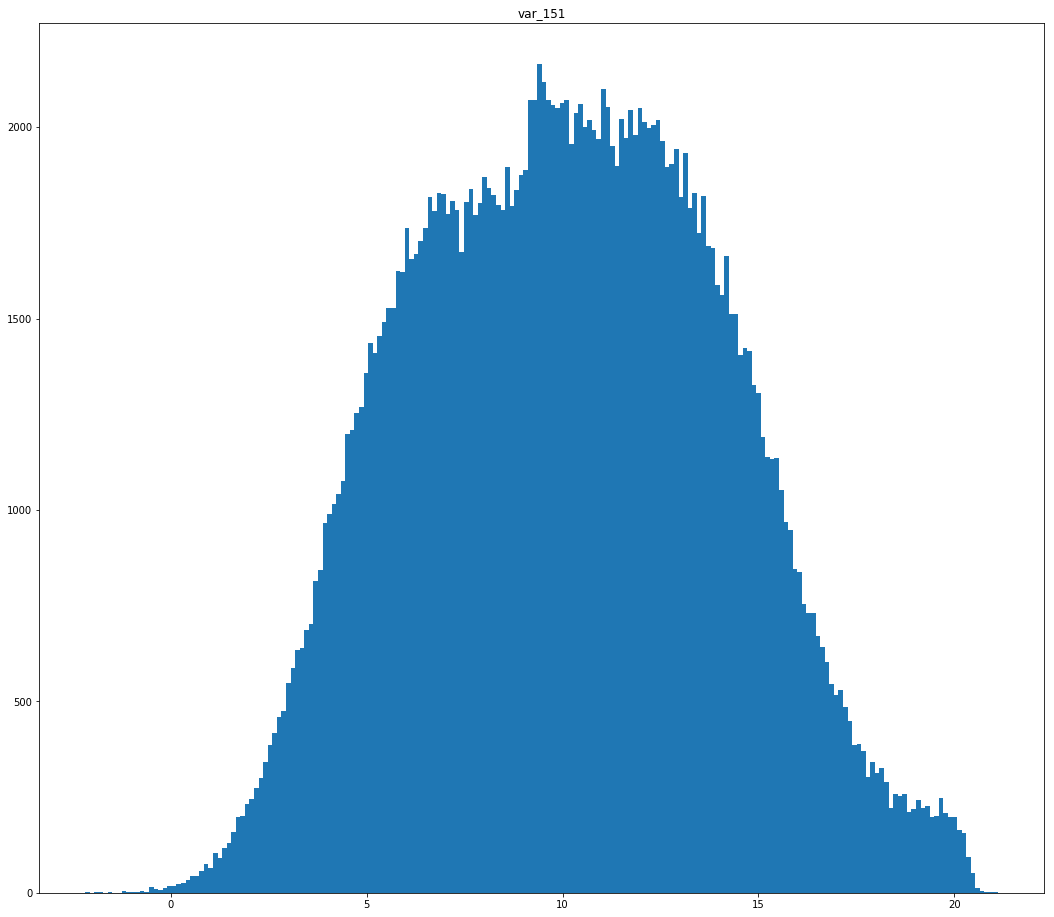

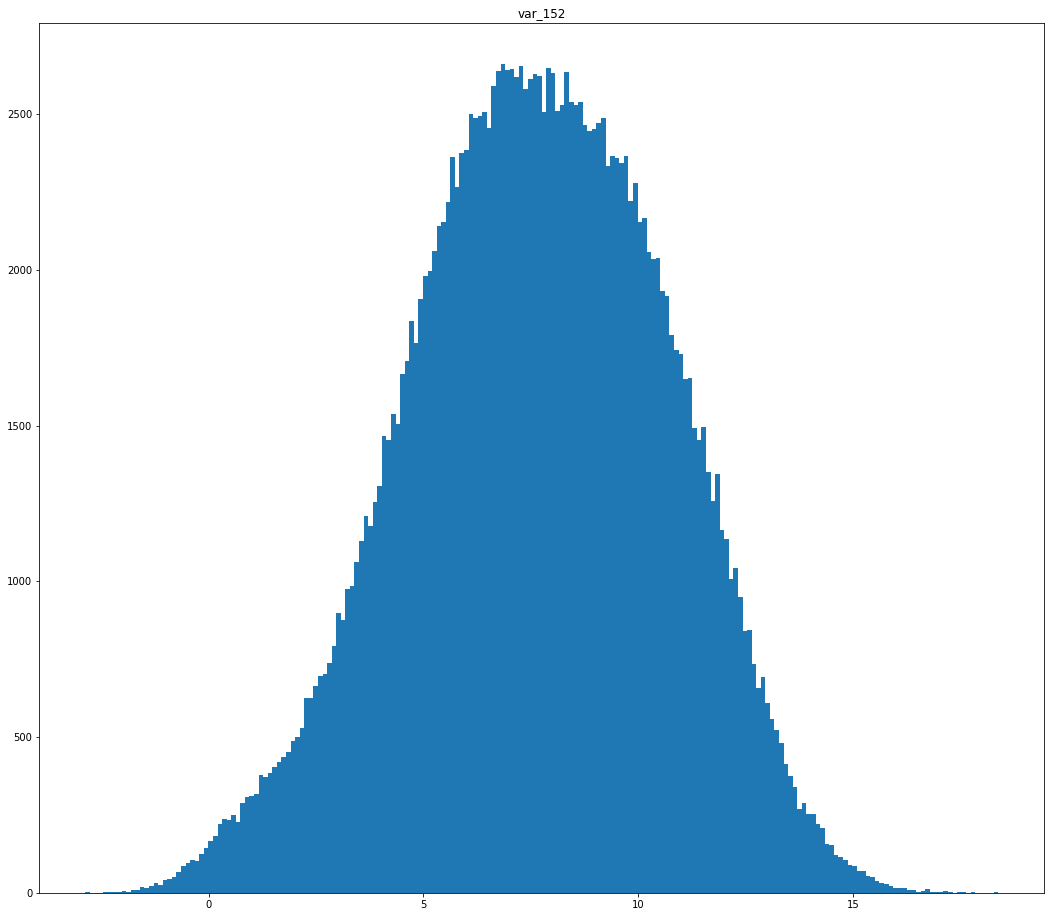

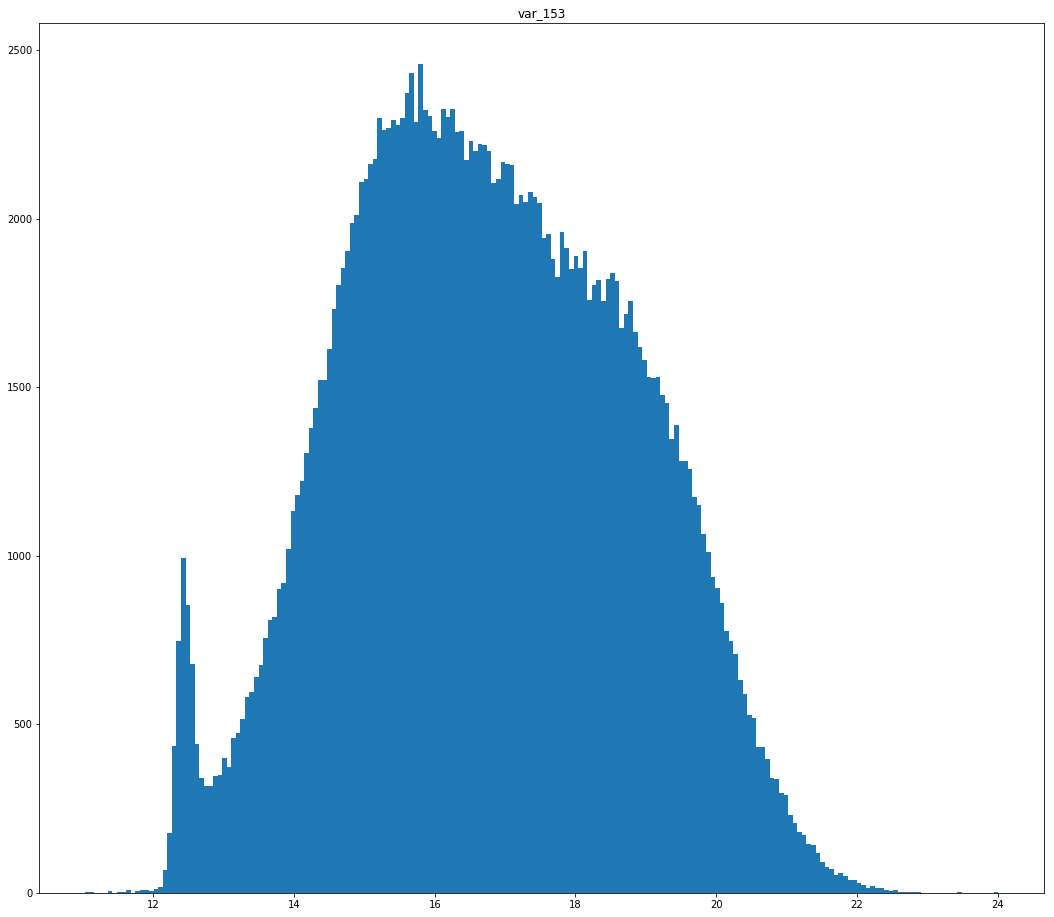

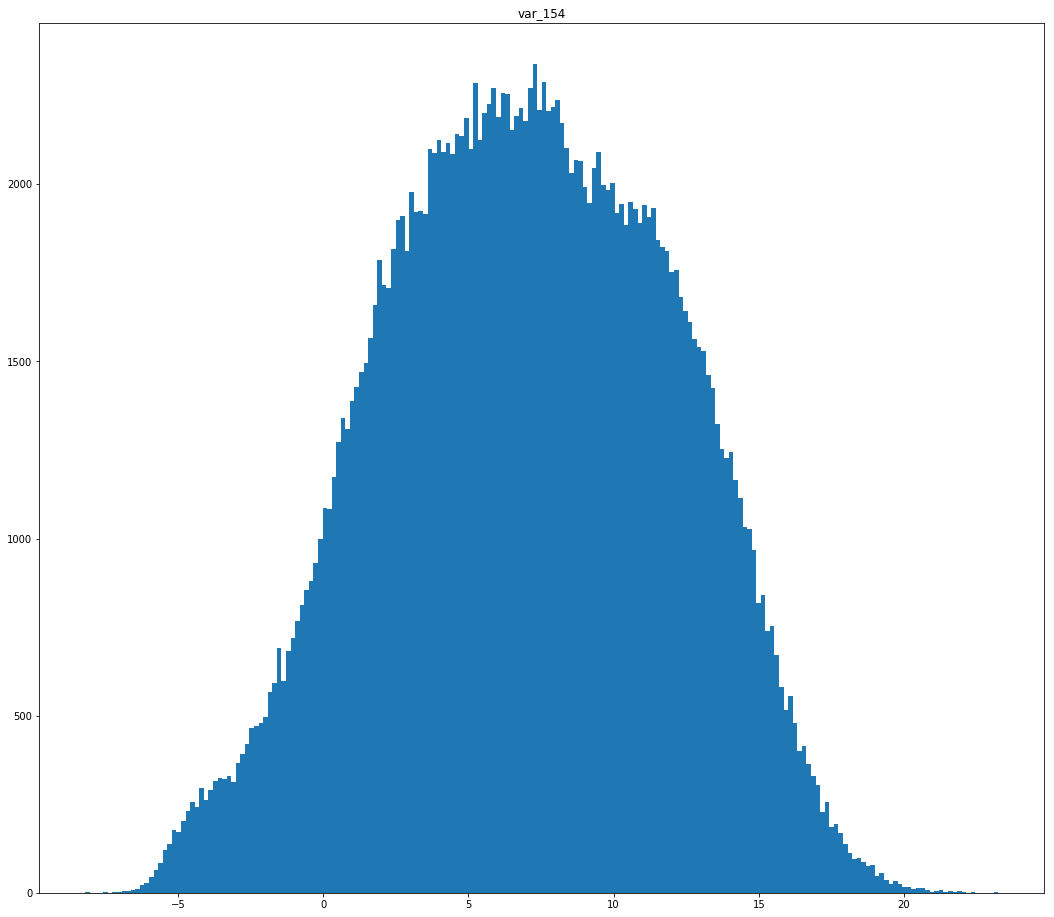

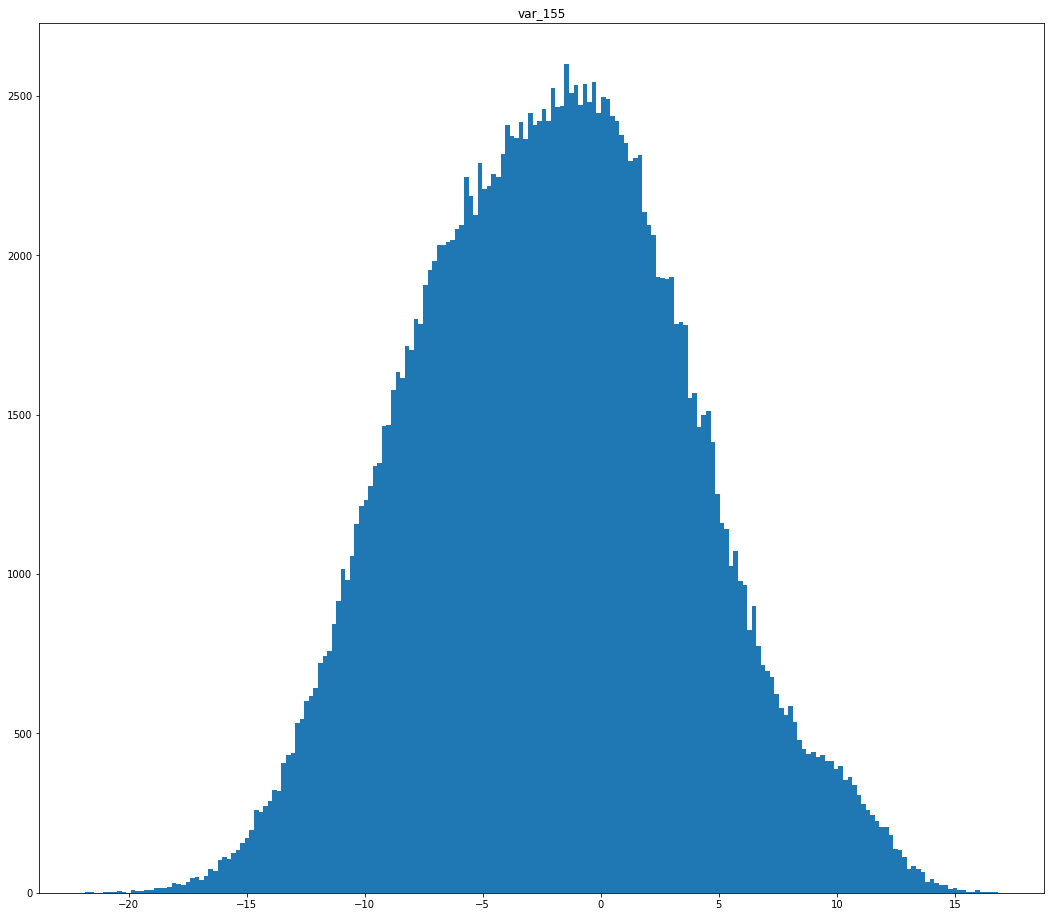

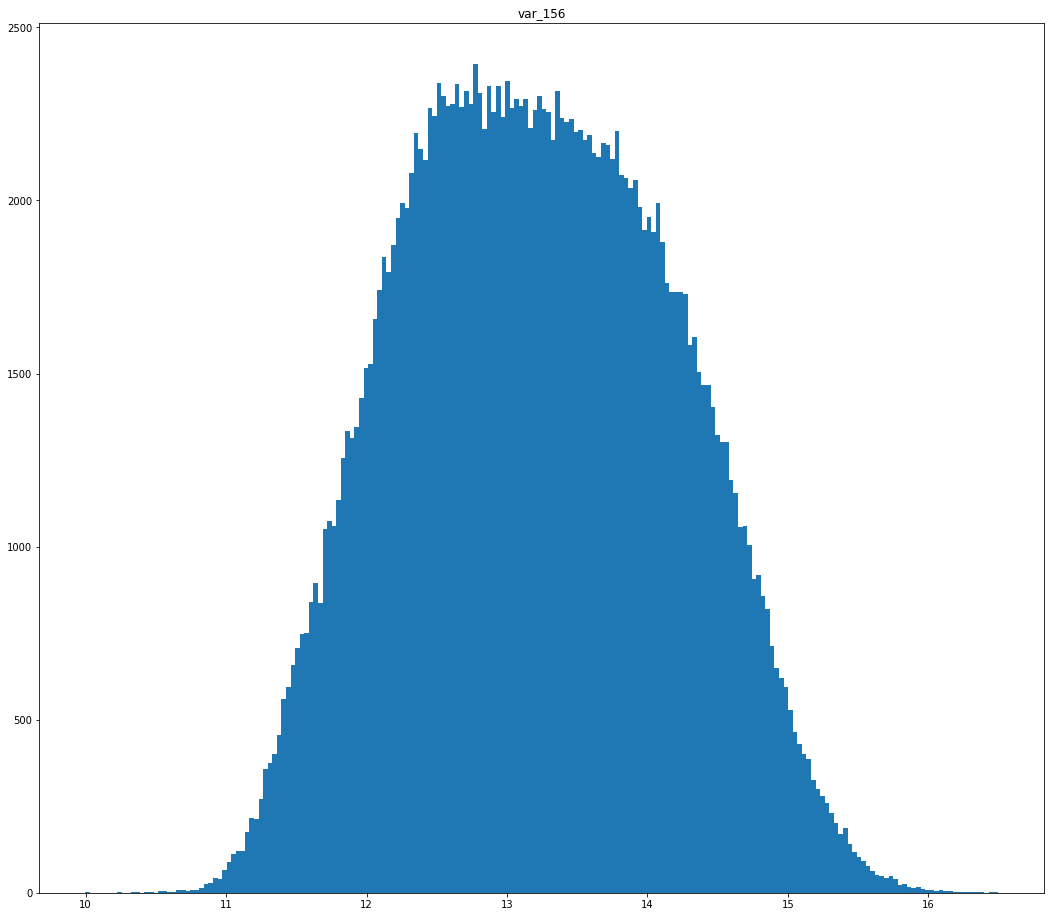

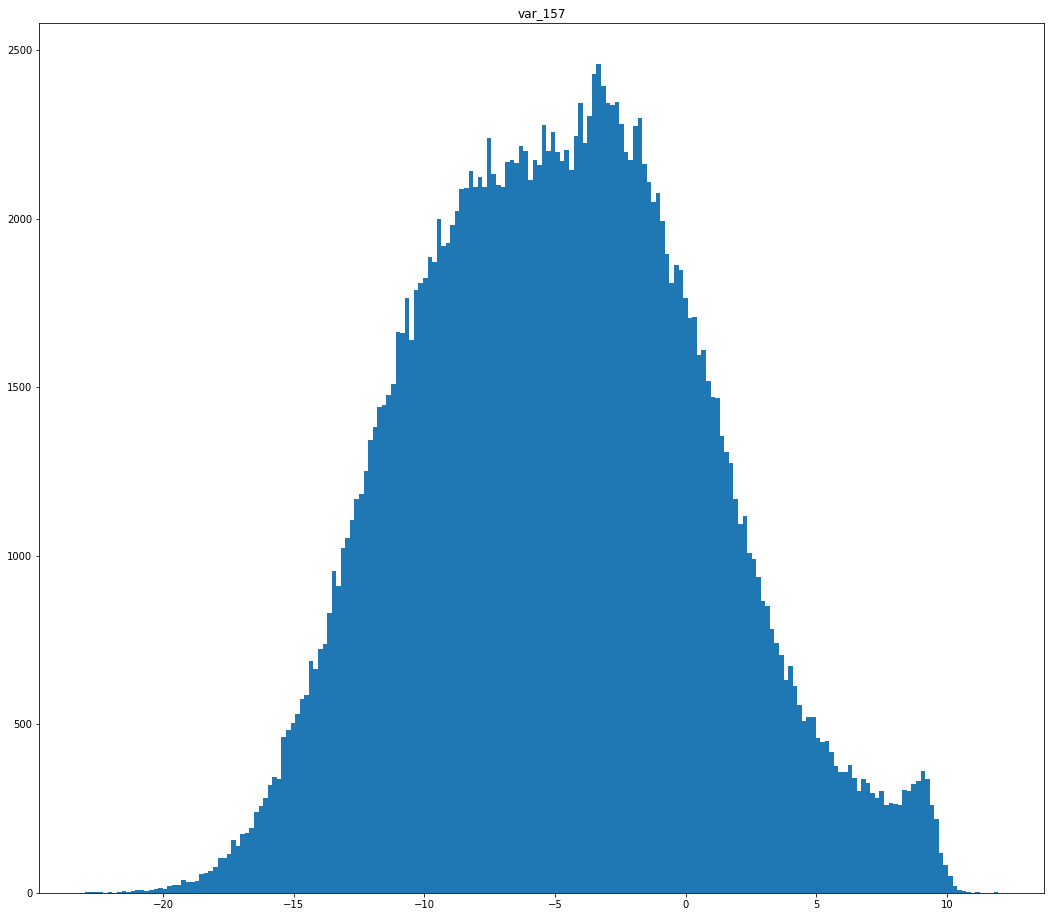

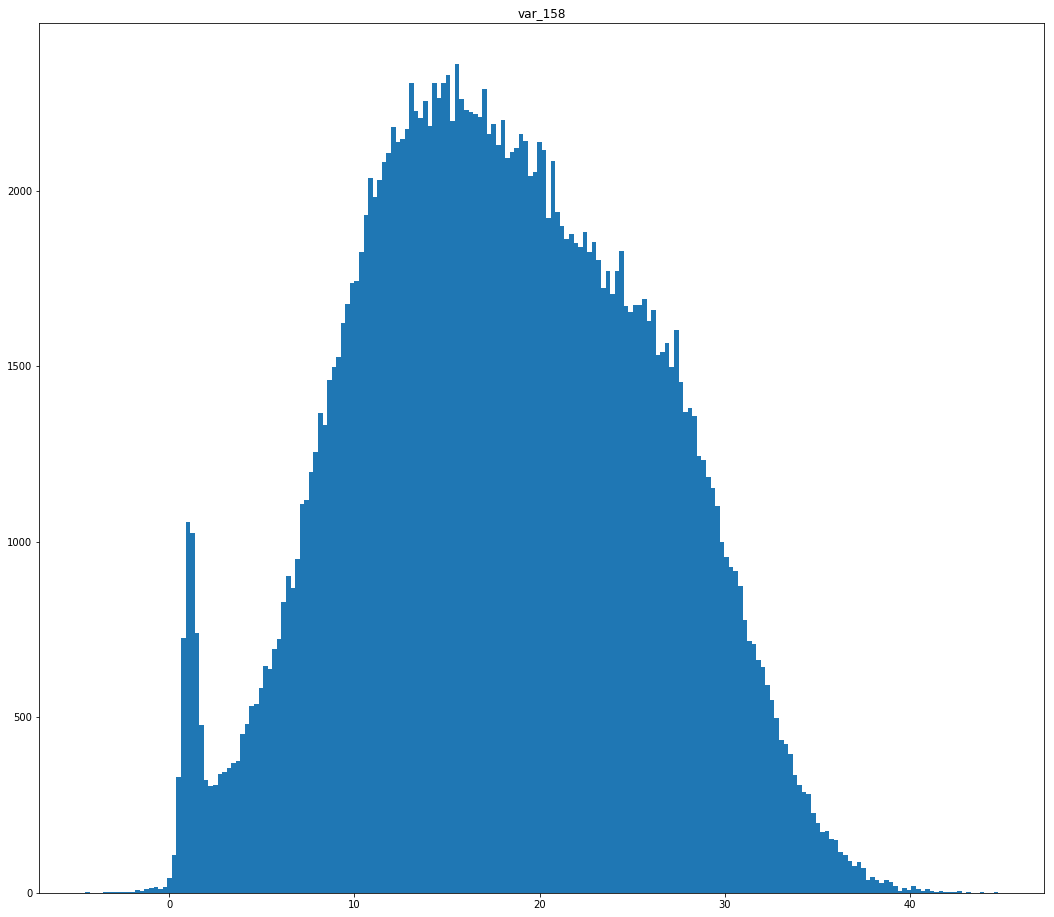

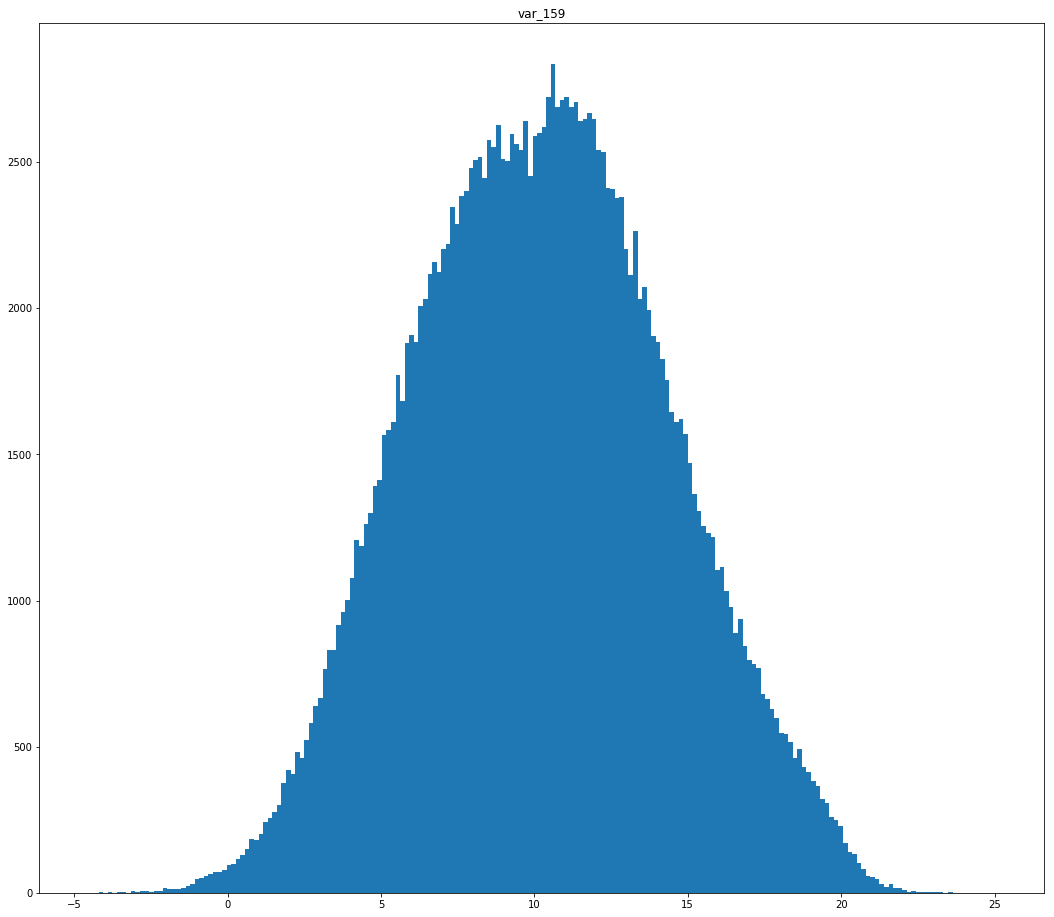

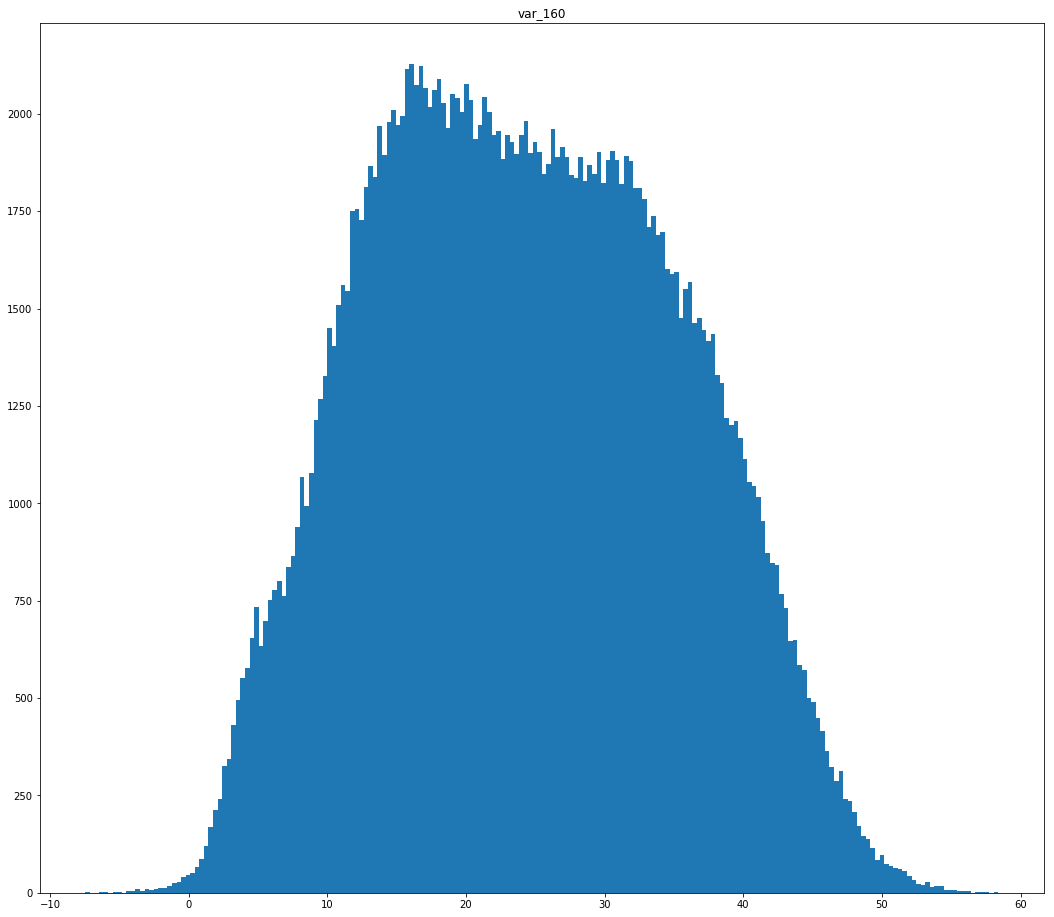

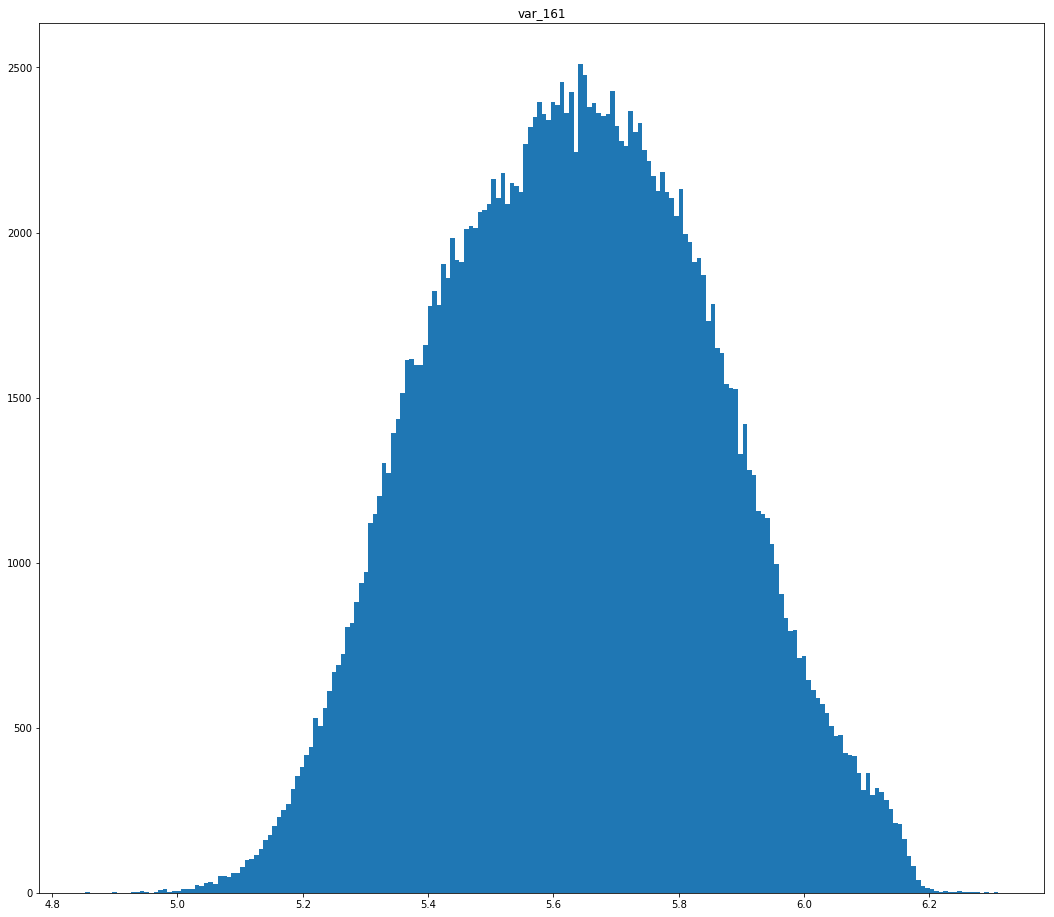

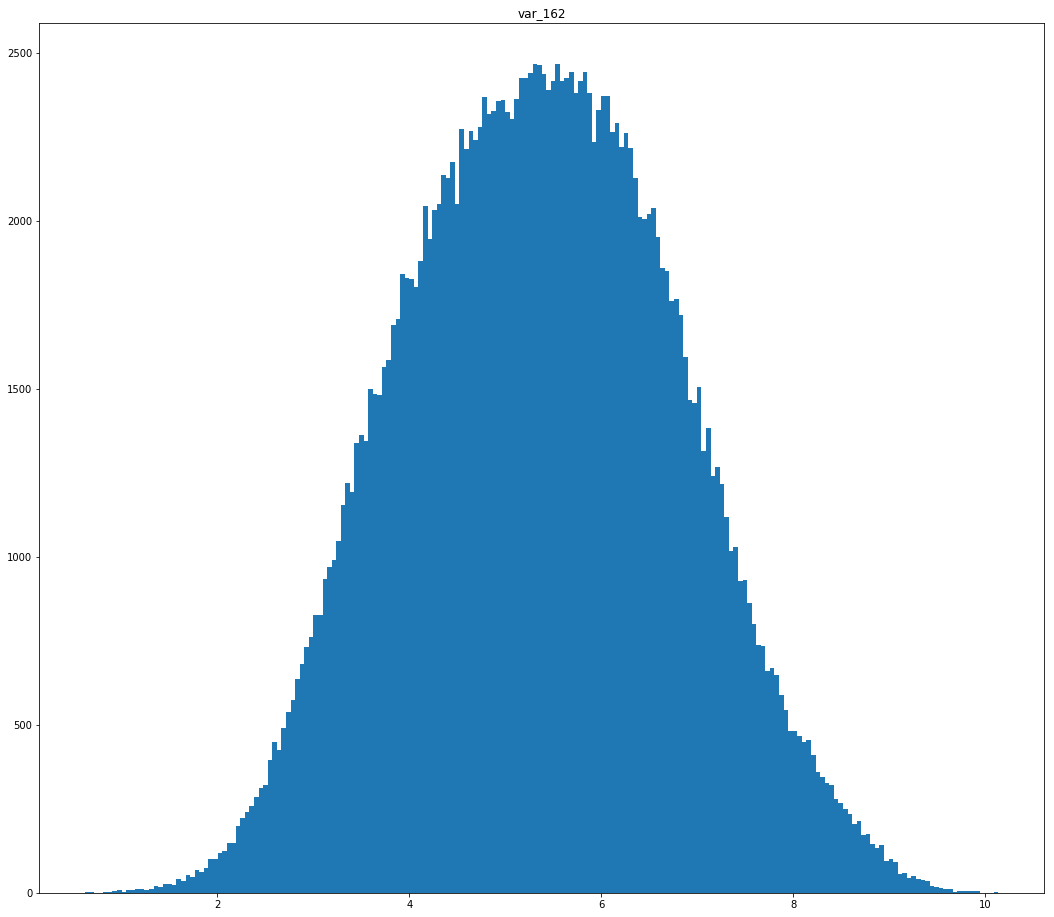

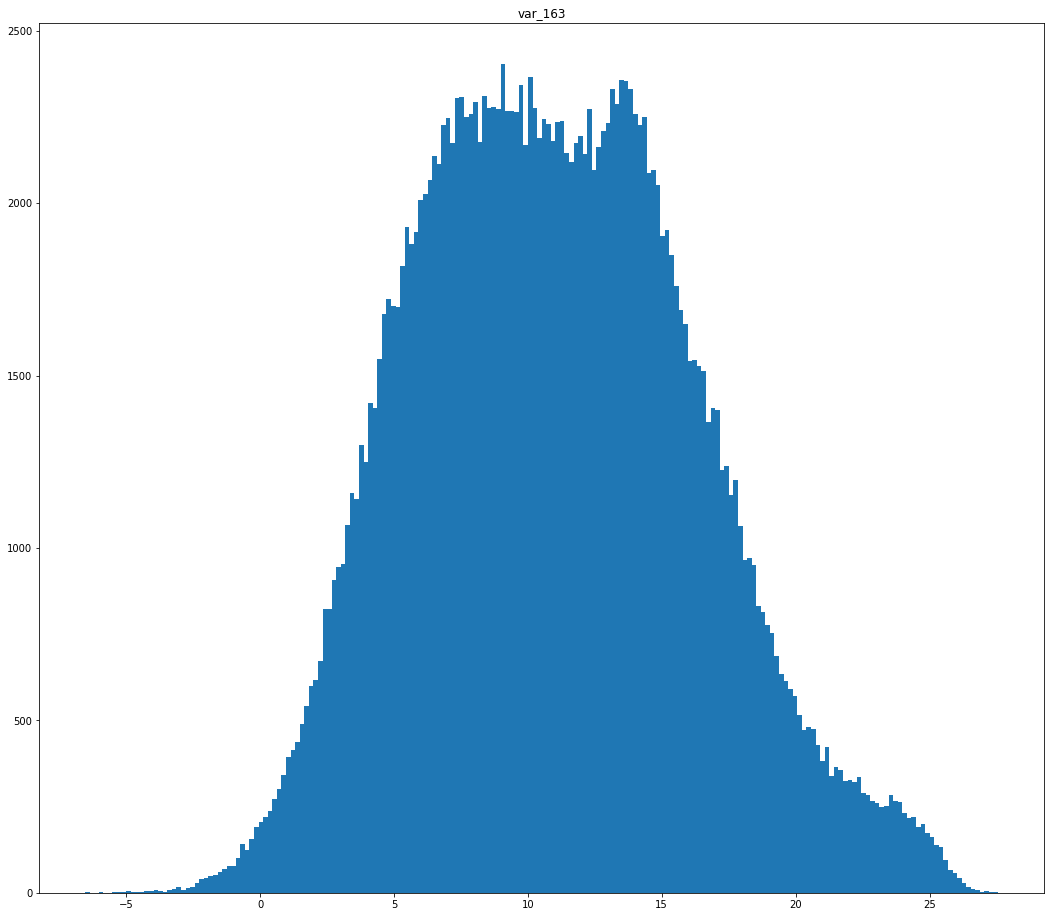

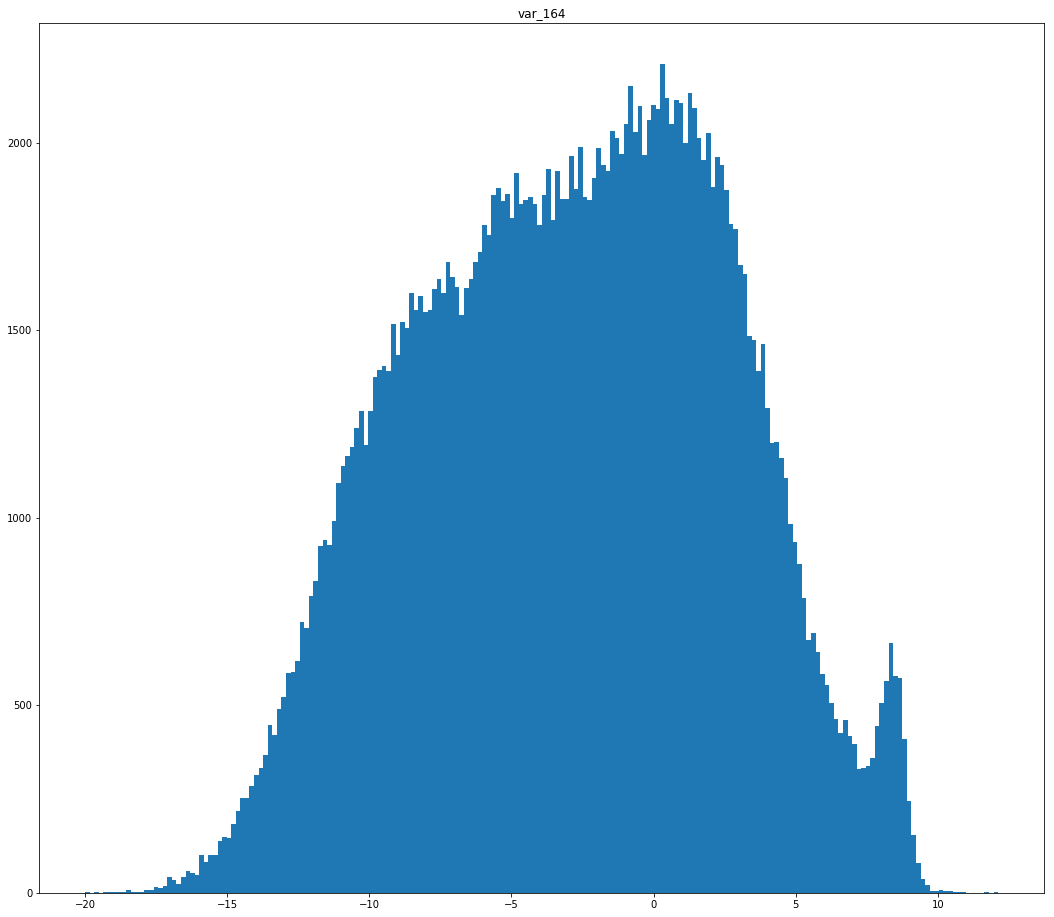

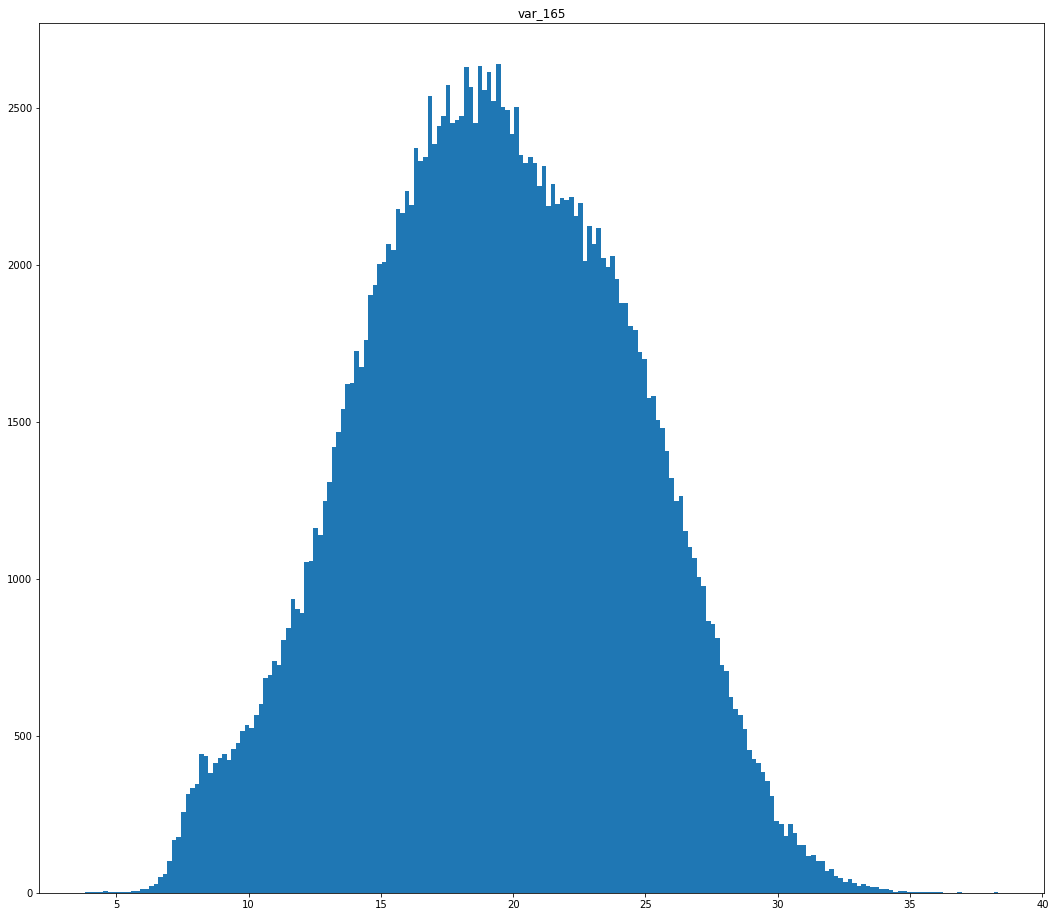

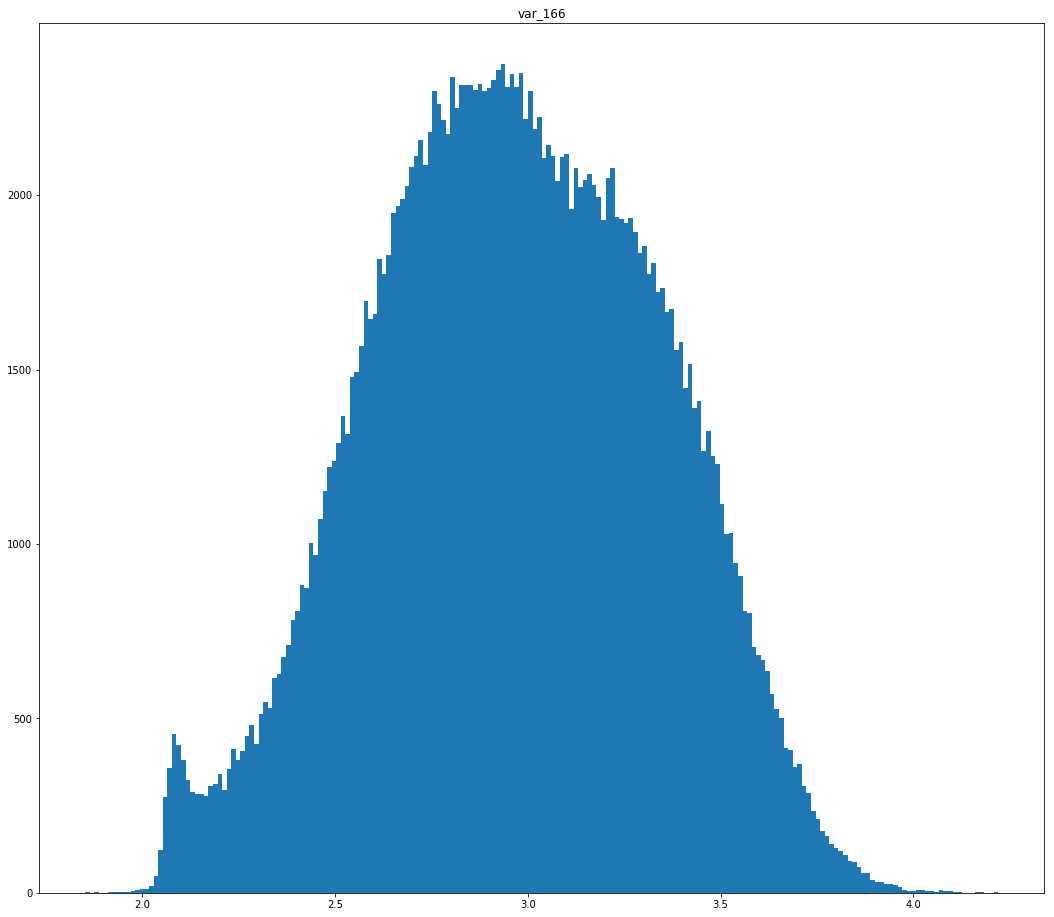

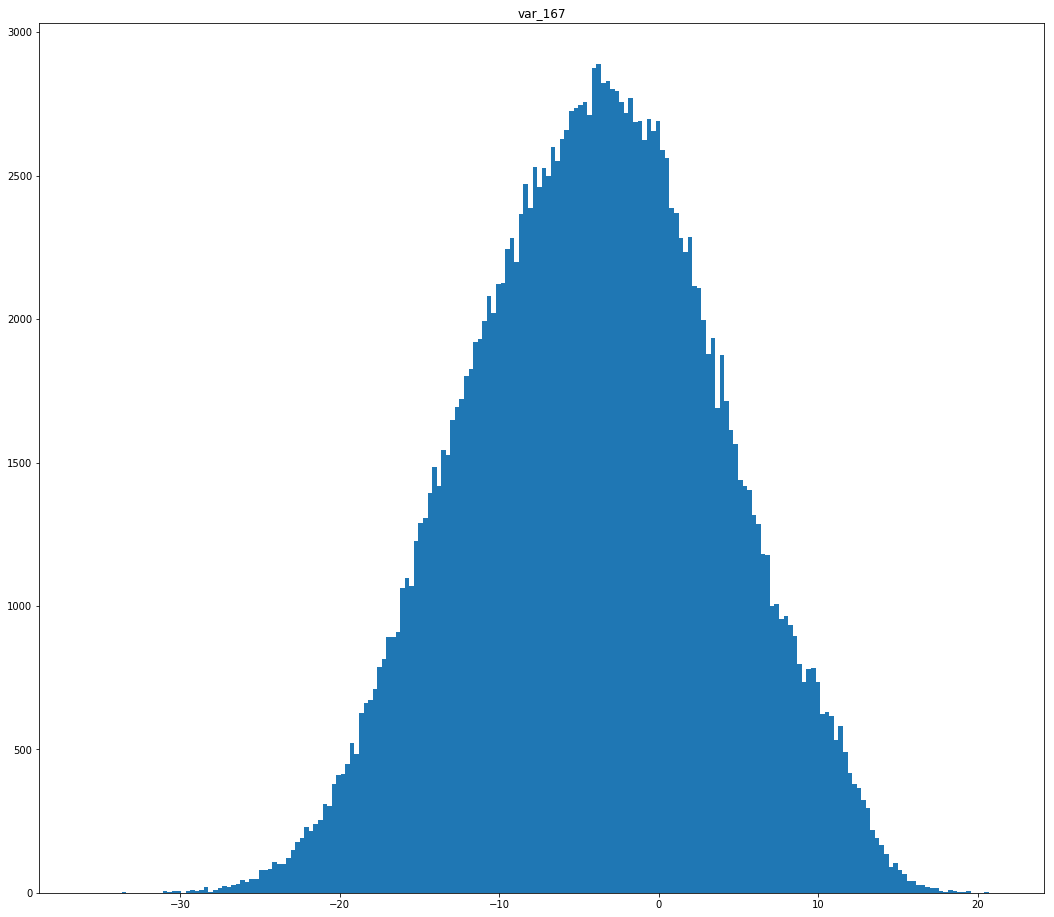

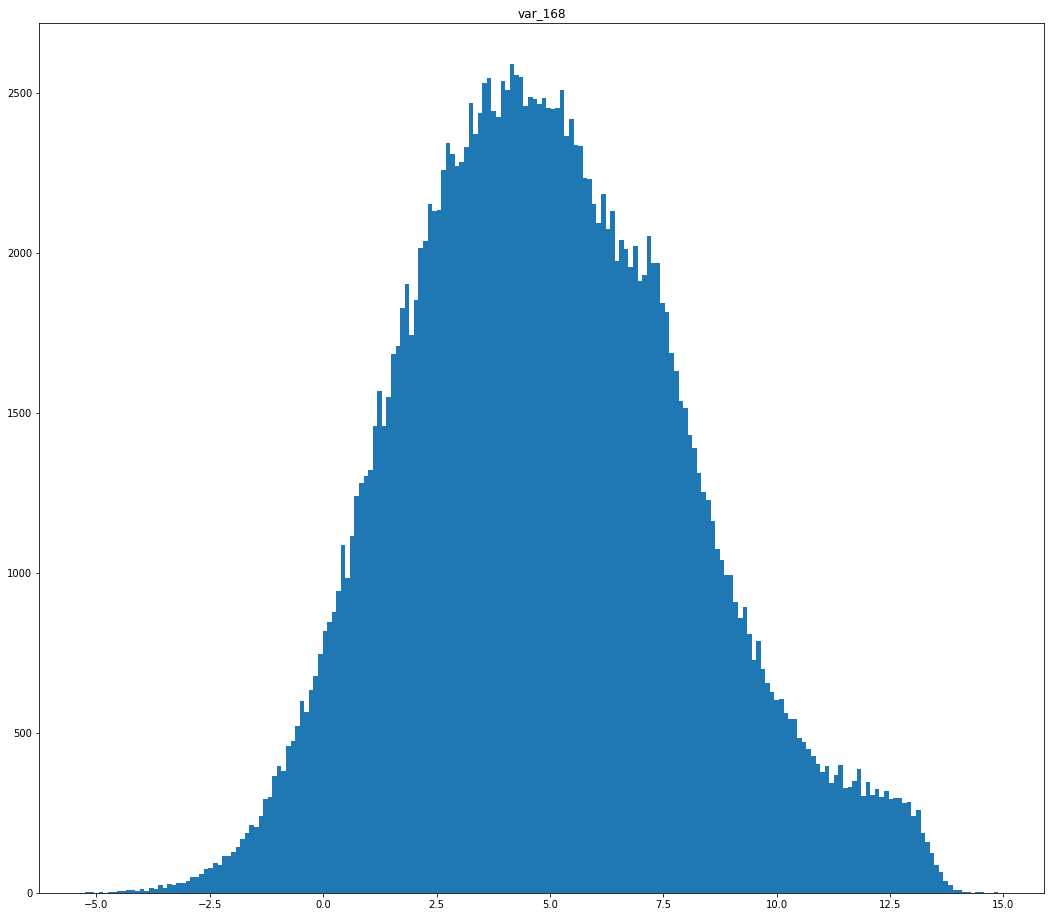

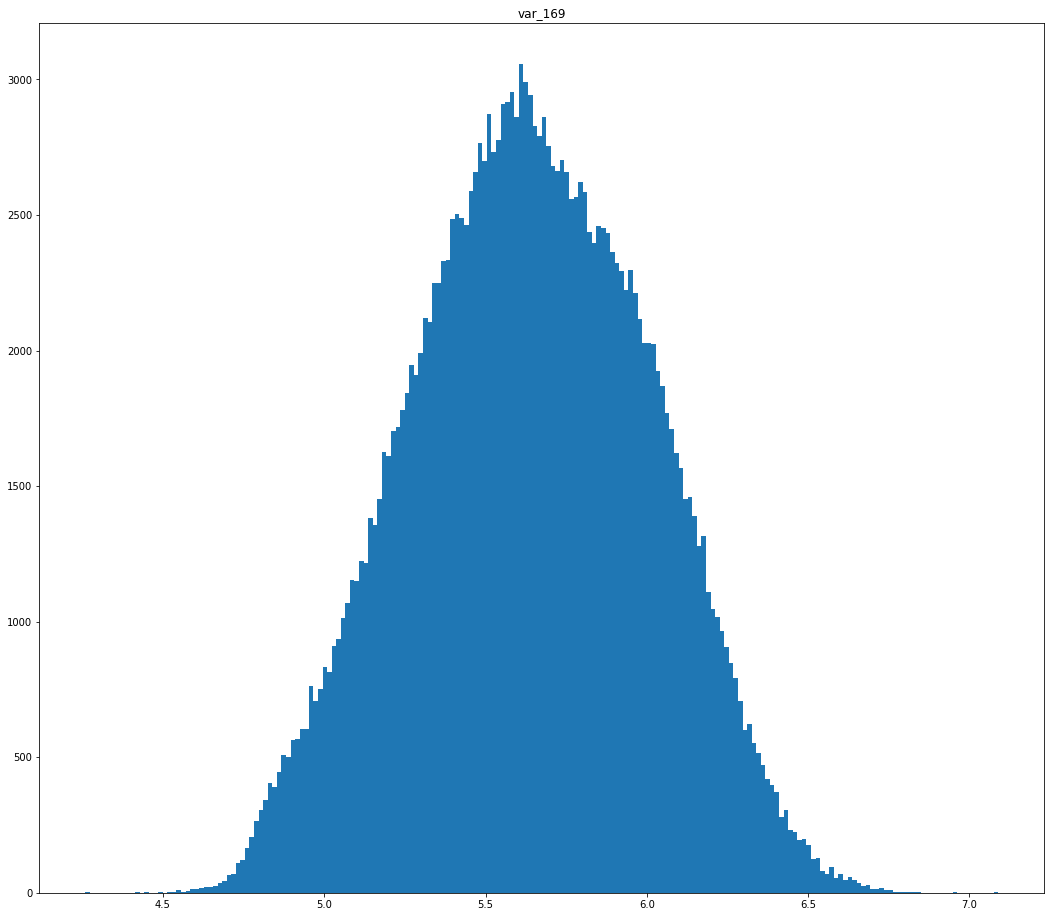

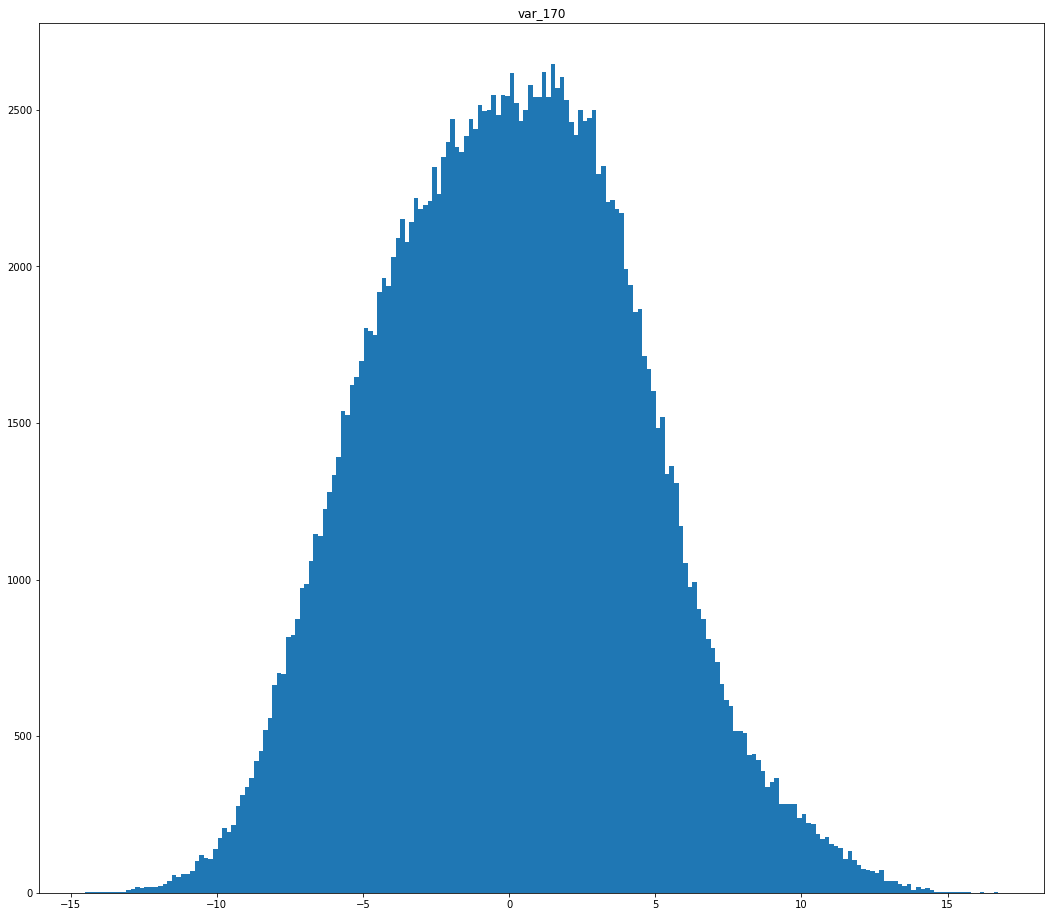

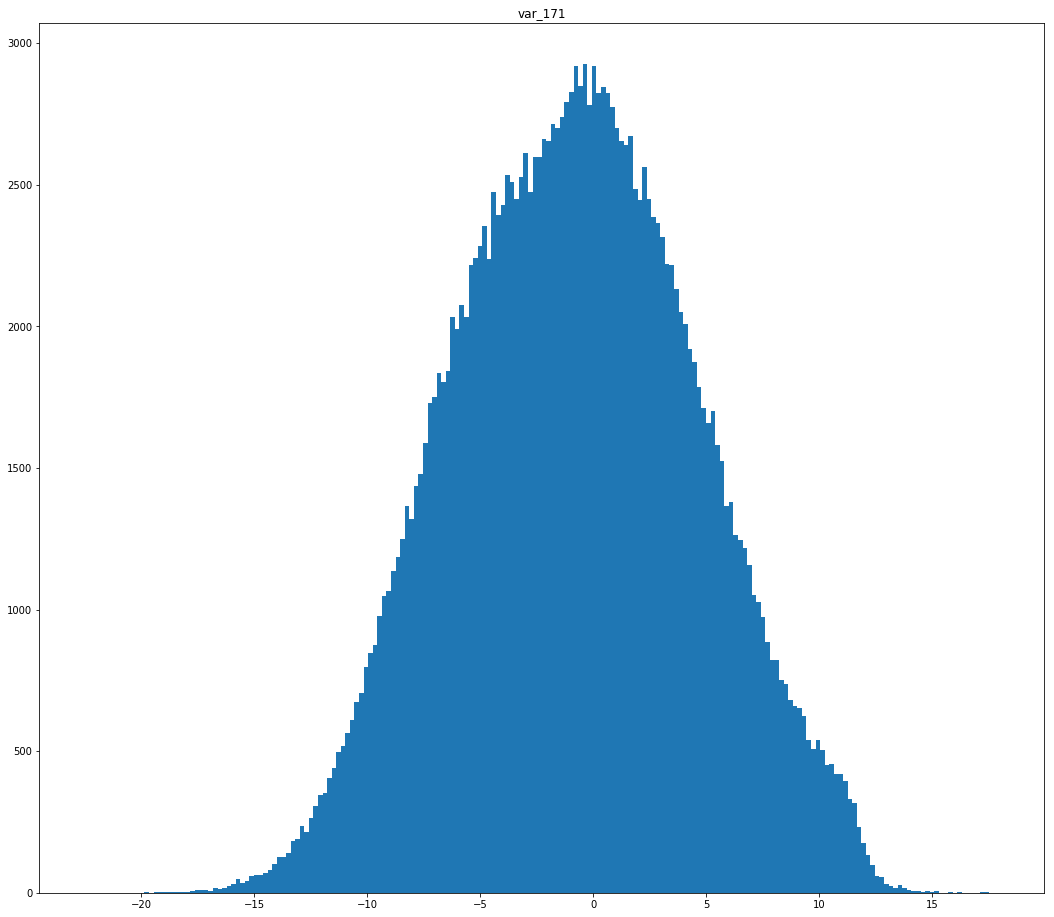

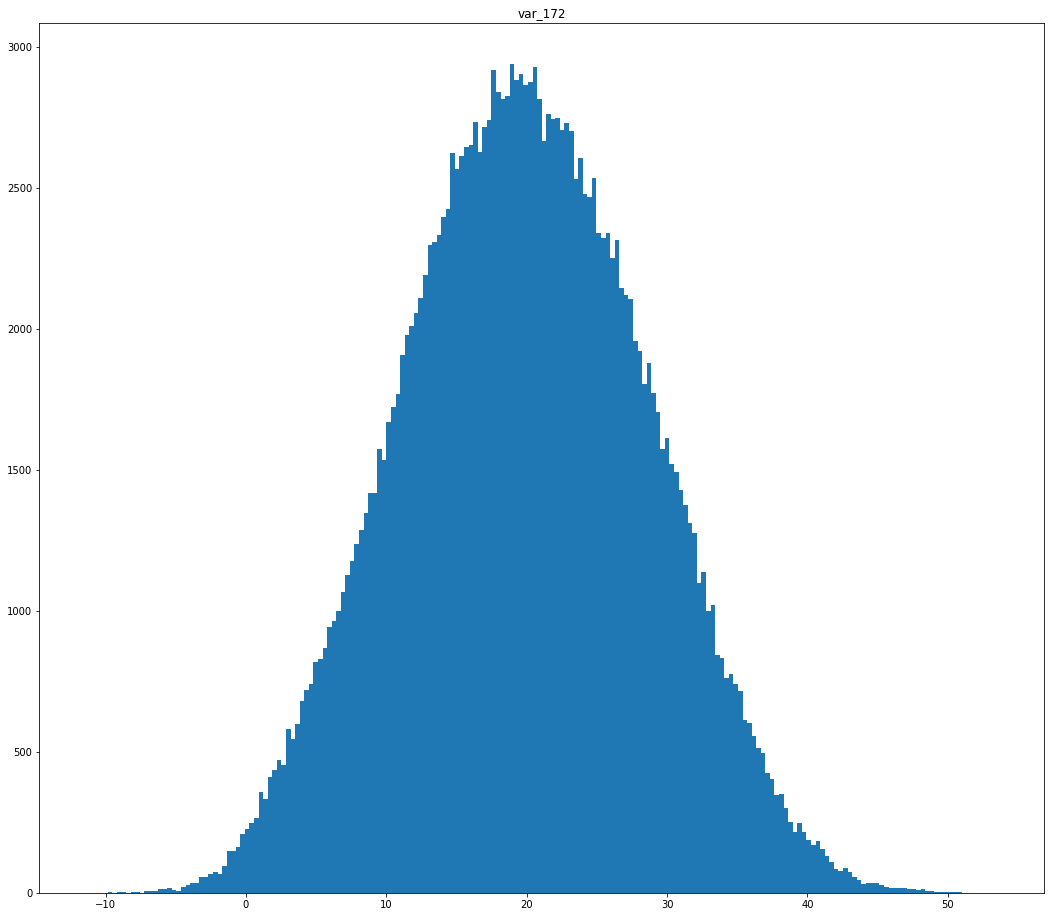

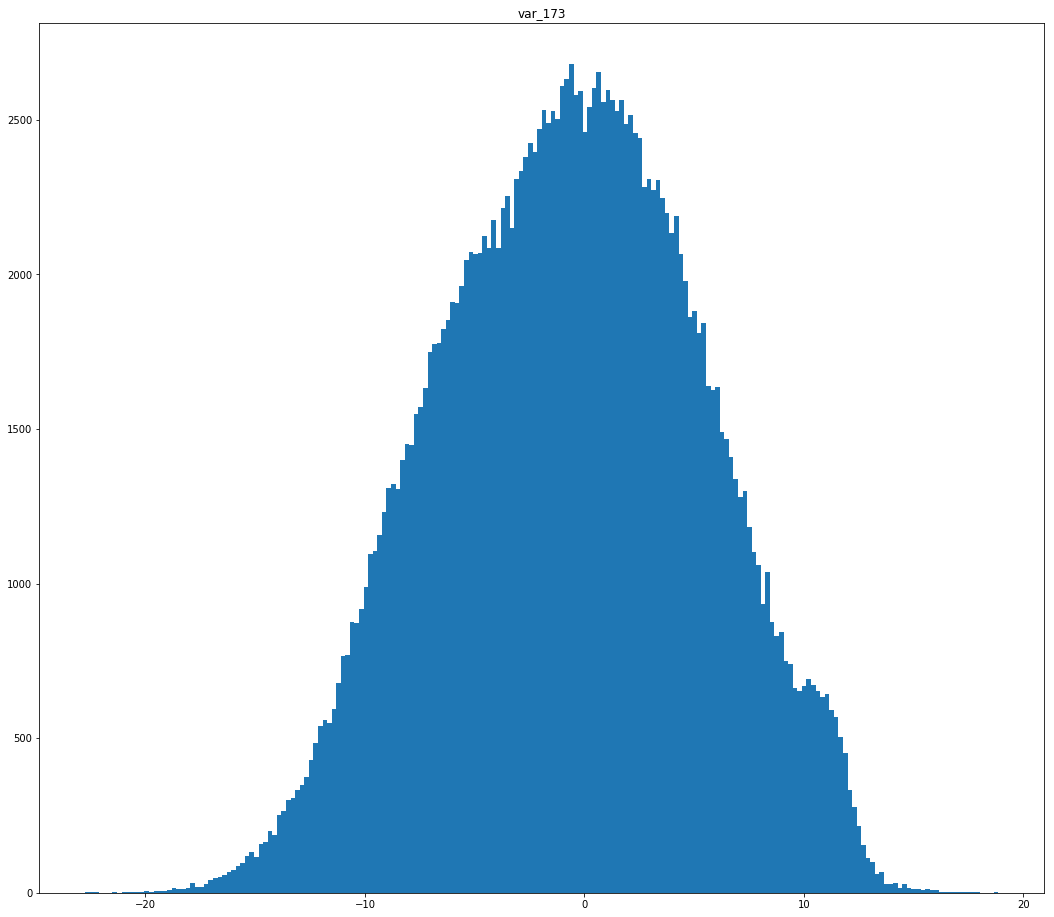

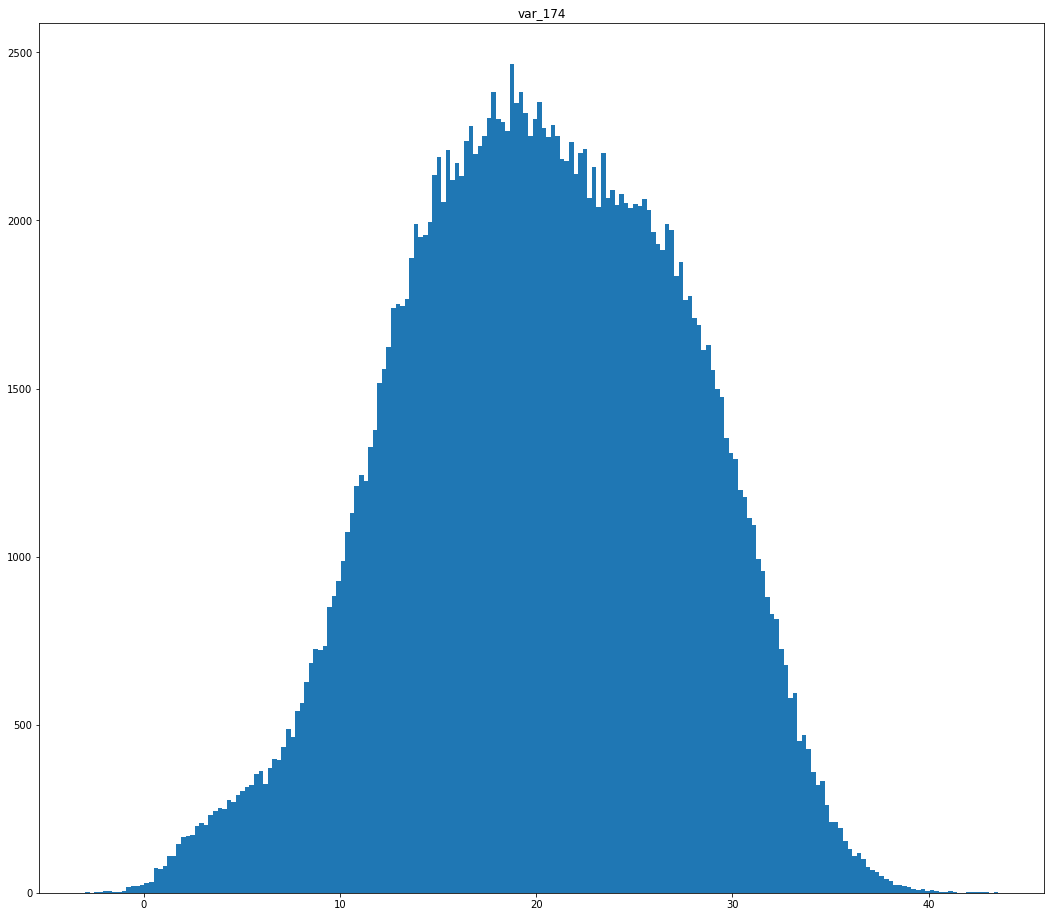

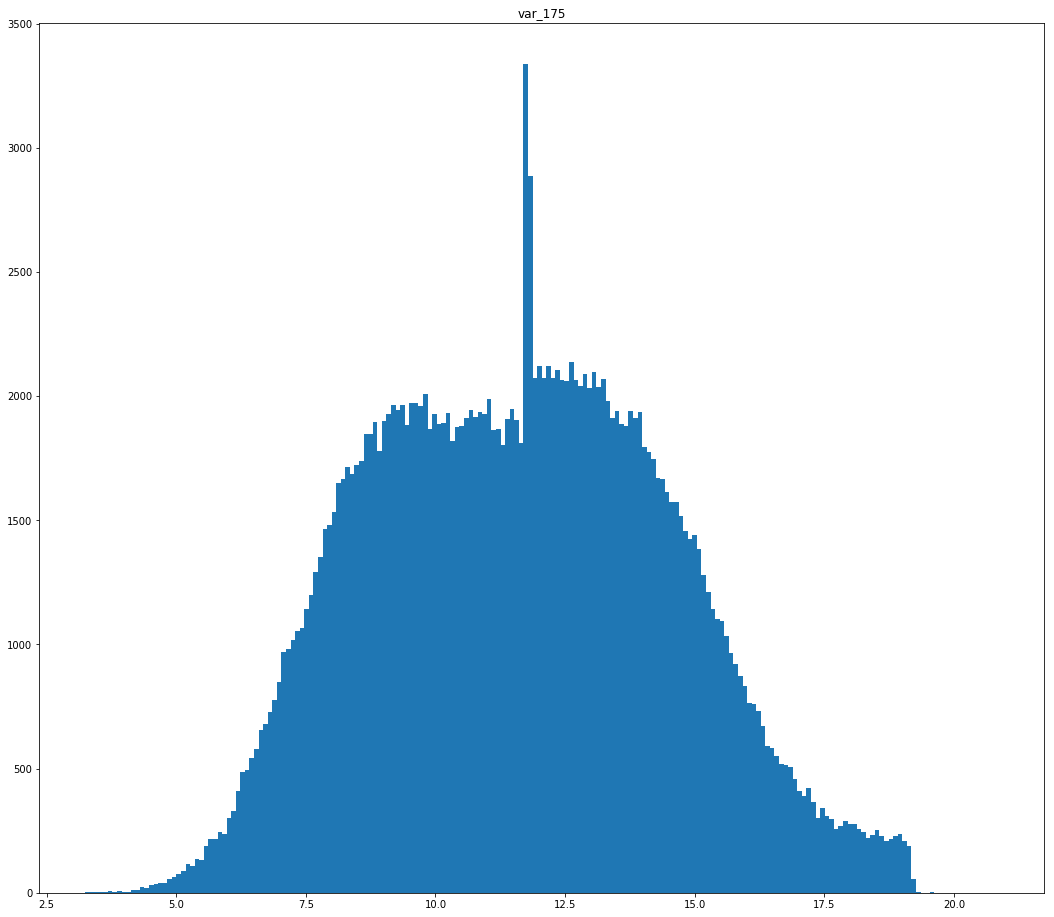

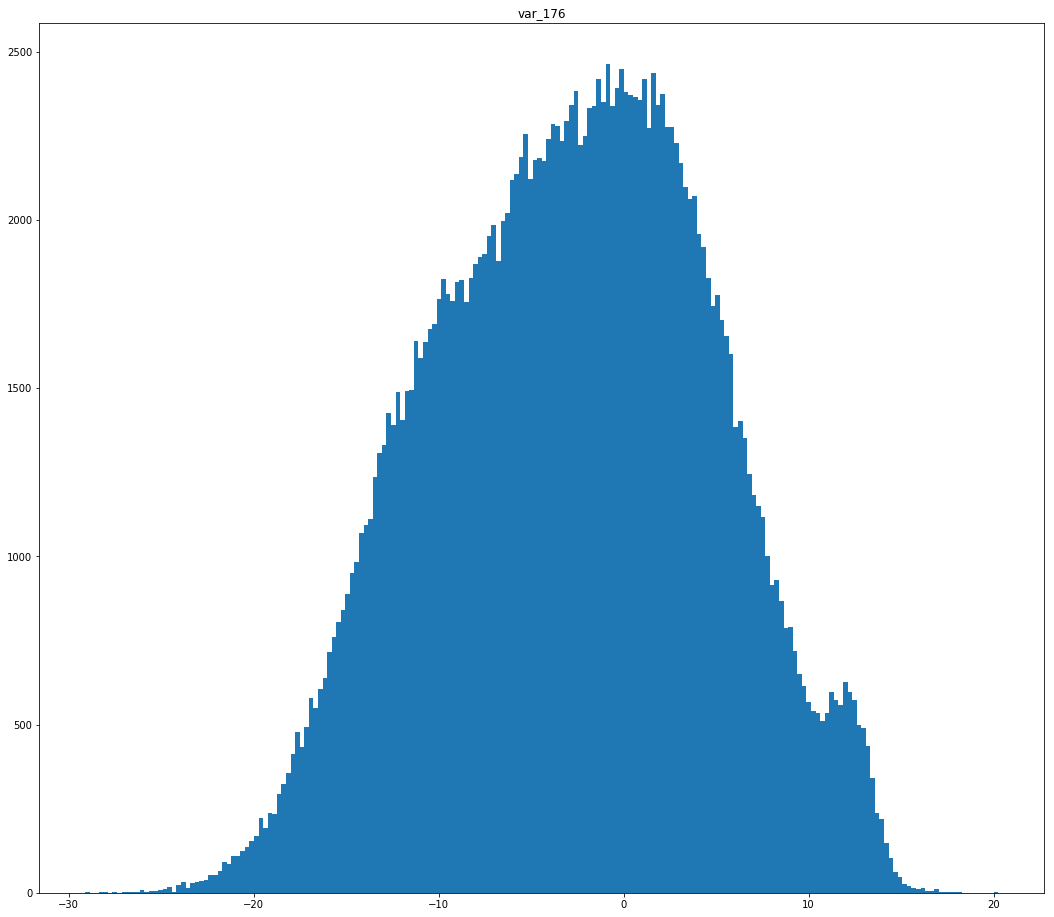

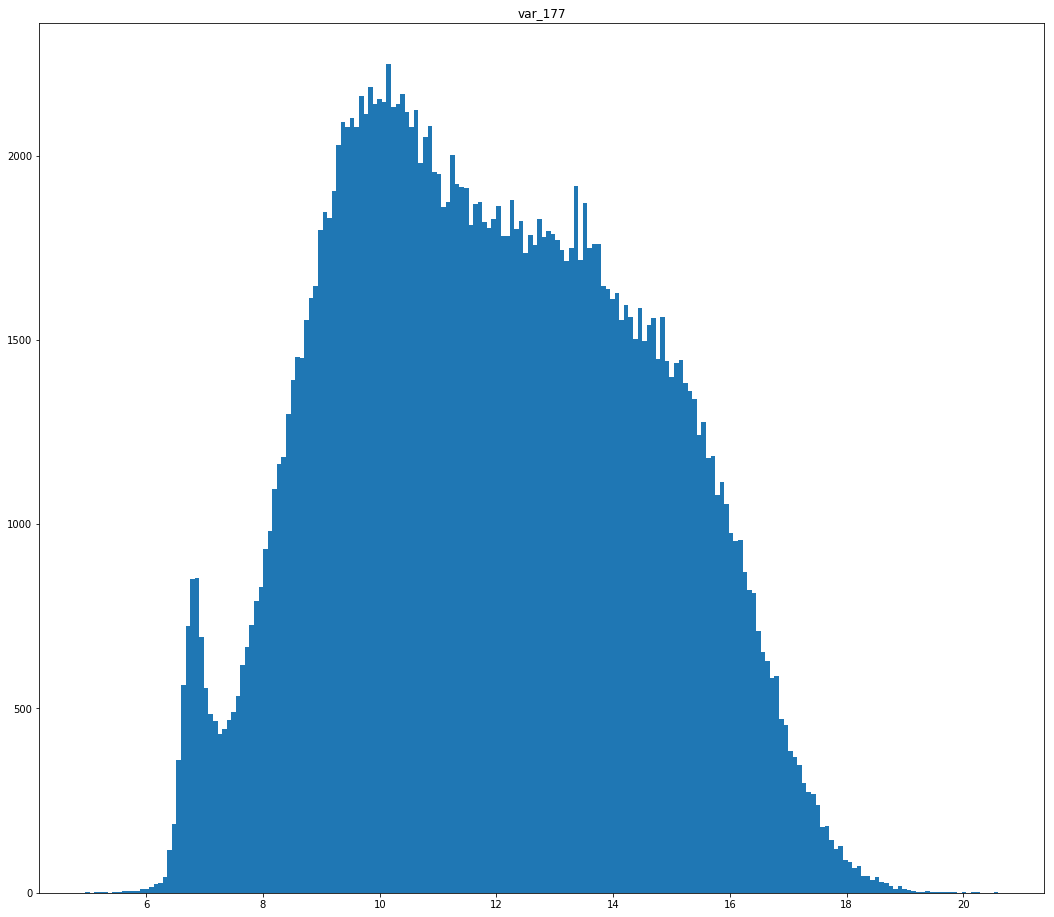

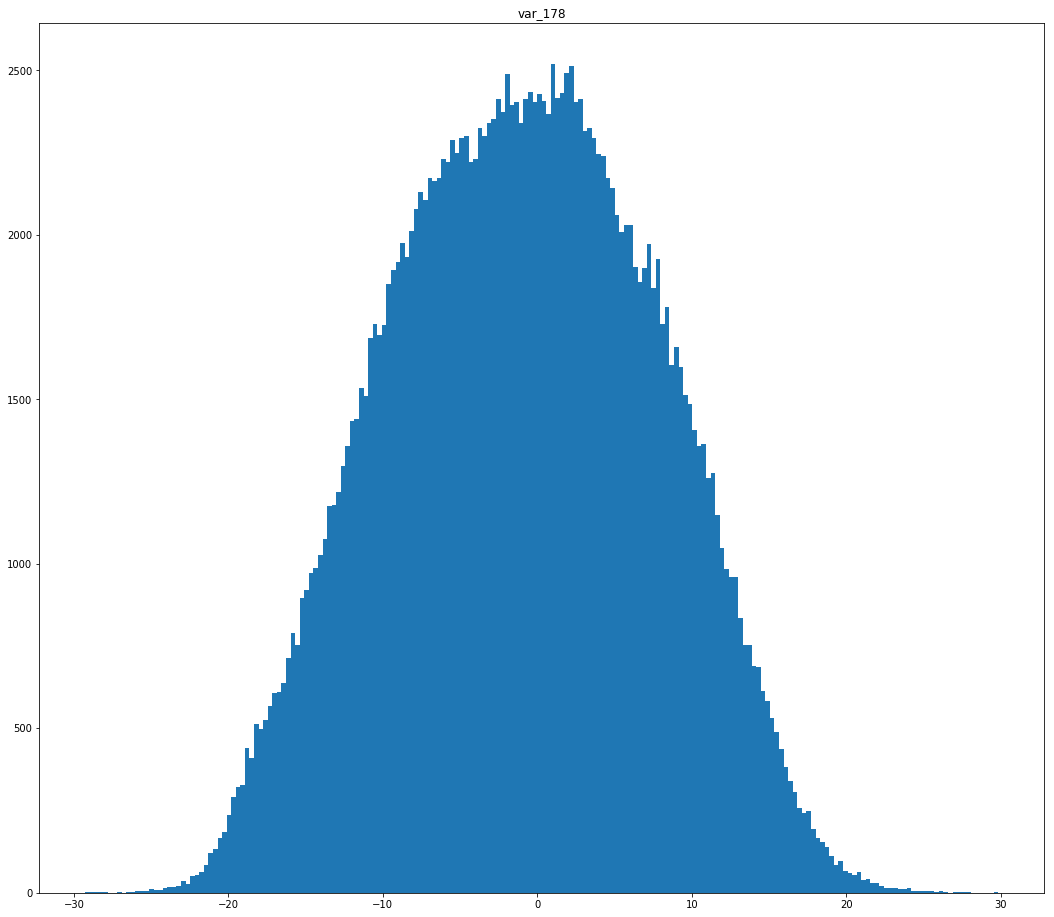

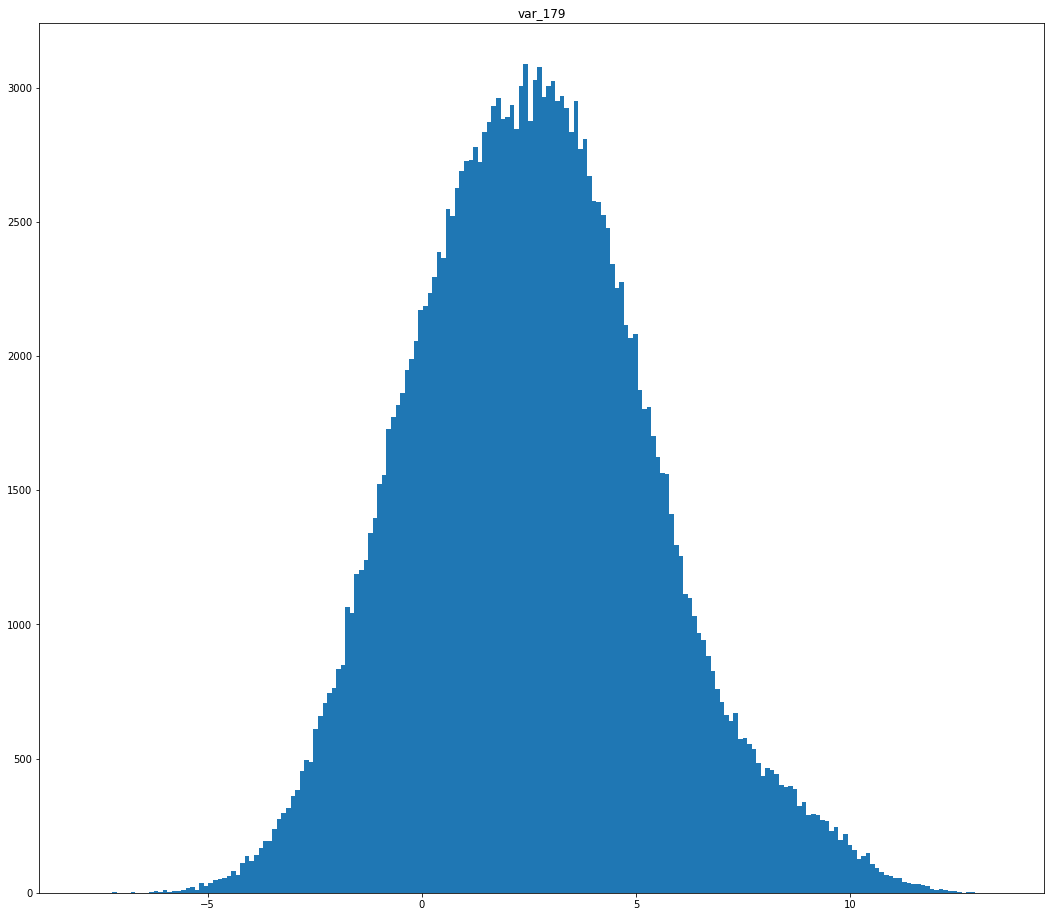

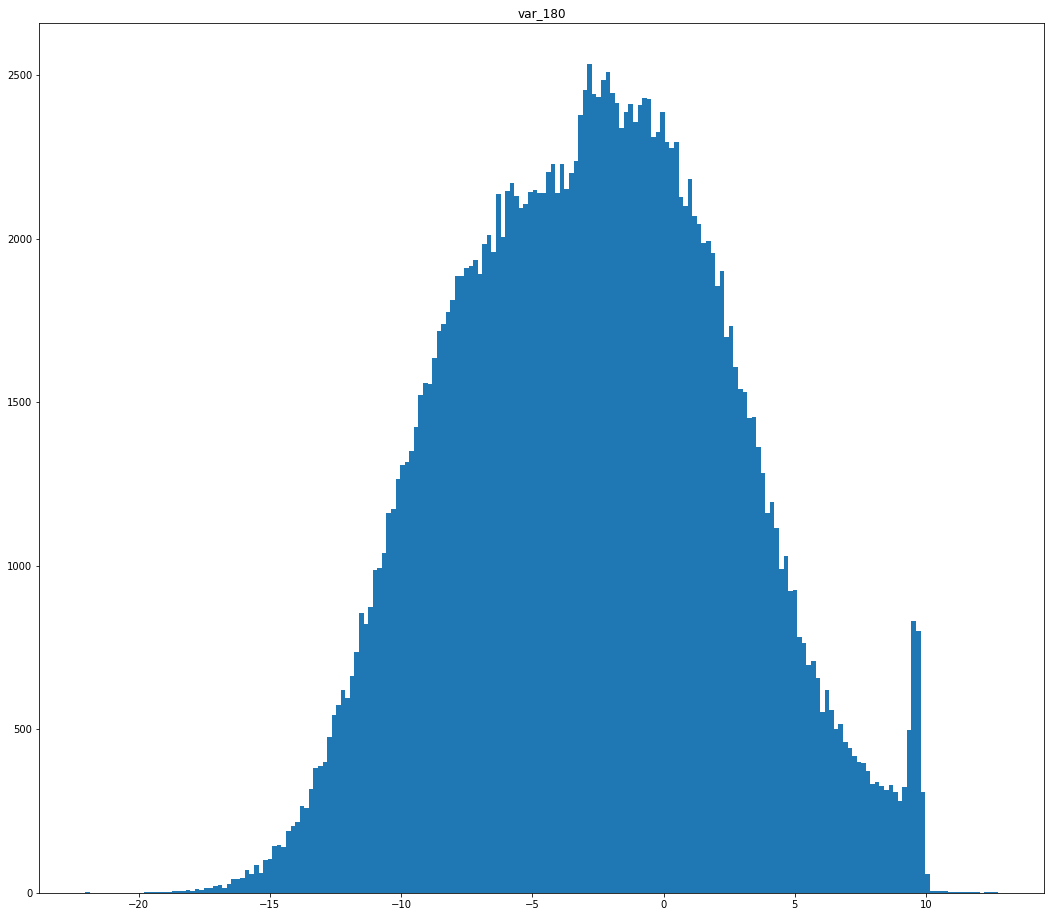

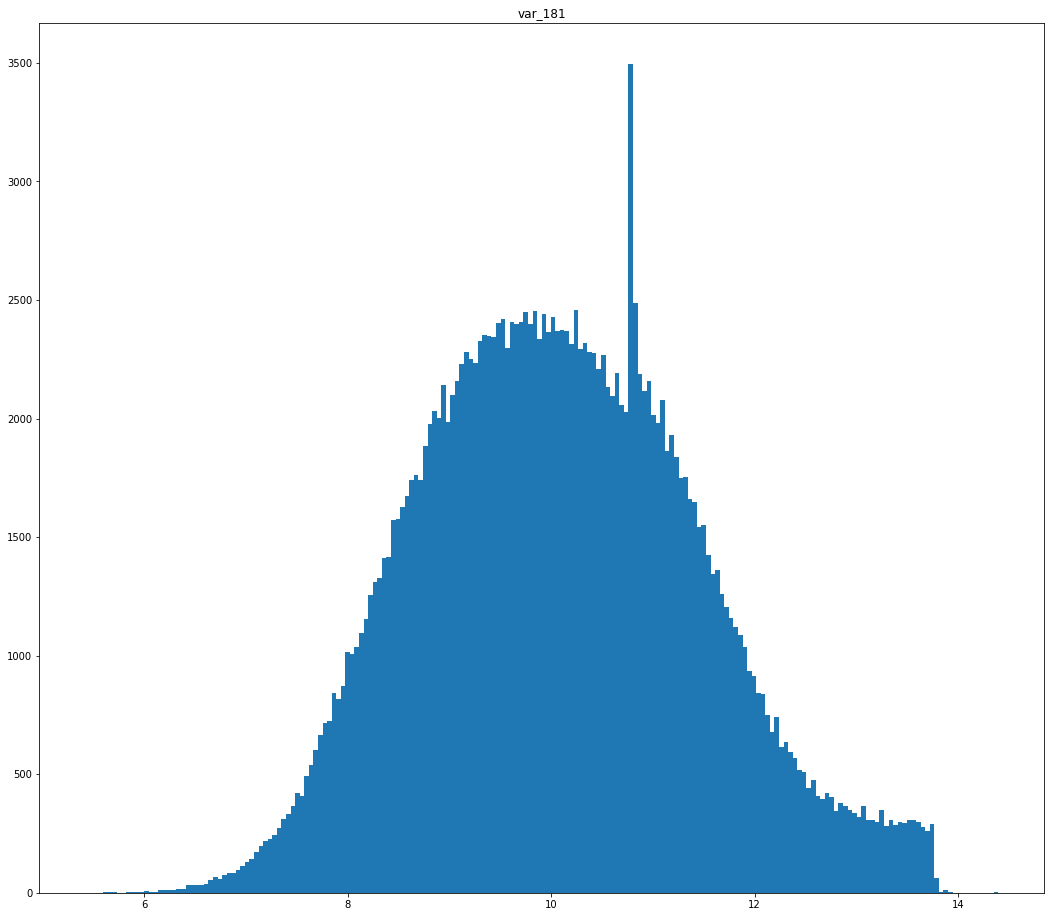

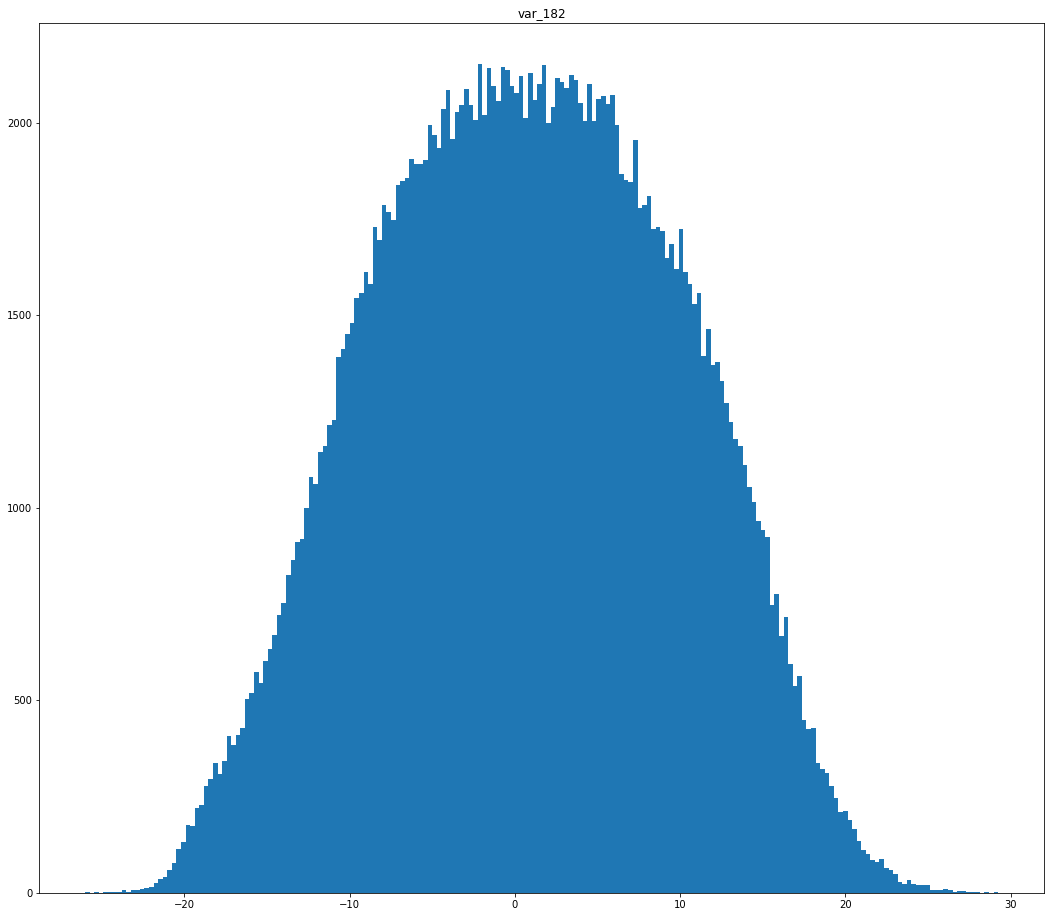

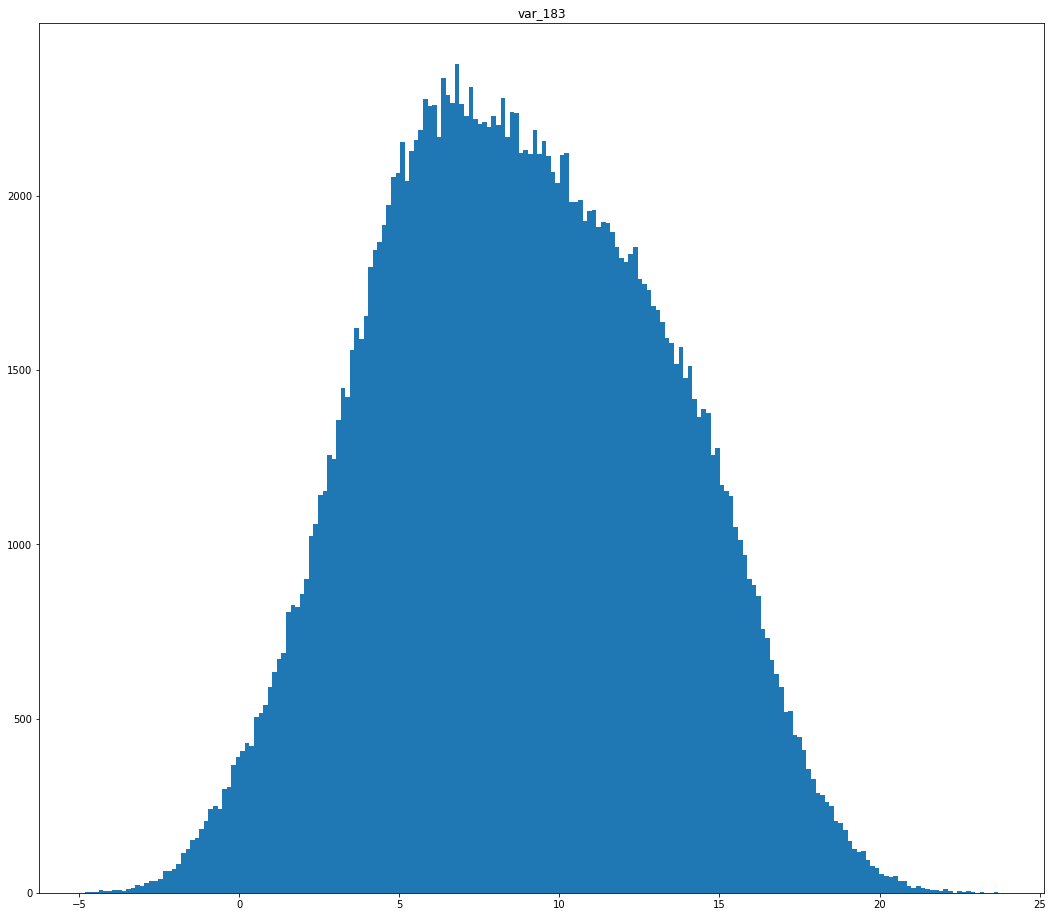

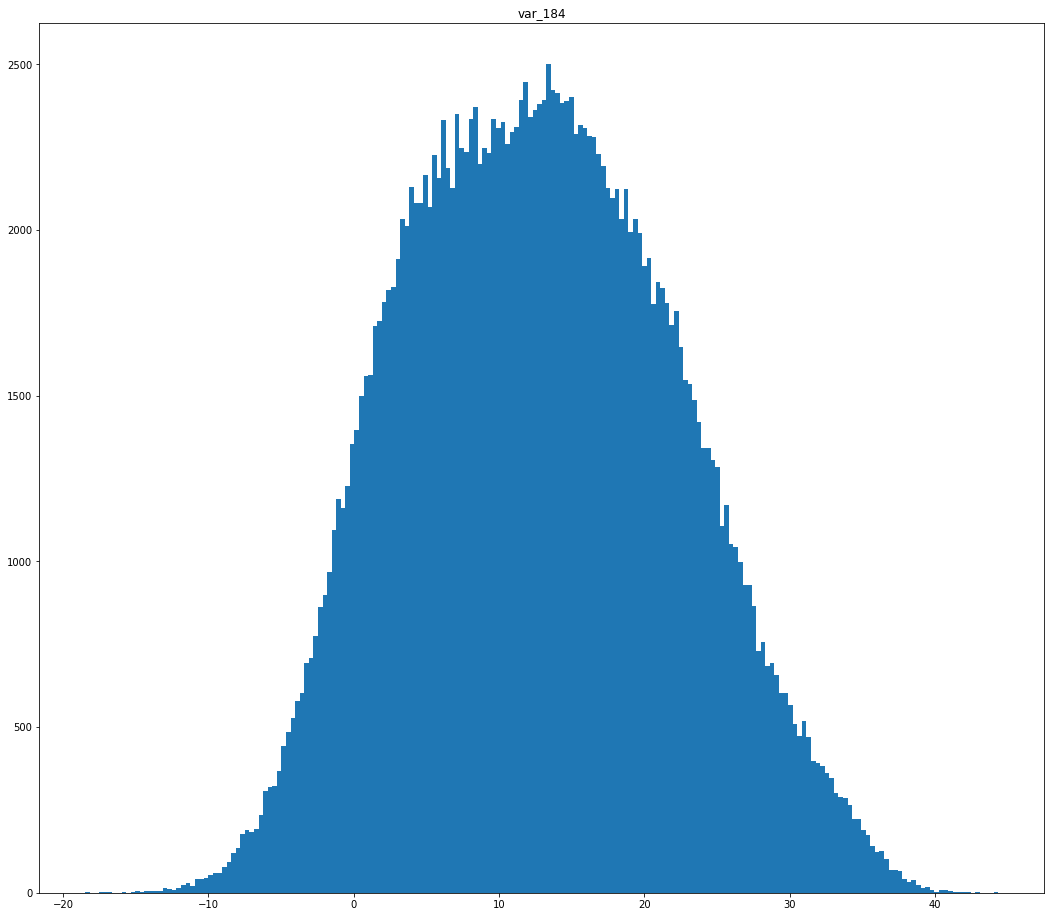

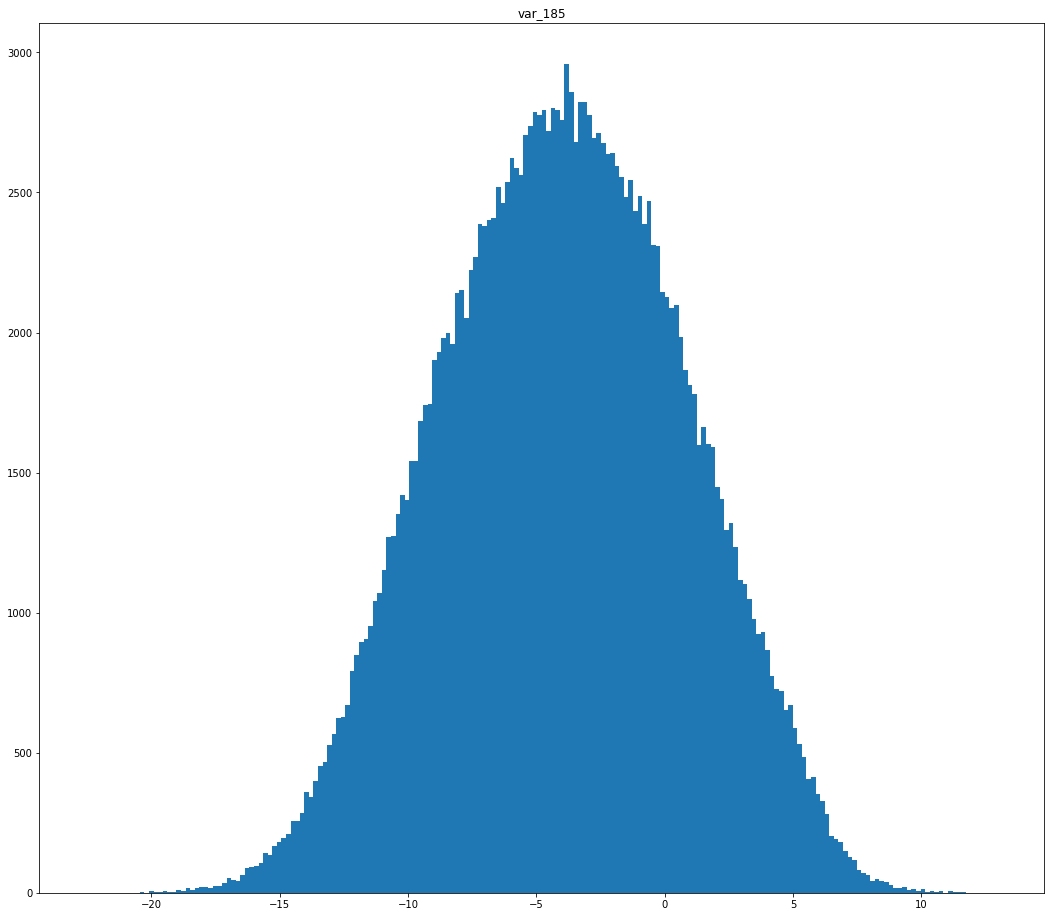

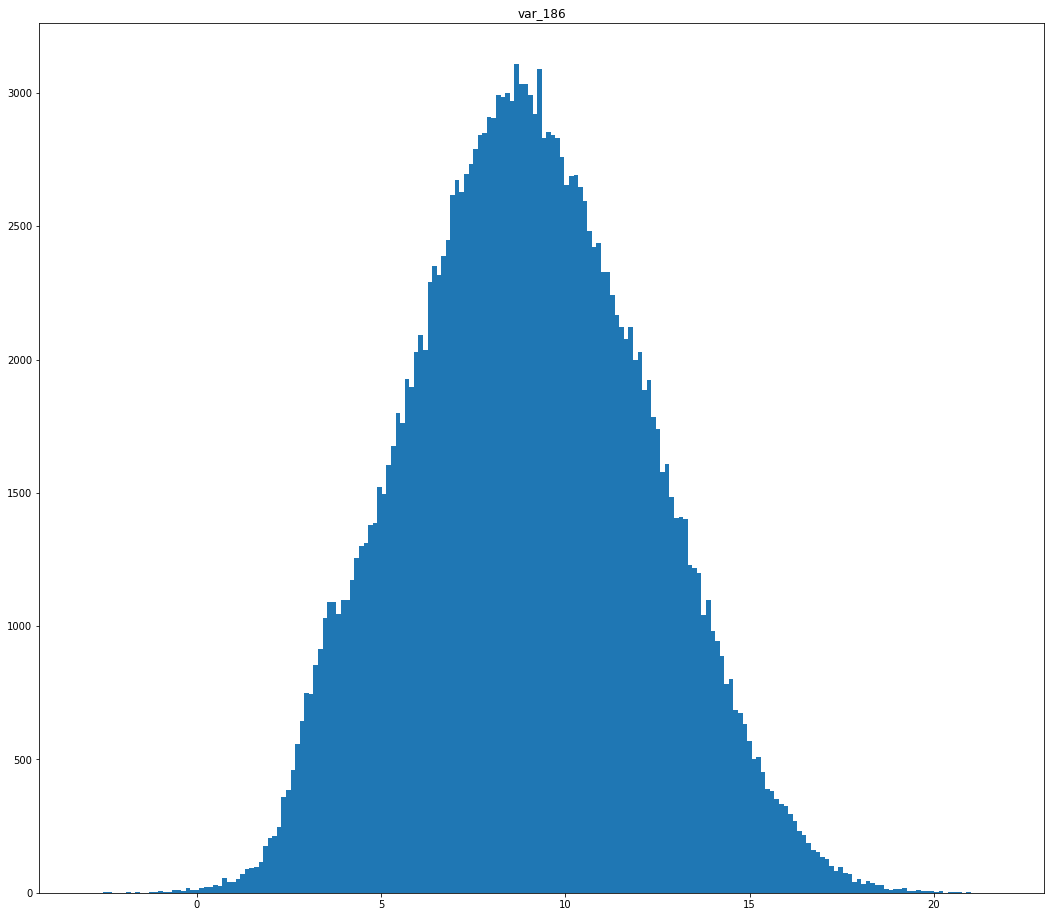

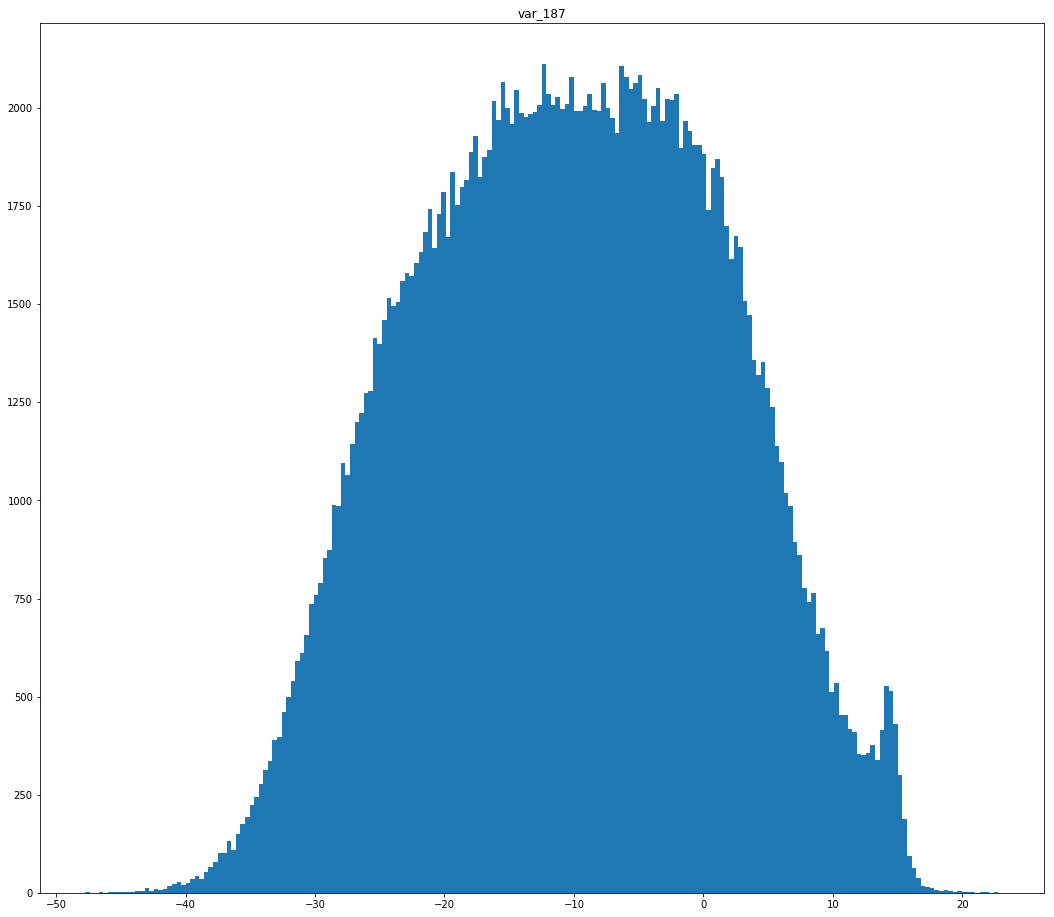

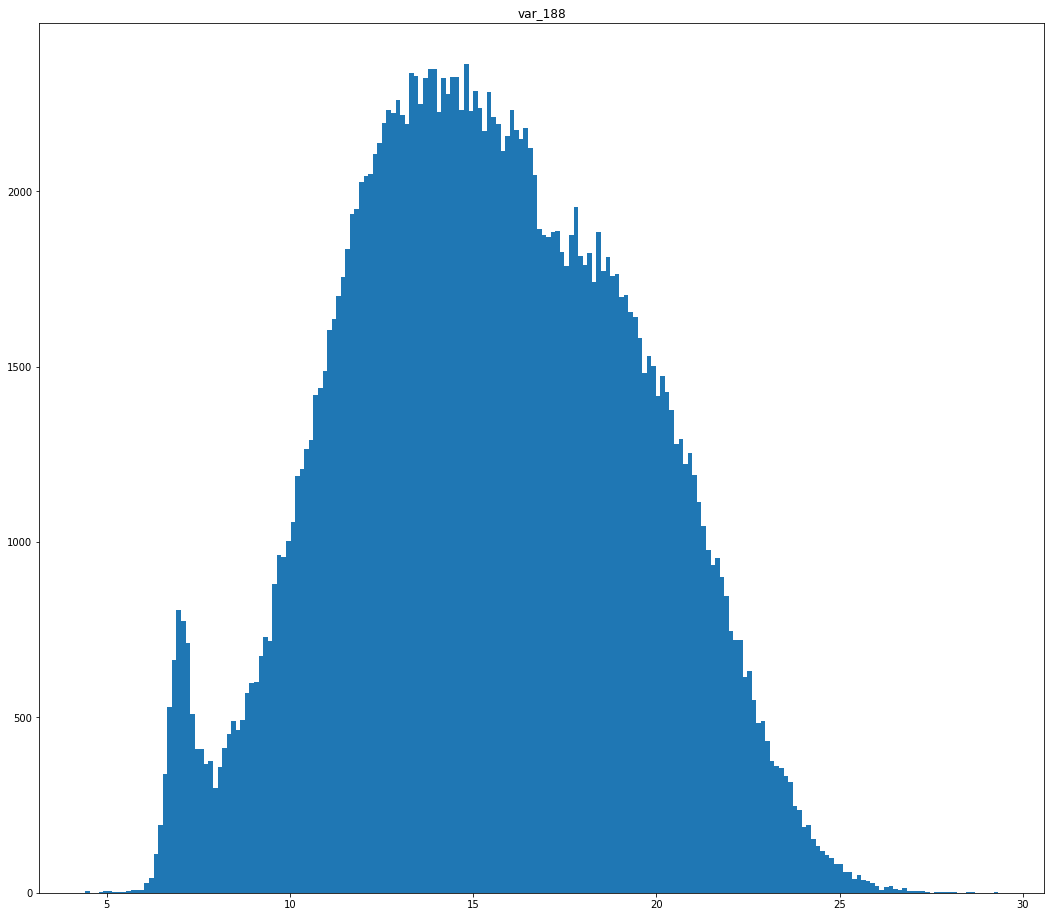

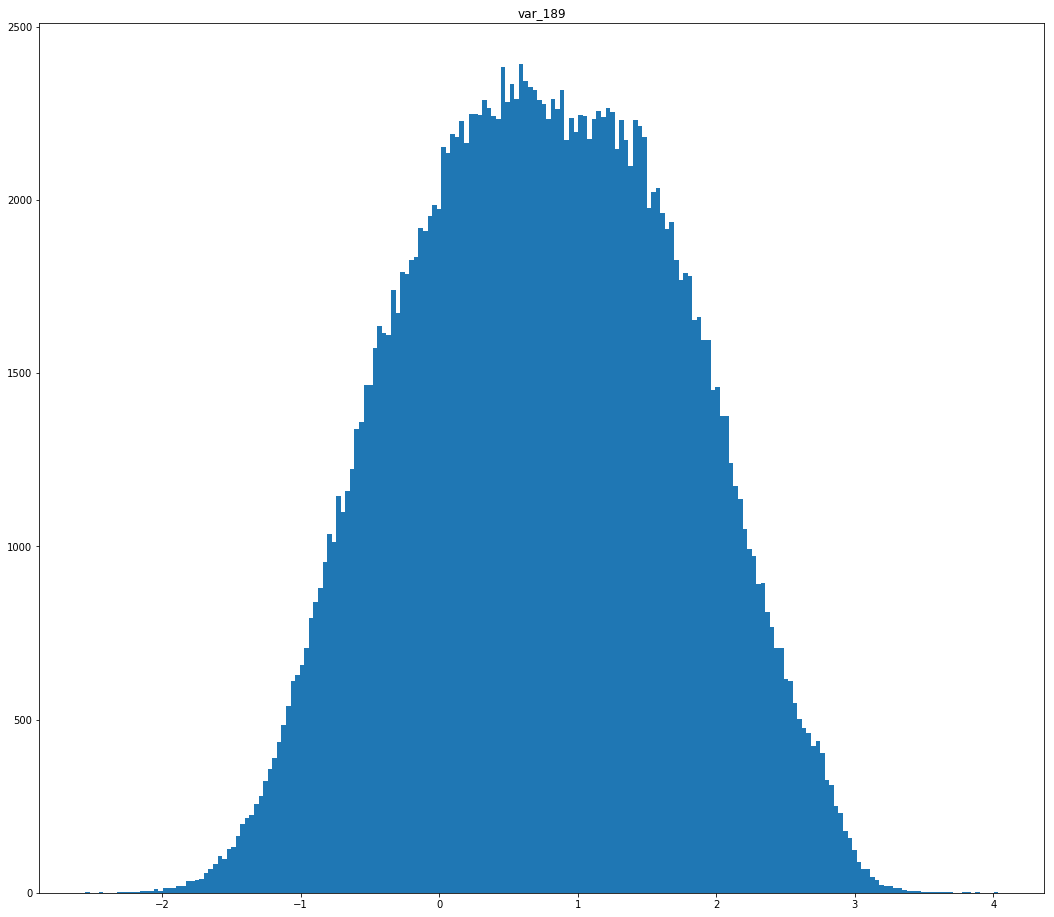

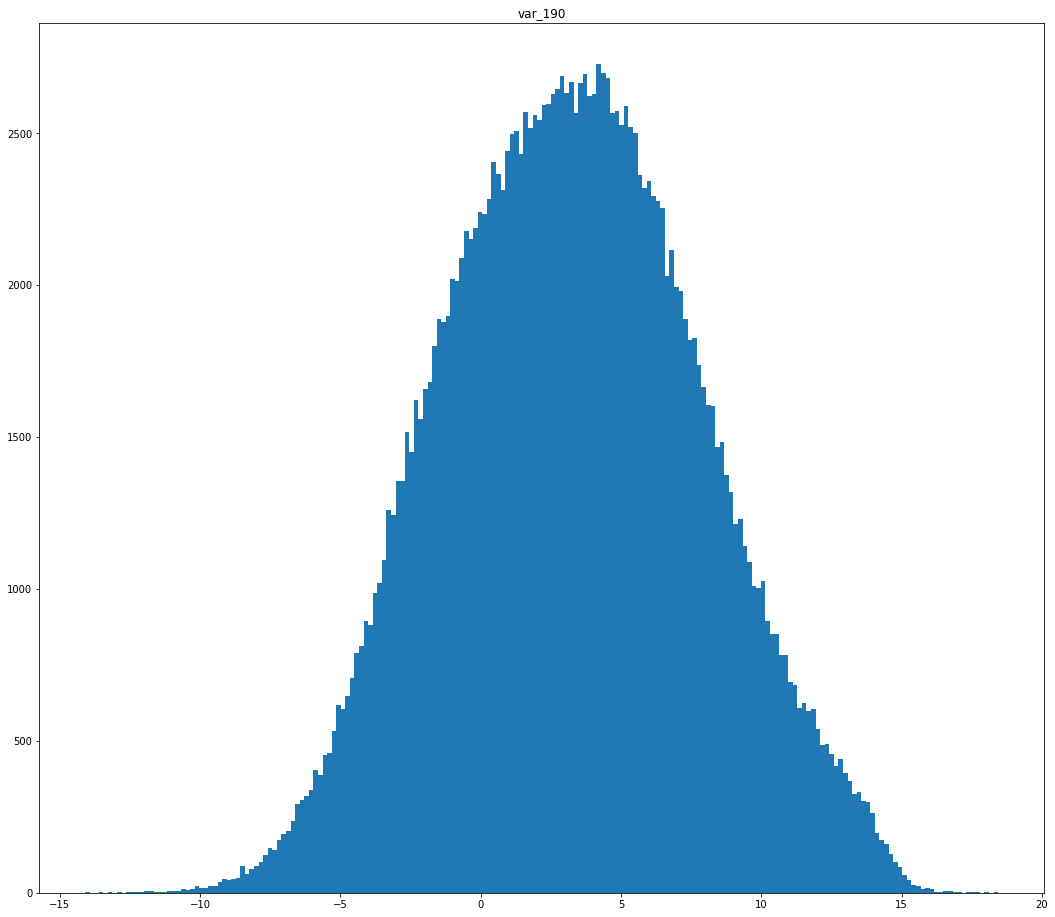

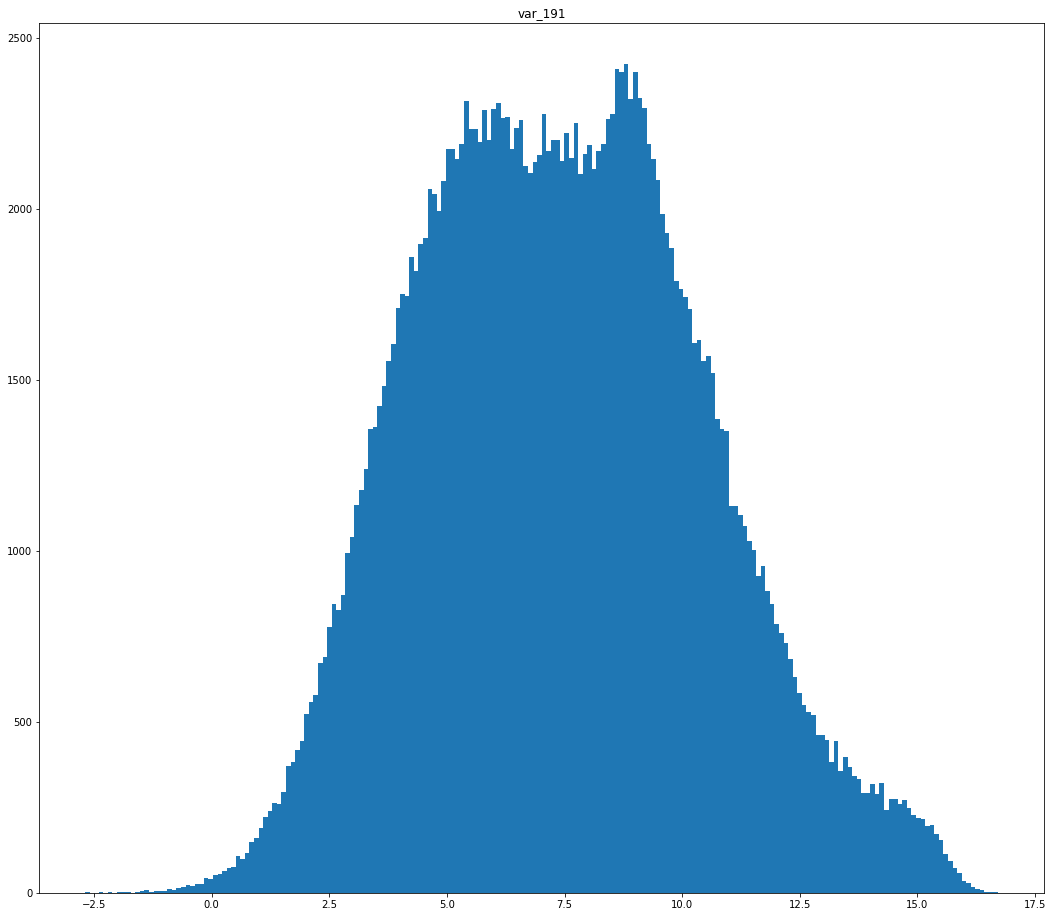

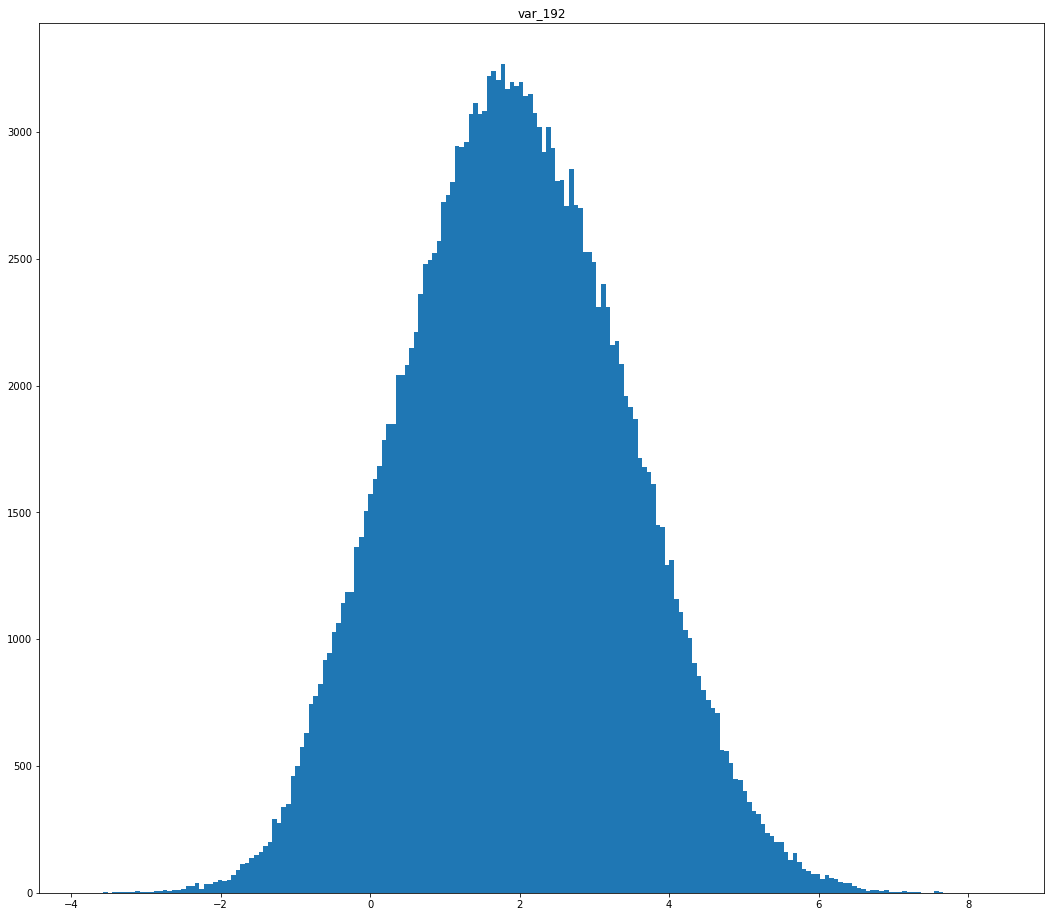

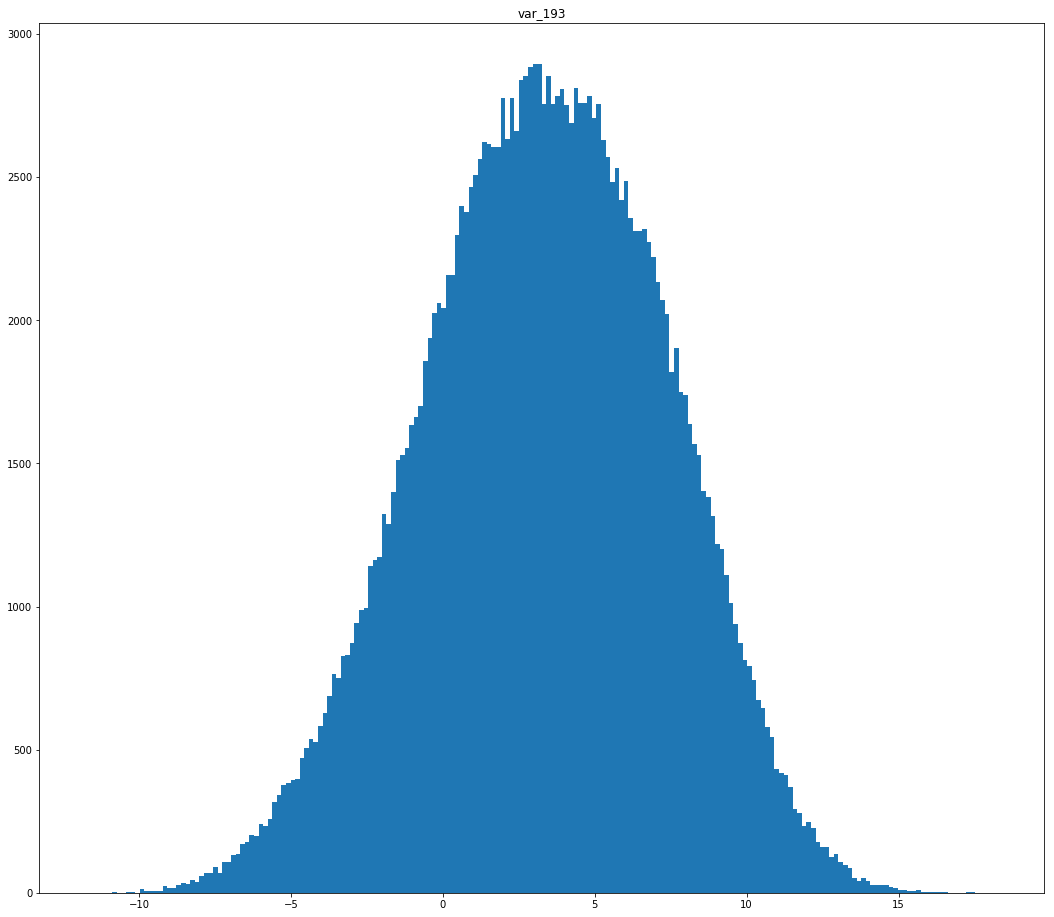

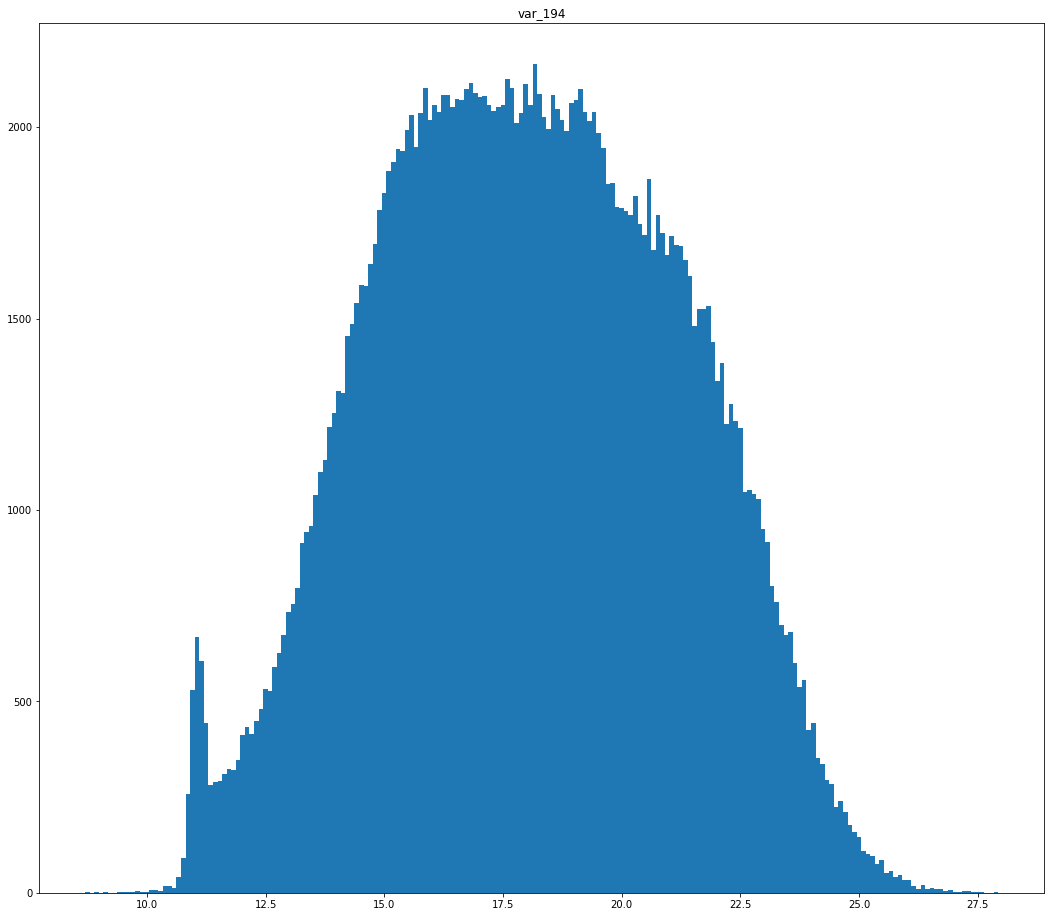

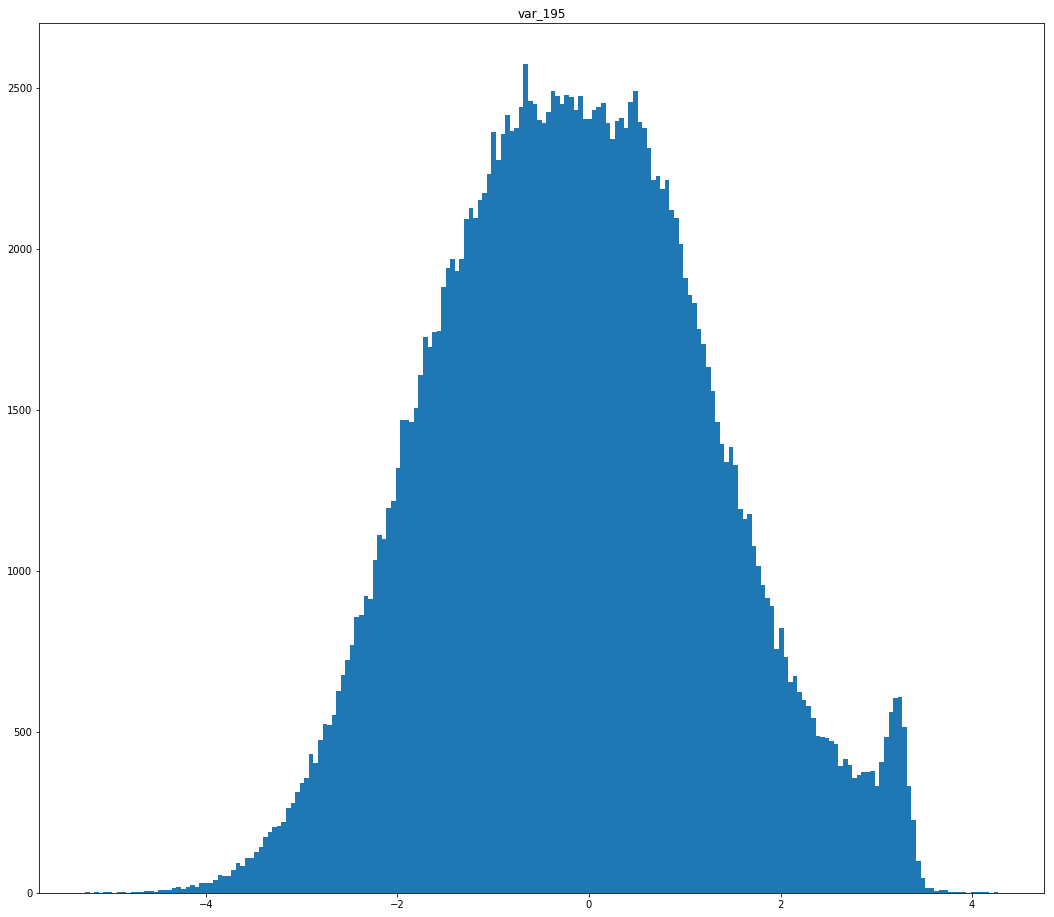

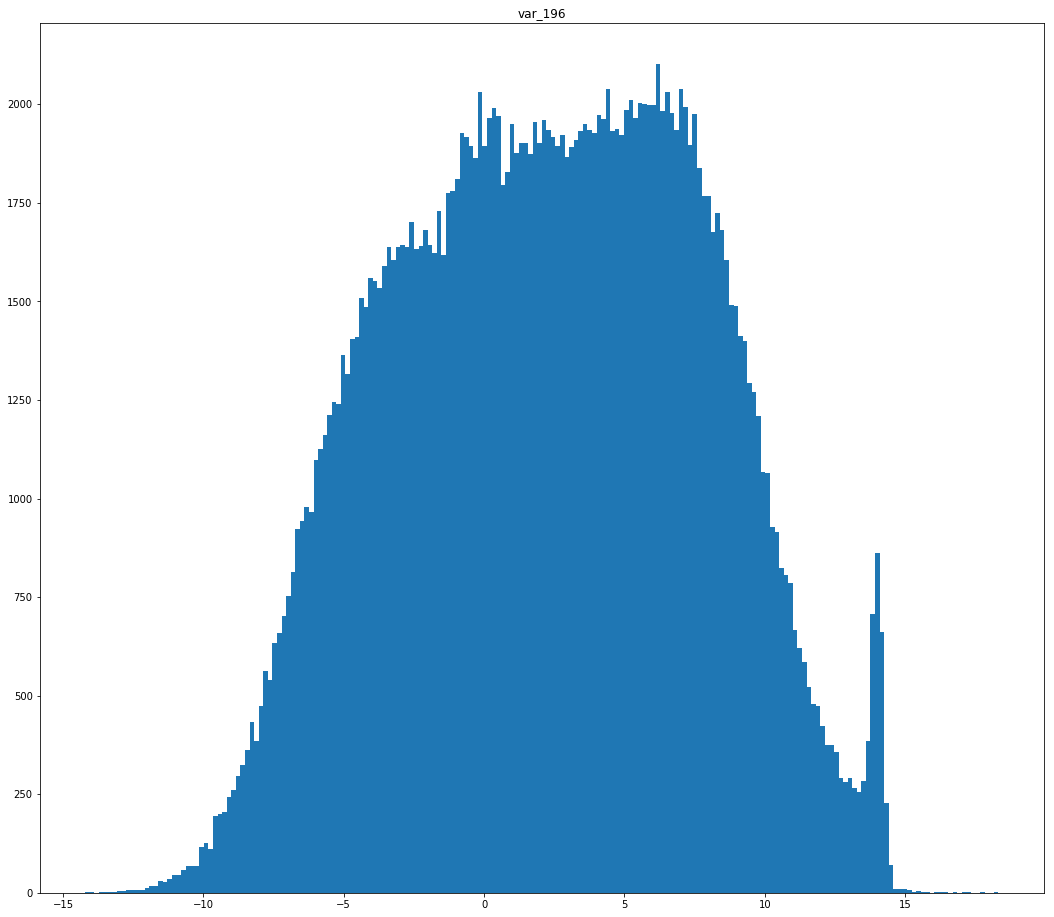

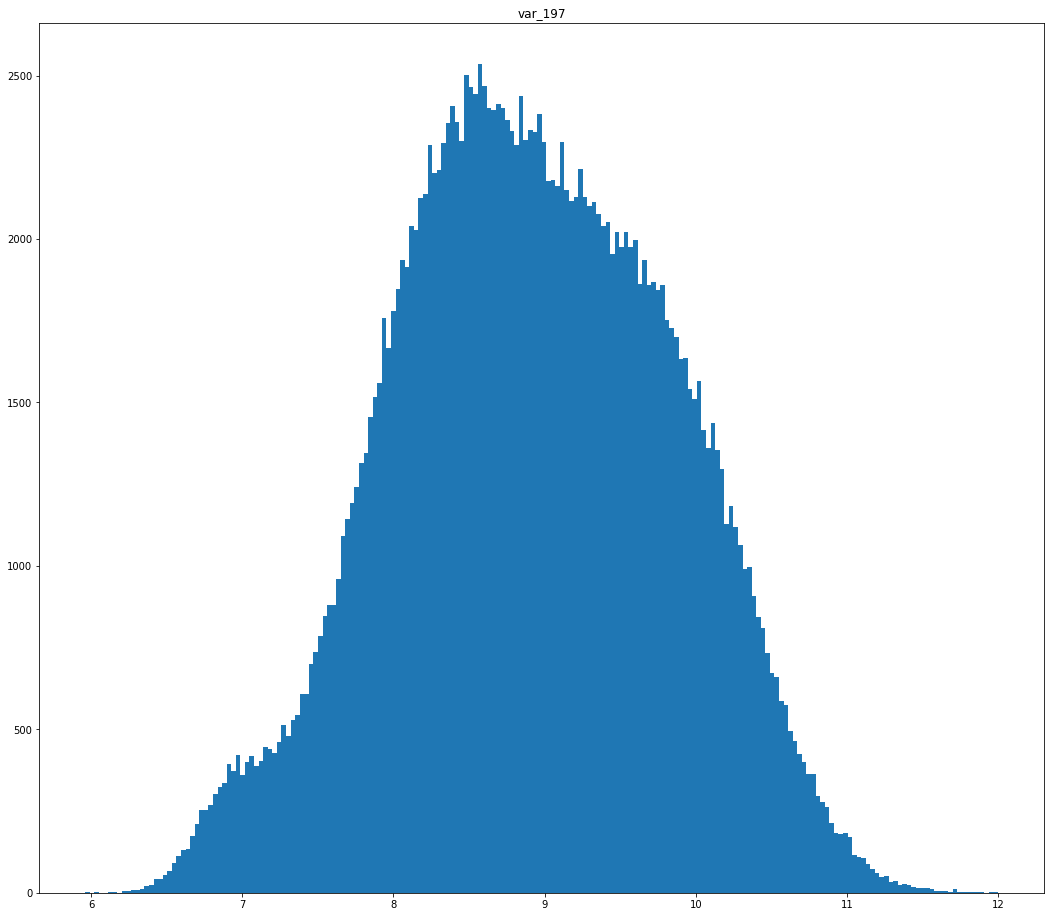

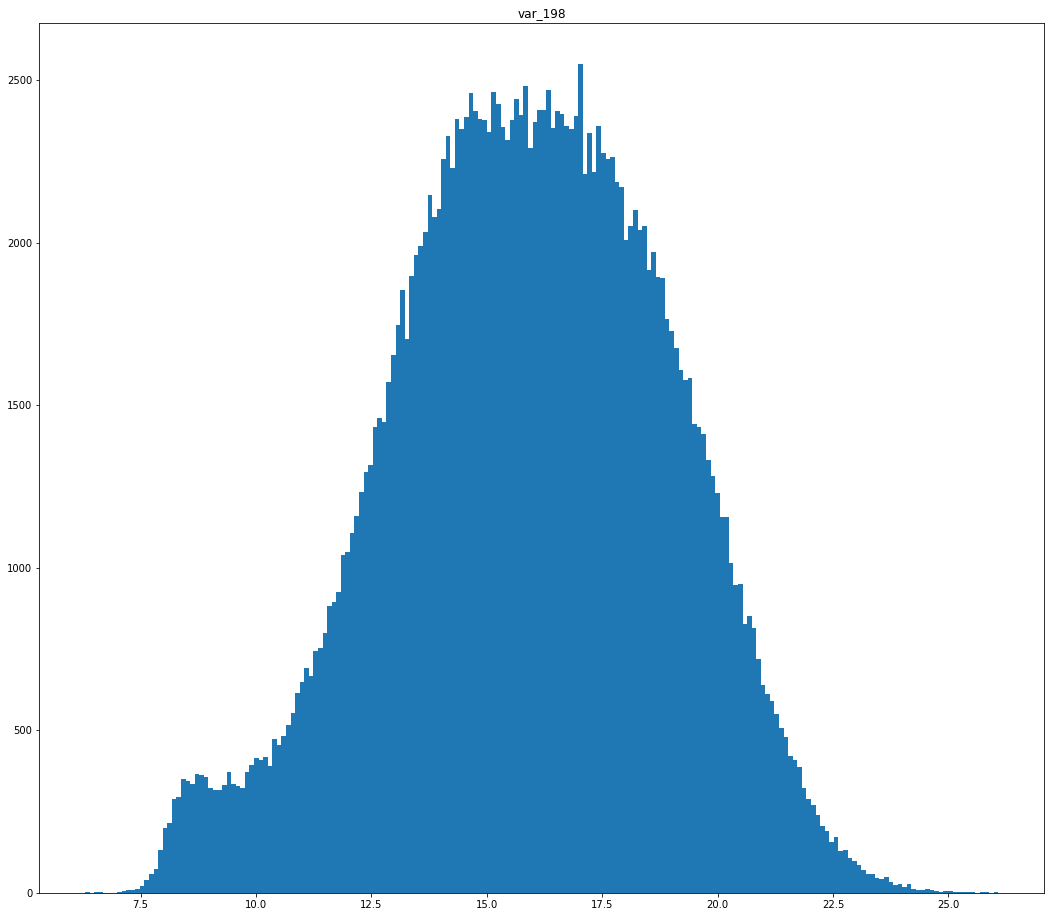

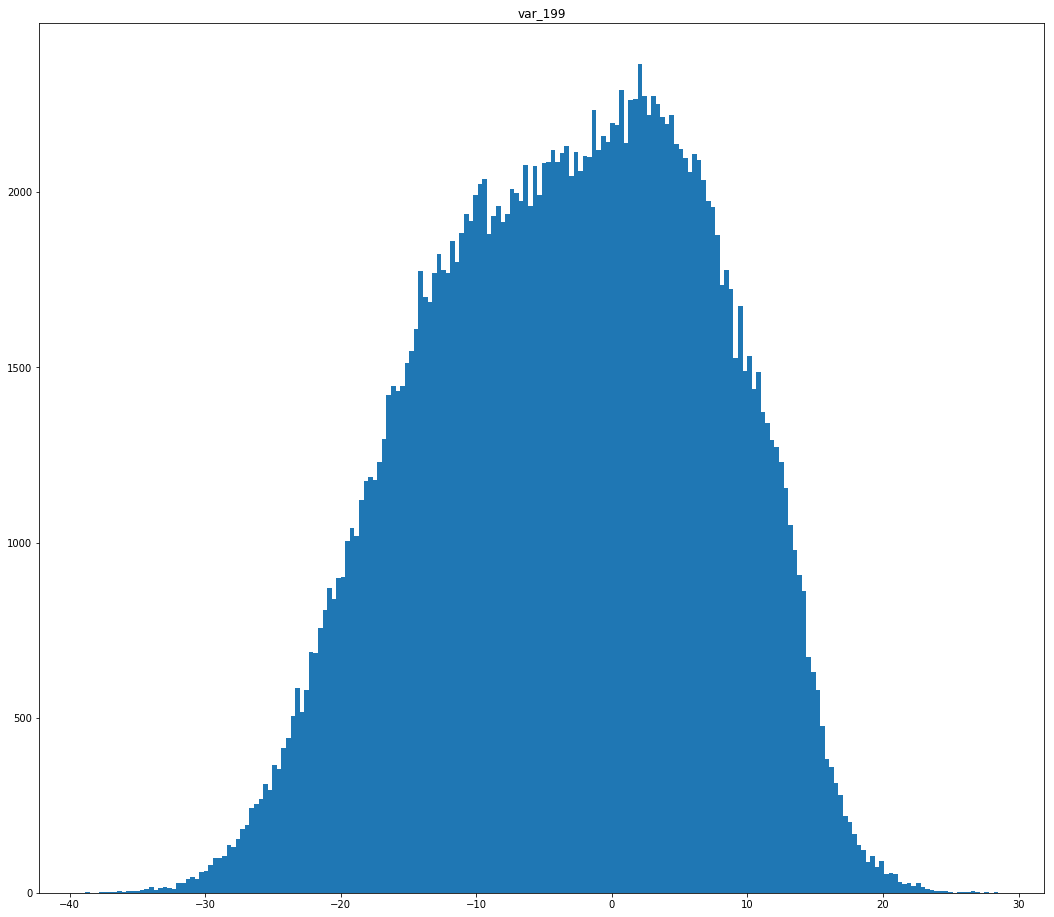

In [56]:
for column_name in train_df.columns.drop(['ID_code', 'target']):
    column = train_df.loc[:, column_name]
    fig = plt.figure(figsize=(18, 16))
    ax = fig.add_subplot(111)
    #column.hist()
    ax.hist(column, bins=200)
    #ax.bar(column)
    ax.set_title(column_name)
    plt.show()

In [40]:
any(train_df_id_droped.isna())

True

In [41]:
columns_with_nan = []
columns_without_nan = []
for column_name in train_df_id_droped.columns.tolist():
    print(column_name, )
    if any(train_df_id_droped[column_name].isna()):
        columns_with_nan.append(column_name)
    else:
        columns_without_nan.append(column_name)
        

In [42]:
len(columns_with_nan)

0

In [43]:
len(columns_without_nan)

201

In [44]:
train_df_cross_corelation_matrix.index

Index(['target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6',
       'var_7', 'var_8',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=201)

In [50]:
train_df_cross_corelation_matrix.loc[:, 'var_10']

target    -0.002213
var_0      0.000355
var_1      0.002875
var_2     -0.000474
var_3     -0.000897
var_4     -0.003445
var_5      0.000332
var_6      0.001503
var_7      0.000359
var_8     -0.000750
var_9      0.001553
var_10     0.000000
var_11     0.002111
var_12     0.002552
var_13     0.002573
var_14    -0.000803
var_15     0.001064
var_16    -0.000482
var_17     0.004278
var_18    -0.001058
var_19    -0.000237
var_20     0.000021
var_21     0.000306
var_22    -0.001114
var_23    -0.001773
var_24     0.001328
var_25     0.000285
var_26     0.000494
var_27     0.000014
var_28    -0.003552
             ...   
var_170    0.004343
var_171   -0.002408
var_172   -0.002239
var_173   -0.001764
var_174   -0.001733
var_175    0.000569
var_176    0.000524
var_177    0.001472
var_178   -0.000727
var_179   -0.003594
var_180   -0.001537
var_181    0.001540
var_182   -0.003627
var_183   -0.000287
var_184    0.002681
var_185   -0.003052
var_186    0.005590
var_187   -0.000448
var_188   -0.001445


In [56]:
#train_df_cross_corelation_matrix.loc[[train_df_cross_corelation_matrix.iloc[:, :] <= 0.001], [train_df_cross_corelation_matrix.loc[:, :] <= 0.001]]

In [53]:
train_df_cross_corelation_matrix.iloc[:, :] <= 0.001

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,True,False,False,False,False,False,False,False,True,False,...,False,False,True,True,True,False,False,True,True,False
var_0,False,True,True,False,False,False,False,False,False,False,...,False,True,True,False,True,False,False,True,True,False
var_1,False,True,True,False,True,True,True,False,False,False,...,False,False,True,False,True,True,True,True,True,False
var_2,False,False,False,True,False,True,False,True,True,False,...,True,False,True,True,False,True,False,False,True,False
var_3,False,False,True,False,True,True,False,True,False,False,...,True,False,True,True,True,False,True,False,True,True
var_4,False,False,True,True,True,True,True,True,False,False,...,False,False,False,True,True,False,True,True,True,True
var_5,False,False,True,False,False,True,True,False,True,True,...,False,True,False,True,True,True,False,True,True,False
var_6,False,False,False,True,True,True,False,True,True,True,...,True,False,True,False,True,False,False,True,True,False
var_7,True,False,False,True,False,False,True,True,True,True,...,True,True,False,False,True,False,False,False,True,True
var_8,False,False,False,False,False,False,True,True,True,True,...,False,True,True,False,False,False,True,True,False,True


In [54]:
train_df_cross_corelation_matrix[train_df_cross_corelation_matrix.iloc[:, :] < 0.001]

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003025,NaN,...,NaN,NaN,-0.042858,-0.017709,-0.022838,NaN,NaN,-0.035303,-0.053000,NaN
var_0,NaN,0.000000,-0.000544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000206,-0.005373,NaN,-0.001514,NaN,NaN,-0.000753,-0.005776,NaN
var_1,NaN,-0.000544,0.000000,NaN,0.000010,0.000303,-0.000902,NaN,NaN,NaN,...,NaN,NaN,-0.002604,NaN,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,NaN
var_2,NaN,NaN,NaN,0.000000,NaN,0.000723,NaN,8.825211e-04,-0.000991,NaN,...,0.000197,NaN,-0.003400,0.000549,NaN,-0.001070,NaN,NaN,-0.000877,NaN
var_3,NaN,NaN,0.000010,NaN,0.000000,-0.000322,NaN,-7.743892e-04,NaN,NaN,...,0.000151,NaN,-0.001530,-0.001699,-0.001054,NaN,-0.002800,NaN,-0.001651,0.000506
var_4,NaN,NaN,0.000303,0.000723,-0.000322,0.000000,-0.001368,4.882529e-05,NaN,NaN,...,NaN,NaN,NaN,0.000813,-0.000068,NaN,0.000513,-0.000046,-0.001821,-0.000786
var_5,NaN,NaN,-0.000902,NaN,NaN,-0.001368,0.000000,NaN,-0.000995,0.000147,...,NaN,-0.000022,NaN,-0.002237,-0.002543,-0.001274,NaN,-0.000535,-0.000953,NaN
var_6,NaN,NaN,NaN,0.000883,-0.000774,0.000049,NaN,0.000000e+00,-0.002548,-0.001188,...,0.000721,NaN,-0.002563,NaN,-0.001141,NaN,NaN,-0.003565,-0.003025,NaN
var_7,-0.003025,NaN,NaN,-0.000991,NaN,NaN,-0.000995,-2.547746e-03,0.000000,0.000814,...,-0.000337,-0.003957,NaN,NaN,-0.000270,NaN,NaN,NaN,0.000650,-0.001457
var_8,NaN,NaN,NaN,NaN,NaN,NaN,0.000147,-1.187995e-03,0.000814,0.000000,...,NaN,-0.001151,-0.000429,NaN,NaN,NaN,-0.003242,-0.004583,NaN,0.000854


In [57]:
train_df_cross_correlation_matrix_0001 = train_df_cross_corelation_matrix[train_df_cross_corelation_matrix.loc[:, :] < 0.001]

In [58]:
train_df_cross_correlation_matrix_0001[train_df_cross_correlation_matrix_0001.isna() == False]

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003025,NaN,...,NaN,NaN,-0.042858,-0.017709,-0.022838,NaN,NaN,-0.035303,-0.053000,NaN
var_0,NaN,0.000000,-0.000544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000206,-0.005373,NaN,-0.001514,NaN,NaN,-0.000753,-0.005776,NaN
var_1,NaN,-0.000544,0.000000,NaN,0.000010,0.000303,-0.000902,NaN,NaN,NaN,...,NaN,NaN,-0.002604,NaN,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,NaN
var_2,NaN,NaN,NaN,0.000000,NaN,0.000723,NaN,8.825211e-04,-0.000991,NaN,...,0.000197,NaN,-0.003400,0.000549,NaN,-0.001070,NaN,NaN,-0.000877,NaN
var_3,NaN,NaN,0.000010,NaN,0.000000,-0.000322,NaN,-7.743892e-04,NaN,NaN,...,0.000151,NaN,-0.001530,-0.001699,-0.001054,NaN,-0.002800,NaN,-0.001651,0.000506
var_4,NaN,NaN,0.000303,0.000723,-0.000322,0.000000,-0.001368,4.882529e-05,NaN,NaN,...,NaN,NaN,NaN,0.000813,-0.000068,NaN,0.000513,-0.000046,-0.001821,-0.000786
var_5,NaN,NaN,-0.000902,NaN,NaN,-0.001368,0.000000,NaN,-0.000995,0.000147,...,NaN,-0.000022,NaN,-0.002237,-0.002543,-0.001274,NaN,-0.000535,-0.000953,NaN
var_6,NaN,NaN,NaN,0.000883,-0.000774,0.000049,NaN,0.000000e+00,-0.002548,-0.001188,...,0.000721,NaN,-0.002563,NaN,-0.001141,NaN,NaN,-0.003565,-0.003025,NaN
var_7,-0.003025,NaN,NaN,-0.000991,NaN,NaN,-0.000995,-2.547746e-03,0.000000,0.000814,...,-0.000337,-0.003957,NaN,NaN,-0.000270,NaN,NaN,NaN,0.000650,-0.001457
var_8,NaN,NaN,NaN,NaN,NaN,NaN,0.000147,-1.187995e-03,0.000814,0.000000,...,NaN,-0.001151,-0.000429,NaN,NaN,NaN,-0.003242,-0.004583,NaN,0.000854


In [59]:
for i in range(201):
    train_df_cross_corelation_matrix.iloc[i, i] = 1

In [65]:
features_min_correlation = {}
for column_name in train_df_cross_corelation_matrix.columns.tolist():
    idxmin = train_df_cross_corelation_matrix.loc[:, column_name].abs().idxmin()
    features_min_correlation.update({(column_name, idxmin): train_df_cross_corelation_matrix.abs().loc[column_name, idxmin]})
    

In [61]:
train_df_cross_corelation_matrix.idxmin?

In [67]:
features_min_correlation_reverse = {}
for key, value in features_min_correlation.items():
    print(key, value)
    features_min_correlation_reverse.update({value: key})

('target', 'var_185') 5.3115855124896635e-05
('var_0', 'var_95') 3.6223213282099144e-05
('var_1', 'var_181') 7.96165643081012e-06
('var_2', 'var_84') 1.6992211544793125e-06
('var_3', 'var_1') 1.0229486236930243e-05
('var_4', 'var_163') 3.932052713378275e-06
('var_5', 'var_63') 1.9592454131032212e-06
('var_6', 'var_173') 5.9427350413807106e-08
('var_7', 'var_161') 2.1636996463229e-05
('var_8', 'var_65') 1.1428828577403495e-05
('var_9', 'var_192') 1.4301745955003521e-05
('var_10', 'var_27') 1.4224375533821631e-05
('var_11', 'var_158') 2.166566862888439e-05
('var_12', 'var_181') 4.0337754147800984e-07
('var_13', 'var_171') 1.1811422818657598e-06
('var_14', 'var_46') 9.15880246171083e-06
('var_15', 'var_42') 1.2597259944582296e-05
('var_16', 'var_143') 9.552116988306693e-06
('var_17', 'var_51') 4.932123399980484e-06
('var_18', 'var_43') 2.340080276030521e-05
('var_19', 'var_165') 3.7291488108087083e-05
('var_20', 'var_10') 2.0805390118015574e-05
('var_21', 'var_29') 1.0213377200623906e-05


In [70]:
sorted_min_correlations_values = sorted(features_min_correlation_reverse.keys())
print(sorted_min_correlations_values)

[2.7039750586923505e-08, 5.9427350413807106e-08, 1.31394739599421e-07, 1.7725016226943529e-07, 3.116543739432803e-07, 4.0337754147800984e-07, 6.628008110805673e-07, 7.934262933632837e-07, 1.1811422818657598e-06, 1.2183744554928466e-06, 1.318334568528197e-06, 1.3561749883193904e-06, 1.3986256723548865e-06, 1.6057286550091924e-06, 1.6992211544793125e-06, 1.9592454131032212e-06, 2.1642927382643457e-06, 2.4124307925012104e-06, 2.494615475049194e-06, 2.5088787140036536e-06, 2.67336143066007e-06, 2.928587339093941e-06, 3.138401030692092e-06, 3.2283357650644305e-06, 3.7486591764498104e-06, 3.932052713378275e-06, 4.2534767054817505e-06, 4.644267936362896e-06, 4.657643607879662e-06, 4.754376155226552e-06, 4.881644215746553e-06, 4.932123399980484e-06, 5.11746542321496e-06, 5.484415608118456e-06, 5.654897326361609e-06, 5.7255718442561e-06, 5.8086350688194945e-06, 5.976972407884346e-06, 5.992716463199852e-06, 6.257069304416945e-06, 6.320183113342276e-06, 6.478643040358554e-06, 6.821825064495354e-0

In [72]:
min_of_min_correlated_features_10 = []
for value in sorted_min_correlations_values[:10]:
    print(value)
    min_of_min_correlated_features_10.append(features_min_correlation_reverse[value])

2.7039750586923505e-08
5.9427350413807106e-08
1.31394739599421e-07
1.7725016226943529e-07
3.116543739432803e-07
4.0337754147800984e-07
6.628008110805673e-07
7.934262933632837e-07
1.1811422818657598e-06
1.2183744554928466e-06


In [73]:
print(min_of_min_correlated_features_10)

[('var_191', 'var_75'), ('var_173', 'var_6'), ('var_126', 'var_109'), ('var_144', 'var_27'), ('var_177', 'var_100'), ('var_181', 'var_12'), ('var_150', 'var_116'), ('var_142', 'var_44'), ('var_171', 'var_13'), ('var_69', 'var_126')]


In [78]:
train_df['var_0'].unique().shape

(94672,)

In [82]:
#train_df.apply(pd.unique, axis=0)

In [85]:
uniques_dict = {column_name: train_df_id_droped[column_name].unique() for column_name in train_df_id_droped.columns.drop('target').tolist()}

In [86]:
uniques_dict_counts = {column_name: uniques.shape[0] for column_name, uniques in uniques_dict.items()}

In [87]:
uniques_counts_series = pd.Series(uniques_dict_counts)

In [88]:
uniques_counts_series[:5]

var_0     94672
var_1    108932
var_2     86555
var_3     74597
var_4     63515
dtype: int64

In [90]:
uniques_counts_series.unique().shape

(200,)

In [91]:
uniques_counts_series.max()

169968

In [92]:
uniques_counts_series.min()

451

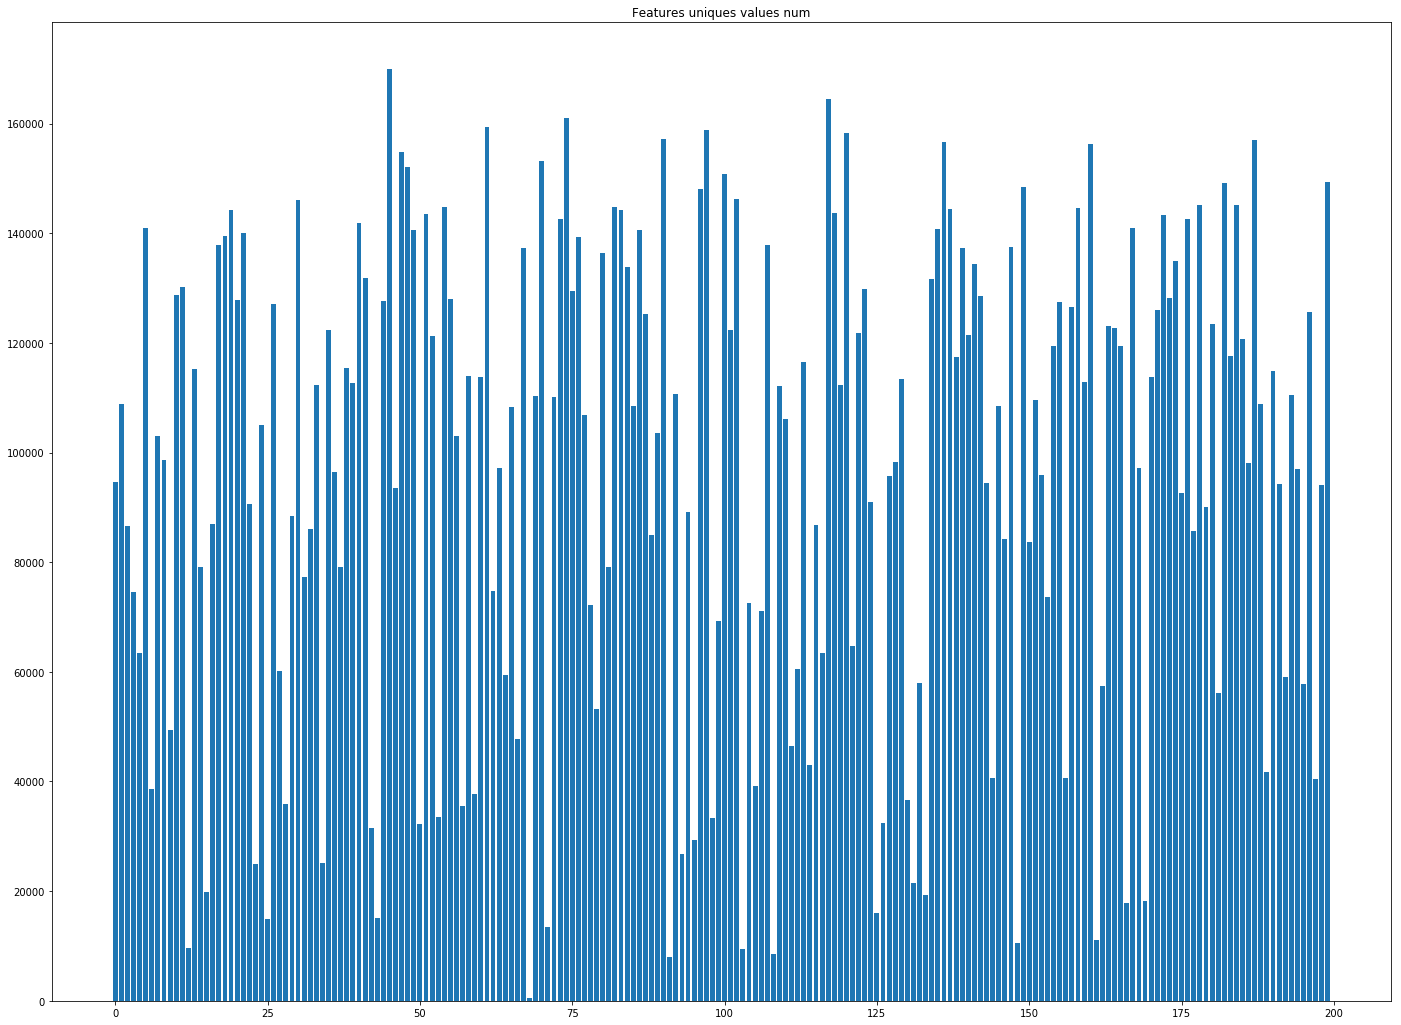

In [100]:
fig = plt.figure(figsize=(24, 18))
ax = fig.add_subplot(111)
ax.bar(np.arange(200), uniques_counts_series.values.astype(np.int64))
#ax.bar(uniques_counts_series)
ax.set_title('Features uniques values num')
plt.show()